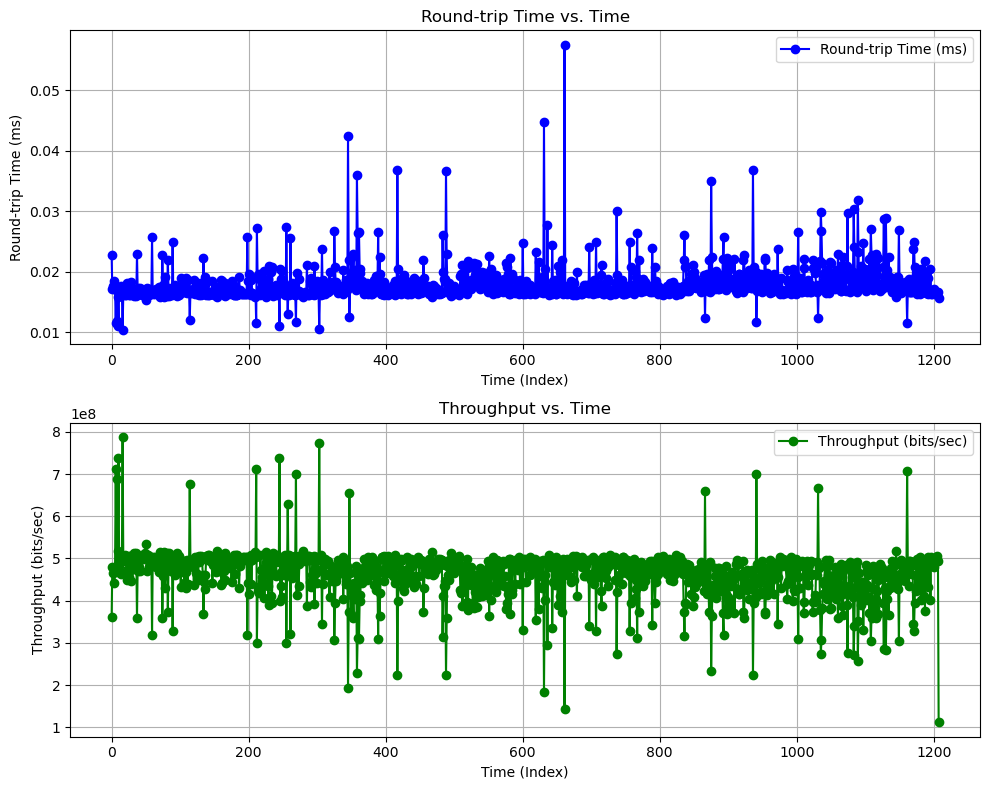

In [3]:
import re
import matplotlib.pyplot as plt

# 数据字符串（在实际情况中，可以直接读取文件或从其他源获取）
log_data = """
[client]ending-message sent to server
[client]server received ending-message
[client]Message sent from client---------Information: length(Bytes): 1024 seqNum: 0 flag: 0
Send Round-trip time: 0.0227 ms
Throughput: 3.60881e+08 bits/sec
[client]Send has been confirmed!---------Information: Flag:2 seqNum:0
[client]Message sent from client---------Inforamation:  seqNum : 0 flag : 2
[client]Message sent from client---------Information: length(Bytes): 1024 seqNum: 1 flag: 0
Send Round-trip time: 0.0171 ms
Throughput: 4.79064e+08 bits/sec
[client]Send has been confirmed!---------Information: Flag:2 seqNum:1
[client]Message sent from client---------Inforamation:  seqNum : 1 flag : 2
[client]Message sent from client---------Information: length(Bytes): 1024 seqNum: 2 flag: 0
Send Round-trip time: 0.0176 ms
Throughput: 4.65455e+08 bits/sec
[client]Send has been confirmed!---------Information: Flag:2 seqNum:2
[client]Message sent from client---------Inforamation:  seqNum : 2 flag : 2
[client]Message sent from client---------Information: length(Bytes): 1024 seqNum: 3 flag: 0
Send Round-trip time: 0.0172 ms
Throughput: 4.76279e+08 bits/sec
[client]Send has been confirmed!---------Information: Flag:2 seqNum:3
[client]Message sent from client---------Inforamation:  seqNum : 3 flag : 2
[client]Message sent from client---------Information: length(Bytes): 1024 seqNum: 4 flag: 0
Send Round-trip time: 0.0185 ms
Throughput: 4.42811e+08 bits/sec
[client]Send has been confirmed!---------Information: Flag:2 seqNum:4
[client]Message sent from client---------Inforamation:  seqNum : 4 flag : 2
[client]Message sent from client---------Information: length(Bytes): 1024 seqNum: 5 flag: 0
Send Round-trip time: 0.0171 ms
Throughput: 4.79064e+08 bits/sec
[client]Send has been confirmed!---------Information: Flag:2 seqNum:5
[client]Message sent from client---------Inforamation:  seqNum : 5 flag : 2
[client]Message sent from client---------Information: length(Bytes): 1024 seqNum: 6 flag: 0
Send Round-trip time: 0.0115 ms
Throughput: 7.12348e+08 bits/sec
[client]Send has been confirmed!---------Information: Flag:2 seqNum:6
[client]Message sent from client---------Inforamation:  seqNum : 6 flag : 2
[client]Message sent from client---------Information: length(Bytes): 1024 seqNum: 7 flag: 0
Send Round-trip time: 0.0175 ms
Throughput: 4.68114e+08 bits/sec
[client]Send has been confirmed!---------Information: Flag:2 seqNum:7
[client]Message sent from client---------Inforamation:  seqNum : 7 flag : 2
[client]Message sent from client---------Information: length(Bytes): 1024 seqNum: 8 flag: 0
Send Round-trip time: 0.0119 ms
Throughput: 6.88403e+08 bits/sec
[client]Send has been confirmed!---------Information: Flag:2 seqNum:8
[client]Message sent from client---------Inforamation:  seqNum : 8 flag : 2
[client]Message sent from client---------Information: length(Bytes): 1024 seqNum: 9 flag: 0
Send Round-trip time: 0.0158 ms
Throughput: 5.18481e+08 bits/sec
[client]Send has been confirmed!---------Information: Flag:2 seqNum:9
[client]Message sent from client---------Inforamation:  seqNum : 9 flag : 2
[client]Message sent from client---------Information: length(Bytes): 1024 seqNum: 10 flag: 0
Send Round-trip time: 0.0111 ms
Throughput: 7.38018e+08 bits/sec
[client]Send has been confirmed!---------Information: Flag:2 seqNum:10
[client]Message sent from client---------Inforamation:  seqNum : 10 flag : 2
[client]Message sent from client---------Information: length(Bytes): 1024 seqNum: 11 flag: 0
Send Round-trip time: 0.017 ms
Throughput: 4.81882e+08 bits/sec
[client]Send has been confirmed!---------Information: Flag:2 seqNum:11
[client]Message sent from client---------Inforamation:  seqNum : 11 flag : 2
[client]Message sent from client---------Information: length(Bytes): 1024 seqNum: 12 flag: 0
Send Round-trip time: 0.0164 ms
Throughput: 4.99512e+08 bits/sec
[client]Send has been confirmed!---------Information: Flag:2 seqNum:12
[client]Message sent from client---------Inforamation:  seqNum : 12 flag : 2
[client]Message sent from client---------Information: length(Bytes): 1024 seqNum: 13 flag: 0
Send Round-trip time: 0.0163 ms
Throughput: 5.02577e+08 bits/sec
[client]Send has been confirmed!---------Information: Flag:2 seqNum:13
[client]Message sent from client---------Inforamation:  seqNum : 13 flag : 2
[client]Message sent from client---------Information: length(Bytes): 1024 seqNum: 14 flag: 0
Send Round-trip time: 0.0177 ms
Throughput: 4.62825e+08 bits/sec
[client]Send has been confirmed!---------Information: Flag:2 seqNum:14
[client]Message sent from client---------Inforamation:  seqNum : 14 flag : 2
[client]Message sent from client---------Information: length(Bytes): 1024 seqNum: 15 flag: 0
Send Round-trip time: 0.0164 ms
Throughput: 4.99512e+08 bits/sec
[client]Send has been confirmed!---------Information: Flag:2 seqNum:15
[client]Message sent from client---------Inforamation:  seqNum : 15 flag : 2
[client]Message sent from client---------Information: length(Bytes): 1024 seqNum: 16 flag: 0
Send Round-trip time: 0.0104 ms
Throughput: 7.87692e+08 bits/sec
[client]Send has been confirmed!---------Information: Flag:2 seqNum:16
[client]Message sent from client---------Inforamation:  seqNum : 16 flag : 2
[client]Message sent from client---------Information: length(Bytes): 1024 seqNum: 17 flag: 0
Send Round-trip time: 0.0162 ms
Throughput: 5.05679e+08 bits/sec
[client]Send has been confirmed!---------Information: Flag:2 seqNum:17
[client]Message sent from client---------Inforamation:  seqNum : 17 flag : 2
[client]Message sent from client---------Information: length(Bytes): 1024 seqNum: 18 flag: 0
Send Round-trip time: 0.0165 ms
Throughput: 4.96485e+08 bits/sec
[client]Send has been confirmed!---------Information: Flag:2 seqNum:18
[client]Message sent from client---------Inforamation:  seqNum : 18 flag : 2
[client]Message sent from client---------Information: length(Bytes): 1024 seqNum: 19 flag: 0
Send Round-trip time: 0.0166 ms
Throughput: 4.93494e+08 bits/sec
[client]Send has been confirmed!---------Information: Flag:2 seqNum:19
[client]Message sent from client---------Inforamation:  seqNum : 19 flag : 2
[client]Message sent from client---------Information: length(Bytes): 1024 seqNum: 20 flag: 0
Send Round-trip time: 0.0161 ms
Throughput: 5.0882e+08 bits/sec
[client]Send has been confirmed!---------Information: Flag:2 seqNum:20
[client]Message sent from client---------Inforamation:  seqNum : 20 flag : 2
[client]Message sent from client---------Information: length(Bytes): 1024 seqNum: 21 flag: 0
Send Round-trip time: 0.0162 ms
Throughput: 5.05679e+08 bits/sec
[client]Send has been confirmed!---------Information: Flag:2 seqNum:21
[client]Message sent from client---------Inforamation:  seqNum : 21 flag : 2
[client]Message sent from client---------Information: length(Bytes): 1024 seqNum: 22 flag: 0
Send Round-trip time: 0.0182 ms
Throughput: 4.5011e+08 bits/sec
[client]Send has been confirmed!---------Information: Flag:2 seqNum:22
[client]Message sent from client---------Inforamation:  seqNum : 22 flag : 2
[client]Message sent from client---------Information: length(Bytes): 1024 seqNum: 23 flag: 0
Send Round-trip time: 0.0173 ms
Throughput: 4.73526e+08 bits/sec
[client]Send has been confirmed!---------Information: Flag:2 seqNum:23
[client]Message sent from client---------Inforamation:  seqNum : 23 flag : 2
[client]Message sent from client---------Information: length(Bytes): 1024 seqNum: 24 flag: 0
Send Round-trip time: 0.0164 ms
Throughput: 4.99512e+08 bits/sec
[client]Send has been confirmed!---------Information: Flag:2 seqNum:24
[client]Message sent from client---------Inforamation:  seqNum : 24 flag : 2
[client]Message sent from client---------Information: length(Bytes): 1024 seqNum: 25 flag: 0
Send Round-trip time: 0.0162 ms
Throughput: 5.05679e+08 bits/sec
[client]Send has been confirmed!---------Information: Flag:2 seqNum:25
[client]Message sent from client---------Inforamation:  seqNum : 25 flag : 2
[client]Message sent from client---------Information: length(Bytes): 1024 seqNum: 26 flag: 0
Send Round-trip time: 0.018 ms
Throughput: 4.55111e+08 bits/sec
[client]Send has been confirmed!---------Information: Flag:2 seqNum:26
[client]Message sent from client---------Inforamation:  seqNum : 26 flag : 2
[client]Message sent from client---------Information: length(Bytes): 1024 seqNum: 27 flag: 0
Send Round-trip time: 0.0162 ms
Throughput: 5.05679e+08 bits/sec
[client]Send has been confirmed!---------Information: Flag:2 seqNum:27
[client]Message sent from client---------Inforamation:  seqNum : 27 flag : 2
[client]Message sent from client---------Information: length(Bytes): 1024 seqNum: 28 flag: 0
Send Round-trip time: 0.0173 ms
Throughput: 4.73526e+08 bits/sec
[client]Send has been confirmed!---------Information: Flag:2 seqNum:28
[client]Message sent from client---------Inforamation:  seqNum : 28 flag : 2
[client]Message sent from client---------Information: length(Bytes): 1024 seqNum: 29 flag: 0
Send Round-trip time: 0.0183 ms
Throughput: 4.4765e+08 bits/sec
[client]Send has been confirmed!---------Information: Flag:2 seqNum:29
[client]Message sent from client---------Inforamation:  seqNum : 29 flag : 2
[client]Message sent from client---------Information: length(Bytes): 1024 seqNum: 30 flag: 0
Send Round-trip time: 0.0171 ms
Throughput: 4.79064e+08 bits/sec
[client]Send has been confirmed!---------Information: Flag:2 seqNum:30
[client]Message sent from client---------Inforamation:  seqNum : 30 flag : 2
[client]Message sent from client---------Information: length(Bytes): 1024 seqNum: 31 flag: 0
Send Round-trip time: 0.0163 ms
Throughput: 5.02577e+08 bits/sec
[client]Send has been confirmed!---------Information: Flag:2 seqNum:31
[client]Message sent from client---------Inforamation:  seqNum : 31 flag : 2
[client]Message sent from client---------Information: length(Bytes): 1024 seqNum: 32 flag: 0
Send Round-trip time: 0.016 ms
Throughput: 5.12e+08 bits/sec
[client]Send has been confirmed!---------Information: Flag:2 seqNum:32
[client]Message sent from client---------Inforamation:  seqNum : 32 flag : 2
[client]Message sent from client---------Information: length(Bytes): 1024 seqNum: 33 flag: 0
Send Round-trip time: 0.0162 ms
Throughput: 5.05679e+08 bits/sec
[client]Send has been confirmed!---------Information: Flag:2 seqNum:33
[client]Message sent from client---------Inforamation:  seqNum : 33 flag : 2
[client]Message sent from client---------Information: length(Bytes): 1024 seqNum: 34 flag: 0
Send Round-trip time: 0.0164 ms
Throughput: 4.99512e+08 bits/sec
[client]Send has been confirmed!---------Information: Flag:2 seqNum:34
[client]Message sent from client---------Inforamation:  seqNum : 34 flag : 2
[client]Message sent from client---------Information: length(Bytes): 1024 seqNum: 35 flag: 0
Send Round-trip time: 0.0161 ms
Throughput: 5.0882e+08 bits/sec
[client]Send has been confirmed!---------Information: Flag:2 seqNum:35
[client]Message sent from client---------Inforamation:  seqNum : 35 flag : 2
[client]Message sent from client---------Information: length(Bytes): 1024 seqNum: 36 flag: 0
Send Round-trip time: 0.016 ms
Throughput: 5.12e+08 bits/sec
[client]Send has been confirmed!---------Information: Flag:2 seqNum:36
[client]Message sent from client---------Inforamation:  seqNum : 36 flag : 2
[client]Message sent from client---------Information: length(Bytes): 1024 seqNum: 37 flag: 0
Send Round-trip time: 0.0229 ms
Throughput: 3.57729e+08 bits/sec
[client]Send has been confirmed!---------Information: Flag:2 seqNum:37
[client]Message sent from client---------Inforamation:  seqNum : 37 flag : 2
[client]Message sent from client---------Information: length(Bytes): 1024 seqNum: 38 flag: 0
Send Round-trip time: 0.0171 ms
Throughput: 4.79064e+08 bits/sec
[client]Send has been confirmed!---------Information: Flag:2 seqNum:38
[client]Message sent from client---------Inforamation:  seqNum : 38 flag : 2
[client]Message sent from client---------Information: length(Bytes): 1024 seqNum: 39 flag: 0
Send Round-trip time: 0.0174 ms
Throughput: 4.70805e+08 bits/sec
[client]Send has been confirmed!---------Information: Flag:2 seqNum:39
[client]Message sent from client---------Inforamation:  seqNum : 39 flag : 2
[client]Message sent from client---------Information: length(Bytes): 1024 seqNum: 40 flag: 0
Send Round-trip time: 0.0171 ms
Throughput: 4.79064e+08 bits/sec
[client]Send has been confirmed!---------Information: Flag:2 seqNum:40
[client]Message sent from client---------Inforamation:  seqNum : 40 flag : 2
[client]Message sent from client---------Information: length(Bytes): 1024 seqNum: 41 flag: 0
Send Round-trip time: 0.0174 ms
Throughput: 4.70805e+08 bits/sec
[client]Send has been confirmed!---------Information: Flag:2 seqNum:41
[client]Message sent from client---------Inforamation:  seqNum : 41 flag : 2
[client]Message sent from client---------Information: length(Bytes): 1024 seqNum: 42 flag: 0
Send Round-trip time: 0.0164 ms
Throughput: 4.99512e+08 bits/sec
[client]Send has been confirmed!---------Information: Flag:2 seqNum:42
[client]Message sent from client---------Inforamation:  seqNum : 42 flag : 2
[client]Message sent from client---------Information: length(Bytes): 1024 seqNum: 43 flag: 0
Send Round-trip time: 0.0164 ms
Throughput: 4.99512e+08 bits/sec
[client]Send has been confirmed!---------Information: Flag:2 seqNum:43
[client]Message sent from client---------Inforamation:  seqNum : 43 flag : 2
[client]Message sent from client---------Information: length(Bytes): 1024 seqNum: 44 flag: 0
Send Round-trip time: 0.0164 ms
Throughput: 4.99512e+08 bits/sec
[client]Send has been confirmed!---------Information: Flag:2 seqNum:44
[client]Message sent from client---------Inforamation:  seqNum : 44 flag : 2
[client]Message sent from client---------Information: length(Bytes): 1024 seqNum: 45 flag: 0
Send Round-trip time: 0.0161 ms
Throughput: 5.0882e+08 bits/sec
[client]Send has been confirmed!---------Information: Flag:2 seqNum:45
[client]Message sent from client---------Inforamation:  seqNum : 45 flag : 2
[client]Message sent from client---------Information: length(Bytes): 1024 seqNum: 46 flag: 0
Send Round-trip time: 0.0164 ms
Throughput: 4.99512e+08 bits/sec
[client]Send has been confirmed!---------Information: Flag:2 seqNum:46
[client]Message sent from client---------Inforamation:  seqNum : 46 flag : 2
[client]Message sent from client---------Information: length(Bytes): 1024 seqNum: 47 flag: 0
Send Round-trip time: 0.0162 ms
Throughput: 5.05679e+08 bits/sec
[client]Send has been confirmed!---------Information: Flag:2 seqNum:47
[client]Message sent from client---------Inforamation:  seqNum : 47 flag : 2
[client]Message sent from client---------Information: length(Bytes): 1024 seqNum: 48 flag: 0
Send Round-trip time: 0.0162 ms
Throughput: 5.05679e+08 bits/sec
[client]Send has been confirmed!---------Information: Flag:2 seqNum:48
[client]Message sent from client---------Inforamation:  seqNum : 48 flag : 2
[client]Message sent from client---------Information: length(Bytes): 1024 seqNum: 49 flag: 0
Send Round-trip time: 0.016 ms
Throughput: 5.12e+08 bits/sec
[client]Send has been confirmed!---------Information: Flag:2 seqNum:49
[client]Message sent from client---------Inforamation:  seqNum : 49 flag : 2
[client]Message sent from client---------Information: length(Bytes): 1024 seqNum: 50 flag: 0
Send Round-trip time: 0.0153 ms
Throughput: 5.35425e+08 bits/sec
[client]Send has been confirmed!---------Information: Flag:2 seqNum:50
[client]Message sent from client---------Inforamation:  seqNum : 50 flag : 2
[client]Message sent from client---------Information: length(Bytes): 1024 seqNum: 51 flag: 0
Send Round-trip time: 0.0174 ms
Throughput: 4.70805e+08 bits/sec
[client]Send has been confirmed!---------Information: Flag:2 seqNum:51
[client]Message sent from client---------Inforamation:  seqNum : 51 flag : 2
[client]Message sent from client---------Information: length(Bytes): 1024 seqNum: 52 flag: 0
Send Round-trip time: 0.0163 ms
Throughput: 5.02577e+08 bits/sec
[client]Send has been confirmed!---------Information: Flag:2 seqNum:52
[client]Message sent from client---------Inforamation:  seqNum : 52 flag : 2
[client]Message sent from client---------Information: length(Bytes): 1024 seqNum: 53 flag: 0
Send Round-trip time: 0.0161 ms
Throughput: 5.0882e+08 bits/sec
[client]Send has been confirmed!---------Information: Flag:2 seqNum:53
[client]Message sent from client---------Inforamation:  seqNum : 53 flag : 2
[client]Message sent from client---------Information: length(Bytes): 1024 seqNum: 54 flag: 0
Send Round-trip time: 0.0162 ms
Throughput: 5.05679e+08 bits/sec
[client]Send has been confirmed!---------Information: Flag:2 seqNum:54
[client]Message sent from client---------Inforamation:  seqNum : 54 flag : 2
[client]Message sent from client---------Information: length(Bytes): 1024 seqNum: 55 flag: 0
Send Round-trip time: 0.0171 ms
Throughput: 4.79064e+08 bits/sec
[client]Send has been confirmed!---------Information: Flag:2 seqNum:55
[client]Message sent from client---------Inforamation:  seqNum : 55 flag : 2
[client]Message sent from client---------Information: length(Bytes): 1024 seqNum: 56 flag: 0
Send Round-trip time: 0.0167 ms
Throughput: 4.90539e+08 bits/sec
[client]Send has been confirmed!---------Information: Flag:2 seqNum:56
[client]Message sent from client---------Inforamation:  seqNum : 56 flag : 2
[client]Message sent from client---------Information: length(Bytes): 1024 seqNum: 57 flag: 0
Send Round-trip time: 0.0166 ms
Throughput: 4.93494e+08 bits/sec
[client]Send has been confirmed!---------Information: Flag:2 seqNum:57
[client]Message sent from client---------Inforamation:  seqNum : 57 flag : 2
[client]Message sent from client---------Information: length(Bytes): 1024 seqNum: 58 flag: 0
Send Round-trip time: 0.0165 ms
Throughput: 4.96485e+08 bits/sec
[client]Send has been confirmed!---------Information: Flag:2 seqNum:58
[client]Message sent from client---------Inforamation:  seqNum : 58 flag : 2
[client]Message sent from client---------Information: length(Bytes): 1024 seqNum: 59 flag: 0
Send Round-trip time: 0.0257 ms
Throughput: 3.18755e+08 bits/sec
[client]Send has been confirmed!---------Information: Flag:2 seqNum:59
[client]Message sent from client---------Inforamation:  seqNum : 59 flag : 2
[client]Message sent from client---------Information: length(Bytes): 1024 seqNum: 60 flag: 0
Send Round-trip time: 0.0163 ms
Throughput: 5.02577e+08 bits/sec
[client]Send has been confirmed!---------Information: Flag:2 seqNum:60
[client]Message sent from client---------Inforamation:  seqNum : 60 flag : 2
[client]Message sent from client---------Information: length(Bytes): 1024 seqNum: 61 flag: 0
Send Round-trip time: 0.017 ms
Throughput: 4.81882e+08 bits/sec
[client]Send has been confirmed!---------Information: Flag:2 seqNum:61
[client]Message sent from client---------Inforamation:  seqNum : 61 flag : 2
[client]Message sent from client---------Information: length(Bytes): 1024 seqNum: 62 flag: 0
Send Round-trip time: 0.0167 ms
Throughput: 4.90539e+08 bits/sec
[client]Send has been confirmed!---------Information: Flag:2 seqNum:62
[client]Message sent from client---------Inforamation:  seqNum : 62 flag : 2
[client]Message sent from client---------Information: length(Bytes): 1024 seqNum: 63 flag: 0
Send Round-trip time: 0.0163 ms
Throughput: 5.02577e+08 bits/sec
[client]Send has been confirmed!---------Information: Flag:2 seqNum:63
[client]Message sent from client---------Inforamation:  seqNum : 63 flag : 2
[client]Message sent from client---------Information: length(Bytes): 1024 seqNum: 64 flag: 0
Send Round-trip time: 0.0168 ms
Throughput: 4.87619e+08 bits/sec
[client]Send has been confirmed!---------Information: Flag:2 seqNum:64
[client]Message sent from client---------Inforamation:  seqNum : 64 flag : 2
[client]Message sent from client---------Information: length(Bytes): 1024 seqNum: 65 flag: 0
Send Round-trip time: 0.0171 ms
Throughput: 4.79064e+08 bits/sec
[client]Send has been confirmed!---------Information: Flag:2 seqNum:65
[client]Message sent from client---------Inforamation:  seqNum : 65 flag : 2
[client]Message sent from client---------Information: length(Bytes): 1024 seqNum: 66 flag: 0
Send Round-trip time: 0.0164 ms
Throughput: 4.99512e+08 bits/sec
[client]Send has been confirmed!---------Information: Flag:2 seqNum:66
[client]Message sent from client---------Inforamation:  seqNum : 66 flag : 2
[client]Message sent from client---------Information: length(Bytes): 1024 seqNum: 67 flag: 0
Send Round-trip time: 0.0163 ms
Throughput: 5.02577e+08 bits/sec
[client]Send has been confirmed!---------Information: Flag:2 seqNum:67
[client]Message sent from client---------Inforamation:  seqNum : 67 flag : 2
[client]Message sent from client---------Information: length(Bytes): 1024 seqNum: 68 flag: 0
Send Round-trip time: 0.0165 ms
Throughput: 4.96485e+08 bits/sec
[client]Send has been confirmed!---------Information: Flag:2 seqNum:68
[client]Message sent from client---------Inforamation:  seqNum : 68 flag : 2
[client]Message sent from client---------Information: length(Bytes): 1024 seqNum: 69 flag: 0
Send Round-trip time: 0.0175 ms
Throughput: 4.68114e+08 bits/sec
[client]Send has been confirmed!---------Information: Flag:2 seqNum:69
[client]Message sent from client---------Inforamation:  seqNum : 69 flag : 2
[client]Message sent from client---------Information: length(Bytes): 1024 seqNum: 70 flag: 0
Send Round-trip time: 0.0159 ms
Throughput: 5.1522e+08 bits/sec
[client]Send has been confirmed!---------Information: Flag:2 seqNum:70
[client]Message sent from client---------Inforamation:  seqNum : 70 flag : 2
[client]Message sent from client---------Information: length(Bytes): 1024 seqNum: 71 flag: 0
Send Round-trip time: 0.0162 ms
Throughput: 5.05679e+08 bits/sec
[client]Send has been confirmed!---------Information: Flag:2 seqNum:71
[client]Message sent from client---------Inforamation:  seqNum : 71 flag : 2
[client]Message sent from client---------Information: length(Bytes): 1024 seqNum: 72 flag: 0
Send Round-trip time: 0.0163 ms
Throughput: 5.02577e+08 bits/sec
[client]Send has been confirmed!---------Information: Flag:2 seqNum:72
[client]Message sent from client---------Inforamation:  seqNum : 72 flag : 2
[client]Message sent from client---------Information: length(Bytes): 1024 seqNum: 73 flag: 0
Send Round-trip time: 0.0167 ms
Throughput: 4.90539e+08 bits/sec
[client]Send has been confirmed!---------Information: Flag:2 seqNum:73
[client]Message sent from client---------Inforamation:  seqNum : 73 flag : 2
[client]Message sent from client---------Information: length(Bytes): 1024 seqNum: 74 flag: 0
Send Round-trip time: 0.0228 ms
Throughput: 3.59298e+08 bits/sec
[client]Send has been confirmed!---------Information: Flag:2 seqNum:74
[client]Message sent from client---------Inforamation:  seqNum : 74 flag : 2
[client]Message sent from client---------Information: length(Bytes): 1024 seqNum: 75 flag: 0
Send Round-trip time: 0.0179 ms
Throughput: 4.57654e+08 bits/sec
[client]Send has been confirmed!---------Information: Flag:2 seqNum:75
[client]Message sent from client---------Inforamation:  seqNum : 75 flag : 2
[client]Message sent from client---------Information: length(Bytes): 1024 seqNum: 76 flag: 0
Send Round-trip time: 0.0159 ms
Throughput: 5.1522e+08 bits/sec
[client]Send has been confirmed!---------Information: Flag:2 seqNum:76
[client]Message sent from client---------Inforamation:  seqNum : 76 flag : 2
[client]Message sent from client---------Information: length(Bytes): 1024 seqNum: 77 flag: 0
Send Round-trip time: 0.016 ms
Throughput: 5.12e+08 bits/sec
[client]Send has been confirmed!---------Information: Flag:2 seqNum:77
[client]Message sent from client---------Inforamation:  seqNum : 77 flag : 2
[client]Message sent from client---------Information: length(Bytes): 1024 seqNum: 78 flag: 0
Send Round-trip time: 0.0191 ms
Throughput: 4.28901e+08 bits/sec
[client]Send has been confirmed!---------Information: Flag:2 seqNum:78
[client]Message sent from client---------Inforamation:  seqNum : 78 flag : 2
[client]Message sent from client---------Information: length(Bytes): 1024 seqNum: 79 flag: 0
Send Round-trip time: 0.0167 ms
Throughput: 4.90539e+08 bits/sec
[client]Send has been confirmed!---------Information: Flag:2 seqNum:79
[client]Message sent from client---------Inforamation:  seqNum : 79 flag : 2
[client]Message sent from client---------Information: length(Bytes): 1024 seqNum: 80 flag: 0
Send Round-trip time: 0.0166 ms
Throughput: 4.93494e+08 bits/sec
[client]Send has been confirmed!---------Information: Flag:2 seqNum:80
[client]Message sent from client---------Inforamation:  seqNum : 80 flag : 2
[client]Message sent from client---------Information: length(Bytes): 1024 seqNum: 81 flag: 0
Send Round-trip time: 0.016 ms
Throughput: 5.12e+08 bits/sec
[client]Send has been confirmed!---------Information: Flag:2 seqNum:81
[client]Message sent from client---------Inforamation:  seqNum : 81 flag : 2
[client]Message sent from client---------Information: length(Bytes): 1024 seqNum: 82 flag: 0
Send Round-trip time: 0.0219 ms
Throughput: 3.74064e+08 bits/sec
[client]Send has been confirmed!---------Information: Flag:2 seqNum:82
[client]Message sent from client---------Inforamation:  seqNum : 82 flag : 2
[client]Message sent from client---------Information: length(Bytes): 1024 seqNum: 83 flag: 0
Send Round-trip time: 0.0173 ms
Throughput: 4.73526e+08 bits/sec
[client]Send has been confirmed!---------Information: Flag:2 seqNum:83
[client]Message sent from client---------Inforamation:  seqNum : 83 flag : 2
[client]Message sent from client---------Information: length(Bytes): 1024 seqNum: 84 flag: 0
Send Round-trip time: 0.016 ms
Throughput: 5.12e+08 bits/sec
[client]Send has been confirmed!---------Information: Flag:2 seqNum:84
[client]Message sent from client---------Inforamation:  seqNum : 84 flag : 2
[client]Message sent from client---------Information: length(Bytes): 1024 seqNum: 85 flag: 0
Send Round-trip time: 0.0168 ms
Throughput: 4.87619e+08 bits/sec
[client]Send has been confirmed!---------Information: Flag:2 seqNum:85
[client]Message sent from client---------Inforamation:  seqNum : 85 flag : 2
[client]Message sent from client---------Information: length(Bytes): 1024 seqNum: 86 flag: 0
Send Round-trip time: 0.0166 ms
Throughput: 4.93494e+08 bits/sec
[client]Send has been confirmed!---------Information: Flag:2 seqNum:86
[client]Message sent from client---------Inforamation:  seqNum : 86 flag : 2
[client]Message sent from client---------Information: length(Bytes): 1024 seqNum: 87 flag: 0
Send Round-trip time: 0.0174 ms
Throughput: 4.70805e+08 bits/sec
[client]Send has been confirmed!---------Information: Flag:2 seqNum:87
[client]Message sent from client---------Inforamation:  seqNum : 87 flag : 2
[client]Message sent from client---------Information: length(Bytes): 1024 seqNum: 88 flag: 0
Send Round-trip time: 0.0162 ms
Throughput: 5.05679e+08 bits/sec
[client]Send has been confirmed!---------Information: Flag:2 seqNum:88
[client]Message sent from client---------Inforamation:  seqNum : 88 flag : 2
[client]Message sent from client---------Information: length(Bytes): 1024 seqNum: 89 flag: 0
Send Round-trip time: 0.025 ms
Throughput: 3.2768e+08 bits/sec
[client]Send has been confirmed!---------Information: Flag:2 seqNum:89
[client]Message sent from client---------Inforamation:  seqNum : 89 flag : 2
[client]Message sent from client---------Information: length(Bytes): 1024 seqNum: 90 flag: 0
Send Round-trip time: 0.0167 ms
Throughput: 4.90539e+08 bits/sec
[client]Send has been confirmed!---------Information: Flag:2 seqNum:90
[client]Message sent from client---------Inforamation:  seqNum : 90 flag : 2
[client]Message sent from client---------Information: length(Bytes): 1024 seqNum: 91 flag: 0
Send Round-trip time: 0.0171 ms
Throughput: 4.79064e+08 bits/sec
[client]Send has been confirmed!---------Information: Flag:2 seqNum:91
[client]Message sent from client---------Inforamation:  seqNum : 91 flag : 2
[client]Message sent from client---------Information: length(Bytes): 1024 seqNum: 92 flag: 0
Send Round-trip time: 0.0176 ms
Throughput: 4.65455e+08 bits/sec
[client]Send has been confirmed!---------Information: Flag:2 seqNum:92
[client]Message sent from client---------Inforamation:  seqNum : 92 flag : 2
[client]Message sent from client---------Information: length(Bytes): 1024 seqNum: 93 flag: 0
Send Round-trip time: 0.0178 ms
Throughput: 4.60225e+08 bits/sec
[client]Send has been confirmed!---------Information: Flag:2 seqNum:93
[client]Message sent from client---------Inforamation:  seqNum : 93 flag : 2
[client]Message sent from client---------Information: length(Bytes): 1024 seqNum: 94 flag: 0
Send Round-trip time: 0.0163 ms
Throughput: 5.02577e+08 bits/sec
[client]Send has been confirmed!---------Information: Flag:2 seqNum:94
[client]Message sent from client---------Inforamation:  seqNum : 94 flag : 2
[client]Message sent from client---------Information: length(Bytes): 1024 seqNum: 95 flag: 0
Send Round-trip time: 0.016 ms
Throughput: 5.12e+08 bits/sec
[client]Send has been confirmed!---------Information: Flag:2 seqNum:95
[client]Message sent from client---------Inforamation:  seqNum : 95 flag : 2
[client]Message sent from client---------Information: length(Bytes): 1024 seqNum: 96 flag: 0
Send Round-trip time: 0.0163 ms
Throughput: 5.02577e+08 bits/sec
[client]Send has been confirmed!---------Information: Flag:2 seqNum:96
[client]Message sent from client---------Inforamation:  seqNum : 96 flag : 2
[client]Message sent from client---------Information: length(Bytes): 1024 seqNum: 97 flag: 0
Send Round-trip time: 0.0167 ms
Throughput: 4.90539e+08 bits/sec
[client]Send has been confirmed!---------Information: Flag:2 seqNum:97
[client]Message sent from client---------Inforamation:  seqNum : 97 flag : 2
[client]Message sent from client---------Information: length(Bytes): 1024 seqNum: 98 flag: 0
Send Round-trip time: 0.0162 ms
Throughput: 5.05679e+08 bits/sec
[client]Send has been confirmed!---------Information: Flag:2 seqNum:98
[client]Message sent from client---------Inforamation:  seqNum : 98 flag : 2
[client]Message sent from client---------Information: length(Bytes): 1024 seqNum: 99 flag: 0
Send Round-trip time: 0.0168 ms
Throughput: 4.87619e+08 bits/sec
[client]Send has been confirmed!---------Information: Flag:2 seqNum:99
[client]Message sent from client---------Inforamation:  seqNum : 99 flag : 2
[client]Message sent from client---------Information: length(Bytes): 1024 seqNum: 100 flag: 0
Send Round-trip time: 0.0175 ms
Throughput: 4.68114e+08 bits/sec
[client]Send has been confirmed!---------Information: Flag:2 seqNum:100
[client]Message sent from client---------Inforamation:  seqNum : 100 flag : 2
[client]Message sent from client---------Information: length(Bytes): 1024 seqNum: 101 flag: 0
Send Round-trip time: 0.0189 ms
Throughput: 4.33439e+08 bits/sec
[client]Send has been confirmed!---------Information: Flag:2 seqNum:101
[client]Message sent from client---------Inforamation:  seqNum : 101 flag : 2
[client]Message sent from client---------Information: length(Bytes): 1024 seqNum: 102 flag: 0
Send Round-trip time: 0.0166 ms
Throughput: 4.93494e+08 bits/sec
[client]Send has been confirmed!---------Information: Flag:2 seqNum:102
[client]Message sent from client---------Inforamation:  seqNum : 102 flag : 2
[client]Message sent from client---------Information: length(Bytes): 1024 seqNum: 103 flag: 0
Send Round-trip time: 0.0167 ms
Throughput: 4.90539e+08 bits/sec
[client]Send has been confirmed!---------Information: Flag:2 seqNum:103
[client]Message sent from client---------Inforamation:  seqNum : 103 flag : 2
[client]Message sent from client---------Information: length(Bytes): 1024 seqNum: 104 flag: 0
Send Round-trip time: 0.0175 ms
Throughput: 4.68114e+08 bits/sec
[client]Send has been confirmed!---------Information: Flag:2 seqNum:104
[client]Message sent from client---------Inforamation:  seqNum : 104 flag : 2
[client]Message sent from client---------Information: length(Bytes): 1024 seqNum: 105 flag: 0
Send Round-trip time: 0.0166 ms
Throughput: 4.93494e+08 bits/sec
[client]Send has been confirmed!---------Information: Flag:2 seqNum:105
[client]Message sent from client---------Inforamation:  seqNum : 105 flag : 2
[client]Message sent from client---------Information: length(Bytes): 1024 seqNum: 106 flag: 0
Send Round-trip time: 0.0185 ms
Throughput: 4.42811e+08 bits/sec
[client]Send has been confirmed!---------Information: Flag:2 seqNum:106
[client]Message sent from client---------Inforamation:  seqNum : 106 flag : 2
[client]Message sent from client---------Information: length(Bytes): 1024 seqNum: 107 flag: 0
Send Round-trip time: 0.0166 ms
Throughput: 4.93494e+08 bits/sec
[client]Send has been confirmed!---------Information: Flag:2 seqNum:107
[client]Message sent from client---------Inforamation:  seqNum : 107 flag : 2
[client]Message sent from client---------Information: length(Bytes): 1024 seqNum: 108 flag: 0
Send Round-trip time: 0.019 ms
Throughput: 4.31158e+08 bits/sec
[client]Send has been confirmed!---------Information: Flag:2 seqNum:108
[client]Message sent from client---------Inforamation:  seqNum : 108 flag : 2
[client]Message sent from client---------Information: length(Bytes): 1024 seqNum: 109 flag: 0
Send Round-trip time: 0.0175 ms
Throughput: 4.68114e+08 bits/sec
[client]Send has been confirmed!---------Information: Flag:2 seqNum:109
[client]Message sent from client---------Inforamation:  seqNum : 109 flag : 2
[client]Message sent from client---------Information: length(Bytes): 1024 seqNum: 110 flag: 0
Send Round-trip time: 0.0165 ms
Throughput: 4.96485e+08 bits/sec
[client]Send has been confirmed!---------Information: Flag:2 seqNum:110
[client]Message sent from client---------Inforamation:  seqNum : 110 flag : 2
[client]Message sent from client---------Information: length(Bytes): 1024 seqNum: 111 flag: 0
Send Round-trip time: 0.0186 ms
Throughput: 4.4043e+08 bits/sec
[client]Send has been confirmed!---------Information: Flag:2 seqNum:111
[client]Message sent from client---------Inforamation:  seqNum : 111 flag : 2
[client]Message sent from client---------Information: length(Bytes): 1024 seqNum: 112 flag: 0
Send Round-trip time: 0.017 ms
Throughput: 4.81882e+08 bits/sec
[client]Send has been confirmed!---------Information: Flag:2 seqNum:112
[client]Message sent from client---------Inforamation:  seqNum : 112 flag : 2
[client]Message sent from client---------Information: length(Bytes): 1024 seqNum: 113 flag: 0
Send Round-trip time: 0.0169 ms
Throughput: 4.84734e+08 bits/sec
[client]Send has been confirmed!---------Information: Flag:2 seqNum:113
[client]Message sent from client---------Inforamation:  seqNum : 113 flag : 2
[client]Message sent from client---------Information: length(Bytes): 1024 seqNum: 114 flag: 0
Send Round-trip time: 0.0121 ms
Throughput: 6.77025e+08 bits/sec
[client]Send has been confirmed!---------Information: Flag:2 seqNum:114
[client]Message sent from client---------Inforamation:  seqNum : 114 flag : 2
[client]Message sent from client---------Information: length(Bytes): 1024 seqNum: 115 flag: 0
Send Round-trip time: 0.0165 ms
Throughput: 4.96485e+08 bits/sec
[client]Send has been confirmed!---------Information: Flag:2 seqNum:115
[client]Message sent from client---------Inforamation:  seqNum : 115 flag : 2
[client]Message sent from client---------Information: length(Bytes): 1024 seqNum: 116 flag: 0
Send Round-trip time: 0.0169 ms
Throughput: 4.84734e+08 bits/sec
[client]Send has been confirmed!---------Information: Flag:2 seqNum:116
[client]Message sent from client---------Inforamation:  seqNum : 116 flag : 2
[client]Message sent from client---------Information: length(Bytes): 1024 seqNum: 117 flag: 0
Send Round-trip time: 0.0168 ms
Throughput: 4.87619e+08 bits/sec
[client]Send has been confirmed!---------Information: Flag:2 seqNum:117
[client]Message sent from client---------Inforamation:  seqNum : 117 flag : 2
[client]Message sent from client---------Information: length(Bytes): 1024 seqNum: 118 flag: 0
Send Round-trip time: 0.0165 ms
Throughput: 4.96485e+08 bits/sec
[client]Send has been confirmed!---------Information: Flag:2 seqNum:118
[client]Message sent from client---------Inforamation:  seqNum : 118 flag : 2
[client]Message sent from client---------Information: length(Bytes): 1024 seqNum: 119 flag: 0
Send Round-trip time: 0.0171 ms
Throughput: 4.79064e+08 bits/sec
[client]Send has been confirmed!---------Information: Flag:2 seqNum:119
[client]Message sent from client---------Inforamation:  seqNum : 119 flag : 2
[client]Message sent from client---------Information: length(Bytes): 1024 seqNum: 120 flag: 0
Send Round-trip time: 0.0187 ms
Throughput: 4.38075e+08 bits/sec
[client]Send has been confirmed!---------Information: Flag:2 seqNum:120
[client]Message sent from client---------Inforamation:  seqNum : 120 flag : 2
[client]Message sent from client---------Information: length(Bytes): 1024 seqNum: 121 flag: 0
Send Round-trip time: 0.0163 ms
Throughput: 5.02577e+08 bits/sec
[client]Send has been confirmed!---------Information: Flag:2 seqNum:121
[client]Message sent from client---------Inforamation:  seqNum : 121 flag : 2
[client]Message sent from client---------Information: length(Bytes): 1024 seqNum: 122 flag: 0
Send Round-trip time: 0.0166 ms
Throughput: 4.93494e+08 bits/sec
[client]Send has been confirmed!---------Information: Flag:2 seqNum:122
[client]Message sent from client---------Inforamation:  seqNum : 122 flag : 2
[client]Message sent from client---------Information: length(Bytes): 1024 seqNum: 123 flag: 0
Send Round-trip time: 0.0176 ms
Throughput: 4.65455e+08 bits/sec
[client]Send has been confirmed!---------Information: Flag:2 seqNum:123
[client]Message sent from client---------Inforamation:  seqNum : 123 flag : 2
[client]Message sent from client---------Information: length(Bytes): 1024 seqNum: 124 flag: 0
Send Round-trip time: 0.0163 ms
Throughput: 5.02577e+08 bits/sec
[client]Send has been confirmed!---------Information: Flag:2 seqNum:124
[client]Message sent from client---------Inforamation:  seqNum : 124 flag : 2
[client]Message sent from client---------Information: length(Bytes): 1024 seqNum: 125 flag: 0
Send Round-trip time: 0.0177 ms
Throughput: 4.62825e+08 bits/sec
[client]Send has been confirmed!---------Information: Flag:2 seqNum:125
[client]Message sent from client---------Inforamation:  seqNum : 125 flag : 2
[client]Message sent from client---------Information: length(Bytes): 1024 seqNum: 126 flag: 0
Send Round-trip time: 0.0182 ms
Throughput: 4.5011e+08 bits/sec
[client]Send has been confirmed!---------Information: Flag:2 seqNum:126
[client]Message sent from client---------Inforamation:  seqNum : 126 flag : 2
[client]Message sent from client---------Information: length(Bytes): 1024 seqNum: 127 flag: 0
Send Round-trip time: 0.0167 ms
Throughput: 4.90539e+08 bits/sec
[client]Send has been confirmed!---------Information: Flag:2 seqNum:127
[client]Message sent from client---------Inforamation:  seqNum : 127 flag : 2
[client]Message sent from client---------Information: length(Bytes): 1024 seqNum: 128 flag: 0
Send Round-trip time: 0.0162 ms
Throughput: 5.05679e+08 bits/sec
[client]Send has been confirmed!---------Information: Flag:2 seqNum:128
[client]Message sent from client---------Inforamation:  seqNum : 128 flag : 2
[client]Message sent from client---------Information: length(Bytes): 1024 seqNum: 129 flag: 0
Send Round-trip time: 0.0166 ms
Throughput: 4.93494e+08 bits/sec
[client]Send has been confirmed!---------Information: Flag:2 seqNum:129
[client]Message sent from client---------Inforamation:  seqNum : 129 flag : 2
[client]Message sent from client---------Information: length(Bytes): 1024 seqNum: 130 flag: 0
Send Round-trip time: 0.0163 ms
Throughput: 5.02577e+08 bits/sec
[client]Send has been confirmed!---------Information: Flag:2 seqNum:130
[client]Message sent from client---------Inforamation:  seqNum : 130 flag : 2
[client]Message sent from client---------Information: length(Bytes): 1024 seqNum: 131 flag: 0
Send Round-trip time: 0.0162 ms
Throughput: 5.05679e+08 bits/sec
[client]Send has been confirmed!---------Information: Flag:2 seqNum:131
[client]Message sent from client---------Inforamation:  seqNum : 131 flag : 2
[client]Message sent from client---------Information: length(Bytes): 1024 seqNum: 132 flag: 0
Send Round-trip time: 0.0164 ms
Throughput: 4.99512e+08 bits/sec
[client]Send has been confirmed!---------Information: Flag:2 seqNum:132
[client]Message sent from client---------Inforamation:  seqNum : 132 flag : 2
[client]Message sent from client---------Information: length(Bytes): 1024 seqNum: 133 flag: 0
Send Round-trip time: 0.0178 ms
Throughput: 4.60225e+08 bits/sec
[client]Send has been confirmed!---------Information: Flag:2 seqNum:133
[client]Message sent from client---------Inforamation:  seqNum : 133 flag : 2
[client]Message sent from client---------Information: length(Bytes): 1024 seqNum: 134 flag: 0
Send Round-trip time: 0.0222 ms
Throughput: 3.69009e+08 bits/sec
[client]Send has been confirmed!---------Information: Flag:2 seqNum:134
[client]Message sent from client---------Inforamation:  seqNum : 134 flag : 2
[client]Message sent from client---------Information: length(Bytes): 1024 seqNum: 135 flag: 0
Send Round-trip time: 0.0184 ms
Throughput: 4.45217e+08 bits/sec
[client]Send has been confirmed!---------Information: Flag:2 seqNum:135
[client]Message sent from client---------Inforamation:  seqNum : 135 flag : 2
[client]Message sent from client---------Information: length(Bytes): 1024 seqNum: 136 flag: 0
Send Round-trip time: 0.0192 ms
Throughput: 4.26667e+08 bits/sec
[client]Send has been confirmed!---------Information: Flag:2 seqNum:136
[client]Message sent from client---------Inforamation:  seqNum : 136 flag : 2
[client]Message sent from client---------Information: length(Bytes): 1024 seqNum: 137 flag: 0
Send Round-trip time: 0.0178 ms
Throughput: 4.60225e+08 bits/sec
[client]Send has been confirmed!---------Information: Flag:2 seqNum:137
[client]Message sent from client---------Inforamation:  seqNum : 137 flag : 2
[client]Message sent from client---------Information: length(Bytes): 1024 seqNum: 138 flag: 0
Send Round-trip time: 0.0162 ms
Throughput: 5.05679e+08 bits/sec
[client]Send has been confirmed!---------Information: Flag:2 seqNum:138
[client]Message sent from client---------Inforamation:  seqNum : 138 flag : 2
[client]Message sent from client---------Information: length(Bytes): 1024 seqNum: 139 flag: 0
Send Round-trip time: 0.0163 ms
Throughput: 5.02577e+08 bits/sec
[client]Send has been confirmed!---------Information: Flag:2 seqNum:139
[client]Message sent from client---------Inforamation:  seqNum : 139 flag : 2
[client]Message sent from client---------Information: length(Bytes): 1024 seqNum: 140 flag: 0
Send Round-trip time: 0.0161 ms
Throughput: 5.0882e+08 bits/sec
[client]Send has been confirmed!---------Information: Flag:2 seqNum:140
[client]Message sent from client---------Inforamation:  seqNum : 140 flag : 2
[client]Message sent from client---------Information: length(Bytes): 1024 seqNum: 141 flag: 0
Send Round-trip time: 0.0164 ms
Throughput: 4.99512e+08 bits/sec
[client]Send has been confirmed!---------Information: Flag:2 seqNum:141
[client]Message sent from client---------Inforamation:  seqNum : 141 flag : 2
[client]Message sent from client---------Information: length(Bytes): 1024 seqNum: 142 flag: 0
Send Round-trip time: 0.0161 ms
Throughput: 5.0882e+08 bits/sec
[client]Send has been confirmed!---------Information: Flag:2 seqNum:142
[client]Message sent from client---------Inforamation:  seqNum : 142 flag : 2
[client]Message sent from client---------Information: length(Bytes): 1024 seqNum: 143 flag: 0
Send Round-trip time: 0.0164 ms
Throughput: 4.99512e+08 bits/sec
[client]Send has been confirmed!---------Information: Flag:2 seqNum:143
[client]Message sent from client---------Inforamation:  seqNum : 143 flag : 2
[client]Message sent from client---------Information: length(Bytes): 1024 seqNum: 144 flag: 0
Send Round-trip time: 0.0166 ms
Throughput: 4.93494e+08 bits/sec
[client]Send has been confirmed!---------Information: Flag:2 seqNum:144
[client]Message sent from client---------Inforamation:  seqNum : 144 flag : 2
[client]Message sent from client---------Information: length(Bytes): 1024 seqNum: 145 flag: 0
Send Round-trip time: 0.0163 ms
Throughput: 5.02577e+08 bits/sec
[client]Send has been confirmed!---------Information: Flag:2 seqNum:145
[client]Message sent from client---------Inforamation:  seqNum : 145 flag : 2
[client]Message sent from client---------Information: length(Bytes): 1024 seqNum: 146 flag: 0
Send Round-trip time: 0.0165 ms
Throughput: 4.96485e+08 bits/sec
[client]Send has been confirmed!---------Information: Flag:2 seqNum:146
[client]Message sent from client---------Inforamation:  seqNum : 146 flag : 2
[client]Message sent from client---------Information: length(Bytes): 1024 seqNum: 147 flag: 0
Send Round-trip time: 0.0185 ms
Throughput: 4.42811e+08 bits/sec
[client]Send has been confirmed!---------Information: Flag:2 seqNum:147
[client]Message sent from client---------Inforamation:  seqNum : 147 flag : 2
[client]Message sent from client---------Information: length(Bytes): 1024 seqNum: 148 flag: 0
Send Round-trip time: 0.0169 ms
Throughput: 4.84734e+08 bits/sec
[client]Send has been confirmed!---------Information: Flag:2 seqNum:148
[client]Message sent from client---------Inforamation:  seqNum : 148 flag : 2
[client]Message sent from client---------Information: length(Bytes): 1024 seqNum: 149 flag: 0
Send Round-trip time: 0.0162 ms
Throughput: 5.05679e+08 bits/sec
[client]Send has been confirmed!---------Information: Flag:2 seqNum:149
[client]Message sent from client---------Inforamation:  seqNum : 149 flag : 2
[client]Message sent from client---------Information: length(Bytes): 1024 seqNum: 150 flag: 0
Send Round-trip time: 0.0163 ms
Throughput: 5.02577e+08 bits/sec
[client]Send has been confirmed!---------Information: Flag:2 seqNum:150
[client]Message sent from client---------Inforamation:  seqNum : 150 flag : 2
[client]Message sent from client---------Information: length(Bytes): 1024 seqNum: 151 flag: 0
Send Round-trip time: 0.0166 ms
Throughput: 4.93494e+08 bits/sec
[client]Send has been confirmed!---------Information: Flag:2 seqNum:151
[client]Message sent from client---------Inforamation:  seqNum : 151 flag : 2
[client]Message sent from client---------Information: length(Bytes): 1024 seqNum: 152 flag: 0
Send Round-trip time: 0.0175 ms
Throughput: 4.68114e+08 bits/sec
[client]Send has been confirmed!---------Information: Flag:2 seqNum:152
[client]Message sent from client---------Inforamation:  seqNum : 152 flag : 2
[client]Message sent from client---------Information: length(Bytes): 1024 seqNum: 153 flag: 0
Send Round-trip time: 0.0173 ms
Throughput: 4.73526e+08 bits/sec
[client]Send has been confirmed!---------Information: Flag:2 seqNum:153
[client]Message sent from client---------Inforamation:  seqNum : 153 flag : 2
[client]Message sent from client---------Information: length(Bytes): 1024 seqNum: 154 flag: 0
Send Round-trip time: 0.0158 ms
Throughput: 5.18481e+08 bits/sec
[client]Send has been confirmed!---------Information: Flag:2 seqNum:154
[client]Message sent from client---------Inforamation:  seqNum : 154 flag : 2
[client]Message sent from client---------Information: length(Bytes): 1024 seqNum: 155 flag: 0
Send Round-trip time: 0.0174 ms
Throughput: 4.70805e+08 bits/sec
[client]Send has been confirmed!---------Information: Flag:2 seqNum:155
[client]Message sent from client---------Inforamation:  seqNum : 155 flag : 2
[client]Message sent from client---------Information: length(Bytes): 1024 seqNum: 156 flag: 0
Send Round-trip time: 0.0166 ms
Throughput: 4.93494e+08 bits/sec
[client]Send has been confirmed!---------Information: Flag:2 seqNum:156
[client]Message sent from client---------Inforamation:  seqNum : 156 flag : 2
[client]Message sent from client---------Information: length(Bytes): 1024 seqNum: 157 flag: 0
Send Round-trip time: 0.0163 ms
Throughput: 5.02577e+08 bits/sec
[client]Send has been confirmed!---------Information: Flag:2 seqNum:157
[client]Message sent from client---------Inforamation:  seqNum : 157 flag : 2
[client]Message sent from client---------Information: length(Bytes): 1024 seqNum: 158 flag: 0
Send Round-trip time: 0.0174 ms
Throughput: 4.70805e+08 bits/sec
[client]Send has been confirmed!---------Information: Flag:2 seqNum:158
[client]Message sent from client---------Inforamation:  seqNum : 158 flag : 2
[client]Message sent from client---------Information: length(Bytes): 1024 seqNum: 159 flag: 0
Send Round-trip time: 0.0166 ms
Throughput: 4.93494e+08 bits/sec
[client]Send has been confirmed!---------Information: Flag:2 seqNum:159
[client]Message sent from client---------Inforamation:  seqNum : 159 flag : 2
[client]Message sent from client---------Information: length(Bytes): 1024 seqNum: 160 flag: 0
Send Round-trip time: 0.0187 ms
Throughput: 4.38075e+08 bits/sec
[client]Send has been confirmed!---------Information: Flag:2 seqNum:160
[client]Message sent from client---------Inforamation:  seqNum : 160 flag : 2
[client]Message sent from client---------Information: length(Bytes): 1024 seqNum: 161 flag: 0
Send Round-trip time: 0.0185 ms
Throughput: 4.42811e+08 bits/sec
[client]Send has been confirmed!---------Information: Flag:2 seqNum:161
[client]Message sent from client---------Inforamation:  seqNum : 161 flag : 2
[client]Message sent from client---------Information: length(Bytes): 1024 seqNum: 162 flag: 0
Send Round-trip time: 0.0168 ms
Throughput: 4.87619e+08 bits/sec
[client]Send has been confirmed!---------Information: Flag:2 seqNum:162
[client]Message sent from client---------Inforamation:  seqNum : 162 flag : 2
[client]Message sent from client---------Information: length(Bytes): 1024 seqNum: 163 flag: 0
Send Round-trip time: 0.0164 ms
Throughput: 4.99512e+08 bits/sec
[client]Send has been confirmed!---------Information: Flag:2 seqNum:163
[client]Message sent from client---------Inforamation:  seqNum : 163 flag : 2
[client]Message sent from client---------Information: length(Bytes): 1024 seqNum: 164 flag: 0
Send Round-trip time: 0.0174 ms
Throughput: 4.70805e+08 bits/sec
[client]Send has been confirmed!---------Information: Flag:2 seqNum:164
[client]Message sent from client---------Inforamation:  seqNum : 164 flag : 2
[client]Message sent from client---------Information: length(Bytes): 1024 seqNum: 165 flag: 0
Send Round-trip time: 0.0182 ms
Throughput: 4.5011e+08 bits/sec
[client]Send has been confirmed!---------Information: Flag:2 seqNum:165
[client]Message sent from client---------Inforamation:  seqNum : 165 flag : 2
[client]Message sent from client---------Information: length(Bytes): 1024 seqNum: 166 flag: 0
Send Round-trip time: 0.016 ms
Throughput: 5.12e+08 bits/sec
[client]Send has been confirmed!---------Information: Flag:2 seqNum:166
[client]Message sent from client---------Inforamation:  seqNum : 166 flag : 2
[client]Message sent from client---------Information: length(Bytes): 1024 seqNum: 167 flag: 0
Send Round-trip time: 0.0163 ms
Throughput: 5.02577e+08 bits/sec
[client]Send has been confirmed!---------Information: Flag:2 seqNum:167
[client]Message sent from client---------Inforamation:  seqNum : 167 flag : 2
[client]Message sent from client---------Information: length(Bytes): 1024 seqNum: 168 flag: 0
Send Round-trip time: 0.0168 ms
Throughput: 4.87619e+08 bits/sec
[client]Send has been confirmed!---------Information: Flag:2 seqNum:168
[client]Message sent from client---------Inforamation:  seqNum : 168 flag : 2
[client]Message sent from client---------Information: length(Bytes): 1024 seqNum: 169 flag: 0
Send Round-trip time: 0.017 ms
Throughput: 4.81882e+08 bits/sec
[client]Send has been confirmed!---------Information: Flag:2 seqNum:169
[client]Message sent from client---------Inforamation:  seqNum : 169 flag : 2
[client]Message sent from client---------Information: length(Bytes): 1024 seqNum: 170 flag: 0
Send Round-trip time: 0.0169 ms
Throughput: 4.84734e+08 bits/sec
[client]Send has been confirmed!---------Information: Flag:2 seqNum:170
[client]Message sent from client---------Inforamation:  seqNum : 170 flag : 2
[client]Message sent from client---------Information: length(Bytes): 1024 seqNum: 171 flag: 0
Send Round-trip time: 0.0168 ms
Throughput: 4.87619e+08 bits/sec
[client]Send has been confirmed!---------Information: Flag:2 seqNum:171
[client]Message sent from client---------Inforamation:  seqNum : 171 flag : 2
[client]Message sent from client---------Information: length(Bytes): 1024 seqNum: 172 flag: 0
Send Round-trip time: 0.0164 ms
Throughput: 4.99512e+08 bits/sec
[client]Send has been confirmed!---------Information: Flag:2 seqNum:172
[client]Message sent from client---------Inforamation:  seqNum : 172 flag : 2
[client]Message sent from client---------Information: length(Bytes): 1024 seqNum: 173 flag: 0
Send Round-trip time: 0.0172 ms
Throughput: 4.76279e+08 bits/sec
[client]Send has been confirmed!---------Information: Flag:2 seqNum:173
[client]Message sent from client---------Inforamation:  seqNum : 173 flag : 2
[client]Message sent from client---------Information: length(Bytes): 1024 seqNum: 174 flag: 0
Send Round-trip time: 0.0166 ms
Throughput: 4.93494e+08 bits/sec
[client]Send has been confirmed!---------Information: Flag:2 seqNum:174
[client]Message sent from client---------Inforamation:  seqNum : 174 flag : 2
[client]Message sent from client---------Information: length(Bytes): 1024 seqNum: 175 flag: 0
Send Round-trip time: 0.0184 ms
Throughput: 4.45217e+08 bits/sec
[client]Send has been confirmed!---------Information: Flag:2 seqNum:175
[client]Message sent from client---------Inforamation:  seqNum : 175 flag : 2
[client]Message sent from client---------Information: length(Bytes): 1024 seqNum: 176 flag: 0
Send Round-trip time: 0.017 ms
Throughput: 4.81882e+08 bits/sec
[client]Send has been confirmed!---------Information: Flag:2 seqNum:176
[client]Message sent from client---------Inforamation:  seqNum : 176 flag : 2
[client]Message sent from client---------Information: length(Bytes): 1024 seqNum: 177 flag: 0
Send Round-trip time: 0.0167 ms
Throughput: 4.90539e+08 bits/sec
[client]Send has been confirmed!---------Information: Flag:2 seqNum:177
[client]Message sent from client---------Inforamation:  seqNum : 177 flag : 2
[client]Message sent from client---------Information: length(Bytes): 1024 seqNum: 178 flag: 0
Send Round-trip time: 0.0161 ms
Throughput: 5.0882e+08 bits/sec
[client]Send has been confirmed!---------Information: Flag:2 seqNum:178
[client]Message sent from client---------Inforamation:  seqNum : 178 flag : 2
[client]Message sent from client---------Information: length(Bytes): 1024 seqNum: 179 flag: 0
Send Round-trip time: 0.0162 ms
Throughput: 5.05679e+08 bits/sec
[client]Send has been confirmed!---------Information: Flag:2 seqNum:179
[client]Message sent from client---------Inforamation:  seqNum : 179 flag : 2
[client]Message sent from client---------Information: length(Bytes): 1024 seqNum: 180 flag: 0
Send Round-trip time: 0.0177 ms
Throughput: 4.62825e+08 bits/sec
[client]Send has been confirmed!---------Information: Flag:2 seqNum:180
[client]Message sent from client---------Inforamation:  seqNum : 180 flag : 2
[client]Message sent from client---------Information: length(Bytes): 1024 seqNum: 181 flag: 0
Send Round-trip time: 0.0162 ms
Throughput: 5.05679e+08 bits/sec
[client]Send has been confirmed!---------Information: Flag:2 seqNum:181
[client]Message sent from client---------Inforamation:  seqNum : 181 flag : 2
[client]Message sent from client---------Information: length(Bytes): 1024 seqNum: 182 flag: 0
Send Round-trip time: 0.0161 ms
Throughput: 5.0882e+08 bits/sec
[client]Send has been confirmed!---------Information: Flag:2 seqNum:182
[client]Message sent from client---------Inforamation:  seqNum : 182 flag : 2
[client]Message sent from client---------Information: length(Bytes): 1024 seqNum: 183 flag: 0
Send Round-trip time: 0.0161 ms
Throughput: 5.0882e+08 bits/sec
[client]Send has been confirmed!---------Information: Flag:2 seqNum:183
[client]Message sent from client---------Inforamation:  seqNum : 183 flag : 2
[client]Message sent from client---------Information: length(Bytes): 1024 seqNum: 184 flag: 0
Send Round-trip time: 0.0165 ms
Throughput: 4.96485e+08 bits/sec
[client]Send has been confirmed!---------Information: Flag:2 seqNum:184
[client]Message sent from client---------Inforamation:  seqNum : 184 flag : 2
[client]Message sent from client---------Information: length(Bytes): 1024 seqNum: 185 flag: 0
Send Round-trip time: 0.0164 ms
Throughput: 4.99512e+08 bits/sec
[client]Send has been confirmed!---------Information: Flag:2 seqNum:185
[client]Message sent from client---------Inforamation:  seqNum : 185 flag : 2
[client]Message sent from client---------Information: length(Bytes): 1024 seqNum: 186 flag: 0
Send Round-trip time: 0.0191 ms
Throughput: 4.28901e+08 bits/sec
[client]Send has been confirmed!---------Information: Flag:2 seqNum:186
[client]Message sent from client---------Inforamation:  seqNum : 186 flag : 2
[client]Message sent from client---------Information: length(Bytes): 1024 seqNum: 187 flag: 0
Send Round-trip time: 0.017 ms
Throughput: 4.81882e+08 bits/sec
[client]Send has been confirmed!---------Information: Flag:2 seqNum:187
[client]Message sent from client---------Inforamation:  seqNum : 187 flag : 2
[client]Message sent from client---------Information: length(Bytes): 1024 seqNum: 188 flag: 0
Send Round-trip time: 0.0168 ms
Throughput: 4.87619e+08 bits/sec
[client]Send has been confirmed!---------Information: Flag:2 seqNum:188
[client]Message sent from client---------Inforamation:  seqNum : 188 flag : 2
[client]Message sent from client---------Information: length(Bytes): 1024 seqNum: 189 flag: 0
Send Round-trip time: 0.0164 ms
Throughput: 4.99512e+08 bits/sec
[client]Send has been confirmed!---------Information: Flag:2 seqNum:189
[client]Message sent from client---------Inforamation:  seqNum : 189 flag : 2
[client]Message sent from client---------Information: length(Bytes): 1024 seqNum: 190 flag: 0
Send Round-trip time: 0.0165 ms
Throughput: 4.96485e+08 bits/sec
[client]Send has been confirmed!---------Information: Flag:2 seqNum:190
[client]Message sent from client---------Inforamation:  seqNum : 190 flag : 2
[client]Message sent from client---------Information: length(Bytes): 1024 seqNum: 191 flag: 0
Send Round-trip time: 0.0164 ms
Throughput: 4.99512e+08 bits/sec
[client]Send has been confirmed!---------Information: Flag:2 seqNum:191
[client]Message sent from client---------Inforamation:  seqNum : 191 flag : 2
[client]Message sent from client---------Information: length(Bytes): 1024 seqNum: 192 flag: 0
Send Round-trip time: 0.0163 ms
Throughput: 5.02577e+08 bits/sec
[client]Send has been confirmed!---------Information: Flag:2 seqNum:192
[client]Message sent from client---------Inforamation:  seqNum : 192 flag : 2
[client]Message sent from client---------Information: length(Bytes): 1024 seqNum: 193 flag: 0
Send Round-trip time: 0.0163 ms
Throughput: 5.02577e+08 bits/sec
[client]Send has been confirmed!---------Information: Flag:2 seqNum:193
[client]Message sent from client---------Inforamation:  seqNum : 193 flag : 2
[client]Message sent from client---------Information: length(Bytes): 1024 seqNum: 194 flag: 0
Send Round-trip time: 0.0164 ms
Throughput: 4.99512e+08 bits/sec
[client]Send has been confirmed!---------Information: Flag:2 seqNum:194
[client]Message sent from client---------Inforamation:  seqNum : 194 flag : 2
[client]Message sent from client---------Information: length(Bytes): 1024 seqNum: 195 flag: 0
Send Round-trip time: 0.0165 ms
Throughput: 4.96485e+08 bits/sec
[client]Send has been confirmed!---------Information: Flag:2 seqNum:195
[client]Message sent from client---------Inforamation:  seqNum : 195 flag : 2
[client]Message sent from client---------Information: length(Bytes): 1024 seqNum: 196 flag: 0
Send Round-trip time: 0.0163 ms
Throughput: 5.02577e+08 bits/sec
[client]Send has been confirmed!---------Information: Flag:2 seqNum:196
[client]Message sent from client---------Inforamation:  seqNum : 196 flag : 2
[client]Message sent from client---------Information: length(Bytes): 1024 seqNum: 197 flag: 0
Send Round-trip time: 0.0163 ms
Throughput: 5.02577e+08 bits/sec
[client]Send has been confirmed!---------Information: Flag:2 seqNum:197
[client]Message sent from client---------Inforamation:  seqNum : 197 flag : 2
[client]Message sent from client---------Information: length(Bytes): 1024 seqNum: 198 flag: 0
Send Round-trip time: 0.0257 ms
Throughput: 3.18755e+08 bits/sec
[client]Send has been confirmed!---------Information: Flag:2 seqNum:198
[client]Message sent from client---------Inforamation:  seqNum : 198 flag : 2
[client]Message sent from client---------Information: length(Bytes): 1024 seqNum: 199 flag: 0
Send Round-trip time: 0.0185 ms
Throughput: 4.42811e+08 bits/sec
[client]Send has been confirmed!---------Information: Flag:2 seqNum:199
[client]Message sent from client---------Inforamation:  seqNum : 199 flag : 2
[client]Message sent from client---------Information: length(Bytes): 1024 seqNum: 200 flag: 0
Send Round-trip time: 0.0164 ms
Throughput: 4.99512e+08 bits/sec
[client]Send has been confirmed!---------Information: Flag:2 seqNum:200
[client]Message sent from client---------Inforamation:  seqNum : 200 flag : 2
[client]Message sent from client---------Information: length(Bytes): 1024 seqNum: 201 flag: 0
Send Round-trip time: 0.0197 ms
Throughput: 4.15838e+08 bits/sec
[client]Send has been confirmed!---------Information: Flag:2 seqNum:201
[client]Message sent from client---------Inforamation:  seqNum : 201 flag : 2
[client]Message sent from client---------Information: length(Bytes): 1024 seqNum: 202 flag: 0
Send Round-trip time: 0.0166 ms
Throughput: 4.93494e+08 bits/sec
[client]Send has been confirmed!---------Information: Flag:2 seqNum:202
[client]Message sent from client---------Inforamation:  seqNum : 202 flag : 2
[client]Message sent from client---------Information: length(Bytes): 1024 seqNum: 203 flag: 0
Send Round-trip time: 0.0161 ms
Throughput: 5.0882e+08 bits/sec
[client]Send has been confirmed!---------Information: Flag:2 seqNum:203
[client]Message sent from client---------Inforamation:  seqNum : 203 flag : 2
[client]Message sent from client---------Information: length(Bytes): 1024 seqNum: 204 flag: 0
Send Round-trip time: 0.0186 ms
Throughput: 4.4043e+08 bits/sec
[client]Send has been confirmed!---------Information: Flag:2 seqNum:204
[client]Message sent from client---------Inforamation:  seqNum : 204 flag : 2
[client]Message sent from client---------Information: length(Bytes): 1024 seqNum: 205 flag: 0
Send Round-trip time: 0.0165 ms
Throughput: 4.96485e+08 bits/sec
[client]Send has been confirmed!---------Information: Flag:2 seqNum:205
[client]Message sent from client---------Inforamation:  seqNum : 205 flag : 2
[client]Message sent from client---------Information: length(Bytes): 1024 seqNum: 206 flag: 0
Send Round-trip time: 0.0161 ms
Throughput: 5.0882e+08 bits/sec
[client]Send has been confirmed!---------Information: Flag:2 seqNum:206
[client]Message sent from client---------Inforamation:  seqNum : 206 flag : 2
[client]Message sent from client---------Information: length(Bytes): 1024 seqNum: 207 flag: 0
Send Round-trip time: 0.0163 ms
Throughput: 5.02577e+08 bits/sec
[client]Send has been confirmed!---------Information: Flag:2 seqNum:207
[client]Message sent from client---------Inforamation:  seqNum : 207 flag : 2
[client]Message sent from client---------Information: length(Bytes): 1024 seqNum: 208 flag: 0
Send Round-trip time: 0.0161 ms
Throughput: 5.0882e+08 bits/sec
[client]Send has been confirmed!---------Information: Flag:2 seqNum:208
[client]Message sent from client---------Inforamation:  seqNum : 208 flag : 2
[client]Message sent from client---------Information: length(Bytes): 1024 seqNum: 209 flag: 0
Send Round-trip time: 0.0159 ms
Throughput: 5.1522e+08 bits/sec
[client]Send has been confirmed!---------Information: Flag:2 seqNum:209
[client]Message sent from client---------Inforamation:  seqNum : 209 flag : 2
[client]Message sent from client---------Information: length(Bytes): 1024 seqNum: 210 flag: 0
Send Round-trip time: 0.0163 ms
Throughput: 5.02577e+08 bits/sec
[client]Send has been confirmed!---------Information: Flag:2 seqNum:210
[client]Message sent from client---------Inforamation:  seqNum : 210 flag : 2
[client]Message sent from client---------Information: length(Bytes): 1024 seqNum: 211 flag: 0
Send Round-trip time: 0.0115 ms
Throughput: 7.12348e+08 bits/sec
[client]Send has been confirmed!---------Information: Flag:2 seqNum:211
[client]Message sent from client---------Inforamation:  seqNum : 211 flag : 2
[client]Message sent from client---------Information: length(Bytes): 1024 seqNum: 212 flag: 0
Send Round-trip time: 0.0273 ms
Throughput: 3.00073e+08 bits/sec
[client]Send has been confirmed!---------Information: Flag:2 seqNum:212
[client]Message sent from client---------Inforamation:  seqNum : 212 flag : 2
[client]Message sent from client---------Information: length(Bytes): 1024 seqNum: 213 flag: 0
Send Round-trip time: 0.0194 ms
Throughput: 4.22268e+08 bits/sec
[client]Send has been confirmed!---------Information: Flag:2 seqNum:213
[client]Message sent from client---------Inforamation:  seqNum : 213 flag : 2
[client]Message sent from client---------Information: length(Bytes): 1024 seqNum: 214 flag: 0
Send Round-trip time: 0.019 ms
Throughput: 4.31158e+08 bits/sec
[client]Send has been confirmed!---------Information: Flag:2 seqNum:214
[client]Message sent from client---------Inforamation:  seqNum : 214 flag : 2
[client]Message sent from client---------Information: length(Bytes): 1024 seqNum: 215 flag: 0
Send Round-trip time: 0.0196 ms
Throughput: 4.17959e+08 bits/sec
[client]Send has been confirmed!---------Information: Flag:2 seqNum:215
[client]Message sent from client---------Inforamation:  seqNum : 215 flag : 2
[client]Message sent from client---------Information: length(Bytes): 1024 seqNum: 216 flag: 0
Send Round-trip time: 0.0188 ms
Throughput: 4.35745e+08 bits/sec
[client]Send has been confirmed!---------Information: Flag:2 seqNum:216
[client]Message sent from client---------Inforamation:  seqNum : 216 flag : 2
[client]Message sent from client---------Information: length(Bytes): 1024 seqNum: 217 flag: 0
Send Round-trip time: 0.0161 ms
Throughput: 5.0882e+08 bits/sec
[client]Send has been confirmed!---------Information: Flag:2 seqNum:217
[client]Message sent from client---------Inforamation:  seqNum : 217 flag : 2
[client]Message sent from client---------Information: length(Bytes): 1024 seqNum: 218 flag: 0
Send Round-trip time: 0.0173 ms
Throughput: 4.73526e+08 bits/sec
[client]Send has been confirmed!---------Information: Flag:2 seqNum:218
[client]Message sent from client---------Inforamation:  seqNum : 218 flag : 2
[client]Message sent from client---------Information: length(Bytes): 1024 seqNum: 219 flag: 0
Send Round-trip time: 0.018 ms
Throughput: 4.55111e+08 bits/sec
[client]Send has been confirmed!---------Information: Flag:2 seqNum:219
[client]Message sent from client---------Inforamation:  seqNum : 219 flag : 2
[client]Message sent from client---------Information: length(Bytes): 1024 seqNum: 220 flag: 0
Send Round-trip time: 0.0183 ms
Throughput: 4.4765e+08 bits/sec
[client]Send has been confirmed!---------Information: Flag:2 seqNum:220
[client]Message sent from client---------Inforamation:  seqNum : 220 flag : 2
[client]Message sent from client---------Information: length(Bytes): 1024 seqNum: 221 flag: 0
Send Round-trip time: 0.0174 ms
Throughput: 4.70805e+08 bits/sec
[client]Send has been confirmed!---------Information: Flag:2 seqNum:221
[client]Message sent from client---------Inforamation:  seqNum : 221 flag : 2
[client]Message sent from client---------Information: length(Bytes): 1024 seqNum: 222 flag: 0
Send Round-trip time: 0.0172 ms
Throughput: 4.76279e+08 bits/sec
[client]Send has been confirmed!---------Information: Flag:2 seqNum:222
[client]Message sent from client---------Inforamation:  seqNum : 222 flag : 2
[client]Message sent from client---------Information: length(Bytes): 1024 seqNum: 223 flag: 0
Send Round-trip time: 0.0202 ms
Throughput: 4.05545e+08 bits/sec
[client]Send has been confirmed!---------Information: Flag:2 seqNum:223
[client]Message sent from client---------Inforamation:  seqNum : 223 flag : 2
[client]Message sent from client---------Information: length(Bytes): 1024 seqNum: 224 flag: 0
Send Round-trip time: 0.0174 ms
Throughput: 4.70805e+08 bits/sec
[client]Send has been confirmed!---------Information: Flag:2 seqNum:224
[client]Message sent from client---------Inforamation:  seqNum : 224 flag : 2
[client]Message sent from client---------Information: length(Bytes): 1024 seqNum: 225 flag: 0
Send Round-trip time: 0.0159 ms
Throughput: 5.1522e+08 bits/sec
[client]Send has been confirmed!---------Information: Flag:2 seqNum:225
[client]Message sent from client---------Inforamation:  seqNum : 225 flag : 2
[client]Message sent from client---------Information: length(Bytes): 1024 seqNum: 226 flag: 0
Send Round-trip time: 0.0167 ms
Throughput: 4.90539e+08 bits/sec
[client]Send has been confirmed!---------Information: Flag:2 seqNum:226
[client]Message sent from client---------Inforamation:  seqNum : 226 flag : 2
[client]Message sent from client---------Information: length(Bytes): 1024 seqNum: 227 flag: 0
Send Round-trip time: 0.0163 ms
Throughput: 5.02577e+08 bits/sec
[client]Send has been confirmed!---------Information: Flag:2 seqNum:227
[client]Message sent from client---------Inforamation:  seqNum : 227 flag : 2
[client]Message sent from client---------Information: length(Bytes): 1024 seqNum: 228 flag: 0
Send Round-trip time: 0.0188 ms
Throughput: 4.35745e+08 bits/sec
[client]Send has been confirmed!---------Information: Flag:2 seqNum:228
[client]Message sent from client---------Inforamation:  seqNum : 228 flag : 2
[client]Message sent from client---------Information: length(Bytes): 1024 seqNum: 229 flag: 0
Send Round-trip time: 0.021 ms
Throughput: 3.90095e+08 bits/sec
[client]Send has been confirmed!---------Information: Flag:2 seqNum:229
[client]Message sent from client---------Inforamation:  seqNum : 229 flag : 2
[client]Message sent from client---------Information: length(Bytes): 1024 seqNum: 230 flag: 0
Send Round-trip time: 0.0169 ms
Throughput: 4.84734e+08 bits/sec
[client]Send has been confirmed!---------Information: Flag:2 seqNum:230
[client]Message sent from client---------Inforamation:  seqNum : 230 flag : 2
[client]Message sent from client---------Information: length(Bytes): 1024 seqNum: 231 flag: 0
Send Round-trip time: 0.0165 ms
Throughput: 4.96485e+08 bits/sec
[client]Send has been confirmed!---------Information: Flag:2 seqNum:231
[client]Message sent from client---------Inforamation:  seqNum : 231 flag : 2
[client]Message sent from client---------Information: length(Bytes): 1024 seqNum: 232 flag: 0
Send Round-trip time: 0.0163 ms
Throughput: 5.02577e+08 bits/sec
[client]Send has been confirmed!---------Information: Flag:2 seqNum:232
[client]Message sent from client---------Inforamation:  seqNum : 232 flag : 2
[client]Message sent from client---------Information: length(Bytes): 1024 seqNum: 233 flag: 0
Send Round-trip time: 0.0199 ms
Throughput: 4.11658e+08 bits/sec
[client]Send has been confirmed!---------Information: Flag:2 seqNum:233
[client]Message sent from client---------Inforamation:  seqNum : 233 flag : 2
[client]Message sent from client---------Information: length(Bytes): 1024 seqNum: 234 flag: 0
Send Round-trip time: 0.0208 ms
Throughput: 3.93846e+08 bits/sec
[client]Send has been confirmed!---------Information: Flag:2 seqNum:234
[client]Message sent from client---------Inforamation:  seqNum : 234 flag : 2
[client]Message sent from client---------Information: length(Bytes): 1024 seqNum: 235 flag: 0
Send Round-trip time: 0.016 ms
Throughput: 5.12e+08 bits/sec
[client]Send has been confirmed!---------Information: Flag:2 seqNum:235
[client]Message sent from client---------Inforamation:  seqNum : 235 flag : 2
[client]Message sent from client---------Information: length(Bytes): 1024 seqNum: 236 flag: 0
Send Round-trip time: 0.0175 ms
Throughput: 4.68114e+08 bits/sec
[client]Send has been confirmed!---------Information: Flag:2 seqNum:236
[client]Message sent from client---------Inforamation:  seqNum : 236 flag : 2
[client]Message sent from client---------Information: length(Bytes): 1024 seqNum: 237 flag: 0
Send Round-trip time: 0.0164 ms
Throughput: 4.99512e+08 bits/sec
[client]Send has been confirmed!---------Information: Flag:2 seqNum:237
[client]Message sent from client---------Inforamation:  seqNum : 237 flag : 2
[client]Message sent from client---------Information: length(Bytes): 1024 seqNum: 238 flag: 0
Send Round-trip time: 0.0167 ms
Throughput: 4.90539e+08 bits/sec
[client]Send has been confirmed!---------Information: Flag:2 seqNum:238
[client]Message sent from client---------Inforamation:  seqNum : 238 flag : 2
[client]Message sent from client---------Information: length(Bytes): 1024 seqNum: 239 flag: 0
Send Round-trip time: 0.0165 ms
Throughput: 4.96485e+08 bits/sec
[client]Send has been confirmed!---------Information: Flag:2 seqNum:239
[client]Message sent from client---------Inforamation:  seqNum : 239 flag : 2
[client]Message sent from client---------Information: length(Bytes): 1024 seqNum: 240 flag: 0
Send Round-trip time: 0.0179 ms
Throughput: 4.57654e+08 bits/sec
[client]Send has been confirmed!---------Information: Flag:2 seqNum:240
[client]Message sent from client---------Inforamation:  seqNum : 240 flag : 2
[client]Message sent from client---------Information: length(Bytes): 1024 seqNum: 241 flag: 0
Send Round-trip time: 0.0161 ms
Throughput: 5.0882e+08 bits/sec
[client]Send has been confirmed!---------Information: Flag:2 seqNum:241
[client]Message sent from client---------Inforamation:  seqNum : 241 flag : 2
[client]Message sent from client---------Information: length(Bytes): 1024 seqNum: 242 flag: 0
Send Round-trip time: 0.0165 ms
Throughput: 4.96485e+08 bits/sec
[client]Send has been confirmed!---------Information: Flag:2 seqNum:242
[client]Message sent from client---------Inforamation:  seqNum : 242 flag : 2
[client]Message sent from client---------Information: length(Bytes): 1024 seqNum: 243 flag: 0
Send Round-trip time: 0.0165 ms
Throughput: 4.96485e+08 bits/sec
[client]Send has been confirmed!---------Information: Flag:2 seqNum:243
[client]Message sent from client---------Inforamation:  seqNum : 243 flag : 2
[client]Message sent from client---------Information: length(Bytes): 1024 seqNum: 244 flag: 0
Send Round-trip time: 0.0167 ms
Throughput: 4.90539e+08 bits/sec
[client]Send has been confirmed!---------Information: Flag:2 seqNum:244
[client]Message sent from client---------Inforamation:  seqNum : 244 flag : 2
[client]Message sent from client---------Information: length(Bytes): 1024 seqNum: 245 flag: 0
Send Round-trip time: 0.0111 ms
Throughput: 7.38018e+08 bits/sec
[client]Send has been confirmed!---------Information: Flag:2 seqNum:245
[client]Message sent from client---------Inforamation:  seqNum : 245 flag : 2
[client]Message sent from client---------Information: length(Bytes): 1024 seqNum: 246 flag: 0
Send Round-trip time: 0.0205 ms
Throughput: 3.9961e+08 bits/sec
[client]Send has been confirmed!---------Information: Flag:2 seqNum:246
[client]Message sent from client---------Inforamation:  seqNum : 246 flag : 2
[client]Message sent from client---------Information: length(Bytes): 1024 seqNum: 247 flag: 0
Send Round-trip time: 0.0188 ms
Throughput: 4.35745e+08 bits/sec
[client]Send has been confirmed!---------Information: Flag:2 seqNum:247
[client]Message sent from client---------Inforamation:  seqNum : 247 flag : 2
[client]Message sent from client---------Information: length(Bytes): 1024 seqNum: 248 flag: 0
Send Round-trip time: 0.0201 ms
Throughput: 4.07562e+08 bits/sec
[client]Send has been confirmed!---------Information: Flag:2 seqNum:248
[client]Message sent from client---------Inforamation:  seqNum : 248 flag : 2
[client]Message sent from client---------Information: length(Bytes): 1024 seqNum: 249 flag: 0
Send Round-trip time: 0.0174 ms
Throughput: 4.70805e+08 bits/sec
[client]Send has been confirmed!---------Information: Flag:2 seqNum:249
[client]Message sent from client---------Inforamation:  seqNum : 249 flag : 2
[client]Message sent from client---------Information: length(Bytes): 1024 seqNum: 250 flag: 0
Send Round-trip time: 0.0167 ms
Throughput: 4.90539e+08 bits/sec
[client]Send has been confirmed!---------Information: Flag:2 seqNum:250
[client]Message sent from client---------Inforamation:  seqNum : 250 flag : 2
[client]Message sent from client---------Information: length(Bytes): 1024 seqNum: 251 flag: 0
Send Round-trip time: 0.0178 ms
Throughput: 4.60225e+08 bits/sec
[client]Send has been confirmed!---------Information: Flag:2 seqNum:251
[client]Message sent from client---------Inforamation:  seqNum : 251 flag : 2
[client]Message sent from client---------Information: length(Bytes): 1024 seqNum: 252 flag: 0
Send Round-trip time: 0.0167 ms
Throughput: 4.90539e+08 bits/sec
[client]Send has been confirmed!---------Information: Flag:2 seqNum:252
[client]Message sent from client---------Inforamation:  seqNum : 252 flag : 2
[client]Message sent from client---------Information: length(Bytes): 1024 seqNum: 253 flag: 0
Send Round-trip time: 0.0161 ms
Throughput: 5.0882e+08 bits/sec
[client]Send has been confirmed!---------Information: Flag:2 seqNum:253
[client]Message sent from client---------Inforamation:  seqNum : 253 flag : 2
[client]Message sent from client---------Information: length(Bytes): 1024 seqNum: 254 flag: 0
Send Round-trip time: 0.0163 ms
Throughput: 5.02577e+08 bits/sec
[client]Send has been confirmed!---------Information: Flag:2 seqNum:254
[client]Message sent from client---------Inforamation:  seqNum : 254 flag : 2
[client]Message sent from client---------Information: length(Bytes): 1024 seqNum: 255 flag: 0
Send Round-trip time: 0.0274 ms
Throughput: 2.98978e+08 bits/sec
[client]Send has been confirmed!---------Information: Flag:2 seqNum:255
[client]Message sent from client---------Inforamation:  seqNum : 255 flag : 2
[client]Message sent from client---------Information: length(Bytes): 1024 seqNum: 0 flag: 0
Send Round-trip time: 0.0173 ms
Throughput: 4.73526e+08 bits/sec
[client]Send has been confirmed!---------Information: Flag:2 seqNum:0
[client]Message sent from client---------Inforamation:  seqNum : 0 flag : 2
[client]Message sent from client---------Information: length(Bytes): 1024 seqNum: 1 flag: 0
Send Round-trip time: 0.013 ms
Throughput: 6.30154e+08 bits/sec
[client]Send has been confirmed!---------Information: Flag:2 seqNum:1
[client]Message sent from client---------Inforamation:  seqNum : 1 flag : 2
[client]Message sent from client---------Information: length(Bytes): 1024 seqNum: 2 flag: 0
Send Round-trip time: 0.017 ms
Throughput: 4.81882e+08 bits/sec
[client]Send has been confirmed!---------Information: Flag:2 seqNum:2
[client]Message sent from client---------Inforamation:  seqNum : 2 flag : 2
[client]Message sent from client---------Information: length(Bytes): 1024 seqNum: 3 flag: 0
Send Round-trip time: 0.0161 ms
Throughput: 5.0882e+08 bits/sec
[client]Send has been confirmed!---------Information: Flag:2 seqNum:3
[client]Message sent from client---------Inforamation:  seqNum : 3 flag : 2
[client]Message sent from client---------Information: length(Bytes): 1024 seqNum: 4 flag: 0
Send Round-trip time: 0.0164 ms
Throughput: 4.99512e+08 bits/sec
[client]Send has been confirmed!---------Information: Flag:2 seqNum:4
[client]Message sent from client---------Inforamation:  seqNum : 4 flag : 2
[client]Message sent from client---------Information: length(Bytes): 1024 seqNum: 5 flag: 0
Send Round-trip time: 0.0256 ms
Throughput: 3.2e+08 bits/sec
[client]Send has been confirmed!---------Information: Flag:2 seqNum:5
[client]Message sent from client---------Inforamation:  seqNum : 5 flag : 2
[client]Message sent from client---------Information: length(Bytes): 1024 seqNum: 6 flag: 0
Send Round-trip time: 0.017 ms
Throughput: 4.81882e+08 bits/sec
[client]Send has been confirmed!---------Information: Flag:2 seqNum:6
[client]Message sent from client---------Inforamation:  seqNum : 6 flag : 2
[client]Message sent from client---------Information: length(Bytes): 1024 seqNum: 7 flag: 0
Send Round-trip time: 0.0181 ms
Throughput: 4.52597e+08 bits/sec
[client]Send has been confirmed!---------Information: Flag:2 seqNum:7
[client]Message sent from client---------Inforamation:  seqNum : 7 flag : 2
[client]Message sent from client---------Information: length(Bytes): 1024 seqNum: 8 flag: 0
Send Round-trip time: 0.0163 ms
Throughput: 5.02577e+08 bits/sec
[client]Send has been confirmed!---------Information: Flag:2 seqNum:8
[client]Message sent from client---------Inforamation:  seqNum : 8 flag : 2
[client]Message sent from client---------Information: length(Bytes): 1024 seqNum: 9 flag: 0
Send Round-trip time: 0.0172 ms
Throughput: 4.76279e+08 bits/sec
[client]Send has been confirmed!---------Information: Flag:2 seqNum:9
[client]Message sent from client---------Inforamation:  seqNum : 9 flag : 2
[client]Message sent from client---------Information: length(Bytes): 1024 seqNum: 10 flag: 0
Send Round-trip time: 0.0176 ms
Throughput: 4.65455e+08 bits/sec
[client]Send has been confirmed!---------Information: Flag:2 seqNum:10
[client]Message sent from client---------Inforamation:  seqNum : 10 flag : 2
[client]Message sent from client---------Information: length(Bytes): 1024 seqNum: 11 flag: 0
Send Round-trip time: 0.0162 ms
Throughput: 5.05679e+08 bits/sec
[client]Send has been confirmed!---------Information: Flag:2 seqNum:11
[client]Message sent from client---------Inforamation:  seqNum : 11 flag : 2
[client]Message sent from client---------Information: length(Bytes): 1024 seqNum: 12 flag: 0
Send Round-trip time: 0.0162 ms
Throughput: 5.05679e+08 bits/sec
[client]Send has been confirmed!---------Information: Flag:2 seqNum:12
[client]Message sent from client---------Inforamation:  seqNum : 12 flag : 2
[client]Message sent from client---------Information: length(Bytes): 1024 seqNum: 13 flag: 0
Send Round-trip time: 0.0117 ms
Throughput: 7.00171e+08 bits/sec
[client]Send has been confirmed!---------Information: Flag:2 seqNum:13
[client]Message sent from client---------Inforamation:  seqNum : 13 flag : 2
[client]Message sent from client---------Information: length(Bytes): 1024 seqNum: 14 flag: 0
Send Round-trip time: 0.0198 ms
Throughput: 4.13737e+08 bits/sec
[client]Send has been confirmed!---------Information: Flag:2 seqNum:14
[client]Message sent from client---------Inforamation:  seqNum : 14 flag : 2
[client]Message sent from client---------Information: length(Bytes): 1024 seqNum: 15 flag: 0
Send Round-trip time: 0.0166 ms
Throughput: 4.93494e+08 bits/sec
[client]Send has been confirmed!---------Information: Flag:2 seqNum:15
[client]Message sent from client---------Inforamation:  seqNum : 15 flag : 2
[client]Message sent from client---------Information: length(Bytes): 1024 seqNum: 16 flag: 0
Send Round-trip time: 0.0164 ms
Throughput: 4.99512e+08 bits/sec
[client]Send has been confirmed!---------Information: Flag:2 seqNum:16
[client]Message sent from client---------Inforamation:  seqNum : 16 flag : 2
[client]Message sent from client---------Information: length(Bytes): 1024 seqNum: 17 flag: 0
Send Round-trip time: 0.0188 ms
Throughput: 4.35745e+08 bits/sec
[client]Send has been confirmed!---------Information: Flag:2 seqNum:17
[client]Message sent from client---------Inforamation:  seqNum : 17 flag : 2
[client]Message sent from client---------Information: length(Bytes): 1024 seqNum: 18 flag: 0
Send Round-trip time: 0.0168 ms
Throughput: 4.87619e+08 bits/sec
[client]Send has been confirmed!---------Information: Flag:2 seqNum:18
[client]Message sent from client---------Inforamation:  seqNum : 18 flag : 2
[client]Message sent from client---------Information: length(Bytes): 1024 seqNum: 19 flag: 0
Send Round-trip time: 0.0164 ms
Throughput: 4.99512e+08 bits/sec
[client]Send has been confirmed!---------Information: Flag:2 seqNum:19
[client]Message sent from client---------Inforamation:  seqNum : 19 flag : 2
[client]Message sent from client---------Information: length(Bytes): 1024 seqNum: 20 flag: 0
Send Round-trip time: 0.0163 ms
Throughput: 5.02577e+08 bits/sec
[client]Send has been confirmed!---------Information: Flag:2 seqNum:20
[client]Message sent from client---------Inforamation:  seqNum : 20 flag : 2
[client]Message sent from client---------Information: length(Bytes): 1024 seqNum: 21 flag: 0
Send Round-trip time: 0.0161 ms
Throughput: 5.0882e+08 bits/sec
[client]Send has been confirmed!---------Information: Flag:2 seqNum:21
[client]Message sent from client---------Inforamation:  seqNum : 21 flag : 2
[client]Message sent from client---------Information: length(Bytes): 1024 seqNum: 22 flag: 0
Send Round-trip time: 0.0163 ms
Throughput: 5.02577e+08 bits/sec
[client]Send has been confirmed!---------Information: Flag:2 seqNum:22
[client]Message sent from client---------Inforamation:  seqNum : 22 flag : 2
[client]Message sent from client---------Information: length(Bytes): 1024 seqNum: 23 flag: 0
Send Round-trip time: 0.0162 ms
Throughput: 5.05679e+08 bits/sec
[client]Send has been confirmed!---------Information: Flag:2 seqNum:23
[client]Message sent from client---------Inforamation:  seqNum : 23 flag : 2
[client]Message sent from client---------Information: length(Bytes): 1024 seqNum: 24 flag: 0
Send Round-trip time: 0.0158 ms
Throughput: 5.18481e+08 bits/sec
[client]Send has been confirmed!---------Information: Flag:2 seqNum:24
[client]Message sent from client---------Inforamation:  seqNum : 24 flag : 2
[client]Message sent from client---------Information: length(Bytes): 1024 seqNum: 25 flag: 0
Send Round-trip time: 0.0163 ms
Throughput: 5.02577e+08 bits/sec
[client]Send has been confirmed!---------Information: Flag:2 seqNum:25
[client]Message sent from client---------Inforamation:  seqNum : 25 flag : 2
[client]Message sent from client---------Information: length(Bytes): 1024 seqNum: 26 flag: 0
Send Round-trip time: 0.0166 ms
Throughput: 4.93494e+08 bits/sec
[client]Send has been confirmed!---------Information: Flag:2 seqNum:26
[client]Message sent from client---------Inforamation:  seqNum : 26 flag : 2
[client]Message sent from client---------Information: length(Bytes): 1024 seqNum: 27 flag: 0
Send Round-trip time: 0.0165 ms
Throughput: 4.96485e+08 bits/sec
[client]Send has been confirmed!---------Information: Flag:2 seqNum:27
[client]Message sent from client---------Inforamation:  seqNum : 27 flag : 2
[client]Message sent from client---------Information: length(Bytes): 1024 seqNum: 28 flag: 0
Send Round-trip time: 0.0164 ms
Throughput: 4.99512e+08 bits/sec
[client]Send has been confirmed!---------Information: Flag:2 seqNum:28
[client]Message sent from client---------Inforamation:  seqNum : 28 flag : 2
[client]Message sent from client---------Information: length(Bytes): 1024 seqNum: 29 flag: 0
Send Round-trip time: 0.0211 ms
Throughput: 3.88246e+08 bits/sec
[client]Send has been confirmed!---------Information: Flag:2 seqNum:29
[client]Message sent from client---------Inforamation:  seqNum : 29 flag : 2
[client]Message sent from client---------Information: length(Bytes): 1024 seqNum: 30 flag: 0
Send Round-trip time: 0.0165 ms
Throughput: 4.96485e+08 bits/sec
[client]Send has been confirmed!---------Information: Flag:2 seqNum:30
[client]Message sent from client---------Inforamation:  seqNum : 30 flag : 2
[client]Message sent from client---------Information: length(Bytes): 1024 seqNum: 31 flag: 0
Send Round-trip time: 0.0162 ms
Throughput: 5.05679e+08 bits/sec
[client]Send has been confirmed!---------Information: Flag:2 seqNum:31
[client]Message sent from client---------Inforamation:  seqNum : 31 flag : 2
[client]Message sent from client---------Information: length(Bytes): 1024 seqNum: 32 flag: 0
Send Round-trip time: 0.0162 ms
Throughput: 5.05679e+08 bits/sec
[client]Send has been confirmed!---------Information: Flag:2 seqNum:32
[client]Message sent from client---------Inforamation:  seqNum : 32 flag : 2
[client]Message sent from client---------Information: length(Bytes): 1024 seqNum: 33 flag: 0
Send Round-trip time: 0.0165 ms
Throughput: 4.96485e+08 bits/sec
[client]Send has been confirmed!---------Information: Flag:2 seqNum:33
[client]Message sent from client---------Inforamation:  seqNum : 33 flag : 2
[client]Message sent from client---------Information: length(Bytes): 1024 seqNum: 34 flag: 0
Send Round-trip time: 0.0184 ms
Throughput: 4.45217e+08 bits/sec
[client]Send has been confirmed!---------Information: Flag:2 seqNum:34
[client]Message sent from client---------Inforamation:  seqNum : 34 flag : 2
[client]Message sent from client---------Information: length(Bytes): 1024 seqNum: 35 flag: 0
Send Round-trip time: 0.0189 ms
Throughput: 4.33439e+08 bits/sec
[client]Send has been confirmed!---------Information: Flag:2 seqNum:35
[client]Message sent from client---------Inforamation:  seqNum : 35 flag : 2
[client]Message sent from client---------Information: length(Bytes): 1024 seqNum: 36 flag: 0
Send Round-trip time: 0.0178 ms
Throughput: 4.60225e+08 bits/sec
[client]Send has been confirmed!---------Information: Flag:2 seqNum:36
[client]Message sent from client---------Inforamation:  seqNum : 36 flag : 2
[client]Message sent from client---------Information: length(Bytes): 1024 seqNum: 37 flag: 0
Send Round-trip time: 0.0164 ms
Throughput: 4.99512e+08 bits/sec
[client]Send has been confirmed!---------Information: Flag:2 seqNum:37
[client]Message sent from client---------Inforamation:  seqNum : 37 flag : 2
[client]Message sent from client---------Information: length(Bytes): 1024 seqNum: 38 flag: 0
Send Round-trip time: 0.0164 ms
Throughput: 4.99512e+08 bits/sec
[client]Send has been confirmed!---------Information: Flag:2 seqNum:38
[client]Message sent from client---------Inforamation:  seqNum : 38 flag : 2
[client]Message sent from client---------Information: length(Bytes): 1024 seqNum: 39 flag: 0
Send Round-trip time: 0.0162 ms
Throughput: 5.05679e+08 bits/sec
[client]Send has been confirmed!---------Information: Flag:2 seqNum:39
[client]Message sent from client---------Inforamation:  seqNum : 39 flag : 2
[client]Message sent from client---------Information: length(Bytes): 1024 seqNum: 40 flag: 0
Send Round-trip time: 0.0209 ms
Throughput: 3.91962e+08 bits/sec
[client]Send has been confirmed!---------Information: Flag:2 seqNum:40
[client]Message sent from client---------Inforamation:  seqNum : 40 flag : 2
[client]Message sent from client---------Information: length(Bytes): 1024 seqNum: 41 flag: 0
Send Round-trip time: 0.0165 ms
Throughput: 4.96485e+08 bits/sec
[client]Send has been confirmed!---------Information: Flag:2 seqNum:41
[client]Message sent from client---------Inforamation:  seqNum : 41 flag : 2
[client]Message sent from client---------Information: length(Bytes): 1024 seqNum: 42 flag: 0
Send Round-trip time: 0.0163 ms
Throughput: 5.02577e+08 bits/sec
[client]Send has been confirmed!---------Information: Flag:2 seqNum:42
[client]Message sent from client---------Inforamation:  seqNum : 42 flag : 2
[client]Message sent from client---------Information: length(Bytes): 1024 seqNum: 43 flag: 0
Send Round-trip time: 0.0176 ms
Throughput: 4.65455e+08 bits/sec
[client]Send has been confirmed!---------Information: Flag:2 seqNum:43
[client]Message sent from client---------Inforamation:  seqNum : 43 flag : 2
[client]Message sent from client---------Information: length(Bytes): 1024 seqNum: 44 flag: 0
Send Round-trip time: 0.0185 ms
Throughput: 4.42811e+08 bits/sec
[client]Send has been confirmed!---------Information: Flag:2 seqNum:44
[client]Message sent from client---------Inforamation:  seqNum : 44 flag : 2
[client]Message sent from client---------Information: length(Bytes): 1024 seqNum: 45 flag: 0
Send Round-trip time: 0.0173 ms
Throughput: 4.73526e+08 bits/sec
[client]Send has been confirmed!---------Information: Flag:2 seqNum:45
[client]Message sent from client---------Inforamation:  seqNum : 45 flag : 2
[client]Message sent from client---------Information: length(Bytes): 1024 seqNum: 46 flag: 0
Send Round-trip time: 0.0165 ms
Throughput: 4.96485e+08 bits/sec
[client]Send has been confirmed!---------Information: Flag:2 seqNum:46
[client]Message sent from client---------Inforamation:  seqNum : 46 flag : 2
[client]Message sent from client---------Information: length(Bytes): 1024 seqNum: 47 flag: 0
Send Round-trip time: 0.0106 ms
Throughput: 7.7283e+08 bits/sec
[client]Send has been confirmed!---------Information: Flag:2 seqNum:47
[client]Message sent from client---------Inforamation:  seqNum : 47 flag : 2
[client]Message sent from client---------Information: length(Bytes): 1024 seqNum: 48 flag: 0
Send Round-trip time: 0.0165 ms
Throughput: 4.96485e+08 bits/sec
[client]Send has been confirmed!---------Information: Flag:2 seqNum:48
[client]Message sent from client---------Inforamation:  seqNum : 48 flag : 2
[client]Message sent from client---------Information: length(Bytes): 1024 seqNum: 49 flag: 0
Send Round-trip time: 0.0163 ms
Throughput: 5.02577e+08 bits/sec
[client]Send has been confirmed!---------Information: Flag:2 seqNum:49
[client]Message sent from client---------Inforamation:  seqNum : 49 flag : 2
[client]Message sent from client---------Information: length(Bytes): 1024 seqNum: 50 flag: 0
Send Round-trip time: 0.0161 ms
Throughput: 5.0882e+08 bits/sec
[client]Send has been confirmed!---------Information: Flag:2 seqNum:50
[client]Message sent from client---------Inforamation:  seqNum : 50 flag : 2
[client]Message sent from client---------Information: length(Bytes): 1024 seqNum: 51 flag: 0
Send Round-trip time: 0.0238 ms
Throughput: 3.44202e+08 bits/sec
[client]Send has been confirmed!---------Information: Flag:2 seqNum:51
[client]Message sent from client---------Inforamation:  seqNum : 51 flag : 2
[client]Message sent from client---------Information: length(Bytes): 1024 seqNum: 52 flag: 0
Send Round-trip time: 0.0164 ms
Throughput: 4.99512e+08 bits/sec
[client]Send has been confirmed!---------Information: Flag:2 seqNum:52
[client]Message sent from client---------Inforamation:  seqNum : 52 flag : 2
[client]Message sent from client---------Information: length(Bytes): 1024 seqNum: 53 flag: 0
Send Round-trip time: 0.0186 ms
Throughput: 4.4043e+08 bits/sec
[client]Send has been confirmed!---------Information: Flag:2 seqNum:53
[client]Message sent from client---------Inforamation:  seqNum : 53 flag : 2
[client]Message sent from client---------Information: length(Bytes): 1024 seqNum: 54 flag: 0
Send Round-trip time: 0.0169 ms
Throughput: 4.84734e+08 bits/sec
[client]Send has been confirmed!---------Information: Flag:2 seqNum:54
[client]Message sent from client---------Inforamation:  seqNum : 54 flag : 2
[client]Message sent from client---------Information: length(Bytes): 1024 seqNum: 55 flag: 0
Send Round-trip time: 0.0177 ms
Throughput: 4.62825e+08 bits/sec
[client]Send has been confirmed!---------Information: Flag:2 seqNum:55
[client]Message sent from client---------Inforamation:  seqNum : 55 flag : 2
[client]Message sent from client---------Information: length(Bytes): 1024 seqNum: 56 flag: 0
Send Round-trip time: 0.0164 ms
Throughput: 4.99512e+08 bits/sec
[client]Send has been confirmed!---------Information: Flag:2 seqNum:56
[client]Message sent from client---------Inforamation:  seqNum : 56 flag : 2
[client]Message sent from client---------Information: length(Bytes): 1024 seqNum: 57 flag: 0
Send Round-trip time: 0.0178 ms
Throughput: 4.60225e+08 bits/sec
[client]Send has been confirmed!---------Information: Flag:2 seqNum:57
[client]Message sent from client---------Inforamation:  seqNum : 57 flag : 2
[client]Message sent from client---------Information: length(Bytes): 1024 seqNum: 58 flag: 0
Send Round-trip time: 0.0166 ms
Throughput: 4.93494e+08 bits/sec
[client]Send has been confirmed!---------Information: Flag:2 seqNum:58
[client]Message sent from client---------Inforamation:  seqNum : 58 flag : 2
[client]Message sent from client---------Information: length(Bytes): 1024 seqNum: 59 flag: 0
Send Round-trip time: 0.0167 ms
Throughput: 4.90539e+08 bits/sec
[client]Send has been confirmed!---------Information: Flag:2 seqNum:59
[client]Message sent from client---------Inforamation:  seqNum : 59 flag : 2
[client]Message sent from client---------Information: length(Bytes): 1024 seqNum: 60 flag: 0
Send Round-trip time: 0.0166 ms
Throughput: 4.93494e+08 bits/sec
[client]Send has been confirmed!---------Information: Flag:2 seqNum:60
[client]Message sent from client---------Inforamation:  seqNum : 60 flag : 2
[client]Message sent from client---------Information: length(Bytes): 1024 seqNum: 61 flag: 0
Send Round-trip time: 0.0168 ms
Throughput: 4.87619e+08 bits/sec
[client]Send has been confirmed!---------Information: Flag:2 seqNum:61
[client]Message sent from client---------Inforamation:  seqNum : 61 flag : 2
[client]Message sent from client---------Information: length(Bytes): 1024 seqNum: 62 flag: 0
Send Round-trip time: 0.02 ms
Throughput: 4.096e+08 bits/sec
[client]Send has been confirmed!---------Information: Flag:2 seqNum:62
[client]Message sent from client---------Inforamation:  seqNum : 62 flag : 2
[client]Message sent from client---------Information: length(Bytes): 1024 seqNum: 63 flag: 0
Send Round-trip time: 0.0176 ms
Throughput: 4.65455e+08 bits/sec
[client]Send has been confirmed!---------Information: Flag:2 seqNum:63
[client]Message sent from client---------Inforamation:  seqNum : 63 flag : 2
[client]Message sent from client---------Information: length(Bytes): 1024 seqNum: 64 flag: 0
Send Round-trip time: 0.0176 ms
Throughput: 4.65455e+08 bits/sec
[client]Send has been confirmed!---------Information: Flag:2 seqNum:64
[client]Message sent from client---------Inforamation:  seqNum : 64 flag : 2
[client]Message sent from client---------Information: length(Bytes): 1024 seqNum: 65 flag: 0
Send Round-trip time: 0.0183 ms
Throughput: 4.4765e+08 bits/sec
[client]Send has been confirmed!---------Information: Flag:2 seqNum:65
[client]Message sent from client---------Inforamation:  seqNum : 65 flag : 2
[client]Message sent from client---------Information: length(Bytes): 1024 seqNum: 66 flag: 0
Send Round-trip time: 0.0179 ms
Throughput: 4.57654e+08 bits/sec
[client]Send has been confirmed!---------Information: Flag:2 seqNum:66
[client]Message sent from client---------Inforamation:  seqNum : 66 flag : 2
[client]Message sent from client---------Information: length(Bytes): 1024 seqNum: 67 flag: 0
Send Round-trip time: 0.0171 ms
Throughput: 4.79064e+08 bits/sec
[client]Send has been confirmed!---------Information: Flag:2 seqNum:67
[client]Message sent from client---------Inforamation:  seqNum : 67 flag : 2
[client]Message sent from client---------Information: length(Bytes): 1024 seqNum: 68 flag: 0
Send Round-trip time: 0.0171 ms
Throughput: 4.79064e+08 bits/sec
[client]Send has been confirmed!---------Information: Flag:2 seqNum:68
[client]Message sent from client---------Inforamation:  seqNum : 68 flag : 2
[client]Message sent from client---------Information: length(Bytes): 1024 seqNum: 69 flag: 0
Send Round-trip time: 0.0267 ms
Throughput: 3.06816e+08 bits/sec
[client]Send has been confirmed!---------Information: Flag:2 seqNum:69
[client]Message sent from client---------Inforamation:  seqNum : 69 flag : 2
[client]Message sent from client---------Information: length(Bytes): 1024 seqNum: 70 flag: 0
Send Round-trip time: 0.0208 ms
Throughput: 3.93846e+08 bits/sec
[client]Send has been confirmed!---------Information: Flag:2 seqNum:70
[client]Message sent from client---------Inforamation:  seqNum : 70 flag : 2
[client]Message sent from client---------Information: length(Bytes): 1024 seqNum: 71 flag: 0
Send Round-trip time: 0.0183 ms
Throughput: 4.4765e+08 bits/sec
[client]Send has been confirmed!---------Information: Flag:2 seqNum:71
[client]Message sent from client---------Inforamation:  seqNum : 71 flag : 2
[client]Message sent from client---------Information: length(Bytes): 1024 seqNum: 72 flag: 0
Send Round-trip time: 0.0181 ms
Throughput: 4.52597e+08 bits/sec
[client]Send has been confirmed!---------Information: Flag:2 seqNum:72
[client]Message sent from client---------Inforamation:  seqNum : 72 flag : 2
[client]Message sent from client---------Information: length(Bytes): 1024 seqNum: 73 flag: 0
Send Round-trip time: 0.0171 ms
Throughput: 4.79064e+08 bits/sec
[client]Send has been confirmed!---------Information: Flag:2 seqNum:73
[client]Message sent from client---------Inforamation:  seqNum : 73 flag : 2
[client]Message sent from client---------Information: length(Bytes): 1024 seqNum: 74 flag: 0
Send Round-trip time: 0.0165 ms
Throughput: 4.96485e+08 bits/sec
[client]Send has been confirmed!---------Information: Flag:2 seqNum:74
[client]Message sent from client---------Inforamation:  seqNum : 74 flag : 2
[client]Message sent from client---------Information: length(Bytes): 1024 seqNum: 75 flag: 0
Send Round-trip time: 0.0173 ms
Throughput: 4.73526e+08 bits/sec
[client]Send has been confirmed!---------Information: Flag:2 seqNum:75
[client]Message sent from client---------Inforamation:  seqNum : 75 flag : 2
[client]Message sent from client---------Information: length(Bytes): 1024 seqNum: 76 flag: 0
Send Round-trip time: 0.0175 ms
Throughput: 4.68114e+08 bits/sec
[client]Send has been confirmed!---------Information: Flag:2 seqNum:76
[client]Message sent from client---------Inforamation:  seqNum : 76 flag : 2
[client]Message sent from client---------Information: length(Bytes): 1024 seqNum: 77 flag: 0
Send Round-trip time: 0.0167 ms
Throughput: 4.90539e+08 bits/sec
[client]Send has been confirmed!---------Information: Flag:2 seqNum:77
[client]Message sent from client---------Inforamation:  seqNum : 77 flag : 2
[client]Message sent from client---------Information: length(Bytes): 1024 seqNum: 78 flag: 0
Send Round-trip time: 0.0175 ms
Throughput: 4.68114e+08 bits/sec
[client]Send has been confirmed!---------Information: Flag:2 seqNum:78
[client]Message sent from client---------Inforamation:  seqNum : 78 flag : 2
[client]Message sent from client---------Information: length(Bytes): 1024 seqNum: 79 flag: 0
Send Round-trip time: 0.0176 ms
Throughput: 4.65455e+08 bits/sec
[client]Send has been confirmed!---------Information: Flag:2 seqNum:79
[client]Message sent from client---------Inforamation:  seqNum : 79 flag : 2
[client]Message sent from client---------Information: length(Bytes): 1024 seqNum: 80 flag: 0
Send Round-trip time: 0.0171 ms
Throughput: 4.79064e+08 bits/sec
[client]Send has been confirmed!---------Information: Flag:2 seqNum:80
[client]Message sent from client---------Inforamation:  seqNum : 80 flag : 2
[client]Message sent from client---------Information: length(Bytes): 1024 seqNum: 81 flag: 0
Send Round-trip time: 0.0163 ms
Throughput: 5.02577e+08 bits/sec
[client]Send has been confirmed!---------Information: Flag:2 seqNum:81
[client]Message sent from client---------Inforamation:  seqNum : 81 flag : 2
[client]Message sent from client---------Information: length(Bytes): 1024 seqNum: 82 flag: 0
Send Round-trip time: 0.0203 ms
Throughput: 4.03547e+08 bits/sec
[client]Send has been confirmed!---------Information: Flag:2 seqNum:82
[client]Message sent from client---------Inforamation:  seqNum : 82 flag : 2
[client]Message sent from client---------Information: length(Bytes): 1024 seqNum: 83 flag: 0
Send Round-trip time: 0.0176 ms
Throughput: 4.65455e+08 bits/sec
[client]Send has been confirmed!---------Information: Flag:2 seqNum:83
[client]Message sent from client---------Inforamation:  seqNum : 83 flag : 2
[client]Message sent from client---------Information: length(Bytes): 1024 seqNum: 84 flag: 0
Send Round-trip time: 0.0167 ms
Throughput: 4.90539e+08 bits/sec
[client]Send has been confirmed!---------Information: Flag:2 seqNum:84
[client]Message sent from client---------Inforamation:  seqNum : 84 flag : 2
[client]Message sent from client---------Information: length(Bytes): 1024 seqNum: 85 flag: 0
Send Round-trip time: 0.0168 ms
Throughput: 4.87619e+08 bits/sec
[client]Send has been confirmed!---------Information: Flag:2 seqNum:85
[client]Message sent from client---------Inforamation:  seqNum : 85 flag : 2
[client]Message sent from client---------Information: length(Bytes): 1024 seqNum: 86 flag: 0
Send Round-trip time: 0.0186 ms
Throughput: 4.4043e+08 bits/sec
[client]Send has been confirmed!---------Information: Flag:2 seqNum:86
[client]Message sent from client---------Inforamation:  seqNum : 86 flag : 2
[client]Message sent from client---------Information: length(Bytes): 1024 seqNum: 87 flag: 0
Send Round-trip time: 0.017 ms
Throughput: 4.81882e+08 bits/sec
[client]Send has been confirmed!---------Information: Flag:2 seqNum:87
[client]Message sent from client---------Inforamation:  seqNum : 87 flag : 2
[client]Message sent from client---------Information: length(Bytes): 1024 seqNum: 88 flag: 0
Send Round-trip time: 0.0172 ms
Throughput: 4.76279e+08 bits/sec
[client]Send has been confirmed!---------Information: Flag:2 seqNum:88
[client]Message sent from client---------Inforamation:  seqNum : 88 flag : 2
[client]Message sent from client---------Information: length(Bytes): 1024 seqNum: 89 flag: 0
Send Round-trip time: 0.0424 ms
Throughput: 1.93208e+08 bits/sec
[client]Send has been confirmed!---------Information: Flag:2 seqNum:89
[client]Message sent from client---------Inforamation:  seqNum : 89 flag : 2
[client]Message sent from client---------Information: length(Bytes): 1024 seqNum: 90 flag: 0
Send Round-trip time: 0.0219 ms
Throughput: 3.74064e+08 bits/sec
[client]Send has been confirmed!---------Information: Flag:2 seqNum:90
[client]Message sent from client---------Inforamation:  seqNum : 90 flag : 2
[client]Message sent from client---------Information: length(Bytes): 1024 seqNum: 91 flag: 0
Send Round-trip time: 0.0125 ms
Throughput: 6.5536e+08 bits/sec
[client]Send has been confirmed!---------Information: Flag:2 seqNum:91
[client]Message sent from client---------Inforamation:  seqNum : 91 flag : 2
[client]Message sent from client---------Information: length(Bytes): 1024 seqNum: 92 flag: 0
Send Round-trip time: 0.0176 ms
Throughput: 4.65455e+08 bits/sec
[client]Send has been confirmed!---------Information: Flag:2 seqNum:92
[client]Message sent from client---------Inforamation:  seqNum : 92 flag : 2
[client]Message sent from client---------Information: length(Bytes): 1024 seqNum: 93 flag: 0
Send Round-trip time: 0.0191 ms
Throughput: 4.28901e+08 bits/sec
[client]Send has been confirmed!---------Information: Flag:2 seqNum:93
[client]Message sent from client---------Inforamation:  seqNum : 93 flag : 2
[client]Message sent from client---------Information: length(Bytes): 1024 seqNum: 94 flag: 0
Send Round-trip time: 0.0222 ms
Throughput: 3.69009e+08 bits/sec
[client]Send has been confirmed!---------Information: Flag:2 seqNum:94
[client]Message sent from client---------Inforamation:  seqNum : 94 flag : 2
[client]Message sent from client---------Information: length(Bytes): 1024 seqNum: 95 flag: 0
Send Round-trip time: 0.0186 ms
Throughput: 4.4043e+08 bits/sec
[client]Send has been confirmed!---------Information: Flag:2 seqNum:95
[client]Message sent from client---------Inforamation:  seqNum : 95 flag : 2
[client]Message sent from client---------Information: length(Bytes): 1024 seqNum: 96 flag: 0
Send Round-trip time: 0.0201 ms
Throughput: 4.07562e+08 bits/sec
[client]Send has been confirmed!---------Information: Flag:2 seqNum:96
[client]Message sent from client---------Inforamation:  seqNum : 96 flag : 2
[client]Message sent from client---------Information: length(Bytes): 1024 seqNum: 97 flag: 0
Send Round-trip time: 0.0229 ms
Throughput: 3.57729e+08 bits/sec
[client]Send has been confirmed!---------Information: Flag:2 seqNum:97
[client]Message sent from client---------Inforamation:  seqNum : 97 flag : 2
[client]Message sent from client---------Information: length(Bytes): 1024 seqNum: 98 flag: 0
Send Round-trip time: 0.0185 ms
Throughput: 4.42811e+08 bits/sec
[client]Send has been confirmed!---------Information: Flag:2 seqNum:98
[client]Message sent from client---------Inforamation:  seqNum : 98 flag : 2
[client]Message sent from client---------Information: length(Bytes): 1024 seqNum: 99 flag: 0
Send Round-trip time: 0.0203 ms
Throughput: 4.03547e+08 bits/sec
[client]Send has been confirmed!---------Information: Flag:2 seqNum:99
[client]Message sent from client---------Inforamation:  seqNum : 99 flag : 2
[client]Message sent from client---------Information: length(Bytes): 1024 seqNum: 100 flag: 0
Send Round-trip time: 0.0175 ms
Throughput: 4.68114e+08 bits/sec
[client]Send has been confirmed!---------Information: Flag:2 seqNum:100
[client]Message sent from client---------Inforamation:  seqNum : 100 flag : 2
[client]Message sent from client---------Information: length(Bytes): 1024 seqNum: 101 flag: 0
Send Round-trip time: 0.017 ms
Throughput: 4.81882e+08 bits/sec
[client]Send has been confirmed!---------Information: Flag:2 seqNum:101
[client]Message sent from client---------Inforamation:  seqNum : 101 flag : 2
[client]Message sent from client---------Information: length(Bytes): 1024 seqNum: 102 flag: 0
Send Round-trip time: 0.0359 ms
Throughput: 2.28189e+08 bits/sec
[client]Send has been confirmed!---------Information: Flag:2 seqNum:102
[client]Message sent from client---------Inforamation:  seqNum : 102 flag : 2
[client]Message sent from client---------Information: length(Bytes): 1024 seqNum: 103 flag: 0
Send Round-trip time: 0.0264 ms
Throughput: 3.10303e+08 bits/sec
[client]Send has been confirmed!---------Information: Flag:2 seqNum:103
[client]Message sent from client---------Inforamation:  seqNum : 103 flag : 2
[client]Message sent from client---------Information: length(Bytes): 1024 seqNum: 104 flag: 0
Send Round-trip time: 0.0179 ms
Throughput: 4.57654e+08 bits/sec
[client]Send has been confirmed!---------Information: Flag:2 seqNum:104
[client]Message sent from client---------Inforamation:  seqNum : 104 flag : 2
[client]Message sent from client---------Information: length(Bytes): 1024 seqNum: 105 flag: 0
Send Round-trip time: 0.0265 ms
Throughput: 3.09132e+08 bits/sec
[client]Send has been confirmed!---------Information: Flag:2 seqNum:105
[client]Message sent from client---------Inforamation:  seqNum : 105 flag : 2
[client]Message sent from client---------Information: length(Bytes): 1024 seqNum: 106 flag: 0
Send Round-trip time: 0.0205 ms
Throughput: 3.9961e+08 bits/sec
[client]Send has been confirmed!---------Information: Flag:2 seqNum:106
[client]Message sent from client---------Inforamation:  seqNum : 106 flag : 2
[client]Message sent from client---------Information: length(Bytes): 1024 seqNum: 107 flag: 0
Send Round-trip time: 0.0198 ms
Throughput: 4.13737e+08 bits/sec
[client]Send has been confirmed!---------Information: Flag:2 seqNum:107
[client]Message sent from client---------Inforamation:  seqNum : 107 flag : 2
[client]Message sent from client---------Information: length(Bytes): 1024 seqNum: 108 flag: 0
Send Round-trip time: 0.0174 ms
Throughput: 4.70805e+08 bits/sec
[client]Send has been confirmed!---------Information: Flag:2 seqNum:108
[client]Message sent from client---------Inforamation:  seqNum : 108 flag : 2
[client]Message sent from client---------Information: length(Bytes): 1024 seqNum: 109 flag: 0
Send Round-trip time: 0.0176 ms
Throughput: 4.65455e+08 bits/sec
[client]Send has been confirmed!---------Information: Flag:2 seqNum:109
[client]Message sent from client---------Inforamation:  seqNum : 109 flag : 2
[client]Message sent from client---------Information: length(Bytes): 1024 seqNum: 110 flag: 0
Send Round-trip time: 0.0185 ms
Throughput: 4.42811e+08 bits/sec
[client]Send has been confirmed!---------Information: Flag:2 seqNum:110
[client]Message sent from client---------Inforamation:  seqNum : 110 flag : 2
[client]Message sent from client---------Information: length(Bytes): 1024 seqNum: 111 flag: 0
Send Round-trip time: 0.0172 ms
Throughput: 4.76279e+08 bits/sec
[client]Send has been confirmed!---------Information: Flag:2 seqNum:111
[client]Message sent from client---------Inforamation:  seqNum : 111 flag : 2
[client]Message sent from client---------Information: length(Bytes): 1024 seqNum: 112 flag: 0
Send Round-trip time: 0.018 ms
Throughput: 4.55111e+08 bits/sec
[client]Send has been confirmed!---------Information: Flag:2 seqNum:112
[client]Message sent from client---------Inforamation:  seqNum : 112 flag : 2
[client]Message sent from client---------Information: length(Bytes): 1024 seqNum: 113 flag: 0
Send Round-trip time: 0.0164 ms
Throughput: 4.99512e+08 bits/sec
[client]Send has been confirmed!---------Information: Flag:2 seqNum:113
[client]Message sent from client---------Inforamation:  seqNum : 113 flag : 2
[client]Message sent from client---------Information: length(Bytes): 1024 seqNum: 114 flag: 0
Send Round-trip time: 0.0165 ms
Throughput: 4.96485e+08 bits/sec
[client]Send has been confirmed!---------Information: Flag:2 seqNum:114
[client]Message sent from client---------Inforamation:  seqNum : 114 flag : 2
[client]Message sent from client---------Information: length(Bytes): 1024 seqNum: 115 flag: 0
Send Round-trip time: 0.017 ms
Throughput: 4.81882e+08 bits/sec
[client]Send has been confirmed!---------Information: Flag:2 seqNum:115
[client]Message sent from client---------Inforamation:  seqNum : 115 flag : 2
[client]Message sent from client---------Information: length(Bytes): 1024 seqNum: 116 flag: 0
Send Round-trip time: 0.0169 ms
Throughput: 4.84734e+08 bits/sec
[client]Send has been confirmed!---------Information: Flag:2 seqNum:116
[client]Message sent from client---------Inforamation:  seqNum : 116 flag : 2
[client]Message sent from client---------Information: length(Bytes): 1024 seqNum: 117 flag: 0
Send Round-trip time: 0.0182 ms
Throughput: 4.5011e+08 bits/sec
[client]Send has been confirmed!---------Information: Flag:2 seqNum:117
[client]Message sent from client---------Inforamation:  seqNum : 117 flag : 2
[client]Message sent from client---------Information: length(Bytes): 1024 seqNum: 118 flag: 0
Send Round-trip time: 0.0163 ms
Throughput: 5.02577e+08 bits/sec
[client]Send has been confirmed!---------Information: Flag:2 seqNum:118
[client]Message sent from client---------Inforamation:  seqNum : 118 flag : 2
[client]Message sent from client---------Information: length(Bytes): 1024 seqNum: 119 flag: 0
Send Round-trip time: 0.0174 ms
Throughput: 4.70805e+08 bits/sec
[client]Send has been confirmed!---------Information: Flag:2 seqNum:119
[client]Message sent from client---------Inforamation:  seqNum : 119 flag : 2
[client]Message sent from client---------Information: length(Bytes): 1024 seqNum: 120 flag: 0
Send Round-trip time: 0.0169 ms
Throughput: 4.84734e+08 bits/sec
[client]Send has been confirmed!---------Information: Flag:2 seqNum:120
[client]Message sent from client---------Inforamation:  seqNum : 120 flag : 2
[client]Message sent from client---------Information: length(Bytes): 1024 seqNum: 121 flag: 0
Send Round-trip time: 0.0177 ms
Throughput: 4.62825e+08 bits/sec
[client]Send has been confirmed!---------Information: Flag:2 seqNum:121
[client]Message sent from client---------Inforamation:  seqNum : 121 flag : 2
[client]Message sent from client---------Information: length(Bytes): 1024 seqNum: 122 flag: 0
Send Round-trip time: 0.0168 ms
Throughput: 4.87619e+08 bits/sec
[client]Send has been confirmed!---------Information: Flag:2 seqNum:122
[client]Message sent from client---------Inforamation:  seqNum : 122 flag : 2
[client]Message sent from client---------Information: length(Bytes): 1024 seqNum: 123 flag: 0
Send Round-trip time: 0.0164 ms
Throughput: 4.99512e+08 bits/sec
[client]Send has been confirmed!---------Information: Flag:2 seqNum:123
[client]Message sent from client---------Inforamation:  seqNum : 123 flag : 2
[client]Message sent from client---------Information: length(Bytes): 1024 seqNum: 124 flag: 0
Send Round-trip time: 0.0163 ms
Throughput: 5.02577e+08 bits/sec
[client]Send has been confirmed!---------Information: Flag:2 seqNum:124
[client]Message sent from client---------Inforamation:  seqNum : 124 flag : 2
[client]Message sent from client---------Information: length(Bytes): 1024 seqNum: 125 flag: 0
Send Round-trip time: 0.0165 ms
Throughput: 4.96485e+08 bits/sec
[client]Send has been confirmed!---------Information: Flag:2 seqNum:125
[client]Message sent from client---------Inforamation:  seqNum : 125 flag : 2
[client]Message sent from client---------Information: length(Bytes): 1024 seqNum: 126 flag: 0
Send Round-trip time: 0.0178 ms
Throughput: 4.60225e+08 bits/sec
[client]Send has been confirmed!---------Information: Flag:2 seqNum:126
[client]Message sent from client---------Inforamation:  seqNum : 126 flag : 2
[client]Message sent from client---------Information: length(Bytes): 1024 seqNum: 127 flag: 0
Send Round-trip time: 0.0187 ms
Throughput: 4.38075e+08 bits/sec
[client]Send has been confirmed!---------Information: Flag:2 seqNum:127
[client]Message sent from client---------Inforamation:  seqNum : 127 flag : 2
[client]Message sent from client---------Information: length(Bytes): 1024 seqNum: 128 flag: 0
Send Round-trip time: 0.0169 ms
Throughput: 4.84734e+08 bits/sec
[client]Send has been confirmed!---------Information: Flag:2 seqNum:128
[client]Message sent from client---------Inforamation:  seqNum : 128 flag : 2
[client]Message sent from client---------Information: length(Bytes): 1024 seqNum: 129 flag: 0
Send Round-trip time: 0.0177 ms
Throughput: 4.62825e+08 bits/sec
[client]Send has been confirmed!---------Information: Flag:2 seqNum:129
[client]Message sent from client---------Inforamation:  seqNum : 129 flag : 2
[client]Message sent from client---------Information: length(Bytes): 1024 seqNum: 130 flag: 0
Send Round-trip time: 0.0193 ms
Throughput: 4.24456e+08 bits/sec
[client]Send has been confirmed!---------Information: Flag:2 seqNum:130
[client]Message sent from client---------Inforamation:  seqNum : 130 flag : 2
[client]Message sent from client---------Information: length(Bytes): 1024 seqNum: 131 flag: 0
Send Round-trip time: 0.0177 ms
Throughput: 4.62825e+08 bits/sec
[client]Send has been confirmed!---------Information: Flag:2 seqNum:131
[client]Message sent from client---------Inforamation:  seqNum : 131 flag : 2
[client]Message sent from client---------Information: length(Bytes): 1024 seqNum: 132 flag: 0
Send Round-trip time: 0.0183 ms
Throughput: 4.4765e+08 bits/sec
[client]Send has been confirmed!---------Information: Flag:2 seqNum:132
[client]Message sent from client---------Inforamation:  seqNum : 132 flag : 2
[client]Message sent from client---------Information: length(Bytes): 1024 seqNum: 133 flag: 0
Send Round-trip time: 0.0265 ms
Throughput: 3.09132e+08 bits/sec
[client]Send has been confirmed!---------Information: Flag:2 seqNum:133
[client]Message sent from client---------Inforamation:  seqNum : 133 flag : 2
[client]Message sent from client---------Information: length(Bytes): 1024 seqNum: 134 flag: 0
Send Round-trip time: 0.0173 ms
Throughput: 4.73526e+08 bits/sec
[client]Send has been confirmed!---------Information: Flag:2 seqNum:134
[client]Message sent from client---------Inforamation:  seqNum : 134 flag : 2
[client]Message sent from client---------Information: length(Bytes): 1024 seqNum: 135 flag: 0
Send Round-trip time: 0.0225 ms
Throughput: 3.64089e+08 bits/sec
[client]Send has been confirmed!---------Information: Flag:2 seqNum:135
[client]Message sent from client---------Inforamation:  seqNum : 135 flag : 2
[client]Message sent from client---------Information: length(Bytes): 1024 seqNum: 136 flag: 0
Send Round-trip time: 0.0196 ms
Throughput: 4.17959e+08 bits/sec
[client]Send has been confirmed!---------Information: Flag:2 seqNum:136
[client]Message sent from client---------Inforamation:  seqNum : 136 flag : 2
[client]Message sent from client---------Information: length(Bytes): 1024 seqNum: 137 flag: 0
Send Round-trip time: 0.0164 ms
Throughput: 4.99512e+08 bits/sec
[client]Send has been confirmed!---------Information: Flag:2 seqNum:137
[client]Message sent from client---------Inforamation:  seqNum : 137 flag : 2
[client]Message sent from client---------Information: length(Bytes): 1024 seqNum: 138 flag: 0
Send Round-trip time: 0.0163 ms
Throughput: 5.02577e+08 bits/sec
[client]Send has been confirmed!---------Information: Flag:2 seqNum:138
[client]Message sent from client---------Inforamation:  seqNum : 138 flag : 2
[client]Message sent from client---------Information: length(Bytes): 1024 seqNum: 139 flag: 0
Send Round-trip time: 0.0163 ms
Throughput: 5.02577e+08 bits/sec
[client]Send has been confirmed!---------Information: Flag:2 seqNum:139
[client]Message sent from client---------Inforamation:  seqNum : 139 flag : 2
[client]Message sent from client---------Information: length(Bytes): 1024 seqNum: 140 flag: 0
Send Round-trip time: 0.0163 ms
Throughput: 5.02577e+08 bits/sec
[client]Send has been confirmed!---------Information: Flag:2 seqNum:140
[client]Message sent from client---------Inforamation:  seqNum : 140 flag : 2
[client]Message sent from client---------Information: length(Bytes): 1024 seqNum: 141 flag: 0
Send Round-trip time: 0.0183 ms
Throughput: 4.4765e+08 bits/sec
[client]Send has been confirmed!---------Information: Flag:2 seqNum:141
[client]Message sent from client---------Inforamation:  seqNum : 141 flag : 2
[client]Message sent from client---------Information: length(Bytes): 1024 seqNum: 142 flag: 0
Send Round-trip time: 0.0162 ms
Throughput: 5.05679e+08 bits/sec
[client]Send has been confirmed!---------Information: Flag:2 seqNum:142
[client]Message sent from client---------Inforamation:  seqNum : 142 flag : 2
[client]Message sent from client---------Information: length(Bytes): 1024 seqNum: 143 flag: 0
Send Round-trip time: 0.0177 ms
Throughput: 4.62825e+08 bits/sec
[client]Send has been confirmed!---------Information: Flag:2 seqNum:143
[client]Message sent from client---------Inforamation:  seqNum : 143 flag : 2
[client]Message sent from client---------Information: length(Bytes): 1024 seqNum: 144 flag: 0
Send Round-trip time: 0.0171 ms
Throughput: 4.79064e+08 bits/sec
[client]Send has been confirmed!---------Information: Flag:2 seqNum:144
[client]Message sent from client---------Inforamation:  seqNum : 144 flag : 2
[client]Message sent from client---------Information: length(Bytes): 1024 seqNum: 145 flag: 0
Send Round-trip time: 0.0166 ms
Throughput: 4.93494e+08 bits/sec
[client]Send has been confirmed!---------Information: Flag:2 seqNum:145
[client]Message sent from client---------Inforamation:  seqNum : 145 flag : 2
[client]Message sent from client---------Information: length(Bytes): 1024 seqNum: 146 flag: 0
Send Round-trip time: 0.0163 ms
Throughput: 5.02577e+08 bits/sec
[client]Send has been confirmed!---------Information: Flag:2 seqNum:146
[client]Message sent from client---------Inforamation:  seqNum : 146 flag : 2
[client]Message sent from client---------Information: length(Bytes): 1024 seqNum: 147 flag: 0
Send Round-trip time: 0.0162 ms
Throughput: 5.05679e+08 bits/sec
[client]Send has been confirmed!---------Information: Flag:2 seqNum:147
[client]Message sent from client---------Inforamation:  seqNum : 147 flag : 2
[client]Message sent from client---------Information: length(Bytes): 1024 seqNum: 148 flag: 0
Send Round-trip time: 0.017 ms
Throughput: 4.81882e+08 bits/sec
[client]Send has been confirmed!---------Information: Flag:2 seqNum:148
[client]Message sent from client---------Inforamation:  seqNum : 148 flag : 2
[client]Message sent from client---------Information: length(Bytes): 1024 seqNum: 149 flag: 0
Send Round-trip time: 0.0165 ms
Throughput: 4.96485e+08 bits/sec
[client]Send has been confirmed!---------Information: Flag:2 seqNum:149
[client]Message sent from client---------Inforamation:  seqNum : 149 flag : 2
[client]Message sent from client---------Information: length(Bytes): 1024 seqNum: 150 flag: 0
Send Round-trip time: 0.0167 ms
Throughput: 4.90539e+08 bits/sec
[client]Send has been confirmed!---------Information: Flag:2 seqNum:150
[client]Message sent from client---------Inforamation:  seqNum : 150 flag : 2
[client]Message sent from client---------Information: length(Bytes): 1024 seqNum: 151 flag: 0
Send Round-trip time: 0.0166 ms
Throughput: 4.93494e+08 bits/sec
[client]Send has been confirmed!---------Information: Flag:2 seqNum:151
[client]Message sent from client---------Inforamation:  seqNum : 151 flag : 2
[client]Message sent from client---------Information: length(Bytes): 1024 seqNum: 152 flag: 0
Send Round-trip time: 0.0173 ms
Throughput: 4.73526e+08 bits/sec
[client]Send has been confirmed!---------Information: Flag:2 seqNum:152
[client]Message sent from client---------Inforamation:  seqNum : 152 flag : 2
[client]Message sent from client---------Information: length(Bytes): 1024 seqNum: 153 flag: 0
Send Round-trip time: 0.0167 ms
Throughput: 4.90539e+08 bits/sec
[client]Send has been confirmed!---------Information: Flag:2 seqNum:153
[client]Message sent from client---------Inforamation:  seqNum : 153 flag : 2
[client]Message sent from client---------Information: length(Bytes): 1024 seqNum: 154 flag: 0
Send Round-trip time: 0.0179 ms
Throughput: 4.57654e+08 bits/sec
[client]Send has been confirmed!---------Information: Flag:2 seqNum:154
[client]Message sent from client---------Inforamation:  seqNum : 154 flag : 2
[client]Message sent from client---------Information: length(Bytes): 1024 seqNum: 155 flag: 0
Send Round-trip time: 0.0165 ms
Throughput: 4.96485e+08 bits/sec
[client]Send has been confirmed!---------Information: Flag:2 seqNum:155
[client]Message sent from client---------Inforamation:  seqNum : 155 flag : 2
[client]Message sent from client---------Information: length(Bytes): 1024 seqNum: 156 flag: 0
Send Round-trip time: 0.0164 ms
Throughput: 4.99512e+08 bits/sec
[client]Send has been confirmed!---------Information: Flag:2 seqNum:156
[client]Message sent from client---------Inforamation:  seqNum : 156 flag : 2
[client]Message sent from client---------Information: length(Bytes): 1024 seqNum: 157 flag: 0
Send Round-trip time: 0.0161 ms
Throughput: 5.0882e+08 bits/sec
[client]Send has been confirmed!---------Information: Flag:2 seqNum:157
[client]Message sent from client---------Inforamation:  seqNum : 157 flag : 2
[client]Message sent from client---------Information: length(Bytes): 1024 seqNum: 158 flag: 0
Send Round-trip time: 0.0185 ms
Throughput: 4.42811e+08 bits/sec
[client]Send has been confirmed!---------Information: Flag:2 seqNum:158
[client]Message sent from client---------Inforamation:  seqNum : 158 flag : 2
[client]Message sent from client---------Information: length(Bytes): 1024 seqNum: 159 flag: 0
Send Round-trip time: 0.0165 ms
Throughput: 4.96485e+08 bits/sec
[client]Send has been confirmed!---------Information: Flag:2 seqNum:159
[client]Message sent from client---------Inforamation:  seqNum : 159 flag : 2
[client]Message sent from client---------Information: length(Bytes): 1024 seqNum: 160 flag: 0
Send Round-trip time: 0.0169 ms
Throughput: 4.84734e+08 bits/sec
[client]Send has been confirmed!---------Information: Flag:2 seqNum:160
[client]Message sent from client---------Inforamation:  seqNum : 160 flag : 2
[client]Message sent from client---------Information: length(Bytes): 1024 seqNum: 161 flag: 0
Send Round-trip time: 0.0368 ms
Throughput: 2.22609e+08 bits/sec
[client]Send has been confirmed!---------Information: Flag:2 seqNum:161
[client]Message sent from client---------Inforamation:  seqNum : 161 flag : 2
[client]Message sent from client---------Information: length(Bytes): 1024 seqNum: 162 flag: 0
Send Round-trip time: 0.0205 ms
Throughput: 3.9961e+08 bits/sec
[client]Send has been confirmed!---------Information: Flag:2 seqNum:162
[client]Message sent from client---------Inforamation:  seqNum : 162 flag : 2
[client]Message sent from client---------Information: length(Bytes): 1024 seqNum: 163 flag: 0
Send Round-trip time: 0.0182 ms
Throughput: 4.5011e+08 bits/sec
[client]Send has been confirmed!---------Information: Flag:2 seqNum:163
[client]Message sent from client---------Inforamation:  seqNum : 163 flag : 2
[client]Message sent from client---------Information: length(Bytes): 1024 seqNum: 164 flag: 0
Send Round-trip time: 0.0177 ms
Throughput: 4.62825e+08 bits/sec
[client]Send has been confirmed!---------Information: Flag:2 seqNum:164
[client]Message sent from client---------Inforamation:  seqNum : 164 flag : 2
[client]Message sent from client---------Information: length(Bytes): 1024 seqNum: 165 flag: 0
Send Round-trip time: 0.0166 ms
Throughput: 4.93494e+08 bits/sec
[client]Send has been confirmed!---------Information: Flag:2 seqNum:165
[client]Message sent from client---------Inforamation:  seqNum : 165 flag : 2
[client]Message sent from client---------Information: length(Bytes): 1024 seqNum: 166 flag: 0
Send Round-trip time: 0.0164 ms
Throughput: 4.99512e+08 bits/sec
[client]Send has been confirmed!---------Information: Flag:2 seqNum:166
[client]Message sent from client---------Inforamation:  seqNum : 166 flag : 2
[client]Message sent from client---------Information: length(Bytes): 1024 seqNum: 167 flag: 0
Send Round-trip time: 0.0166 ms
Throughput: 4.93494e+08 bits/sec
[client]Send has been confirmed!---------Information: Flag:2 seqNum:167
[client]Message sent from client---------Inforamation:  seqNum : 167 flag : 2
[client]Message sent from client---------Information: length(Bytes): 1024 seqNum: 168 flag: 0
Send Round-trip time: 0.0173 ms
Throughput: 4.73526e+08 bits/sec
[client]Send has been confirmed!---------Information: Flag:2 seqNum:168
[client]Message sent from client---------Inforamation:  seqNum : 168 flag : 2
[client]Message sent from client---------Information: length(Bytes): 1024 seqNum: 169 flag: 0
Send Round-trip time: 0.0191 ms
Throughput: 4.28901e+08 bits/sec
[client]Send has been confirmed!---------Information: Flag:2 seqNum:169
[client]Message sent from client---------Inforamation:  seqNum : 169 flag : 2
[client]Message sent from client---------Information: length(Bytes): 1024 seqNum: 170 flag: 0
Send Round-trip time: 0.0194 ms
Throughput: 4.22268e+08 bits/sec
[client]Send has been confirmed!---------Information: Flag:2 seqNum:170
[client]Message sent from client---------Inforamation:  seqNum : 170 flag : 2
[client]Message sent from client---------Information: length(Bytes): 1024 seqNum: 171 flag: 0
Send Round-trip time: 0.0177 ms
Throughput: 4.62825e+08 bits/sec
[client]Send has been confirmed!---------Information: Flag:2 seqNum:171
[client]Message sent from client---------Inforamation:  seqNum : 171 flag : 2
[client]Message sent from client---------Information: length(Bytes): 1024 seqNum: 172 flag: 0
Send Round-trip time: 0.0186 ms
Throughput: 4.4043e+08 bits/sec
[client]Send has been confirmed!---------Information: Flag:2 seqNum:172
[client]Message sent from client---------Inforamation:  seqNum : 172 flag : 2
[client]Message sent from client---------Information: length(Bytes): 1024 seqNum: 173 flag: 0
Send Round-trip time: 0.0178 ms
Throughput: 4.60225e+08 bits/sec
[client]Send has been confirmed!---------Information: Flag:2 seqNum:173
[client]Message sent from client---------Inforamation:  seqNum : 173 flag : 2
[client]Message sent from client---------Information: length(Bytes): 1024 seqNum: 174 flag: 0
Send Round-trip time: 0.0173 ms
Throughput: 4.73526e+08 bits/sec
[client]Send has been confirmed!---------Information: Flag:2 seqNum:174
[client]Message sent from client---------Inforamation:  seqNum : 174 flag : 2
[client]Message sent from client---------Information: length(Bytes): 1024 seqNum: 175 flag: 0
Send Round-trip time: 0.0163 ms
Throughput: 5.02577e+08 bits/sec
[client]Send has been confirmed!---------Information: Flag:2 seqNum:175
[client]Message sent from client---------Inforamation:  seqNum : 175 flag : 2
[client]Message sent from client---------Information: length(Bytes): 1024 seqNum: 176 flag: 0
Send Round-trip time: 0.0164 ms
Throughput: 4.99512e+08 bits/sec
[client]Send has been confirmed!---------Information: Flag:2 seqNum:176
[client]Message sent from client---------Inforamation:  seqNum : 176 flag : 2
[client]Message sent from client---------Information: length(Bytes): 1024 seqNum: 177 flag: 0
Send Round-trip time: 0.0181 ms
Throughput: 4.52597e+08 bits/sec
[client]Send has been confirmed!---------Information: Flag:2 seqNum:177
[client]Message sent from client---------Inforamation:  seqNum : 177 flag : 2
[client]Message sent from client---------Information: length(Bytes): 1024 seqNum: 178 flag: 0
Send Round-trip time: 0.018 ms
Throughput: 4.55111e+08 bits/sec
[client]Send has been confirmed!---------Information: Flag:2 seqNum:178
[client]Message sent from client---------Inforamation:  seqNum : 178 flag : 2
[client]Message sent from client---------Information: length(Bytes): 1024 seqNum: 179 flag: 0
Send Round-trip time: 0.0167 ms
Throughput: 4.90539e+08 bits/sec
[client]Send has been confirmed!---------Information: Flag:2 seqNum:179
[client]Message sent from client---------Inforamation:  seqNum : 179 flag : 2
[client]Message sent from client---------Information: length(Bytes): 1024 seqNum: 180 flag: 0
Send Round-trip time: 0.0169 ms
Throughput: 4.84734e+08 bits/sec
[client]Send has been confirmed!---------Information: Flag:2 seqNum:180
[client]Message sent from client---------Inforamation:  seqNum : 180 flag : 2
[client]Message sent from client---------Information: length(Bytes): 1024 seqNum: 181 flag: 0
Send Round-trip time: 0.0164 ms
Throughput: 4.99512e+08 bits/sec
[client]Send has been confirmed!---------Information: Flag:2 seqNum:181
[client]Message sent from client---------Inforamation:  seqNum : 181 flag : 2
[client]Message sent from client---------Information: length(Bytes): 1024 seqNum: 182 flag: 0
Send Round-trip time: 0.0185 ms
Throughput: 4.42811e+08 bits/sec
[client]Send has been confirmed!---------Information: Flag:2 seqNum:182
[client]Message sent from client---------Inforamation:  seqNum : 182 flag : 2
[client]Message sent from client---------Information: length(Bytes): 1024 seqNum: 183 flag: 0
Send Round-trip time: 0.017 ms
Throughput: 4.81882e+08 bits/sec
[client]Send has been confirmed!---------Information: Flag:2 seqNum:183
[client]Message sent from client---------Inforamation:  seqNum : 183 flag : 2
[client]Message sent from client---------Information: length(Bytes): 1024 seqNum: 184 flag: 0
Send Round-trip time: 0.0166 ms
Throughput: 4.93494e+08 bits/sec
[client]Send has been confirmed!---------Information: Flag:2 seqNum:184
[client]Message sent from client---------Inforamation:  seqNum : 184 flag : 2
[client]Message sent from client---------Information: length(Bytes): 1024 seqNum: 185 flag: 0
Send Round-trip time: 0.0189 ms
Throughput: 4.33439e+08 bits/sec
[client]Send has been confirmed!---------Information: Flag:2 seqNum:185
[client]Message sent from client---------Inforamation:  seqNum : 185 flag : 2
[client]Message sent from client---------Information: length(Bytes): 1024 seqNum: 186 flag: 0
Send Round-trip time: 0.018 ms
Throughput: 4.55111e+08 bits/sec
[client]Send has been confirmed!---------Information: Flag:2 seqNum:186
[client]Message sent from client---------Inforamation:  seqNum : 186 flag : 2
[client]Message sent from client---------Information: length(Bytes): 1024 seqNum: 187 flag: 0
Send Round-trip time: 0.0179 ms
Throughput: 4.57654e+08 bits/sec
[client]Send has been confirmed!---------Information: Flag:2 seqNum:187
[client]Message sent from client---------Inforamation:  seqNum : 187 flag : 2
[client]Message sent from client---------Information: length(Bytes): 1024 seqNum: 188 flag: 0
Send Round-trip time: 0.0186 ms
Throughput: 4.4043e+08 bits/sec
[client]Send has been confirmed!---------Information: Flag:2 seqNum:188
[client]Message sent from client---------Inforamation:  seqNum : 188 flag : 2
[client]Message sent from client---------Information: length(Bytes): 1024 seqNum: 189 flag: 0
Send Round-trip time: 0.0167 ms
Throughput: 4.90539e+08 bits/sec
[client]Send has been confirmed!---------Information: Flag:2 seqNum:189
[client]Message sent from client---------Inforamation:  seqNum : 189 flag : 2
[client]Message sent from client---------Information: length(Bytes): 1024 seqNum: 190 flag: 0
Send Round-trip time: 0.0165 ms
Throughput: 4.96485e+08 bits/sec
[client]Send has been confirmed!---------Information: Flag:2 seqNum:190
[client]Message sent from client---------Inforamation:  seqNum : 190 flag : 2
[client]Message sent from client---------Information: length(Bytes): 1024 seqNum: 191 flag: 0
Send Round-trip time: 0.0163 ms
Throughput: 5.02577e+08 bits/sec
[client]Send has been confirmed!---------Information: Flag:2 seqNum:191
[client]Message sent from client---------Inforamation:  seqNum : 191 flag : 2
[client]Message sent from client---------Information: length(Bytes): 1024 seqNum: 192 flag: 0
Send Round-trip time: 0.0165 ms
Throughput: 4.96485e+08 bits/sec
[client]Send has been confirmed!---------Information: Flag:2 seqNum:192
[client]Message sent from client---------Inforamation:  seqNum : 192 flag : 2
[client]Message sent from client---------Information: length(Bytes): 1024 seqNum: 193 flag: 0
Send Round-trip time: 0.0179 ms
Throughput: 4.57654e+08 bits/sec
[client]Send has been confirmed!---------Information: Flag:2 seqNum:193
[client]Message sent from client---------Inforamation:  seqNum : 193 flag : 2
[client]Message sent from client---------Information: length(Bytes): 1024 seqNum: 194 flag: 0
Send Round-trip time: 0.0168 ms
Throughput: 4.87619e+08 bits/sec
[client]Send has been confirmed!---------Information: Flag:2 seqNum:194
[client]Message sent from client---------Inforamation:  seqNum : 194 flag : 2
[client]Message sent from client---------Information: length(Bytes): 1024 seqNum: 195 flag: 0
Send Round-trip time: 0.0165 ms
Throughput: 4.96485e+08 bits/sec
[client]Send has been confirmed!---------Information: Flag:2 seqNum:195
[client]Message sent from client---------Inforamation:  seqNum : 195 flag : 2
[client]Message sent from client---------Information: length(Bytes): 1024 seqNum: 196 flag: 0
Send Round-trip time: 0.0166 ms
Throughput: 4.93494e+08 bits/sec
[client]Send has been confirmed!---------Information: Flag:2 seqNum:196
[client]Message sent from client---------Inforamation:  seqNum : 196 flag : 2
[client]Message sent from client---------Information: length(Bytes): 1024 seqNum: 197 flag: 0
Send Round-trip time: 0.0167 ms
Throughput: 4.90539e+08 bits/sec
[client]Send has been confirmed!---------Information: Flag:2 seqNum:197
[client]Message sent from client---------Inforamation:  seqNum : 197 flag : 2
[client]Message sent from client---------Information: length(Bytes): 1024 seqNum: 198 flag: 0
Send Round-trip time: 0.0167 ms
Throughput: 4.90539e+08 bits/sec
[client]Send has been confirmed!---------Information: Flag:2 seqNum:198
[client]Message sent from client---------Inforamation:  seqNum : 198 flag : 2
[client]Message sent from client---------Information: length(Bytes): 1024 seqNum: 199 flag: 0
Send Round-trip time: 0.0219 ms
Throughput: 3.74064e+08 bits/sec
[client]Send has been confirmed!---------Information: Flag:2 seqNum:199
[client]Message sent from client---------Inforamation:  seqNum : 199 flag : 2
[client]Message sent from client---------Information: length(Bytes): 1024 seqNum: 200 flag: 0
Send Round-trip time: 0.019 ms
Throughput: 4.31158e+08 bits/sec
[client]Send has been confirmed!---------Information: Flag:2 seqNum:200
[client]Message sent from client---------Inforamation:  seqNum : 200 flag : 2
[client]Message sent from client---------Information: length(Bytes): 1024 seqNum: 201 flag: 0
Send Round-trip time: 0.0168 ms
Throughput: 4.87619e+08 bits/sec
[client]Send has been confirmed!---------Information: Flag:2 seqNum:201
[client]Message sent from client---------Inforamation:  seqNum : 201 flag : 2
[client]Message sent from client---------Information: length(Bytes): 1024 seqNum: 202 flag: 0
Send Round-trip time: 0.0173 ms
Throughput: 4.73526e+08 bits/sec
[client]Send has been confirmed!---------Information: Flag:2 seqNum:202
[client]Message sent from client---------Inforamation:  seqNum : 202 flag : 2
[client]Message sent from client---------Information: length(Bytes): 1024 seqNum: 203 flag: 0
Send Round-trip time: 0.017 ms
Throughput: 4.81882e+08 bits/sec
[client]Send has been confirmed!---------Information: Flag:2 seqNum:203
[client]Message sent from client---------Inforamation:  seqNum : 203 flag : 2
[client]Message sent from client---------Information: length(Bytes): 1024 seqNum: 204 flag: 0
Send Round-trip time: 0.0168 ms
Throughput: 4.87619e+08 bits/sec
[client]Send has been confirmed!---------Information: Flag:2 seqNum:204
[client]Message sent from client---------Inforamation:  seqNum : 204 flag : 2
[client]Message sent from client---------Information: length(Bytes): 1024 seqNum: 205 flag: 0
Send Round-trip time: 0.0172 ms
Throughput: 4.76279e+08 bits/sec
[client]Send has been confirmed!---------Information: Flag:2 seqNum:205
[client]Message sent from client---------Inforamation:  seqNum : 205 flag : 2
[client]Message sent from client---------Information: length(Bytes): 1024 seqNum: 206 flag: 0
Send Round-trip time: 0.0177 ms
Throughput: 4.62825e+08 bits/sec
[client]Send has been confirmed!---------Information: Flag:2 seqNum:206
[client]Message sent from client---------Inforamation:  seqNum : 206 flag : 2
[client]Message sent from client---------Information: length(Bytes): 1024 seqNum: 207 flag: 0
Send Round-trip time: 0.0164 ms
Throughput: 4.99512e+08 bits/sec
[client]Send has been confirmed!---------Information: Flag:2 seqNum:207
[client]Message sent from client---------Inforamation:  seqNum : 207 flag : 2
[client]Message sent from client---------Information: length(Bytes): 1024 seqNum: 208 flag: 0
Send Round-trip time: 0.0165 ms
Throughput: 4.96485e+08 bits/sec
[client]Send has been confirmed!---------Information: Flag:2 seqNum:208
[client]Message sent from client---------Inforamation:  seqNum : 208 flag : 2
[client]Message sent from client---------Information: length(Bytes): 1024 seqNum: 209 flag: 0
Send Round-trip time: 0.0169 ms
Throughput: 4.84734e+08 bits/sec
[client]Send has been confirmed!---------Information: Flag:2 seqNum:209
[client]Message sent from client---------Inforamation:  seqNum : 209 flag : 2
[client]Message sent from client---------Information: length(Bytes): 1024 seqNum: 210 flag: 0
Send Round-trip time: 0.0173 ms
Throughput: 4.73526e+08 bits/sec
[client]Send has been confirmed!---------Information: Flag:2 seqNum:210
[client]Message sent from client---------Inforamation:  seqNum : 210 flag : 2
[client]Message sent from client---------Information: length(Bytes): 1024 seqNum: 211 flag: 0
Send Round-trip time: 0.017 ms
Throughput: 4.81882e+08 bits/sec
[client]Send has been confirmed!---------Information: Flag:2 seqNum:211
[client]Message sent from client---------Inforamation:  seqNum : 211 flag : 2
[client]Message sent from client---------Information: length(Bytes): 1024 seqNum: 212 flag: 0
Send Round-trip time: 0.0159 ms
Throughput: 5.1522e+08 bits/sec
[client]Send has been confirmed!---------Information: Flag:2 seqNum:212
[client]Message sent from client---------Inforamation:  seqNum : 212 flag : 2
[client]Message sent from client---------Information: length(Bytes): 1024 seqNum: 213 flag: 0
Send Round-trip time: 0.0178 ms
Throughput: 4.60225e+08 bits/sec
[client]Send has been confirmed!---------Information: Flag:2 seqNum:213
[client]Message sent from client---------Inforamation:  seqNum : 213 flag : 2
[client]Message sent from client---------Information: length(Bytes): 1024 seqNum: 214 flag: 0
Send Round-trip time: 0.0177 ms
Throughput: 4.62825e+08 bits/sec
[client]Send has been confirmed!---------Information: Flag:2 seqNum:214
[client]Message sent from client---------Inforamation:  seqNum : 214 flag : 2
[client]Message sent from client---------Information: length(Bytes): 1024 seqNum: 215 flag: 0
Send Round-trip time: 0.0168 ms
Throughput: 4.87619e+08 bits/sec
[client]Send has been confirmed!---------Information: Flag:2 seqNum:215
[client]Message sent from client---------Inforamation:  seqNum : 215 flag : 2
[client]Message sent from client---------Information: length(Bytes): 1024 seqNum: 216 flag: 0
Send Round-trip time: 0.0172 ms
Throughput: 4.76279e+08 bits/sec
[client]Send has been confirmed!---------Information: Flag:2 seqNum:216
[client]Message sent from client---------Inforamation:  seqNum : 216 flag : 2
[client]Message sent from client---------Information: length(Bytes): 1024 seqNum: 217 flag: 0
Send Round-trip time: 0.0167 ms
Throughput: 4.90539e+08 bits/sec
[client]Send has been confirmed!---------Information: Flag:2 seqNum:217
[client]Message sent from client---------Inforamation:  seqNum : 217 flag : 2
[client]Message sent from client---------Information: length(Bytes): 1024 seqNum: 218 flag: 0
Send Round-trip time: 0.0173 ms
Throughput: 4.73526e+08 bits/sec
[client]Send has been confirmed!---------Information: Flag:2 seqNum:218
[client]Message sent from client---------Inforamation:  seqNum : 218 flag : 2
[client]Message sent from client---------Information: length(Bytes): 1024 seqNum: 219 flag: 0
Send Round-trip time: 0.0169 ms
Throughput: 4.84734e+08 bits/sec
[client]Send has been confirmed!---------Information: Flag:2 seqNum:219
[client]Message sent from client---------Inforamation:  seqNum : 219 flag : 2
[client]Message sent from client---------Information: length(Bytes): 1024 seqNum: 220 flag: 0
Send Round-trip time: 0.0166 ms
Throughput: 4.93494e+08 bits/sec
[client]Send has been confirmed!---------Information: Flag:2 seqNum:220
[client]Message sent from client---------Inforamation:  seqNum : 220 flag : 2
[client]Message sent from client---------Information: length(Bytes): 1024 seqNum: 221 flag: 0
Send Round-trip time: 0.0164 ms
Throughput: 4.99512e+08 bits/sec
[client]Send has been confirmed!---------Information: Flag:2 seqNum:221
[client]Message sent from client---------Inforamation:  seqNum : 221 flag : 2
[client]Message sent from client---------Information: length(Bytes): 1024 seqNum: 222 flag: 0
Send Round-trip time: 0.017 ms
Throughput: 4.81882e+08 bits/sec
[client]Send has been confirmed!---------Information: Flag:2 seqNum:222
[client]Message sent from client---------Inforamation:  seqNum : 222 flag : 2
[client]Message sent from client---------Information: length(Bytes): 1024 seqNum: 223 flag: 0
Send Round-trip time: 0.0164 ms
Throughput: 4.99512e+08 bits/sec
[client]Send has been confirmed!---------Information: Flag:2 seqNum:223
[client]Message sent from client---------Inforamation:  seqNum : 223 flag : 2
[client]Message sent from client---------Information: length(Bytes): 1024 seqNum: 224 flag: 0
Send Round-trip time: 0.0169 ms
Throughput: 4.84734e+08 bits/sec
[client]Send has been confirmed!---------Information: Flag:2 seqNum:224
[client]Message sent from client---------Inforamation:  seqNum : 224 flag : 2
[client]Message sent from client---------Information: length(Bytes): 1024 seqNum: 225 flag: 0
Send Round-trip time: 0.0165 ms
Throughput: 4.96485e+08 bits/sec
[client]Send has been confirmed!---------Information: Flag:2 seqNum:225
[client]Message sent from client---------Inforamation:  seqNum : 225 flag : 2
[client]Message sent from client---------Information: length(Bytes): 1024 seqNum: 226 flag: 0
Send Round-trip time: 0.0165 ms
Throughput: 4.96485e+08 bits/sec
[client]Send has been confirmed!---------Information: Flag:2 seqNum:226
[client]Message sent from client---------Inforamation:  seqNum : 226 flag : 2
[client]Message sent from client---------Information: length(Bytes): 1024 seqNum: 227 flag: 0
Send Round-trip time: 0.0261 ms
Throughput: 3.1387e+08 bits/sec
[client]Send has been confirmed!---------Information: Flag:2 seqNum:227
[client]Message sent from client---------Inforamation:  seqNum : 227 flag : 2
[client]Message sent from client---------Information: length(Bytes): 1024 seqNum: 228 flag: 0
Send Round-trip time: 0.0199 ms
Throughput: 4.11658e+08 bits/sec
[client]Send has been confirmed!---------Information: Flag:2 seqNum:228
[client]Message sent from client---------Inforamation:  seqNum : 228 flag : 2
[client]Message sent from client---------Information: length(Bytes): 1024 seqNum: 229 flag: 0
Send Round-trip time: 0.0188 ms
Throughput: 4.35745e+08 bits/sec
[client]Send has been confirmed!---------Information: Flag:2 seqNum:229
[client]Message sent from client---------Inforamation:  seqNum : 229 flag : 2
[client]Message sent from client---------Information: length(Bytes): 1024 seqNum: 230 flag: 0
Send Round-trip time: 0.0188 ms
Throughput: 4.35745e+08 bits/sec
[client]Send has been confirmed!---------Information: Flag:2 seqNum:230
[client]Message sent from client---------Inforamation:  seqNum : 230 flag : 2
[client]Message sent from client---------Information: length(Bytes): 1024 seqNum: 231 flag: 0
Send Round-trip time: 0.0183 ms
Throughput: 4.4765e+08 bits/sec
[client]Send has been confirmed!---------Information: Flag:2 seqNum:231
[client]Message sent from client---------Inforamation:  seqNum : 231 flag : 2
[client]Message sent from client---------Information: length(Bytes): 1024 seqNum: 232 flag: 0
Send Round-trip time: 0.0367 ms
Throughput: 2.23215e+08 bits/sec
[client]Send has been confirmed!---------Information: Flag:2 seqNum:232
[client]Message sent from client---------Inforamation:  seqNum : 232 flag : 2
[client]Message sent from client---------Information: length(Bytes): 1024 seqNum: 233 flag: 0
Send Round-trip time: 0.0229 ms
Throughput: 3.57729e+08 bits/sec
[client]Send has been confirmed!---------Information: Flag:2 seqNum:233
[client]Message sent from client---------Inforamation:  seqNum : 233 flag : 2
[client]Message sent from client---------Information: length(Bytes): 1024 seqNum: 234 flag: 0
Send Round-trip time: 0.017 ms
Throughput: 4.81882e+08 bits/sec
[client]Send has been confirmed!---------Information: Flag:2 seqNum:234
[client]Message sent from client---------Inforamation:  seqNum : 234 flag : 2
[client]Message sent from client---------Information: length(Bytes): 1024 seqNum: 235 flag: 0
Send Round-trip time: 0.0178 ms
Throughput: 4.60225e+08 bits/sec
[client]Send has been confirmed!---------Information: Flag:2 seqNum:235
[client]Message sent from client---------Inforamation:  seqNum : 235 flag : 2
[client]Message sent from client---------Information: length(Bytes): 1024 seqNum: 236 flag: 0
Send Round-trip time: 0.0182 ms
Throughput: 4.5011e+08 bits/sec
[client]Send has been confirmed!---------Information: Flag:2 seqNum:236
[client]Message sent from client---------Inforamation:  seqNum : 236 flag : 2
[client]Message sent from client---------Information: length(Bytes): 1024 seqNum: 237 flag: 0
Send Round-trip time: 0.0165 ms
Throughput: 4.96485e+08 bits/sec
[client]Send has been confirmed!---------Information: Flag:2 seqNum:237
[client]Message sent from client---------Inforamation:  seqNum : 237 flag : 2
[client]Message sent from client---------Information: length(Bytes): 1024 seqNum: 238 flag: 0
Send Round-trip time: 0.0166 ms
Throughput: 4.93494e+08 bits/sec
[client]Send has been confirmed!---------Information: Flag:2 seqNum:238
[client]Message sent from client---------Inforamation:  seqNum : 238 flag : 2
[client]Message sent from client---------Information: length(Bytes): 1024 seqNum: 239 flag: 0
Send Round-trip time: 0.0167 ms
Throughput: 4.90539e+08 bits/sec
[client]Send has been confirmed!---------Information: Flag:2 seqNum:239
[client]Message sent from client---------Inforamation:  seqNum : 239 flag : 2
[client]Message sent from client---------Information: length(Bytes): 1024 seqNum: 240 flag: 0
Send Round-trip time: 0.016 ms
Throughput: 5.12e+08 bits/sec
[client]Send has been confirmed!---------Information: Flag:2 seqNum:240
[client]Message sent from client---------Inforamation:  seqNum : 240 flag : 2
[client]Message sent from client---------Information: length(Bytes): 1024 seqNum: 241 flag: 0
Send Round-trip time: 0.0164 ms
Throughput: 4.99512e+08 bits/sec
[client]Send has been confirmed!---------Information: Flag:2 seqNum:241
[client]Message sent from client---------Inforamation:  seqNum : 241 flag : 2
[client]Message sent from client---------Information: length(Bytes): 1024 seqNum: 242 flag: 0
Send Round-trip time: 0.0171 ms
Throughput: 4.79064e+08 bits/sec
[client]Send has been confirmed!---------Information: Flag:2 seqNum:242
[client]Message sent from client---------Inforamation:  seqNum : 242 flag : 2
[client]Message sent from client---------Information: length(Bytes): 1024 seqNum: 243 flag: 0
Send Round-trip time: 0.0163 ms
Throughput: 5.02577e+08 bits/sec
[client]Send has been confirmed!---------Information: Flag:2 seqNum:243
[client]Message sent from client---------Inforamation:  seqNum : 243 flag : 2
[client]Message sent from client---------Information: length(Bytes): 1024 seqNum: 244 flag: 0
Send Round-trip time: 0.0176 ms
Throughput: 4.65455e+08 bits/sec
[client]Send has been confirmed!---------Information: Flag:2 seqNum:244
[client]Message sent from client---------Inforamation:  seqNum : 244 flag : 2
[client]Message sent from client---------Information: length(Bytes): 1024 seqNum: 245 flag: 0
Send Round-trip time: 0.0171 ms
Throughput: 4.79064e+08 bits/sec
[client]Send has been confirmed!---------Information: Flag:2 seqNum:245
[client]Message sent from client---------Inforamation:  seqNum : 245 flag : 2
[client]Message sent from client---------Information: length(Bytes): 1024 seqNum: 246 flag: 0
Send Round-trip time: 0.0168 ms
Throughput: 4.87619e+08 bits/sec
[client]Send has been confirmed!---------Information: Flag:2 seqNum:246
[client]Message sent from client---------Inforamation:  seqNum : 246 flag : 2
[client]Message sent from client---------Information: length(Bytes): 1024 seqNum: 247 flag: 0
Send Round-trip time: 0.017 ms
Throughput: 4.81882e+08 bits/sec
[client]Send has been confirmed!---------Information: Flag:2 seqNum:247
[client]Message sent from client---------Inforamation:  seqNum : 247 flag : 2
[client]Message sent from client---------Information: length(Bytes): 1024 seqNum: 248 flag: 0
Send Round-trip time: 0.0166 ms
Throughput: 4.93494e+08 bits/sec
[client]Send has been confirmed!---------Information: Flag:2 seqNum:248
[client]Message sent from client---------Inforamation:  seqNum : 248 flag : 2
[client]Message sent from client---------Information: length(Bytes): 1024 seqNum: 249 flag: 0
Send Round-trip time: 0.017 ms
Throughput: 4.81882e+08 bits/sec
[client]Send has been confirmed!---------Information: Flag:2 seqNum:249
[client]Message sent from client---------Inforamation:  seqNum : 249 flag : 2
[client]Message sent from client---------Information: length(Bytes): 1024 seqNum: 250 flag: 0
Send Round-trip time: 0.0165 ms
Throughput: 4.96485e+08 bits/sec
[client]Send has been confirmed!---------Information: Flag:2 seqNum:250
[client]Message sent from client---------Inforamation:  seqNum : 250 flag : 2
[client]Message sent from client---------Information: length(Bytes): 1024 seqNum: 251 flag: 0
Send Round-trip time: 0.0162 ms
Throughput: 5.05679e+08 bits/sec
[client]Send has been confirmed!---------Information: Flag:2 seqNum:251
[client]Message sent from client---------Inforamation:  seqNum : 251 flag : 2
[client]Message sent from client---------Information: length(Bytes): 1024 seqNum: 252 flag: 0
Send Round-trip time: 0.0171 ms
Throughput: 4.79064e+08 bits/sec
[client]Send has been confirmed!---------Information: Flag:2 seqNum:252
[client]Message sent from client---------Inforamation:  seqNum : 252 flag : 2
[client]Message sent from client---------Information: length(Bytes): 1024 seqNum: 253 flag: 0
Send Round-trip time: 0.0193 ms
Throughput: 4.24456e+08 bits/sec
[client]Send has been confirmed!---------Information: Flag:2 seqNum:253
[client]Message sent from client---------Inforamation:  seqNum : 253 flag : 2
[client]Message sent from client---------Information: length(Bytes): 1024 seqNum: 254 flag: 0
Send Round-trip time: 0.0196 ms
Throughput: 4.17959e+08 bits/sec
[client]Send has been confirmed!---------Information: Flag:2 seqNum:254
[client]Message sent from client---------Inforamation:  seqNum : 254 flag : 2
[client]Message sent from client---------Information: length(Bytes): 1024 seqNum: 255 flag: 0
Send Round-trip time: 0.0173 ms
Throughput: 4.73526e+08 bits/sec
[client]Send has been confirmed!---------Information: Flag:2 seqNum:255
[client]Message sent from client---------Inforamation:  seqNum : 255 flag : 2
[client]Message sent from client---------Information: length(Bytes): 1024 seqNum: 0 flag: 0
Send Round-trip time: 0.0211 ms
Throughput: 3.88246e+08 bits/sec
[client]Send has been confirmed!---------Information: Flag:2 seqNum:0
[client]Message sent from client---------Inforamation:  seqNum : 0 flag : 2
[client]Message sent from client---------Information: length(Bytes): 1024 seqNum: 1 flag: 0
Send Round-trip time: 0.017 ms
Throughput: 4.81882e+08 bits/sec
[client]Send has been confirmed!---------Information: Flag:2 seqNum:1
[client]Message sent from client---------Inforamation:  seqNum : 1 flag : 2
[client]Message sent from client---------Information: length(Bytes): 1024 seqNum: 2 flag: 0
Send Round-trip time: 0.0173 ms
Throughput: 4.73526e+08 bits/sec
[client]Send has been confirmed!---------Information: Flag:2 seqNum:2
[client]Message sent from client---------Inforamation:  seqNum : 2 flag : 2
[client]Message sent from client---------Information: length(Bytes): 1024 seqNum: 3 flag: 0
Send Round-trip time: 0.019 ms
Throughput: 4.31158e+08 bits/sec
[client]Send has been confirmed!---------Information: Flag:2 seqNum:3
[client]Message sent from client---------Inforamation:  seqNum : 3 flag : 2
[client]Message sent from client---------Information: length(Bytes): 1024 seqNum: 4 flag: 0
Send Round-trip time: 0.0172 ms
Throughput: 4.76279e+08 bits/sec
[client]Send has been confirmed!---------Information: Flag:2 seqNum:4
[client]Message sent from client---------Inforamation:  seqNum : 4 flag : 2
[client]Message sent from client---------Information: length(Bytes): 1024 seqNum: 5 flag: 0
Send Round-trip time: 0.0169 ms
Throughput: 4.84734e+08 bits/sec
[client]Send has been confirmed!---------Information: Flag:2 seqNum:5
[client]Message sent from client---------Inforamation:  seqNum : 5 flag : 2
[client]Message sent from client---------Information: length(Bytes): 1024 seqNum: 6 flag: 0
Send Round-trip time: 0.0206 ms
Throughput: 3.9767e+08 bits/sec
[client]Send has been confirmed!---------Information: Flag:2 seqNum:6
[client]Message sent from client---------Inforamation:  seqNum : 6 flag : 2
[client]Message sent from client---------Information: length(Bytes): 1024 seqNum: 7 flag: 0
Send Round-trip time: 0.0164 ms
Throughput: 4.99512e+08 bits/sec
[client]Send has been confirmed!---------Information: Flag:2 seqNum:7
[client]Message sent from client---------Inforamation:  seqNum : 7 flag : 2
[client]Message sent from client---------Information: length(Bytes): 1024 seqNum: 8 flag: 0
Send Round-trip time: 0.0217 ms
Throughput: 3.77512e+08 bits/sec
[client]Send has been confirmed!---------Information: Flag:2 seqNum:8
[client]Message sent from client---------Inforamation:  seqNum : 8 flag : 2
[client]Message sent from client---------Information: length(Bytes): 1024 seqNum: 9 flag: 0
Send Round-trip time: 0.0173 ms
Throughput: 4.73526e+08 bits/sec
[client]Send has been confirmed!---------Information: Flag:2 seqNum:9
[client]Message sent from client---------Inforamation:  seqNum : 9 flag : 2
[client]Message sent from client---------Information: length(Bytes): 1024 seqNum: 10 flag: 0
Send Round-trip time: 0.0171 ms
Throughput: 4.79064e+08 bits/sec
[client]Send has been confirmed!---------Information: Flag:2 seqNum:10
[client]Message sent from client---------Inforamation:  seqNum : 10 flag : 2
[client]Message sent from client---------Information: length(Bytes): 1024 seqNum: 11 flag: 0
Send Round-trip time: 0.018 ms
Throughput: 4.55111e+08 bits/sec
[client]Send has been confirmed!---------Information: Flag:2 seqNum:11
[client]Message sent from client---------Inforamation:  seqNum : 11 flag : 2
[client]Message sent from client---------Information: length(Bytes): 1024 seqNum: 12 flag: 0
Send Round-trip time: 0.0187 ms
Throughput: 4.38075e+08 bits/sec
[client]Send has been confirmed!---------Information: Flag:2 seqNum:12
[client]Message sent from client---------Inforamation:  seqNum : 12 flag : 2
[client]Message sent from client---------Information: length(Bytes): 1024 seqNum: 13 flag: 0
Send Round-trip time: 0.0171 ms
Throughput: 4.79064e+08 bits/sec
[client]Send has been confirmed!---------Information: Flag:2 seqNum:13
[client]Message sent from client---------Inforamation:  seqNum : 13 flag : 2
[client]Message sent from client---------Information: length(Bytes): 1024 seqNum: 14 flag: 0
Send Round-trip time: 0.0177 ms
Throughput: 4.62825e+08 bits/sec
[client]Send has been confirmed!---------Information: Flag:2 seqNum:14
[client]Message sent from client---------Inforamation:  seqNum : 14 flag : 2
[client]Message sent from client---------Information: length(Bytes): 1024 seqNum: 15 flag: 0
Send Round-trip time: 0.0211 ms
Throughput: 3.88246e+08 bits/sec
[client]Send has been confirmed!---------Information: Flag:2 seqNum:15
[client]Message sent from client---------Inforamation:  seqNum : 15 flag : 2
[client]Message sent from client---------Information: length(Bytes): 1024 seqNum: 16 flag: 0
Send Round-trip time: 0.0208 ms
Throughput: 3.93846e+08 bits/sec
[client]Send has been confirmed!---------Information: Flag:2 seqNum:16
[client]Message sent from client---------Inforamation:  seqNum : 16 flag : 2
[client]Message sent from client---------Information: length(Bytes): 1024 seqNum: 17 flag: 0
Send Round-trip time: 0.0214 ms
Throughput: 3.82804e+08 bits/sec
[client]Send has been confirmed!---------Information: Flag:2 seqNum:17
[client]Message sent from client---------Inforamation:  seqNum : 17 flag : 2
[client]Message sent from client---------Information: length(Bytes): 1024 seqNum: 18 flag: 0
Send Round-trip time: 0.0178 ms
Throughput: 4.60225e+08 bits/sec
[client]Send has been confirmed!---------Information: Flag:2 seqNum:18
[client]Message sent from client---------Inforamation:  seqNum : 18 flag : 2
[client]Message sent from client---------Information: length(Bytes): 1024 seqNum: 19 flag: 0
Send Round-trip time: 0.0195 ms
Throughput: 4.20103e+08 bits/sec
[client]Send has been confirmed!---------Information: Flag:2 seqNum:19
[client]Message sent from client---------Inforamation:  seqNum : 19 flag : 2
[client]Message sent from client---------Information: length(Bytes): 1024 seqNum: 20 flag: 0
Send Round-trip time: 0.0186 ms
Throughput: 4.4043e+08 bits/sec
[client]Send has been confirmed!---------Information: Flag:2 seqNum:20
[client]Message sent from client---------Inforamation:  seqNum : 20 flag : 2
[client]Message sent from client---------Information: length(Bytes): 1024 seqNum: 21 flag: 0
Send Round-trip time: 0.0213 ms
Throughput: 3.84601e+08 bits/sec
[client]Send has been confirmed!---------Information: Flag:2 seqNum:21
[client]Message sent from client---------Inforamation:  seqNum : 21 flag : 2
[client]Message sent from client---------Information: length(Bytes): 1024 seqNum: 22 flag: 0
Send Round-trip time: 0.02 ms
Throughput: 4.096e+08 bits/sec
[client]Send has been confirmed!---------Information: Flag:2 seqNum:22
[client]Message sent from client---------Inforamation:  seqNum : 22 flag : 2
[client]Message sent from client---------Information: length(Bytes): 1024 seqNum: 23 flag: 0
Send Round-trip time: 0.0182 ms
Throughput: 4.5011e+08 bits/sec
[client]Send has been confirmed!---------Information: Flag:2 seqNum:23
[client]Message sent from client---------Inforamation:  seqNum : 23 flag : 2
[client]Message sent from client---------Information: length(Bytes): 1024 seqNum: 24 flag: 0
Send Round-trip time: 0.0191 ms
Throughput: 4.28901e+08 bits/sec
[client]Send has been confirmed!---------Information: Flag:2 seqNum:24
[client]Message sent from client---------Inforamation:  seqNum : 24 flag : 2
[client]Message sent from client---------Information: length(Bytes): 1024 seqNum: 25 flag: 0
Send Round-trip time: 0.0172 ms
Throughput: 4.76279e+08 bits/sec
[client]Send has been confirmed!---------Information: Flag:2 seqNum:25
[client]Message sent from client---------Inforamation:  seqNum : 25 flag : 2
[client]Message sent from client---------Information: length(Bytes): 1024 seqNum: 26 flag: 0
Send Round-trip time: 0.0181 ms
Throughput: 4.52597e+08 bits/sec
[client]Send has been confirmed!---------Information: Flag:2 seqNum:26
[client]Message sent from client---------Inforamation:  seqNum : 26 flag : 2
[client]Message sent from client---------Information: length(Bytes): 1024 seqNum: 27 flag: 0
Send Round-trip time: 0.0182 ms
Throughput: 4.5011e+08 bits/sec
[client]Send has been confirmed!---------Information: Flag:2 seqNum:27
[client]Message sent from client---------Inforamation:  seqNum : 27 flag : 2
[client]Message sent from client---------Information: length(Bytes): 1024 seqNum: 28 flag: 0
Send Round-trip time: 0.0199 ms
Throughput: 4.11658e+08 bits/sec
[client]Send has been confirmed!---------Information: Flag:2 seqNum:28
[client]Message sent from client---------Inforamation:  seqNum : 28 flag : 2
[client]Message sent from client---------Information: length(Bytes): 1024 seqNum: 29 flag: 0
Send Round-trip time: 0.0173 ms
Throughput: 4.73526e+08 bits/sec
[client]Send has been confirmed!---------Information: Flag:2 seqNum:29
[client]Message sent from client---------Inforamation:  seqNum : 29 flag : 2
[client]Message sent from client---------Information: length(Bytes): 1024 seqNum: 30 flag: 0
Send Round-trip time: 0.0187 ms
Throughput: 4.38075e+08 bits/sec
[client]Send has been confirmed!---------Information: Flag:2 seqNum:30
[client]Message sent from client---------Inforamation:  seqNum : 30 flag : 2
[client]Message sent from client---------Information: length(Bytes): 1024 seqNum: 31 flag: 0
Send Round-trip time: 0.0187 ms
Throughput: 4.38075e+08 bits/sec
[client]Send has been confirmed!---------Information: Flag:2 seqNum:31
[client]Message sent from client---------Inforamation:  seqNum : 31 flag : 2
[client]Message sent from client---------Information: length(Bytes): 1024 seqNum: 32 flag: 0
Send Round-trip time: 0.0192 ms
Throughput: 4.26667e+08 bits/sec
[client]Send has been confirmed!---------Information: Flag:2 seqNum:32
[client]Message sent from client---------Inforamation:  seqNum : 32 flag : 2
[client]Message sent from client---------Information: length(Bytes): 1024 seqNum: 33 flag: 0
Send Round-trip time: 0.0198 ms
Throughput: 4.13737e+08 bits/sec
[client]Send has been confirmed!---------Information: Flag:2 seqNum:33
[client]Message sent from client---------Inforamation:  seqNum : 33 flag : 2
[client]Message sent from client---------Information: length(Bytes): 1024 seqNum: 34 flag: 0
Send Round-trip time: 0.018 ms
Throughput: 4.55111e+08 bits/sec
[client]Send has been confirmed!---------Information: Flag:2 seqNum:34
[client]Message sent from client---------Inforamation:  seqNum : 34 flag : 2
[client]Message sent from client---------Information: length(Bytes): 1024 seqNum: 35 flag: 0
Send Round-trip time: 0.0193 ms
Throughput: 4.24456e+08 bits/sec
[client]Send has been confirmed!---------Information: Flag:2 seqNum:35
[client]Message sent from client---------Inforamation:  seqNum : 35 flag : 2
[client]Message sent from client---------Information: length(Bytes): 1024 seqNum: 36 flag: 0
Send Round-trip time: 0.0173 ms
Throughput: 4.73526e+08 bits/sec
[client]Send has been confirmed!---------Information: Flag:2 seqNum:36
[client]Message sent from client---------Inforamation:  seqNum : 36 flag : 2
[client]Message sent from client---------Information: length(Bytes): 1024 seqNum: 37 flag: 0
Send Round-trip time: 0.0172 ms
Throughput: 4.76279e+08 bits/sec
[client]Send has been confirmed!---------Information: Flag:2 seqNum:37
[client]Message sent from client---------Inforamation:  seqNum : 37 flag : 2
[client]Message sent from client---------Information: length(Bytes): 1024 seqNum: 38 flag: 0
Send Round-trip time: 0.0166 ms
Throughput: 4.93494e+08 bits/sec
[client]Send has been confirmed!---------Information: Flag:2 seqNum:38
[client]Message sent from client---------Inforamation:  seqNum : 38 flag : 2
[client]Message sent from client---------Information: length(Bytes): 1024 seqNum: 39 flag: 0
Send Round-trip time: 0.0226 ms
Throughput: 3.62478e+08 bits/sec
[client]Send has been confirmed!---------Information: Flag:2 seqNum:39
[client]Message sent from client---------Inforamation:  seqNum : 39 flag : 2
[client]Message sent from client---------Information: length(Bytes): 1024 seqNum: 40 flag: 0
Send Round-trip time: 0.0178 ms
Throughput: 4.60225e+08 bits/sec
[client]Send has been confirmed!---------Information: Flag:2 seqNum:40
[client]Message sent from client---------Inforamation:  seqNum : 40 flag : 2
[client]Message sent from client---------Information: length(Bytes): 1024 seqNum: 41 flag: 0
Send Round-trip time: 0.0173 ms
Throughput: 4.73526e+08 bits/sec
[client]Send has been confirmed!---------Information: Flag:2 seqNum:41
[client]Message sent from client---------Inforamation:  seqNum : 41 flag : 2
[client]Message sent from client---------Information: length(Bytes): 1024 seqNum: 42 flag: 0
Send Round-trip time: 0.0204 ms
Throughput: 4.01569e+08 bits/sec
[client]Send has been confirmed!---------Information: Flag:2 seqNum:42
[client]Message sent from client---------Inforamation:  seqNum : 42 flag : 2
[client]Message sent from client---------Information: length(Bytes): 1024 seqNum: 43 flag: 0
Send Round-trip time: 0.0171 ms
Throughput: 4.79064e+08 bits/sec
[client]Send has been confirmed!---------Information: Flag:2 seqNum:43
[client]Message sent from client---------Inforamation:  seqNum : 43 flag : 2
[client]Message sent from client---------Information: length(Bytes): 1024 seqNum: 44 flag: 0
Send Round-trip time: 0.0169 ms
Throughput: 4.84734e+08 bits/sec
[client]Send has been confirmed!---------Information: Flag:2 seqNum:44
[client]Message sent from client---------Inforamation:  seqNum : 44 flag : 2
[client]Message sent from client---------Information: length(Bytes): 1024 seqNum: 45 flag: 0
Send Round-trip time: 0.0163 ms
Throughput: 5.02577e+08 bits/sec
[client]Send has been confirmed!---------Information: Flag:2 seqNum:45
[client]Message sent from client---------Inforamation:  seqNum : 45 flag : 2
[client]Message sent from client---------Information: length(Bytes): 1024 seqNum: 46 flag: 0
Send Round-trip time: 0.0188 ms
Throughput: 4.35745e+08 bits/sec
[client]Send has been confirmed!---------Information: Flag:2 seqNum:46
[client]Message sent from client---------Inforamation:  seqNum : 46 flag : 2
[client]Message sent from client---------Information: length(Bytes): 1024 seqNum: 47 flag: 0
Send Round-trip time: 0.0175 ms
Throughput: 4.68114e+08 bits/sec
[client]Send has been confirmed!---------Information: Flag:2 seqNum:47
[client]Message sent from client---------Inforamation:  seqNum : 47 flag : 2
[client]Message sent from client---------Information: length(Bytes): 1024 seqNum: 48 flag: 0
Send Round-trip time: 0.0169 ms
Throughput: 4.84734e+08 bits/sec
[client]Send has been confirmed!---------Information: Flag:2 seqNum:48
[client]Message sent from client---------Inforamation:  seqNum : 48 flag : 2
[client]Message sent from client---------Information: length(Bytes): 1024 seqNum: 49 flag: 0
Send Round-trip time: 0.0195 ms
Throughput: 4.20103e+08 bits/sec
[client]Send has been confirmed!---------Information: Flag:2 seqNum:49
[client]Message sent from client---------Inforamation:  seqNum : 49 flag : 2
[client]Message sent from client---------Information: length(Bytes): 1024 seqNum: 50 flag: 0
Send Round-trip time: 0.017 ms
Throughput: 4.81882e+08 bits/sec
[client]Send has been confirmed!---------Information: Flag:2 seqNum:50
[client]Message sent from client---------Inforamation:  seqNum : 50 flag : 2
[client]Message sent from client---------Information: length(Bytes): 1024 seqNum: 51 flag: 0
Send Round-trip time: 0.0165 ms
Throughput: 4.96485e+08 bits/sec
[client]Send has been confirmed!---------Information: Flag:2 seqNum:51
[client]Message sent from client---------Inforamation:  seqNum : 51 flag : 2
[client]Message sent from client---------Information: length(Bytes): 1024 seqNum: 52 flag: 0
Send Round-trip time: 0.018 ms
Throughput: 4.55111e+08 bits/sec
[client]Send has been confirmed!---------Information: Flag:2 seqNum:52
[client]Message sent from client---------Inforamation:  seqNum : 52 flag : 2
[client]Message sent from client---------Information: length(Bytes): 1024 seqNum: 53 flag: 0
Send Round-trip time: 0.0178 ms
Throughput: 4.60225e+08 bits/sec
[client]Send has been confirmed!---------Information: Flag:2 seqNum:53
[client]Message sent from client---------Inforamation:  seqNum : 53 flag : 2
[client]Message sent from client---------Information: length(Bytes): 1024 seqNum: 54 flag: 0
Send Round-trip time: 0.0169 ms
Throughput: 4.84734e+08 bits/sec
[client]Send has been confirmed!---------Information: Flag:2 seqNum:54
[client]Message sent from client---------Inforamation:  seqNum : 54 flag : 2
[client]Message sent from client---------Information: length(Bytes): 1024 seqNum: 55 flag: 0
Send Round-trip time: 0.0172 ms
Throughput: 4.76279e+08 bits/sec
[client]Send has been confirmed!---------Information: Flag:2 seqNum:55
[client]Message sent from client---------Inforamation:  seqNum : 55 flag : 2
[client]Message sent from client---------Information: length(Bytes): 1024 seqNum: 56 flag: 0
Send Round-trip time: 0.0187 ms
Throughput: 4.38075e+08 bits/sec
[client]Send has been confirmed!---------Information: Flag:2 seqNum:56
[client]Message sent from client---------Inforamation:  seqNum : 56 flag : 2
[client]Message sent from client---------Information: length(Bytes): 1024 seqNum: 57 flag: 0
Send Round-trip time: 0.0185 ms
Throughput: 4.42811e+08 bits/sec
[client]Send has been confirmed!---------Information: Flag:2 seqNum:57
[client]Message sent from client---------Inforamation:  seqNum : 57 flag : 2
[client]Message sent from client---------Information: length(Bytes): 1024 seqNum: 58 flag: 0
Send Round-trip time: 0.0168 ms
Throughput: 4.87619e+08 bits/sec
[client]Send has been confirmed!---------Information: Flag:2 seqNum:58
[client]Message sent from client---------Inforamation:  seqNum : 58 flag : 2
[client]Message sent from client---------Information: length(Bytes): 1024 seqNum: 59 flag: 0
Send Round-trip time: 0.0166 ms
Throughput: 4.93494e+08 bits/sec
[client]Send has been confirmed!---------Information: Flag:2 seqNum:59
[client]Message sent from client---------Inforamation:  seqNum : 59 flag : 2
[client]Message sent from client---------Information: length(Bytes): 1024 seqNum: 60 flag: 0
Send Round-trip time: 0.0168 ms
Throughput: 4.87619e+08 bits/sec
[client]Send has been confirmed!---------Information: Flag:2 seqNum:60
[client]Message sent from client---------Inforamation:  seqNum : 60 flag : 2
[client]Message sent from client---------Information: length(Bytes): 1024 seqNum: 61 flag: 0
Send Round-trip time: 0.0188 ms
Throughput: 4.35745e+08 bits/sec
[client]Send has been confirmed!---------Information: Flag:2 seqNum:61
[client]Message sent from client---------Inforamation:  seqNum : 61 flag : 2
[client]Message sent from client---------Information: length(Bytes): 1024 seqNum: 62 flag: 0
Send Round-trip time: 0.0179 ms
Throughput: 4.57654e+08 bits/sec
[client]Send has been confirmed!---------Information: Flag:2 seqNum:62
[client]Message sent from client---------Inforamation:  seqNum : 62 flag : 2
[client]Message sent from client---------Information: length(Bytes): 1024 seqNum: 63 flag: 0
Send Round-trip time: 0.0188 ms
Throughput: 4.35745e+08 bits/sec
[client]Send has been confirmed!---------Information: Flag:2 seqNum:63
[client]Message sent from client---------Inforamation:  seqNum : 63 flag : 2
[client]Message sent from client---------Information: length(Bytes): 1024 seqNum: 64 flag: 0
Send Round-trip time: 0.0215 ms
Throughput: 3.81023e+08 bits/sec
[client]Send has been confirmed!---------Information: Flag:2 seqNum:64
[client]Message sent from client---------Inforamation:  seqNum : 64 flag : 2
[client]Message sent from client---------Information: length(Bytes): 1024 seqNum: 65 flag: 0
Send Round-trip time: 0.0208 ms
Throughput: 3.93846e+08 bits/sec
[client]Send has been confirmed!---------Information: Flag:2 seqNum:65
[client]Message sent from client---------Inforamation:  seqNum : 65 flag : 2
[client]Message sent from client---------Information: length(Bytes): 1024 seqNum: 66 flag: 0
Send Round-trip time: 0.0197 ms
Throughput: 4.15838e+08 bits/sec
[client]Send has been confirmed!---------Information: Flag:2 seqNum:66
[client]Message sent from client---------Inforamation:  seqNum : 66 flag : 2
[client]Message sent from client---------Information: length(Bytes): 1024 seqNum: 67 flag: 0
Send Round-trip time: 0.0192 ms
Throughput: 4.26667e+08 bits/sec
[client]Send has been confirmed!---------Information: Flag:2 seqNum:67
[client]Message sent from client---------Inforamation:  seqNum : 67 flag : 2
[client]Message sent from client---------Information: length(Bytes): 1024 seqNum: 68 flag: 0
Send Round-trip time: 0.0164 ms
Throughput: 4.99512e+08 bits/sec
[client]Send has been confirmed!---------Information: Flag:2 seqNum:68
[client]Message sent from client---------Inforamation:  seqNum : 68 flag : 2
[client]Message sent from client---------Information: length(Bytes): 1024 seqNum: 69 flag: 0
Send Round-trip time: 0.0164 ms
Throughput: 4.99512e+08 bits/sec
[client]Send has been confirmed!---------Information: Flag:2 seqNum:69
[client]Message sent from client---------Inforamation:  seqNum : 69 flag : 2
[client]Message sent from client---------Information: length(Bytes): 1024 seqNum: 70 flag: 0
Send Round-trip time: 0.0222 ms
Throughput: 3.69009e+08 bits/sec
[client]Send has been confirmed!---------Information: Flag:2 seqNum:70
[client]Message sent from client---------Inforamation:  seqNum : 70 flag : 2
[client]Message sent from client---------Information: length(Bytes): 1024 seqNum: 71 flag: 0
Send Round-trip time: 0.0169 ms
Throughput: 4.84734e+08 bits/sec
[client]Send has been confirmed!---------Information: Flag:2 seqNum:71
[client]Message sent from client---------Inforamation:  seqNum : 71 flag : 2
[client]Message sent from client---------Information: length(Bytes): 1024 seqNum: 72 flag: 0
Send Round-trip time: 0.0197 ms
Throughput: 4.15838e+08 bits/sec
[client]Send has been confirmed!---------Information: Flag:2 seqNum:72
[client]Message sent from client---------Inforamation:  seqNum : 72 flag : 2
[client]Message sent from client---------Information: length(Bytes): 1024 seqNum: 73 flag: 0
Send Round-trip time: 0.0193 ms
Throughput: 4.24456e+08 bits/sec
[client]Send has been confirmed!---------Information: Flag:2 seqNum:73
[client]Message sent from client---------Inforamation:  seqNum : 73 flag : 2
[client]Message sent from client---------Information: length(Bytes): 1024 seqNum: 74 flag: 0
Send Round-trip time: 0.0168 ms
Throughput: 4.87619e+08 bits/sec
[client]Send has been confirmed!---------Information: Flag:2 seqNum:74
[client]Message sent from client---------Inforamation:  seqNum : 74 flag : 2
[client]Message sent from client---------Information: length(Bytes): 1024 seqNum: 75 flag: 0
Send Round-trip time: 0.017 ms
Throughput: 4.81882e+08 bits/sec
[client]Send has been confirmed!---------Information: Flag:2 seqNum:75
[client]Message sent from client---------Inforamation:  seqNum : 75 flag : 2
[client]Message sent from client---------Information: length(Bytes): 1024 seqNum: 76 flag: 0
Send Round-trip time: 0.0165 ms
Throughput: 4.96485e+08 bits/sec
[client]Send has been confirmed!---------Information: Flag:2 seqNum:76
[client]Message sent from client---------Inforamation:  seqNum : 76 flag : 2
[client]Message sent from client---------Information: length(Bytes): 1024 seqNum: 77 flag: 0
Send Round-trip time: 0.0186 ms
Throughput: 4.4043e+08 bits/sec
[client]Send has been confirmed!---------Information: Flag:2 seqNum:77
[client]Message sent from client---------Inforamation:  seqNum : 77 flag : 2
[client]Message sent from client---------Information: length(Bytes): 1024 seqNum: 78 flag: 0
Send Round-trip time: 0.0167 ms
Throughput: 4.90539e+08 bits/sec
[client]Send has been confirmed!---------Information: Flag:2 seqNum:78
[client]Message sent from client---------Inforamation:  seqNum : 78 flag : 2
[client]Message sent from client---------Information: length(Bytes): 1024 seqNum: 79 flag: 0
Send Round-trip time: 0.0168 ms
Throughput: 4.87619e+08 bits/sec
[client]Send has been confirmed!---------Information: Flag:2 seqNum:79
[client]Message sent from client---------Inforamation:  seqNum : 79 flag : 2
[client]Message sent from client---------Information: length(Bytes): 1024 seqNum: 80 flag: 0
Send Round-trip time: 0.0168 ms
Throughput: 4.87619e+08 bits/sec
[client]Send has been confirmed!---------Information: Flag:2 seqNum:80
[client]Message sent from client---------Inforamation:  seqNum : 80 flag : 2
[client]Message sent from client---------Information: length(Bytes): 1024 seqNum: 81 flag: 0
Send Round-trip time: 0.0173 ms
Throughput: 4.73526e+08 bits/sec
[client]Send has been confirmed!---------Information: Flag:2 seqNum:81
[client]Message sent from client---------Inforamation:  seqNum : 81 flag : 2
[client]Message sent from client---------Information: length(Bytes): 1024 seqNum: 82 flag: 0
Send Round-trip time: 0.0172 ms
Throughput: 4.76279e+08 bits/sec
[client]Send has been confirmed!---------Information: Flag:2 seqNum:82
[client]Message sent from client---------Inforamation:  seqNum : 82 flag : 2
[client]Message sent from client---------Information: length(Bytes): 1024 seqNum: 83 flag: 0
Send Round-trip time: 0.0163 ms
Throughput: 5.02577e+08 bits/sec
[client]Send has been confirmed!---------Information: Flag:2 seqNum:83
[client]Message sent from client---------Inforamation:  seqNum : 83 flag : 2
[client]Message sent from client---------Information: length(Bytes): 1024 seqNum: 84 flag: 0
Send Round-trip time: 0.0186 ms
Throughput: 4.4043e+08 bits/sec
[client]Send has been confirmed!---------Information: Flag:2 seqNum:84
[client]Message sent from client---------Inforamation:  seqNum : 84 flag : 2
[client]Message sent from client---------Information: length(Bytes): 1024 seqNum: 85 flag: 0
Send Round-trip time: 0.0168 ms
Throughput: 4.87619e+08 bits/sec
[client]Send has been confirmed!---------Information: Flag:2 seqNum:85
[client]Message sent from client---------Inforamation:  seqNum : 85 flag : 2
[client]Message sent from client---------Information: length(Bytes): 1024 seqNum: 86 flag: 0
Send Round-trip time: 0.017 ms
Throughput: 4.81882e+08 bits/sec
[client]Send has been confirmed!---------Information: Flag:2 seqNum:86
[client]Message sent from client---------Inforamation:  seqNum : 86 flag : 2
[client]Message sent from client---------Information: length(Bytes): 1024 seqNum: 87 flag: 0
Send Round-trip time: 0.0167 ms
Throughput: 4.90539e+08 bits/sec
[client]Send has been confirmed!---------Information: Flag:2 seqNum:87
[client]Message sent from client---------Inforamation:  seqNum : 87 flag : 2
[client]Message sent from client---------Information: length(Bytes): 1024 seqNum: 88 flag: 0
Send Round-trip time: 0.0248 ms
Throughput: 3.30323e+08 bits/sec
[client]Send has been confirmed!---------Information: Flag:2 seqNum:88
[client]Message sent from client---------Inforamation:  seqNum : 88 flag : 2
[client]Message sent from client---------Information: length(Bytes): 1024 seqNum: 89 flag: 0
Send Round-trip time: 0.0164 ms
Throughput: 4.99512e+08 bits/sec
[client]Send has been confirmed!---------Information: Flag:2 seqNum:89
[client]Message sent from client---------Inforamation:  seqNum : 89 flag : 2
[client]Message sent from client---------Information: length(Bytes): 1024 seqNum: 90 flag: 0
Send Round-trip time: 0.0171 ms
Throughput: 4.79064e+08 bits/sec
[client]Send has been confirmed!---------Information: Flag:2 seqNum:90
[client]Message sent from client---------Inforamation:  seqNum : 90 flag : 2
[client]Message sent from client---------Information: length(Bytes): 1024 seqNum: 91 flag: 0
Send Round-trip time: 0.0164 ms
Throughput: 4.99512e+08 bits/sec
[client]Send has been confirmed!---------Information: Flag:2 seqNum:91
[client]Message sent from client---------Inforamation:  seqNum : 91 flag : 2
[client]Message sent from client---------Information: length(Bytes): 1024 seqNum: 92 flag: 0
Send Round-trip time: 0.0169 ms
Throughput: 4.84734e+08 bits/sec
[client]Send has been confirmed!---------Information: Flag:2 seqNum:92
[client]Message sent from client---------Inforamation:  seqNum : 92 flag : 2
[client]Message sent from client---------Information: length(Bytes): 1024 seqNum: 93 flag: 0
Send Round-trip time: 0.0184 ms
Throughput: 4.45217e+08 bits/sec
[client]Send has been confirmed!---------Information: Flag:2 seqNum:93
[client]Message sent from client---------Inforamation:  seqNum : 93 flag : 2
[client]Message sent from client---------Information: length(Bytes): 1024 seqNum: 94 flag: 0
Send Round-trip time: 0.017 ms
Throughput: 4.81882e+08 bits/sec
[client]Send has been confirmed!---------Information: Flag:2 seqNum:94
[client]Message sent from client---------Inforamation:  seqNum : 94 flag : 2
[client]Message sent from client---------Information: length(Bytes): 1024 seqNum: 95 flag: 0
Send Round-trip time: 0.0165 ms
Throughput: 4.96485e+08 bits/sec
[client]Send has been confirmed!---------Information: Flag:2 seqNum:95
[client]Message sent from client---------Inforamation:  seqNum : 95 flag : 2
[client]Message sent from client---------Information: length(Bytes): 1024 seqNum: 96 flag: 0
Send Round-trip time: 0.0168 ms
Throughput: 4.87619e+08 bits/sec
[client]Send has been confirmed!---------Information: Flag:2 seqNum:96
[client]Message sent from client---------Inforamation:  seqNum : 96 flag : 2
[client]Message sent from client---------Information: length(Bytes): 1024 seqNum: 97 flag: 0
Send Round-trip time: 0.0167 ms
Throughput: 4.90539e+08 bits/sec
[client]Send has been confirmed!---------Information: Flag:2 seqNum:97
[client]Message sent from client---------Inforamation:  seqNum : 97 flag : 2
[client]Message sent from client---------Information: length(Bytes): 1024 seqNum: 98 flag: 0
Send Round-trip time: 0.0163 ms
Throughput: 5.02577e+08 bits/sec
[client]Send has been confirmed!---------Information: Flag:2 seqNum:98
[client]Message sent from client---------Inforamation:  seqNum : 98 flag : 2
[client]Message sent from client---------Information: length(Bytes): 1024 seqNum: 99 flag: 0
Send Round-trip time: 0.0178 ms
Throughput: 4.60225e+08 bits/sec
[client]Send has been confirmed!---------Information: Flag:2 seqNum:99
[client]Message sent from client---------Inforamation:  seqNum : 99 flag : 2
[client]Message sent from client---------Information: length(Bytes): 1024 seqNum: 100 flag: 0
Send Round-trip time: 0.0172 ms
Throughput: 4.76279e+08 bits/sec
[client]Send has been confirmed!---------Information: Flag:2 seqNum:100
[client]Message sent from client---------Inforamation:  seqNum : 100 flag : 2
[client]Message sent from client---------Information: length(Bytes): 1024 seqNum: 101 flag: 0
Send Round-trip time: 0.0168 ms
Throughput: 4.87619e+08 bits/sec
[client]Send has been confirmed!---------Information: Flag:2 seqNum:101
[client]Message sent from client---------Inforamation:  seqNum : 101 flag : 2
[client]Message sent from client---------Information: length(Bytes): 1024 seqNum: 102 flag: 0
Send Round-trip time: 0.0166 ms
Throughput: 4.93494e+08 bits/sec
[client]Send has been confirmed!---------Information: Flag:2 seqNum:102
[client]Message sent from client---------Inforamation:  seqNum : 102 flag : 2
[client]Message sent from client---------Information: length(Bytes): 1024 seqNum: 103 flag: 0
Send Round-trip time: 0.0168 ms
Throughput: 4.87619e+08 bits/sec
[client]Send has been confirmed!---------Information: Flag:2 seqNum:103
[client]Message sent from client---------Inforamation:  seqNum : 103 flag : 2
[client]Message sent from client---------Information: length(Bytes): 1024 seqNum: 104 flag: 0
Send Round-trip time: 0.017 ms
Throughput: 4.81882e+08 bits/sec
[client]Send has been confirmed!---------Information: Flag:2 seqNum:104
[client]Message sent from client---------Inforamation:  seqNum : 104 flag : 2
[client]Message sent from client---------Information: length(Bytes): 1024 seqNum: 105 flag: 0
Send Round-trip time: 0.0166 ms
Throughput: 4.93494e+08 bits/sec
[client]Send has been confirmed!---------Information: Flag:2 seqNum:105
[client]Message sent from client---------Inforamation:  seqNum : 105 flag : 2
[client]Message sent from client---------Information: length(Bytes): 1024 seqNum: 106 flag: 0
Send Round-trip time: 0.0164 ms
Throughput: 4.99512e+08 bits/sec
[client]Send has been confirmed!---------Information: Flag:2 seqNum:106
[client]Message sent from client---------Inforamation:  seqNum : 106 flag : 2
[client]Message sent from client---------Information: length(Bytes): 1024 seqNum: 107 flag: 0
Send Round-trip time: 0.0232 ms
Throughput: 3.53103e+08 bits/sec
[client]Send has been confirmed!---------Information: Flag:2 seqNum:107
[client]Message sent from client---------Inforamation:  seqNum : 107 flag : 2
[client]Message sent from client---------Information: length(Bytes): 1024 seqNum: 108 flag: 0
Send Round-trip time: 0.0171 ms
Throughput: 4.79064e+08 bits/sec
[client]Send has been confirmed!---------Information: Flag:2 seqNum:108
[client]Message sent from client---------Inforamation:  seqNum : 108 flag : 2
[client]Message sent from client---------Information: length(Bytes): 1024 seqNum: 109 flag: 0
Send Round-trip time: 0.0166 ms
Throughput: 4.93494e+08 bits/sec
[client]Send has been confirmed!---------Information: Flag:2 seqNum:109
[client]Message sent from client---------Inforamation:  seqNum : 109 flag : 2
[client]Message sent from client---------Information: length(Bytes): 1024 seqNum: 110 flag: 0
Send Round-trip time: 0.0176 ms
Throughput: 4.65455e+08 bits/sec
[client]Send has been confirmed!---------Information: Flag:2 seqNum:110
[client]Message sent from client---------Inforamation:  seqNum : 110 flag : 2
[client]Message sent from client---------Information: length(Bytes): 1024 seqNum: 111 flag: 0
Send Round-trip time: 0.0216 ms
Throughput: 3.79259e+08 bits/sec
[client]Send has been confirmed!---------Information: Flag:2 seqNum:111
[client]Message sent from client---------Inforamation:  seqNum : 111 flag : 2
[client]Message sent from client---------Information: length(Bytes): 1024 seqNum: 112 flag: 0
Send Round-trip time: 0.0179 ms
Throughput: 4.57654e+08 bits/sec
[client]Send has been confirmed!---------Information: Flag:2 seqNum:112
[client]Message sent from client---------Inforamation:  seqNum : 112 flag : 2
[client]Message sent from client---------Information: length(Bytes): 1024 seqNum: 113 flag: 0
Send Round-trip time: 0.0166 ms
Throughput: 4.93494e+08 bits/sec
[client]Send has been confirmed!---------Information: Flag:2 seqNum:113
[client]Message sent from client---------Inforamation:  seqNum : 113 flag : 2
[client]Message sent from client---------Information: length(Bytes): 1024 seqNum: 114 flag: 0
Send Round-trip time: 0.0178 ms
Throughput: 4.60225e+08 bits/sec
[client]Send has been confirmed!---------Information: Flag:2 seqNum:114
[client]Message sent from client---------Inforamation:  seqNum : 114 flag : 2
[client]Message sent from client---------Information: length(Bytes): 1024 seqNum: 115 flag: 0
Send Round-trip time: 0.0167 ms
Throughput: 4.90539e+08 bits/sec
[client]Send has been confirmed!---------Information: Flag:2 seqNum:115
[client]Message sent from client---------Inforamation:  seqNum : 115 flag : 2
[client]Message sent from client---------Information: length(Bytes): 1024 seqNum: 116 flag: 0
Send Round-trip time: 0.0191 ms
Throughput: 4.28901e+08 bits/sec
[client]Send has been confirmed!---------Information: Flag:2 seqNum:116
[client]Message sent from client---------Inforamation:  seqNum : 116 flag : 2
[client]Message sent from client---------Information: length(Bytes): 1024 seqNum: 117 flag: 0
Send Round-trip time: 0.0188 ms
Throughput: 4.35745e+08 bits/sec
[client]Send has been confirmed!---------Information: Flag:2 seqNum:117
[client]Message sent from client---------Inforamation:  seqNum : 117 flag : 2
[client]Message sent from client---------Information: length(Bytes): 1024 seqNum: 118 flag: 0
Send Round-trip time: 0.0165 ms
Throughput: 4.96485e+08 bits/sec
[client]Send has been confirmed!---------Information: Flag:2 seqNum:118
[client]Message sent from client---------Inforamation:  seqNum : 118 flag : 2
[client]Message sent from client---------Information: length(Bytes): 1024 seqNum: 119 flag: 0
Send Round-trip time: 0.0447 ms
Throughput: 1.83266e+08 bits/sec
[client]Send has been confirmed!---------Information: Flag:2 seqNum:119
[client]Message sent from client---------Inforamation:  seqNum : 119 flag : 2
[client]Message sent from client---------Information: length(Bytes): 1024 seqNum: 120 flag: 0
Send Round-trip time: 0.0204 ms
Throughput: 4.01569e+08 bits/sec
[client]Send has been confirmed!---------Information: Flag:2 seqNum:120
[client]Message sent from client---------Inforamation:  seqNum : 120 flag : 2
[client]Message sent from client---------Information: length(Bytes): 1024 seqNum: 121 flag: 0
Send Round-trip time: 0.0178 ms
Throughput: 4.60225e+08 bits/sec
[client]Send has been confirmed!---------Information: Flag:2 seqNum:121
[client]Message sent from client---------Inforamation:  seqNum : 121 flag : 2
[client]Message sent from client---------Information: length(Bytes): 1024 seqNum: 122 flag: 0
Send Round-trip time: 0.0166 ms
Throughput: 4.93494e+08 bits/sec
[client]Send has been confirmed!---------Information: Flag:2 seqNum:122
[client]Message sent from client---------Inforamation:  seqNum : 122 flag : 2
[client]Message sent from client---------Information: length(Bytes): 1024 seqNum: 123 flag: 0
Send Round-trip time: 0.0167 ms
Throughput: 4.90539e+08 bits/sec
[client]Send has been confirmed!---------Information: Flag:2 seqNum:123
[client]Message sent from client---------Inforamation:  seqNum : 123 flag : 2
[client]Message sent from client---------Information: length(Bytes): 1024 seqNum: 124 flag: 0
Send Round-trip time: 0.0278 ms
Throughput: 2.94676e+08 bits/sec
[client]Send has been confirmed!---------Information: Flag:2 seqNum:124
[client]Message sent from client---------Inforamation:  seqNum : 124 flag : 2
[client]Message sent from client---------Information: length(Bytes): 1024 seqNum: 125 flag: 0
Send Round-trip time: 0.0169 ms
Throughput: 4.84734e+08 bits/sec
[client]Send has been confirmed!---------Information: Flag:2 seqNum:125
[client]Message sent from client---------Inforamation:  seqNum : 125 flag : 2
[client]Message sent from client---------Information: length(Bytes): 1024 seqNum: 126 flag: 0
Send Round-trip time: 0.0161 ms
Throughput: 5.0882e+08 bits/sec
[client]Send has been confirmed!---------Information: Flag:2 seqNum:126
[client]Message sent from client---------Inforamation:  seqNum : 126 flag : 2
[client]Message sent from client---------Information: length(Bytes): 1024 seqNum: 127 flag: 0
Send Round-trip time: 0.0171 ms
Throughput: 4.79064e+08 bits/sec
[client]Send has been confirmed!---------Information: Flag:2 seqNum:127
[client]Message sent from client---------Inforamation:  seqNum : 127 flag : 2
[client]Message sent from client---------Information: length(Bytes): 1024 seqNum: 128 flag: 0
Send Round-trip time: 0.0166 ms
Throughput: 4.93494e+08 bits/sec
[client]Send has been confirmed!---------Information: Flag:2 seqNum:128
[client]Message sent from client---------Inforamation:  seqNum : 128 flag : 2
[client]Message sent from client---------Information: length(Bytes): 1024 seqNum: 129 flag: 0
Send Round-trip time: 0.0167 ms
Throughput: 4.90539e+08 bits/sec
[client]Send has been confirmed!---------Information: Flag:2 seqNum:129
[client]Message sent from client---------Inforamation:  seqNum : 129 flag : 2
[client]Message sent from client---------Information: length(Bytes): 1024 seqNum: 130 flag: 0
Send Round-trip time: 0.0164 ms
Throughput: 4.99512e+08 bits/sec
[client]Send has been confirmed!---------Information: Flag:2 seqNum:130
[client]Message sent from client---------Inforamation:  seqNum : 130 flag : 2
[client]Message sent from client---------Information: length(Bytes): 1024 seqNum: 131 flag: 0
Send Round-trip time: 0.0245 ms
Throughput: 3.34367e+08 bits/sec
[client]Send has been confirmed!---------Information: Flag:2 seqNum:131
[client]Message sent from client---------Inforamation:  seqNum : 131 flag : 2
[client]Message sent from client---------Information: length(Bytes): 1024 seqNum: 132 flag: 0
Send Round-trip time: 0.0184 ms
Throughput: 4.45217e+08 bits/sec
[client]Send has been confirmed!---------Information: Flag:2 seqNum:132
[client]Message sent from client---------Inforamation:  seqNum : 132 flag : 2
[client]Message sent from client---------Information: length(Bytes): 1024 seqNum: 133 flag: 0
Send Round-trip time: 0.0168 ms
Throughput: 4.87619e+08 bits/sec
[client]Send has been confirmed!---------Information: Flag:2 seqNum:133
[client]Message sent from client---------Inforamation:  seqNum : 133 flag : 2
[client]Message sent from client---------Information: length(Bytes): 1024 seqNum: 134 flag: 0
Send Round-trip time: 0.0168 ms
Throughput: 4.87619e+08 bits/sec
[client]Send has been confirmed!---------Information: Flag:2 seqNum:134
[client]Message sent from client---------Inforamation:  seqNum : 134 flag : 2
[client]Message sent from client---------Information: length(Bytes): 1024 seqNum: 135 flag: 0
Send Round-trip time: 0.0187 ms
Throughput: 4.38075e+08 bits/sec
[client]Send has been confirmed!---------Information: Flag:2 seqNum:135
[client]Message sent from client---------Inforamation:  seqNum : 135 flag : 2
[client]Message sent from client---------Information: length(Bytes): 1024 seqNum: 136 flag: 0
Send Round-trip time: 0.0164 ms
Throughput: 4.99512e+08 bits/sec
[client]Send has been confirmed!---------Information: Flag:2 seqNum:136
[client]Message sent from client---------Inforamation:  seqNum : 136 flag : 2
[client]Message sent from client---------Information: length(Bytes): 1024 seqNum: 137 flag: 0
Send Round-trip time: 0.0163 ms
Throughput: 5.02577e+08 bits/sec
[client]Send has been confirmed!---------Information: Flag:2 seqNum:137
[client]Message sent from client---------Inforamation:  seqNum : 137 flag : 2
[client]Message sent from client---------Information: length(Bytes): 1024 seqNum: 138 flag: 0
Send Round-trip time: 0.0169 ms
Throughput: 4.84734e+08 bits/sec
[client]Send has been confirmed!---------Information: Flag:2 seqNum:138
[client]Message sent from client---------Inforamation:  seqNum : 138 flag : 2
[client]Message sent from client---------Information: length(Bytes): 1024 seqNum: 139 flag: 0
Send Round-trip time: 0.021 ms
Throughput: 3.90095e+08 bits/sec
[client]Send has been confirmed!---------Information: Flag:2 seqNum:139
[client]Message sent from client---------Inforamation:  seqNum : 139 flag : 2
[client]Message sent from client---------Information: length(Bytes): 1024 seqNum: 140 flag: 0
Send Round-trip time: 0.0179 ms
Throughput: 4.57654e+08 bits/sec
[client]Send has been confirmed!---------Information: Flag:2 seqNum:140
[client]Message sent from client---------Inforamation:  seqNum : 140 flag : 2
[client]Message sent from client---------Information: length(Bytes): 1024 seqNum: 141 flag: 0
Send Round-trip time: 0.0169 ms
Throughput: 4.84734e+08 bits/sec
[client]Send has been confirmed!---------Information: Flag:2 seqNum:141
[client]Message sent from client---------Inforamation:  seqNum : 141 flag : 2
[client]Message sent from client---------Information: length(Bytes): 1024 seqNum: 142 flag: 0
Send Round-trip time: 0.0199 ms
Throughput: 4.11658e+08 bits/sec
[client]Send has been confirmed!---------Information: Flag:2 seqNum:142
[client]Message sent from client---------Inforamation:  seqNum : 142 flag : 2
[client]Message sent from client---------Information: length(Bytes): 1024 seqNum: 143 flag: 0
Send Round-trip time: 0.0178 ms
Throughput: 4.60225e+08 bits/sec
[client]Send has been confirmed!---------Information: Flag:2 seqNum:143
[client]Message sent from client---------Inforamation:  seqNum : 143 flag : 2
[client]Message sent from client---------Information: length(Bytes): 1024 seqNum: 144 flag: 0
Send Round-trip time: 0.0173 ms
Throughput: 4.73526e+08 bits/sec
[client]Send has been confirmed!---------Information: Flag:2 seqNum:144
[client]Message sent from client---------Inforamation:  seqNum : 144 flag : 2
[client]Message sent from client---------Information: length(Bytes): 1024 seqNum: 145 flag: 0
Send Round-trip time: 0.022 ms
Throughput: 3.72364e+08 bits/sec
[client]Send has been confirmed!---------Information: Flag:2 seqNum:145
[client]Message sent from client---------Inforamation:  seqNum : 145 flag : 2
[client]Message sent from client---------Information: length(Bytes): 1024 seqNum: 146 flag: 0
Send Round-trip time: 0.0171 ms
Throughput: 4.79064e+08 bits/sec
[client]Send has been confirmed!---------Information: Flag:2 seqNum:146
[client]Message sent from client---------Inforamation:  seqNum : 146 flag : 2
[client]Message sent from client---------Information: length(Bytes): 1024 seqNum: 147 flag: 0
Send Round-trip time: 0.0164 ms
Throughput: 4.99512e+08 bits/sec
[client]Send has been confirmed!---------Information: Flag:2 seqNum:147
[client]Message sent from client---------Inforamation:  seqNum : 147 flag : 2
[client]Message sent from client---------Information: length(Bytes): 1024 seqNum: 148 flag: 0
Send Round-trip time: 0.0165 ms
Throughput: 4.96485e+08 bits/sec
[client]Send has been confirmed!---------Information: Flag:2 seqNum:148
[client]Message sent from client---------Inforamation:  seqNum : 148 flag : 2
[client]Message sent from client---------Information: length(Bytes): 1024 seqNum: 149 flag: 0
Send Round-trip time: 0.0575 ms
Throughput: 1.4247e+08 bits/sec
[client]Send has been confirmed!---------Information: Flag:2 seqNum:149
[client]Message sent from client---------Inforamation:  seqNum : 149 flag : 2
[client]Message sent from client---------Information: length(Bytes): 1024 seqNum: 150 flag: 0
Send Round-trip time: 0.0173 ms
Throughput: 4.73526e+08 bits/sec
[client]Send has been confirmed!---------Information: Flag:2 seqNum:150
[client]Message sent from client---------Inforamation:  seqNum : 150 flag : 2
[client]Message sent from client---------Information: length(Bytes): 1024 seqNum: 151 flag: 0
Send Round-trip time: 0.0165 ms
Throughput: 4.96485e+08 bits/sec
[client]Send has been confirmed!---------Information: Flag:2 seqNum:151
[client]Message sent from client---------Inforamation:  seqNum : 151 flag : 2
[client]Message sent from client---------Information: length(Bytes): 1024 seqNum: 152 flag: 0
Send Round-trip time: 0.0164 ms
Throughput: 4.99512e+08 bits/sec
[client]Send has been confirmed!---------Information: Flag:2 seqNum:152
[client]Message sent from client---------Inforamation:  seqNum : 152 flag : 2
[client]Message sent from client---------Information: length(Bytes): 1024 seqNum: 153 flag: 0
Send Round-trip time: 0.0167 ms
Throughput: 4.90539e+08 bits/sec
[client]Send has been confirmed!---------Information: Flag:2 seqNum:153
[client]Message sent from client---------Inforamation:  seqNum : 153 flag : 2
[client]Message sent from client---------Information: length(Bytes): 1024 seqNum: 154 flag: 0
Send Round-trip time: 0.0168 ms
Throughput: 4.87619e+08 bits/sec
[client]Send has been confirmed!---------Information: Flag:2 seqNum:154
[client]Message sent from client---------Inforamation:  seqNum : 154 flag : 2
[client]Message sent from client---------Information: length(Bytes): 1024 seqNum: 155 flag: 0
Send Round-trip time: 0.0166 ms
Throughput: 4.93494e+08 bits/sec
[client]Send has been confirmed!---------Information: Flag:2 seqNum:155
[client]Message sent from client---------Inforamation:  seqNum : 155 flag : 2
[client]Message sent from client---------Information: length(Bytes): 1024 seqNum: 156 flag: 0
Send Round-trip time: 0.0179 ms
Throughput: 4.57654e+08 bits/sec
[client]Send has been confirmed!---------Information: Flag:2 seqNum:156
[client]Message sent from client---------Inforamation:  seqNum : 156 flag : 2
[client]Message sent from client---------Information: length(Bytes): 1024 seqNum: 157 flag: 0
Send Round-trip time: 0.0168 ms
Throughput: 4.87619e+08 bits/sec
[client]Send has been confirmed!---------Information: Flag:2 seqNum:157
[client]Message sent from client---------Inforamation:  seqNum : 157 flag : 2
[client]Message sent from client---------Information: length(Bytes): 1024 seqNum: 158 flag: 0
Send Round-trip time: 0.0184 ms
Throughput: 4.45217e+08 bits/sec
[client]Send has been confirmed!---------Information: Flag:2 seqNum:158
[client]Message sent from client---------Inforamation:  seqNum : 158 flag : 2
[client]Message sent from client---------Information: length(Bytes): 1024 seqNum: 159 flag: 0
Send Round-trip time: 0.0164 ms
Throughput: 4.99512e+08 bits/sec
[client]Send has been confirmed!---------Information: Flag:2 seqNum:159
[client]Message sent from client---------Inforamation:  seqNum : 159 flag : 2
[client]Message sent from client---------Information: length(Bytes): 1024 seqNum: 160 flag: 0
Send Round-trip time: 0.0171 ms
Throughput: 4.79064e+08 bits/sec
[client]Send has been confirmed!---------Information: Flag:2 seqNum:160
[client]Message sent from client---------Inforamation:  seqNum : 160 flag : 2
[client]Message sent from client---------Information: length(Bytes): 1024 seqNum: 161 flag: 0
Send Round-trip time: 0.0169 ms
Throughput: 4.84734e+08 bits/sec
[client]Send has been confirmed!---------Information: Flag:2 seqNum:161
[client]Message sent from client---------Inforamation:  seqNum : 161 flag : 2
[client]Message sent from client---------Information: length(Bytes): 1024 seqNum: 162 flag: 0
Send Round-trip time: 0.0162 ms
Throughput: 5.05679e+08 bits/sec
[client]Send has been confirmed!---------Information: Flag:2 seqNum:162
[client]Message sent from client---------Inforamation:  seqNum : 162 flag : 2
[client]Message sent from client---------Information: length(Bytes): 1024 seqNum: 163 flag: 0
Send Round-trip time: 0.0182 ms
Throughput: 4.5011e+08 bits/sec
[client]Send has been confirmed!---------Information: Flag:2 seqNum:163
[client]Message sent from client---------Inforamation:  seqNum : 163 flag : 2
[client]Message sent from client---------Information: length(Bytes): 1024 seqNum: 164 flag: 0
Send Round-trip time: 0.0167 ms
Throughput: 4.90539e+08 bits/sec
[client]Send has been confirmed!---------Information: Flag:2 seqNum:164
[client]Message sent from client---------Inforamation:  seqNum : 164 flag : 2
[client]Message sent from client---------Information: length(Bytes): 1024 seqNum: 165 flag: 0
Send Round-trip time: 0.0164 ms
Throughput: 4.99512e+08 bits/sec
[client]Send has been confirmed!---------Information: Flag:2 seqNum:165
[client]Message sent from client---------Inforamation:  seqNum : 165 flag : 2
[client]Message sent from client---------Information: length(Bytes): 1024 seqNum: 166 flag: 0
Send Round-trip time: 0.0162 ms
Throughput: 5.05679e+08 bits/sec
[client]Send has been confirmed!---------Information: Flag:2 seqNum:166
[client]Message sent from client---------Inforamation:  seqNum : 166 flag : 2
[client]Message sent from client---------Information: length(Bytes): 1024 seqNum: 167 flag: 0
Send Round-trip time: 0.0199 ms
Throughput: 4.11658e+08 bits/sec
[client]Send has been confirmed!---------Information: Flag:2 seqNum:167
[client]Message sent from client---------Inforamation:  seqNum : 167 flag : 2
[client]Message sent from client---------Information: length(Bytes): 1024 seqNum: 168 flag: 0
Send Round-trip time: 0.0167 ms
Throughput: 4.90539e+08 bits/sec
[client]Send has been confirmed!---------Information: Flag:2 seqNum:168
[client]Message sent from client---------Inforamation:  seqNum : 168 flag : 2
[client]Message sent from client---------Information: length(Bytes): 1024 seqNum: 169 flag: 0
Send Round-trip time: 0.0164 ms
Throughput: 4.99512e+08 bits/sec
[client]Send has been confirmed!---------Information: Flag:2 seqNum:169
[client]Message sent from client---------Inforamation:  seqNum : 169 flag : 2
[client]Message sent from client---------Information: length(Bytes): 1024 seqNum: 170 flag: 0
Send Round-trip time: 0.0166 ms
Throughput: 4.93494e+08 bits/sec
[client]Send has been confirmed!---------Information: Flag:2 seqNum:170
[client]Message sent from client---------Inforamation:  seqNum : 170 flag : 2
[client]Message sent from client---------Information: length(Bytes): 1024 seqNum: 171 flag: 0
Send Round-trip time: 0.0167 ms
Throughput: 4.90539e+08 bits/sec
[client]Send has been confirmed!---------Information: Flag:2 seqNum:171
[client]Message sent from client---------Inforamation:  seqNum : 171 flag : 2
[client]Message sent from client---------Information: length(Bytes): 1024 seqNum: 172 flag: 0
Send Round-trip time: 0.0169 ms
Throughput: 4.84734e+08 bits/sec
[client]Send has been confirmed!---------Information: Flag:2 seqNum:172
[client]Message sent from client---------Inforamation:  seqNum : 172 flag : 2
[client]Message sent from client---------Information: length(Bytes): 1024 seqNum: 173 flag: 0
Send Round-trip time: 0.0164 ms
Throughput: 4.99512e+08 bits/sec
[client]Send has been confirmed!---------Information: Flag:2 seqNum:173
[client]Message sent from client---------Inforamation:  seqNum : 173 flag : 2
[client]Message sent from client---------Information: length(Bytes): 1024 seqNum: 174 flag: 0
Send Round-trip time: 0.0163 ms
Throughput: 5.02577e+08 bits/sec
[client]Send has been confirmed!---------Information: Flag:2 seqNum:174
[client]Message sent from client---------Inforamation:  seqNum : 174 flag : 2
[client]Message sent from client---------Information: length(Bytes): 1024 seqNum: 175 flag: 0
Send Round-trip time: 0.0171 ms
Throughput: 4.79064e+08 bits/sec
[client]Send has been confirmed!---------Information: Flag:2 seqNum:175
[client]Message sent from client---------Inforamation:  seqNum : 175 flag : 2
[client]Message sent from client---------Information: length(Bytes): 1024 seqNum: 176 flag: 0
Send Round-trip time: 0.0167 ms
Throughput: 4.90539e+08 bits/sec
[client]Send has been confirmed!---------Information: Flag:2 seqNum:176
[client]Message sent from client---------Inforamation:  seqNum : 176 flag : 2
[client]Message sent from client---------Information: length(Bytes): 1024 seqNum: 177 flag: 0
Send Round-trip time: 0.0167 ms
Throughput: 4.90539e+08 bits/sec
[client]Send has been confirmed!---------Information: Flag:2 seqNum:177
[client]Message sent from client---------Inforamation:  seqNum : 177 flag : 2
[client]Message sent from client---------Information: length(Bytes): 1024 seqNum: 178 flag: 0
Send Round-trip time: 0.0179 ms
Throughput: 4.57654e+08 bits/sec
[client]Send has been confirmed!---------Information: Flag:2 seqNum:178
[client]Message sent from client---------Inforamation:  seqNum : 178 flag : 2
[client]Message sent from client---------Information: length(Bytes): 1024 seqNum: 179 flag: 0
Send Round-trip time: 0.0172 ms
Throughput: 4.76279e+08 bits/sec
[client]Send has been confirmed!---------Information: Flag:2 seqNum:179
[client]Message sent from client---------Inforamation:  seqNum : 179 flag : 2
[client]Message sent from client---------Information: length(Bytes): 1024 seqNum: 180 flag: 0
Send Round-trip time: 0.0169 ms
Throughput: 4.84734e+08 bits/sec
[client]Send has been confirmed!---------Information: Flag:2 seqNum:180
[client]Message sent from client---------Inforamation:  seqNum : 180 flag : 2
[client]Message sent from client---------Information: length(Bytes): 1024 seqNum: 181 flag: 0
Send Round-trip time: 0.0179 ms
Throughput: 4.57654e+08 bits/sec
[client]Send has been confirmed!---------Information: Flag:2 seqNum:181
[client]Message sent from client---------Inforamation:  seqNum : 181 flag : 2
[client]Message sent from client---------Information: length(Bytes): 1024 seqNum: 182 flag: 0
Send Round-trip time: 0.0167 ms
Throughput: 4.90539e+08 bits/sec
[client]Send has been confirmed!---------Information: Flag:2 seqNum:182
[client]Message sent from client---------Inforamation:  seqNum : 182 flag : 2
[client]Message sent from client---------Information: length(Bytes): 1024 seqNum: 183 flag: 0
Send Round-trip time: 0.0165 ms
Throughput: 4.96485e+08 bits/sec
[client]Send has been confirmed!---------Information: Flag:2 seqNum:183
[client]Message sent from client---------Inforamation:  seqNum : 183 flag : 2
[client]Message sent from client---------Information: length(Bytes): 1024 seqNum: 184 flag: 0
Send Round-trip time: 0.0165 ms
Throughput: 4.96485e+08 bits/sec
[client]Send has been confirmed!---------Information: Flag:2 seqNum:184
[client]Message sent from client---------Inforamation:  seqNum : 184 flag : 2
[client]Message sent from client---------Information: length(Bytes): 1024 seqNum: 185 flag: 0
Send Round-trip time: 0.0241 ms
Throughput: 3.39917e+08 bits/sec
[client]Send has been confirmed!---------Information: Flag:2 seqNum:185
[client]Message sent from client---------Inforamation:  seqNum : 185 flag : 2
[client]Message sent from client---------Information: length(Bytes): 1024 seqNum: 186 flag: 0
Send Round-trip time: 0.0178 ms
Throughput: 4.60225e+08 bits/sec
[client]Send has been confirmed!---------Information: Flag:2 seqNum:186
[client]Message sent from client---------Inforamation:  seqNum : 186 flag : 2
[client]Message sent from client---------Information: length(Bytes): 1024 seqNum: 187 flag: 0
Send Round-trip time: 0.0177 ms
Throughput: 4.62825e+08 bits/sec
[client]Send has been confirmed!---------Information: Flag:2 seqNum:187
[client]Message sent from client---------Inforamation:  seqNum : 187 flag : 2
[client]Message sent from client---------Information: length(Bytes): 1024 seqNum: 188 flag: 0
Send Round-trip time: 0.0182 ms
Throughput: 4.5011e+08 bits/sec
[client]Send has been confirmed!---------Information: Flag:2 seqNum:188
[client]Message sent from client---------Inforamation:  seqNum : 188 flag : 2
[client]Message sent from client---------Information: length(Bytes): 1024 seqNum: 189 flag: 0
Send Round-trip time: 0.0177 ms
Throughput: 4.62825e+08 bits/sec
[client]Send has been confirmed!---------Information: Flag:2 seqNum:189
[client]Message sent from client---------Inforamation:  seqNum : 189 flag : 2
[client]Message sent from client---------Information: length(Bytes): 1024 seqNum: 190 flag: 0
Send Round-trip time: 0.0165 ms
Throughput: 4.96485e+08 bits/sec
[client]Send has been confirmed!---------Information: Flag:2 seqNum:190
[client]Message sent from client---------Inforamation:  seqNum : 190 flag : 2
[client]Message sent from client---------Information: length(Bytes): 1024 seqNum: 191 flag: 0
Send Round-trip time: 0.0163 ms
Throughput: 5.02577e+08 bits/sec
[client]Send has been confirmed!---------Information: Flag:2 seqNum:191
[client]Message sent from client---------Inforamation:  seqNum : 191 flag : 2
[client]Message sent from client---------Information: length(Bytes): 1024 seqNum: 192 flag: 0
Send Round-trip time: 0.0186 ms
Throughput: 4.4043e+08 bits/sec
[client]Send has been confirmed!---------Information: Flag:2 seqNum:192
[client]Message sent from client---------Inforamation:  seqNum : 192 flag : 2
[client]Message sent from client---------Information: length(Bytes): 1024 seqNum: 193 flag: 0
Send Round-trip time: 0.0165 ms
Throughput: 4.96485e+08 bits/sec
[client]Send has been confirmed!---------Information: Flag:2 seqNum:193
[client]Message sent from client---------Inforamation:  seqNum : 193 flag : 2
[client]Message sent from client---------Information: length(Bytes): 1024 seqNum: 194 flag: 0
Send Round-trip time: 0.0166 ms
Throughput: 4.93494e+08 bits/sec
[client]Send has been confirmed!---------Information: Flag:2 seqNum:194
[client]Message sent from client---------Inforamation:  seqNum : 194 flag : 2
[client]Message sent from client---------Information: length(Bytes): 1024 seqNum: 195 flag: 0
Send Round-trip time: 0.025 ms
Throughput: 3.2768e+08 bits/sec
[client]Send has been confirmed!---------Information: Flag:2 seqNum:195
[client]Message sent from client---------Inforamation:  seqNum : 195 flag : 2
[client]Message sent from client---------Information: length(Bytes): 1024 seqNum: 196 flag: 0
Send Round-trip time: 0.0165 ms
Throughput: 4.96485e+08 bits/sec
[client]Send has been confirmed!---------Information: Flag:2 seqNum:196
[client]Message sent from client---------Inforamation:  seqNum : 196 flag : 2
[client]Message sent from client---------Information: length(Bytes): 1024 seqNum: 197 flag: 0
Send Round-trip time: 0.0172 ms
Throughput: 4.76279e+08 bits/sec
[client]Send has been confirmed!---------Information: Flag:2 seqNum:197
[client]Message sent from client---------Inforamation:  seqNum : 197 flag : 2
[client]Message sent from client---------Information: length(Bytes): 1024 seqNum: 198 flag: 0
Send Round-trip time: 0.018 ms
Throughput: 4.55111e+08 bits/sec
[client]Send has been confirmed!---------Information: Flag:2 seqNum:198
[client]Message sent from client---------Inforamation:  seqNum : 198 flag : 2
[client]Message sent from client---------Information: length(Bytes): 1024 seqNum: 199 flag: 0
Send Round-trip time: 0.0167 ms
Throughput: 4.90539e+08 bits/sec
[client]Send has been confirmed!---------Information: Flag:2 seqNum:199
[client]Message sent from client---------Inforamation:  seqNum : 199 flag : 2
[client]Message sent from client---------Information: length(Bytes): 1024 seqNum: 200 flag: 0
Send Round-trip time: 0.0175 ms
Throughput: 4.68114e+08 bits/sec
[client]Send has been confirmed!---------Information: Flag:2 seqNum:200
[client]Message sent from client---------Inforamation:  seqNum : 200 flag : 2
[client]Message sent from client---------Information: length(Bytes): 1024 seqNum: 201 flag: 0
Send Round-trip time: 0.0168 ms
Throughput: 4.87619e+08 bits/sec
[client]Send has been confirmed!---------Information: Flag:2 seqNum:201
[client]Message sent from client---------Inforamation:  seqNum : 201 flag : 2
[client]Message sent from client---------Information: length(Bytes): 1024 seqNum: 202 flag: 0
Send Round-trip time: 0.0194 ms
Throughput: 4.22268e+08 bits/sec
[client]Send has been confirmed!---------Information: Flag:2 seqNum:202
[client]Message sent from client---------Inforamation:  seqNum : 202 flag : 2
[client]Message sent from client---------Information: length(Bytes): 1024 seqNum: 203 flag: 0
Send Round-trip time: 0.0212 ms
Throughput: 3.86415e+08 bits/sec
[client]Send has been confirmed!---------Information: Flag:2 seqNum:203
[client]Message sent from client---------Inforamation:  seqNum : 203 flag : 2
[client]Message sent from client---------Information: length(Bytes): 1024 seqNum: 204 flag: 0
Send Round-trip time: 0.0166 ms
Throughput: 4.93494e+08 bits/sec
[client]Send has been confirmed!---------Information: Flag:2 seqNum:204
[client]Message sent from client---------Inforamation:  seqNum : 204 flag : 2
[client]Message sent from client---------Information: length(Bytes): 1024 seqNum: 205 flag: 0
Send Round-trip time: 0.0163 ms
Throughput: 5.02577e+08 bits/sec
[client]Send has been confirmed!---------Information: Flag:2 seqNum:205
[client]Message sent from client---------Inforamation:  seqNum : 205 flag : 2
[client]Message sent from client---------Information: length(Bytes): 1024 seqNum: 206 flag: 0
Send Round-trip time: 0.0169 ms
Throughput: 4.84734e+08 bits/sec
[client]Send has been confirmed!---------Information: Flag:2 seqNum:206
[client]Message sent from client---------Inforamation:  seqNum : 206 flag : 2
[client]Message sent from client---------Information: length(Bytes): 1024 seqNum: 207 flag: 0
Send Round-trip time: 0.0163 ms
Throughput: 5.02577e+08 bits/sec
[client]Send has been confirmed!---------Information: Flag:2 seqNum:207
[client]Message sent from client---------Inforamation:  seqNum : 207 flag : 2
[client]Message sent from client---------Information: length(Bytes): 1024 seqNum: 208 flag: 0
Send Round-trip time: 0.0166 ms
Throughput: 4.93494e+08 bits/sec
[client]Send has been confirmed!---------Information: Flag:2 seqNum:208
[client]Message sent from client---------Inforamation:  seqNum : 208 flag : 2
[client]Message sent from client---------Information: length(Bytes): 1024 seqNum: 209 flag: 0
Send Round-trip time: 0.0181 ms
Throughput: 4.52597e+08 bits/sec
[client]Send has been confirmed!---------Information: Flag:2 seqNum:209
[client]Message sent from client---------Inforamation:  seqNum : 209 flag : 2
[client]Message sent from client---------Information: length(Bytes): 1024 seqNum: 210 flag: 0
Send Round-trip time: 0.0174 ms
Throughput: 4.70805e+08 bits/sec
[client]Send has been confirmed!---------Information: Flag:2 seqNum:210
[client]Message sent from client---------Inforamation:  seqNum : 210 flag : 2
[client]Message sent from client---------Information: length(Bytes): 1024 seqNum: 211 flag: 0
Send Round-trip time: 0.0169 ms
Throughput: 4.84734e+08 bits/sec
[client]Send has been confirmed!---------Information: Flag:2 seqNum:211
[client]Message sent from client---------Inforamation:  seqNum : 211 flag : 2
[client]Message sent from client---------Information: length(Bytes): 1024 seqNum: 212 flag: 0
Send Round-trip time: 0.0171 ms
Throughput: 4.79064e+08 bits/sec
[client]Send has been confirmed!---------Information: Flag:2 seqNum:212
[client]Message sent from client---------Inforamation:  seqNum : 212 flag : 2
[client]Message sent from client---------Information: length(Bytes): 1024 seqNum: 213 flag: 0
Send Round-trip time: 0.0188 ms
Throughput: 4.35745e+08 bits/sec
[client]Send has been confirmed!---------Information: Flag:2 seqNum:213
[client]Message sent from client---------Inforamation:  seqNum : 213 flag : 2
[client]Message sent from client---------Information: length(Bytes): 1024 seqNum: 214 flag: 0
Send Round-trip time: 0.0165 ms
Throughput: 4.96485e+08 bits/sec
[client]Send has been confirmed!---------Information: Flag:2 seqNum:214
[client]Message sent from client---------Inforamation:  seqNum : 214 flag : 2
[client]Message sent from client---------Information: length(Bytes): 1024 seqNum: 215 flag: 0
Send Round-trip time: 0.0161 ms
Throughput: 5.0882e+08 bits/sec
[client]Send has been confirmed!---------Information: Flag:2 seqNum:215
[client]Message sent from client---------Inforamation:  seqNum : 215 flag : 2
[client]Message sent from client---------Information: length(Bytes): 1024 seqNum: 216 flag: 0
Send Round-trip time: 0.0166 ms
Throughput: 4.93494e+08 bits/sec
[client]Send has been confirmed!---------Information: Flag:2 seqNum:216
[client]Message sent from client---------Inforamation:  seqNum : 216 flag : 2
[client]Message sent from client---------Information: length(Bytes): 1024 seqNum: 217 flag: 0
Send Round-trip time: 0.0165 ms
Throughput: 4.96485e+08 bits/sec
[client]Send has been confirmed!---------Information: Flag:2 seqNum:217
[client]Message sent from client---------Inforamation:  seqNum : 217 flag : 2
[client]Message sent from client---------Information: length(Bytes): 1024 seqNum: 218 flag: 0
Send Round-trip time: 0.0163 ms
Throughput: 5.02577e+08 bits/sec
[client]Send has been confirmed!---------Information: Flag:2 seqNum:218
[client]Message sent from client---------Inforamation:  seqNum : 218 flag : 2
[client]Message sent from client---------Information: length(Bytes): 1024 seqNum: 219 flag: 0
Send Round-trip time: 0.0166 ms
Throughput: 4.93494e+08 bits/sec
[client]Send has been confirmed!---------Information: Flag:2 seqNum:219
[client]Message sent from client---------Inforamation:  seqNum : 219 flag : 2
[client]Message sent from client---------Information: length(Bytes): 1024 seqNum: 220 flag: 0
Send Round-trip time: 0.0168 ms
Throughput: 4.87619e+08 bits/sec
[client]Send has been confirmed!---------Information: Flag:2 seqNum:220
[client]Message sent from client---------Inforamation:  seqNum : 220 flag : 2
[client]Message sent from client---------Information: length(Bytes): 1024 seqNum: 221 flag: 0
Send Round-trip time: 0.0166 ms
Throughput: 4.93494e+08 bits/sec
[client]Send has been confirmed!---------Information: Flag:2 seqNum:221
[client]Message sent from client---------Inforamation:  seqNum : 221 flag : 2
[client]Message sent from client---------Information: length(Bytes): 1024 seqNum: 222 flag: 0
Send Round-trip time: 0.0163 ms
Throughput: 5.02577e+08 bits/sec
[client]Send has been confirmed!---------Information: Flag:2 seqNum:222
[client]Message sent from client---------Inforamation:  seqNum : 222 flag : 2
[client]Message sent from client---------Information: length(Bytes): 1024 seqNum: 223 flag: 0
Send Round-trip time: 0.0182 ms
Throughput: 4.5011e+08 bits/sec
[client]Send has been confirmed!---------Information: Flag:2 seqNum:223
[client]Message sent from client---------Inforamation:  seqNum : 223 flag : 2
[client]Message sent from client---------Information: length(Bytes): 1024 seqNum: 224 flag: 0
Send Round-trip time: 0.0165 ms
Throughput: 4.96485e+08 bits/sec
[client]Send has been confirmed!---------Information: Flag:2 seqNum:224
[client]Message sent from client---------Inforamation:  seqNum : 224 flag : 2
[client]Message sent from client---------Information: length(Bytes): 1024 seqNum: 225 flag: 0
Send Round-trip time: 0.03 ms
Throughput: 2.73067e+08 bits/sec
[client]Send has been confirmed!---------Information: Flag:2 seqNum:225
[client]Message sent from client---------Inforamation:  seqNum : 225 flag : 2
[client]Message sent from client---------Information: length(Bytes): 1024 seqNum: 226 flag: 0
Send Round-trip time: 0.0195 ms
Throughput: 4.20103e+08 bits/sec
[client]Send has been confirmed!---------Information: Flag:2 seqNum:226
[client]Message sent from client---------Inforamation:  seqNum : 226 flag : 2
[client]Message sent from client---------Information: length(Bytes): 1024 seqNum: 227 flag: 0
Send Round-trip time: 0.0183 ms
Throughput: 4.4765e+08 bits/sec
[client]Send has been confirmed!---------Information: Flag:2 seqNum:227
[client]Message sent from client---------Inforamation:  seqNum : 227 flag : 2
[client]Message sent from client---------Information: length(Bytes): 1024 seqNum: 228 flag: 0
Send Round-trip time: 0.0178 ms
Throughput: 4.60225e+08 bits/sec
[client]Send has been confirmed!---------Information: Flag:2 seqNum:228
[client]Message sent from client---------Inforamation:  seqNum : 228 flag : 2
[client]Message sent from client---------Information: length(Bytes): 1024 seqNum: 229 flag: 0
Send Round-trip time: 0.0169 ms
Throughput: 4.84734e+08 bits/sec
[client]Send has been confirmed!---------Information: Flag:2 seqNum:229
[client]Message sent from client---------Inforamation:  seqNum : 229 flag : 2
[client]Message sent from client---------Information: length(Bytes): 1024 seqNum: 230 flag: 0
Send Round-trip time: 0.0167 ms
Throughput: 4.90539e+08 bits/sec
[client]Send has been confirmed!---------Information: Flag:2 seqNum:230
[client]Message sent from client---------Inforamation:  seqNum : 230 flag : 2
[client]Message sent from client---------Information: length(Bytes): 1024 seqNum: 231 flag: 0
Send Round-trip time: 0.0166 ms
Throughput: 4.93494e+08 bits/sec
[client]Send has been confirmed!---------Information: Flag:2 seqNum:231
[client]Message sent from client---------Inforamation:  seqNum : 231 flag : 2
[client]Message sent from client---------Information: length(Bytes): 1024 seqNum: 232 flag: 0
Send Round-trip time: 0.017 ms
Throughput: 4.81882e+08 bits/sec
[client]Send has been confirmed!---------Information: Flag:2 seqNum:232
[client]Message sent from client---------Inforamation:  seqNum : 232 flag : 2
[client]Message sent from client---------Information: length(Bytes): 1024 seqNum: 233 flag: 0
Send Round-trip time: 0.0186 ms
Throughput: 4.4043e+08 bits/sec
[client]Send has been confirmed!---------Information: Flag:2 seqNum:233
[client]Message sent from client---------Inforamation:  seqNum : 233 flag : 2
[client]Message sent from client---------Information: length(Bytes): 1024 seqNum: 234 flag: 0
Send Round-trip time: 0.0163 ms
Throughput: 5.02577e+08 bits/sec
[client]Send has been confirmed!---------Information: Flag:2 seqNum:234
[client]Message sent from client---------Inforamation:  seqNum : 234 flag : 2
[client]Message sent from client---------Information: length(Bytes): 1024 seqNum: 235 flag: 0
Send Round-trip time: 0.0163 ms
Throughput: 5.02577e+08 bits/sec
[client]Send has been confirmed!---------Information: Flag:2 seqNum:235
[client]Message sent from client---------Inforamation:  seqNum : 235 flag : 2
[client]Message sent from client---------Information: length(Bytes): 1024 seqNum: 236 flag: 0
Send Round-trip time: 0.0165 ms
Throughput: 4.96485e+08 bits/sec
[client]Send has been confirmed!---------Information: Flag:2 seqNum:236
[client]Message sent from client---------Inforamation:  seqNum : 236 flag : 2
[client]Message sent from client---------Information: length(Bytes): 1024 seqNum: 237 flag: 0
Send Round-trip time: 0.0164 ms
Throughput: 4.99512e+08 bits/sec
[client]Send has been confirmed!---------Information: Flag:2 seqNum:237
[client]Message sent from client---------Inforamation:  seqNum : 237 flag : 2
[client]Message sent from client---------Information: length(Bytes): 1024 seqNum: 238 flag: 0
Send Round-trip time: 0.0171 ms
Throughput: 4.79064e+08 bits/sec
[client]Send has been confirmed!---------Information: Flag:2 seqNum:238
[client]Message sent from client---------Inforamation:  seqNum : 238 flag : 2
[client]Message sent from client---------Information: length(Bytes): 1024 seqNum: 239 flag: 0
Send Round-trip time: 0.0176 ms
Throughput: 4.65455e+08 bits/sec
[client]Send has been confirmed!---------Information: Flag:2 seqNum:239
[client]Message sent from client---------Inforamation:  seqNum : 239 flag : 2
[client]Message sent from client---------Information: length(Bytes): 1024 seqNum: 240 flag: 0
Send Round-trip time: 0.0165 ms
Throughput: 4.96485e+08 bits/sec
[client]Send has been confirmed!---------Information: Flag:2 seqNum:240
[client]Message sent from client---------Inforamation:  seqNum : 240 flag : 2
[client]Message sent from client---------Information: length(Bytes): 1024 seqNum: 241 flag: 0
Send Round-trip time: 0.0174 ms
Throughput: 4.70805e+08 bits/sec
[client]Send has been confirmed!---------Information: Flag:2 seqNum:241
[client]Message sent from client---------Inforamation:  seqNum : 241 flag : 2
[client]Message sent from client---------Information: length(Bytes): 1024 seqNum: 242 flag: 0
Send Round-trip time: 0.0171 ms
Throughput: 4.79064e+08 bits/sec
[client]Send has been confirmed!---------Information: Flag:2 seqNum:242
[client]Message sent from client---------Inforamation:  seqNum : 242 flag : 2
[client]Message sent from client---------Information: length(Bytes): 1024 seqNum: 243 flag: 0
Send Round-trip time: 0.0166 ms
Throughput: 4.93494e+08 bits/sec
[client]Send has been confirmed!---------Information: Flag:2 seqNum:243
[client]Message sent from client---------Inforamation:  seqNum : 243 flag : 2
[client]Message sent from client---------Information: length(Bytes): 1024 seqNum: 244 flag: 0
Send Round-trip time: 0.0249 ms
Throughput: 3.28996e+08 bits/sec
[client]Send has been confirmed!---------Information: Flag:2 seqNum:244
[client]Message sent from client---------Inforamation:  seqNum : 244 flag : 2
[client]Message sent from client---------Information: length(Bytes): 1024 seqNum: 245 flag: 0
Send Round-trip time: 0.0179 ms
Throughput: 4.57654e+08 bits/sec
[client]Send has been confirmed!---------Information: Flag:2 seqNum:245
[client]Message sent from client---------Inforamation:  seqNum : 245 flag : 2
[client]Message sent from client---------Information: length(Bytes): 1024 seqNum: 246 flag: 0
Send Round-trip time: 0.0208 ms
Throughput: 3.93846e+08 bits/sec
[client]Send has been confirmed!---------Information: Flag:2 seqNum:246
[client]Message sent from client---------Inforamation:  seqNum : 246 flag : 2
[client]Message sent from client---------Information: length(Bytes): 1024 seqNum: 247 flag: 0
Send Round-trip time: 0.0174 ms
Throughput: 4.70805e+08 bits/sec
[client]Send has been confirmed!---------Information: Flag:2 seqNum:247
[client]Message sent from client---------Inforamation:  seqNum : 247 flag : 2
[client]Message sent from client---------Information: length(Bytes): 1024 seqNum: 248 flag: 0
Send Round-trip time: 0.0177 ms
Throughput: 4.62825e+08 bits/sec
[client]Send has been confirmed!---------Information: Flag:2 seqNum:248
[client]Message sent from client---------Inforamation:  seqNum : 248 flag : 2
[client]Message sent from client---------Information: length(Bytes): 1024 seqNum: 249 flag: 0
Send Round-trip time: 0.0165 ms
Throughput: 4.96485e+08 bits/sec
[client]Send has been confirmed!---------Information: Flag:2 seqNum:249
[client]Message sent from client---------Inforamation:  seqNum : 249 flag : 2
[client]Message sent from client---------Information: length(Bytes): 1024 seqNum: 250 flag: 0
Send Round-trip time: 0.0164 ms
Throughput: 4.99512e+08 bits/sec
[client]Send has been confirmed!---------Information: Flag:2 seqNum:250
[client]Message sent from client---------Inforamation:  seqNum : 250 flag : 2
[client]Message sent from client---------Information: length(Bytes): 1024 seqNum: 251 flag: 0
Send Round-trip time: 0.0171 ms
Throughput: 4.79064e+08 bits/sec
[client]Send has been confirmed!---------Information: Flag:2 seqNum:251
[client]Message sent from client---------Inforamation:  seqNum : 251 flag : 2
[client]Message sent from client---------Information: length(Bytes): 1024 seqNum: 252 flag: 0
Send Round-trip time: 0.0202 ms
Throughput: 4.05545e+08 bits/sec
[client]Send has been confirmed!---------Information: Flag:2 seqNum:252
[client]Message sent from client---------Inforamation:  seqNum : 252 flag : 2
[client]Message sent from client---------Information: length(Bytes): 1024 seqNum: 253 flag: 0
Send Round-trip time: 0.0192 ms
Throughput: 4.26667e+08 bits/sec
[client]Send has been confirmed!---------Information: Flag:2 seqNum:253
[client]Message sent from client---------Inforamation:  seqNum : 253 flag : 2
[client]Message sent from client---------Information: length(Bytes): 1024 seqNum: 254 flag: 0
Send Round-trip time: 0.0182 ms
Throughput: 4.5011e+08 bits/sec
[client]Send has been confirmed!---------Information: Flag:2 seqNum:254
[client]Message sent from client---------Inforamation:  seqNum : 254 flag : 2
[client]Message sent from client---------Information: length(Bytes): 1024 seqNum: 255 flag: 0
Send Round-trip time: 0.0264 ms
Throughput: 3.10303e+08 bits/sec
[client]Send has been confirmed!---------Information: Flag:2 seqNum:255
[client]Message sent from client---------Inforamation:  seqNum : 255 flag : 2
[client]Message sent from client---------Information: length(Bytes): 1024 seqNum: 0 flag: 0
Send Round-trip time: 0.0177 ms
Throughput: 4.62825e+08 bits/sec
[client]Send has been confirmed!---------Information: Flag:2 seqNum:0
[client]Message sent from client---------Inforamation:  seqNum : 0 flag : 2
[client]Message sent from client---------Information: length(Bytes): 1024 seqNum: 1 flag: 0
Send Round-trip time: 0.0173 ms
Throughput: 4.73526e+08 bits/sec
[client]Send has been confirmed!---------Information: Flag:2 seqNum:1
[client]Message sent from client---------Inforamation:  seqNum : 1 flag : 2
[client]Message sent from client---------Information: length(Bytes): 1024 seqNum: 2 flag: 0
Send Round-trip time: 0.022 ms
Throughput: 3.72364e+08 bits/sec
[client]Send has been confirmed!---------Information: Flag:2 seqNum:2
[client]Message sent from client---------Inforamation:  seqNum : 2 flag : 2
[client]Message sent from client---------Information: length(Bytes): 1024 seqNum: 3 flag: 0
Send Round-trip time: 0.0179 ms
Throughput: 4.57654e+08 bits/sec
[client]Send has been confirmed!---------Information: Flag:2 seqNum:3
[client]Message sent from client---------Inforamation:  seqNum : 3 flag : 2
[client]Message sent from client---------Information: length(Bytes): 1024 seqNum: 4 flag: 0
Send Round-trip time: 0.0167 ms
Throughput: 4.90539e+08 bits/sec
[client]Send has been confirmed!---------Information: Flag:2 seqNum:4
[client]Message sent from client---------Inforamation:  seqNum : 4 flag : 2
[client]Message sent from client---------Information: length(Bytes): 1024 seqNum: 5 flag: 0
Send Round-trip time: 0.0187 ms
Throughput: 4.38075e+08 bits/sec
[client]Send has been confirmed!---------Information: Flag:2 seqNum:5
[client]Message sent from client---------Inforamation:  seqNum : 5 flag : 2
[client]Message sent from client---------Information: length(Bytes): 1024 seqNum: 6 flag: 0
Send Round-trip time: 0.0177 ms
Throughput: 4.62825e+08 bits/sec
[client]Send has been confirmed!---------Information: Flag:2 seqNum:6
[client]Message sent from client---------Inforamation:  seqNum : 6 flag : 2
[client]Message sent from client---------Information: length(Bytes): 1024 seqNum: 7 flag: 0
Send Round-trip time: 0.0178 ms
Throughput: 4.60225e+08 bits/sec
[client]Send has been confirmed!---------Information: Flag:2 seqNum:7
[client]Message sent from client---------Inforamation:  seqNum : 7 flag : 2
[client]Message sent from client---------Information: length(Bytes): 1024 seqNum: 8 flag: 0
Send Round-trip time: 0.0188 ms
Throughput: 4.35745e+08 bits/sec
[client]Send has been confirmed!---------Information: Flag:2 seqNum:8
[client]Message sent from client---------Inforamation:  seqNum : 8 flag : 2
[client]Message sent from client---------Information: length(Bytes): 1024 seqNum: 9 flag: 0
Send Round-trip time: 0.0169 ms
Throughput: 4.84734e+08 bits/sec
[client]Send has been confirmed!---------Information: Flag:2 seqNum:9
[client]Message sent from client---------Inforamation:  seqNum : 9 flag : 2
[client]Message sent from client---------Information: length(Bytes): 1024 seqNum: 10 flag: 0
Send Round-trip time: 0.0183 ms
Throughput: 4.4765e+08 bits/sec
[client]Send has been confirmed!---------Information: Flag:2 seqNum:10
[client]Message sent from client---------Inforamation:  seqNum : 10 flag : 2
[client]Message sent from client---------Information: length(Bytes): 1024 seqNum: 11 flag: 0
Send Round-trip time: 0.0175 ms
Throughput: 4.68114e+08 bits/sec
[client]Send has been confirmed!---------Information: Flag:2 seqNum:11
[client]Message sent from client---------Inforamation:  seqNum : 11 flag : 2
[client]Message sent from client---------Information: length(Bytes): 1024 seqNum: 12 flag: 0
Send Round-trip time: 0.0174 ms
Throughput: 4.70805e+08 bits/sec
[client]Send has been confirmed!---------Information: Flag:2 seqNum:12
[client]Message sent from client---------Inforamation:  seqNum : 12 flag : 2
[client]Message sent from client---------Information: length(Bytes): 1024 seqNum: 13 flag: 0
Send Round-trip time: 0.0171 ms
Throughput: 4.79064e+08 bits/sec
[client]Send has been confirmed!---------Information: Flag:2 seqNum:13
[client]Message sent from client---------Inforamation:  seqNum : 13 flag : 2
[client]Message sent from client---------Information: length(Bytes): 1024 seqNum: 14 flag: 0
Send Round-trip time: 0.0178 ms
Throughput: 4.60225e+08 bits/sec
[client]Send has been confirmed!---------Information: Flag:2 seqNum:14
[client]Message sent from client---------Inforamation:  seqNum : 14 flag : 2
[client]Message sent from client---------Information: length(Bytes): 1024 seqNum: 15 flag: 0
Send Round-trip time: 0.0172 ms
Throughput: 4.76279e+08 bits/sec
[client]Send has been confirmed!---------Information: Flag:2 seqNum:15
[client]Message sent from client---------Inforamation:  seqNum : 15 flag : 2
[client]Message sent from client---------Information: length(Bytes): 1024 seqNum: 16 flag: 0
Send Round-trip time: 0.0168 ms
Throughput: 4.87619e+08 bits/sec
[client]Send has been confirmed!---------Information: Flag:2 seqNum:16
[client]Message sent from client---------Inforamation:  seqNum : 16 flag : 2
[client]Message sent from client---------Information: length(Bytes): 1024 seqNum: 17 flag: 0
Send Round-trip time: 0.0172 ms
Throughput: 4.76279e+08 bits/sec
[client]Send has been confirmed!---------Information: Flag:2 seqNum:17
[client]Message sent from client---------Inforamation:  seqNum : 17 flag : 2
[client]Message sent from client---------Information: length(Bytes): 1024 seqNum: 18 flag: 0
Send Round-trip time: 0.0166 ms
Throughput: 4.93494e+08 bits/sec
[client]Send has been confirmed!---------Information: Flag:2 seqNum:18
[client]Message sent from client---------Inforamation:  seqNum : 18 flag : 2
[client]Message sent from client---------Information: length(Bytes): 1024 seqNum: 19 flag: 0
Send Round-trip time: 0.0169 ms
Throughput: 4.84734e+08 bits/sec
[client]Send has been confirmed!---------Information: Flag:2 seqNum:19
[client]Message sent from client---------Inforamation:  seqNum : 19 flag : 2
[client]Message sent from client---------Information: length(Bytes): 1024 seqNum: 20 flag: 0
Send Round-trip time: 0.0166 ms
Throughput: 4.93494e+08 bits/sec
[client]Send has been confirmed!---------Information: Flag:2 seqNum:20
[client]Message sent from client---------Inforamation:  seqNum : 20 flag : 2
[client]Message sent from client---------Information: length(Bytes): 1024 seqNum: 21 flag: 0
Send Round-trip time: 0.024 ms
Throughput: 3.41333e+08 bits/sec
[client]Send has been confirmed!---------Information: Flag:2 seqNum:21
[client]Message sent from client---------Inforamation:  seqNum : 21 flag : 2
[client]Message sent from client---------Information: length(Bytes): 1024 seqNum: 22 flag: 0
Send Round-trip time: 0.0169 ms
Throughput: 4.84734e+08 bits/sec
[client]Send has been confirmed!---------Information: Flag:2 seqNum:22
[client]Message sent from client---------Inforamation:  seqNum : 22 flag : 2
[client]Message sent from client---------Information: length(Bytes): 1024 seqNum: 23 flag: 0
Send Round-trip time: 0.0171 ms
Throughput: 4.79064e+08 bits/sec
[client]Send has been confirmed!---------Information: Flag:2 seqNum:23
[client]Message sent from client---------Inforamation:  seqNum : 23 flag : 2
[client]Message sent from client---------Information: length(Bytes): 1024 seqNum: 24 flag: 0
Send Round-trip time: 0.0168 ms
Throughput: 4.87619e+08 bits/sec
[client]Send has been confirmed!---------Information: Flag:2 seqNum:24
[client]Message sent from client---------Inforamation:  seqNum : 24 flag : 2
[client]Message sent from client---------Information: length(Bytes): 1024 seqNum: 25 flag: 0
Send Round-trip time: 0.0208 ms
Throughput: 3.93846e+08 bits/sec
[client]Send has been confirmed!---------Information: Flag:2 seqNum:25
[client]Message sent from client---------Inforamation:  seqNum : 25 flag : 2
[client]Message sent from client---------Information: length(Bytes): 1024 seqNum: 26 flag: 0
Send Round-trip time: 0.0184 ms
Throughput: 4.45217e+08 bits/sec
[client]Send has been confirmed!---------Information: Flag:2 seqNum:26
[client]Message sent from client---------Inforamation:  seqNum : 26 flag : 2
[client]Message sent from client---------Information: length(Bytes): 1024 seqNum: 27 flag: 0
Send Round-trip time: 0.018 ms
Throughput: 4.55111e+08 bits/sec
[client]Send has been confirmed!---------Information: Flag:2 seqNum:27
[client]Message sent from client---------Inforamation:  seqNum : 27 flag : 2
[client]Message sent from client---------Information: length(Bytes): 1024 seqNum: 28 flag: 0
Send Round-trip time: 0.0169 ms
Throughput: 4.84734e+08 bits/sec
[client]Send has been confirmed!---------Information: Flag:2 seqNum:28
[client]Message sent from client---------Inforamation:  seqNum : 28 flag : 2
[client]Message sent from client---------Information: length(Bytes): 1024 seqNum: 29 flag: 0
Send Round-trip time: 0.0177 ms
Throughput: 4.62825e+08 bits/sec
[client]Send has been confirmed!---------Information: Flag:2 seqNum:29
[client]Message sent from client---------Inforamation:  seqNum : 29 flag : 2
[client]Message sent from client---------Information: length(Bytes): 1024 seqNum: 30 flag: 0
Send Round-trip time: 0.0163 ms
Throughput: 5.02577e+08 bits/sec
[client]Send has been confirmed!---------Information: Flag:2 seqNum:30
[client]Message sent from client---------Inforamation:  seqNum : 30 flag : 2
[client]Message sent from client---------Information: length(Bytes): 1024 seqNum: 31 flag: 0
Send Round-trip time: 0.0166 ms
Throughput: 4.93494e+08 bits/sec
[client]Send has been confirmed!---------Information: Flag:2 seqNum:31
[client]Message sent from client---------Inforamation:  seqNum : 31 flag : 2
[client]Message sent from client---------Information: length(Bytes): 1024 seqNum: 32 flag: 0
Send Round-trip time: 0.0174 ms
Throughput: 4.70805e+08 bits/sec
[client]Send has been confirmed!---------Information: Flag:2 seqNum:32
[client]Message sent from client---------Inforamation:  seqNum : 32 flag : 2
[client]Message sent from client---------Information: length(Bytes): 1024 seqNum: 33 flag: 0
Send Round-trip time: 0.0169 ms
Throughput: 4.84734e+08 bits/sec
[client]Send has been confirmed!---------Information: Flag:2 seqNum:33
[client]Message sent from client---------Inforamation:  seqNum : 33 flag : 2
[client]Message sent from client---------Information: length(Bytes): 1024 seqNum: 34 flag: 0
Send Round-trip time: 0.0164 ms
Throughput: 4.99512e+08 bits/sec
[client]Send has been confirmed!---------Information: Flag:2 seqNum:34
[client]Message sent from client---------Inforamation:  seqNum : 34 flag : 2
[client]Message sent from client---------Information: length(Bytes): 1024 seqNum: 35 flag: 0
Send Round-trip time: 0.0167 ms
Throughput: 4.90539e+08 bits/sec
[client]Send has been confirmed!---------Information: Flag:2 seqNum:35
[client]Message sent from client---------Inforamation:  seqNum : 35 flag : 2
[client]Message sent from client---------Information: length(Bytes): 1024 seqNum: 36 flag: 0
Send Round-trip time: 0.0167 ms
Throughput: 4.90539e+08 bits/sec
[client]Send has been confirmed!---------Information: Flag:2 seqNum:36
[client]Message sent from client---------Inforamation:  seqNum : 36 flag : 2
[client]Message sent from client---------Information: length(Bytes): 1024 seqNum: 37 flag: 0
Send Round-trip time: 0.0162 ms
Throughput: 5.05679e+08 bits/sec
[client]Send has been confirmed!---------Information: Flag:2 seqNum:37
[client]Message sent from client---------Inforamation:  seqNum : 37 flag : 2
[client]Message sent from client---------Information: length(Bytes): 1024 seqNum: 38 flag: 0
Send Round-trip time: 0.0167 ms
Throughput: 4.90539e+08 bits/sec
[client]Send has been confirmed!---------Information: Flag:2 seqNum:38
[client]Message sent from client---------Inforamation:  seqNum : 38 flag : 2
[client]Message sent from client---------Information: length(Bytes): 1024 seqNum: 39 flag: 0
Send Round-trip time: 0.017 ms
Throughput: 4.81882e+08 bits/sec
[client]Send has been confirmed!---------Information: Flag:2 seqNum:39
[client]Message sent from client---------Inforamation:  seqNum : 39 flag : 2
[client]Message sent from client---------Information: length(Bytes): 1024 seqNum: 40 flag: 0
Send Round-trip time: 0.017 ms
Throughput: 4.81882e+08 bits/sec
[client]Send has been confirmed!---------Information: Flag:2 seqNum:40
[client]Message sent from client---------Inforamation:  seqNum : 40 flag : 2
[client]Message sent from client---------Information: length(Bytes): 1024 seqNum: 41 flag: 0
Send Round-trip time: 0.0165 ms
Throughput: 4.96485e+08 bits/sec
[client]Send has been confirmed!---------Information: Flag:2 seqNum:41
[client]Message sent from client---------Inforamation:  seqNum : 41 flag : 2
[client]Message sent from client---------Information: length(Bytes): 1024 seqNum: 42 flag: 0
Send Round-trip time: 0.0171 ms
Throughput: 4.79064e+08 bits/sec
[client]Send has been confirmed!---------Information: Flag:2 seqNum:42
[client]Message sent from client---------Inforamation:  seqNum : 42 flag : 2
[client]Message sent from client---------Information: length(Bytes): 1024 seqNum: 43 flag: 0
Send Round-trip time: 0.0177 ms
Throughput: 4.62825e+08 bits/sec
[client]Send has been confirmed!---------Information: Flag:2 seqNum:43
[client]Message sent from client---------Inforamation:  seqNum : 43 flag : 2
[client]Message sent from client---------Information: length(Bytes): 1024 seqNum: 44 flag: 0
Send Round-trip time: 0.0165 ms
Throughput: 4.96485e+08 bits/sec
[client]Send has been confirmed!---------Information: Flag:2 seqNum:44
[client]Message sent from client---------Inforamation:  seqNum : 44 flag : 2
[client]Message sent from client---------Information: length(Bytes): 1024 seqNum: 45 flag: 0
Send Round-trip time: 0.0164 ms
Throughput: 4.99512e+08 bits/sec
[client]Send has been confirmed!---------Information: Flag:2 seqNum:45
[client]Message sent from client---------Inforamation:  seqNum : 45 flag : 2
[client]Message sent from client---------Information: length(Bytes): 1024 seqNum: 46 flag: 0
Send Round-trip time: 0.0165 ms
Throughput: 4.96485e+08 bits/sec
[client]Send has been confirmed!---------Information: Flag:2 seqNum:46
[client]Message sent from client---------Inforamation:  seqNum : 46 flag : 2
[client]Message sent from client---------Information: length(Bytes): 1024 seqNum: 47 flag: 0
Send Round-trip time: 0.0182 ms
Throughput: 4.5011e+08 bits/sec
[client]Send has been confirmed!---------Information: Flag:2 seqNum:47
[client]Message sent from client---------Inforamation:  seqNum : 47 flag : 2
[client]Message sent from client---------Information: length(Bytes): 1024 seqNum: 48 flag: 0
Send Round-trip time: 0.0168 ms
Throughput: 4.87619e+08 bits/sec
[client]Send has been confirmed!---------Information: Flag:2 seqNum:48
[client]Message sent from client---------Inforamation:  seqNum : 48 flag : 2
[client]Message sent from client---------Information: length(Bytes): 1024 seqNum: 49 flag: 0
Send Round-trip time: 0.0175 ms
Throughput: 4.68114e+08 bits/sec
[client]Send has been confirmed!---------Information: Flag:2 seqNum:49
[client]Message sent from client---------Inforamation:  seqNum : 49 flag : 2
[client]Message sent from client---------Information: length(Bytes): 1024 seqNum: 50 flag: 0
Send Round-trip time: 0.0169 ms
Throughput: 4.84734e+08 bits/sec
[client]Send has been confirmed!---------Information: Flag:2 seqNum:50
[client]Message sent from client---------Inforamation:  seqNum : 50 flag : 2
[client]Message sent from client---------Information: length(Bytes): 1024 seqNum: 51 flag: 0
Send Round-trip time: 0.0183 ms
Throughput: 4.4765e+08 bits/sec
[client]Send has been confirmed!---------Information: Flag:2 seqNum:51
[client]Message sent from client---------Inforamation:  seqNum : 51 flag : 2
[client]Message sent from client---------Information: length(Bytes): 1024 seqNum: 52 flag: 0
Send Round-trip time: 0.0169 ms
Throughput: 4.84734e+08 bits/sec
[client]Send has been confirmed!---------Information: Flag:2 seqNum:52
[client]Message sent from client---------Inforamation:  seqNum : 52 flag : 2
[client]Message sent from client---------Information: length(Bytes): 1024 seqNum: 53 flag: 0
Send Round-trip time: 0.0178 ms
Throughput: 4.60225e+08 bits/sec
[client]Send has been confirmed!---------Information: Flag:2 seqNum:53
[client]Message sent from client---------Inforamation:  seqNum : 53 flag : 2
[client]Message sent from client---------Information: length(Bytes): 1024 seqNum: 54 flag: 0
Send Round-trip time: 0.0167 ms
Throughput: 4.90539e+08 bits/sec
[client]Send has been confirmed!---------Information: Flag:2 seqNum:54
[client]Message sent from client---------Inforamation:  seqNum : 54 flag : 2
[client]Message sent from client---------Information: length(Bytes): 1024 seqNum: 55 flag: 0
Send Round-trip time: 0.0169 ms
Throughput: 4.84734e+08 bits/sec
[client]Send has been confirmed!---------Information: Flag:2 seqNum:55
[client]Message sent from client---------Inforamation:  seqNum : 55 flag : 2
[client]Message sent from client---------Information: length(Bytes): 1024 seqNum: 56 flag: 0
Send Round-trip time: 0.0161 ms
Throughput: 5.0882e+08 bits/sec
[client]Send has been confirmed!---------Information: Flag:2 seqNum:56
[client]Message sent from client---------Inforamation:  seqNum : 56 flag : 2
[client]Message sent from client---------Information: length(Bytes): 1024 seqNum: 57 flag: 0
Send Round-trip time: 0.0167 ms
Throughput: 4.90539e+08 bits/sec
[client]Send has been confirmed!---------Information: Flag:2 seqNum:57
[client]Message sent from client---------Inforamation:  seqNum : 57 flag : 2
[client]Message sent from client---------Information: length(Bytes): 1024 seqNum: 58 flag: 0
Send Round-trip time: 0.0175 ms
Throughput: 4.68114e+08 bits/sec
[client]Send has been confirmed!---------Information: Flag:2 seqNum:58
[client]Message sent from client---------Inforamation:  seqNum : 58 flag : 2
[client]Message sent from client---------Information: length(Bytes): 1024 seqNum: 59 flag: 0
Send Round-trip time: 0.0171 ms
Throughput: 4.79064e+08 bits/sec
[client]Send has been confirmed!---------Information: Flag:2 seqNum:59
[client]Message sent from client---------Inforamation:  seqNum : 59 flag : 2
[client]Message sent from client---------Information: length(Bytes): 1024 seqNum: 60 flag: 0
Send Round-trip time: 0.0167 ms
Throughput: 4.90539e+08 bits/sec
[client]Send has been confirmed!---------Information: Flag:2 seqNum:60
[client]Message sent from client---------Inforamation:  seqNum : 60 flag : 2
[client]Message sent from client---------Information: length(Bytes): 1024 seqNum: 61 flag: 0
Send Round-trip time: 0.0173 ms
Throughput: 4.73526e+08 bits/sec
[client]Send has been confirmed!---------Information: Flag:2 seqNum:61
[client]Message sent from client---------Inforamation:  seqNum : 61 flag : 2
[client]Message sent from client---------Information: length(Bytes): 1024 seqNum: 62 flag: 0
Send Round-trip time: 0.0163 ms
Throughput: 5.02577e+08 bits/sec
[client]Send has been confirmed!---------Information: Flag:2 seqNum:62
[client]Message sent from client---------Inforamation:  seqNum : 62 flag : 2
[client]Message sent from client---------Information: length(Bytes): 1024 seqNum: 63 flag: 0
Send Round-trip time: 0.0174 ms
Throughput: 4.70805e+08 bits/sec
[client]Send has been confirmed!---------Information: Flag:2 seqNum:63
[client]Message sent from client---------Inforamation:  seqNum : 63 flag : 2
[client]Message sent from client---------Information: length(Bytes): 1024 seqNum: 64 flag: 0
Send Round-trip time: 0.0166 ms
Throughput: 4.93494e+08 bits/sec
[client]Send has been confirmed!---------Information: Flag:2 seqNum:64
[client]Message sent from client---------Inforamation:  seqNum : 64 flag : 2
[client]Message sent from client---------Information: length(Bytes): 1024 seqNum: 65 flag: 0
Send Round-trip time: 0.0172 ms
Throughput: 4.76279e+08 bits/sec
[client]Send has been confirmed!---------Information: Flag:2 seqNum:65
[client]Message sent from client---------Inforamation:  seqNum : 65 flag : 2
[client]Message sent from client---------Information: length(Bytes): 1024 seqNum: 66 flag: 0
Send Round-trip time: 0.0177 ms
Throughput: 4.62825e+08 bits/sec
[client]Send has been confirmed!---------Information: Flag:2 seqNum:66
[client]Message sent from client---------Inforamation:  seqNum : 66 flag : 2
[client]Message sent from client---------Information: length(Bytes): 1024 seqNum: 67 flag: 0
Send Round-trip time: 0.0219 ms
Throughput: 3.74064e+08 bits/sec
[client]Send has been confirmed!---------Information: Flag:2 seqNum:67
[client]Message sent from client---------Inforamation:  seqNum : 67 flag : 2
[client]Message sent from client---------Information: length(Bytes): 1024 seqNum: 68 flag: 0
Send Round-trip time: 0.026 ms
Throughput: 3.15077e+08 bits/sec
[client]Send has been confirmed!---------Information: Flag:2 seqNum:68
[client]Message sent from client---------Inforamation:  seqNum : 68 flag : 2
[client]Message sent from client---------Information: length(Bytes): 1024 seqNum: 69 flag: 0
Send Round-trip time: 0.0208 ms
Throughput: 3.93846e+08 bits/sec
[client]Send has been confirmed!---------Information: Flag:2 seqNum:69
[client]Message sent from client---------Inforamation:  seqNum : 69 flag : 2
[client]Message sent from client---------Information: length(Bytes): 1024 seqNum: 70 flag: 0
Send Round-trip time: 0.0209 ms
Throughput: 3.91962e+08 bits/sec
[client]Send has been confirmed!---------Information: Flag:2 seqNum:70
[client]Message sent from client---------Inforamation:  seqNum : 70 flag : 2
[client]Message sent from client---------Information: length(Bytes): 1024 seqNum: 71 flag: 0
Send Round-trip time: 0.0168 ms
Throughput: 4.87619e+08 bits/sec
[client]Send has been confirmed!---------Information: Flag:2 seqNum:71
[client]Message sent from client---------Inforamation:  seqNum : 71 flag : 2
[client]Message sent from client---------Information: length(Bytes): 1024 seqNum: 72 flag: 0
Send Round-trip time: 0.017 ms
Throughput: 4.81882e+08 bits/sec
[client]Send has been confirmed!---------Information: Flag:2 seqNum:72
[client]Message sent from client---------Inforamation:  seqNum : 72 flag : 2
[client]Message sent from client---------Information: length(Bytes): 1024 seqNum: 73 flag: 0
Send Round-trip time: 0.0184 ms
Throughput: 4.45217e+08 bits/sec
[client]Send has been confirmed!---------Information: Flag:2 seqNum:73
[client]Message sent from client---------Inforamation:  seqNum : 73 flag : 2
[client]Message sent from client---------Information: length(Bytes): 1024 seqNum: 74 flag: 0
Send Round-trip time: 0.0169 ms
Throughput: 4.84734e+08 bits/sec
[client]Send has been confirmed!---------Information: Flag:2 seqNum:74
[client]Message sent from client---------Inforamation:  seqNum : 74 flag : 2
[client]Message sent from client---------Information: length(Bytes): 1024 seqNum: 75 flag: 0
Send Round-trip time: 0.0175 ms
Throughput: 4.68114e+08 bits/sec
[client]Send has been confirmed!---------Information: Flag:2 seqNum:75
[client]Message sent from client---------Inforamation:  seqNum : 75 flag : 2
[client]Message sent from client---------Information: length(Bytes): 1024 seqNum: 76 flag: 0
Send Round-trip time: 0.0179 ms
Throughput: 4.57654e+08 bits/sec
[client]Send has been confirmed!---------Information: Flag:2 seqNum:76
[client]Message sent from client---------Inforamation:  seqNum : 76 flag : 2
[client]Message sent from client---------Information: length(Bytes): 1024 seqNum: 77 flag: 0
Send Round-trip time: 0.0177 ms
Throughput: 4.62825e+08 bits/sec
[client]Send has been confirmed!---------Information: Flag:2 seqNum:77
[client]Message sent from client---------Inforamation:  seqNum : 77 flag : 2
[client]Message sent from client---------Information: length(Bytes): 1024 seqNum: 78 flag: 0
Send Round-trip time: 0.0197 ms
Throughput: 4.15838e+08 bits/sec
[client]Send has been confirmed!---------Information: Flag:2 seqNum:78
[client]Message sent from client---------Inforamation:  seqNum : 78 flag : 2
[client]Message sent from client---------Information: length(Bytes): 1024 seqNum: 79 flag: 0
Send Round-trip time: 0.0174 ms
Throughput: 4.70805e+08 bits/sec
[client]Send has been confirmed!---------Information: Flag:2 seqNum:79
[client]Message sent from client---------Inforamation:  seqNum : 79 flag : 2
[client]Message sent from client---------Information: length(Bytes): 1024 seqNum: 80 flag: 0
Send Round-trip time: 0.0212 ms
Throughput: 3.86415e+08 bits/sec
[client]Send has been confirmed!---------Information: Flag:2 seqNum:80
[client]Message sent from client---------Inforamation:  seqNum : 80 flag : 2
[client]Message sent from client---------Information: length(Bytes): 1024 seqNum: 81 flag: 0
Send Round-trip time: 0.0182 ms
Throughput: 4.5011e+08 bits/sec
[client]Send has been confirmed!---------Information: Flag:2 seqNum:81
[client]Message sent from client---------Inforamation:  seqNum : 81 flag : 2
[client]Message sent from client---------Information: length(Bytes): 1024 seqNum: 82 flag: 0
Send Round-trip time: 0.02 ms
Throughput: 4.096e+08 bits/sec
[client]Send has been confirmed!---------Information: Flag:2 seqNum:82
[client]Message sent from client---------Inforamation:  seqNum : 82 flag : 2
[client]Message sent from client---------Information: length(Bytes): 1024 seqNum: 83 flag: 0
Send Round-trip time: 0.0188 ms
Throughput: 4.35745e+08 bits/sec
[client]Send has been confirmed!---------Information: Flag:2 seqNum:83
[client]Message sent from client---------Inforamation:  seqNum : 83 flag : 2
[client]Message sent from client---------Information: length(Bytes): 1024 seqNum: 84 flag: 0
Send Round-trip time: 0.0189 ms
Throughput: 4.33439e+08 bits/sec
[client]Send has been confirmed!---------Information: Flag:2 seqNum:84
[client]Message sent from client---------Inforamation:  seqNum : 84 flag : 2
[client]Message sent from client---------Information: length(Bytes): 1024 seqNum: 85 flag: 0
Send Round-trip time: 0.0173 ms
Throughput: 4.73526e+08 bits/sec
[client]Send has been confirmed!---------Information: Flag:2 seqNum:85
[client]Message sent from client---------Inforamation:  seqNum : 85 flag : 2
[client]Message sent from client---------Information: length(Bytes): 1024 seqNum: 86 flag: 0
Send Round-trip time: 0.0183 ms
Throughput: 4.4765e+08 bits/sec
[client]Send has been confirmed!---------Information: Flag:2 seqNum:86
[client]Message sent from client---------Inforamation:  seqNum : 86 flag : 2
[client]Message sent from client---------Information: length(Bytes): 1024 seqNum: 87 flag: 0
Send Round-trip time: 0.0185 ms
Throughput: 4.42811e+08 bits/sec
[client]Send has been confirmed!---------Information: Flag:2 seqNum:87
[client]Message sent from client---------Inforamation:  seqNum : 87 flag : 2
[client]Message sent from client---------Information: length(Bytes): 1024 seqNum: 88 flag: 0
Send Round-trip time: 0.0177 ms
Throughput: 4.62825e+08 bits/sec
[client]Send has been confirmed!---------Information: Flag:2 seqNum:88
[client]Message sent from client---------Inforamation:  seqNum : 88 flag : 2
[client]Message sent from client---------Information: length(Bytes): 1024 seqNum: 89 flag: 0
Send Round-trip time: 0.0183 ms
Throughput: 4.4765e+08 bits/sec
[client]Send has been confirmed!---------Information: Flag:2 seqNum:89
[client]Message sent from client---------Inforamation:  seqNum : 89 flag : 2
[client]Message sent from client---------Information: length(Bytes): 1024 seqNum: 90 flag: 0
Send Round-trip time: 0.0172 ms
Throughput: 4.76279e+08 bits/sec
[client]Send has been confirmed!---------Information: Flag:2 seqNum:90
[client]Message sent from client---------Inforamation:  seqNum : 90 flag : 2
[client]Message sent from client---------Information: length(Bytes): 1024 seqNum: 91 flag: 0
Send Round-trip time: 0.0172 ms
Throughput: 4.76279e+08 bits/sec
[client]Send has been confirmed!---------Information: Flag:2 seqNum:91
[client]Message sent from client---------Inforamation:  seqNum : 91 flag : 2
[client]Message sent from client---------Information: length(Bytes): 1024 seqNum: 92 flag: 0
Send Round-trip time: 0.0167 ms
Throughput: 4.90539e+08 bits/sec
[client]Send has been confirmed!---------Information: Flag:2 seqNum:92
[client]Message sent from client---------Inforamation:  seqNum : 92 flag : 2
[client]Message sent from client---------Information: length(Bytes): 1024 seqNum: 93 flag: 0
Send Round-trip time: 0.0179 ms
Throughput: 4.57654e+08 bits/sec
[client]Send has been confirmed!---------Information: Flag:2 seqNum:93
[client]Message sent from client---------Inforamation:  seqNum : 93 flag : 2
[client]Message sent from client---------Information: length(Bytes): 1024 seqNum: 94 flag: 0
Send Round-trip time: 0.0172 ms
Throughput: 4.76279e+08 bits/sec
[client]Send has been confirmed!---------Information: Flag:2 seqNum:94
[client]Message sent from client---------Inforamation:  seqNum : 94 flag : 2
[client]Message sent from client---------Information: length(Bytes): 1024 seqNum: 95 flag: 0
Send Round-trip time: 0.0179 ms
Throughput: 4.57654e+08 bits/sec
[client]Send has been confirmed!---------Information: Flag:2 seqNum:95
[client]Message sent from client---------Inforamation:  seqNum : 95 flag : 2
[client]Message sent from client---------Information: length(Bytes): 1024 seqNum: 96 flag: 0
Send Round-trip time: 0.0175 ms
Throughput: 4.68114e+08 bits/sec
[client]Send has been confirmed!---------Information: Flag:2 seqNum:96
[client]Message sent from client---------Inforamation:  seqNum : 96 flag : 2
[client]Message sent from client---------Information: length(Bytes): 1024 seqNum: 97 flag: 0
Send Round-trip time: 0.0194 ms
Throughput: 4.22268e+08 bits/sec
[client]Send has been confirmed!---------Information: Flag:2 seqNum:97
[client]Message sent from client---------Inforamation:  seqNum : 97 flag : 2
[client]Message sent from client---------Information: length(Bytes): 1024 seqNum: 98 flag: 0
Send Round-trip time: 0.0124 ms
Throughput: 6.60645e+08 bits/sec
[client]Send has been confirmed!---------Information: Flag:2 seqNum:98
[client]Message sent from client---------Inforamation:  seqNum : 98 flag : 2
[client]Message sent from client---------Information: length(Bytes): 1024 seqNum: 99 flag: 0
Send Round-trip time: 0.0187 ms
Throughput: 4.38075e+08 bits/sec
[client]Send has been confirmed!---------Information: Flag:2 seqNum:99
[client]Message sent from client---------Inforamation:  seqNum : 99 flag : 2
[client]Message sent from client---------Information: length(Bytes): 1024 seqNum: 100 flag: 0
Send Round-trip time: 0.0174 ms
Throughput: 4.70805e+08 bits/sec
[client]Send has been confirmed!---------Information: Flag:2 seqNum:100
[client]Message sent from client---------Inforamation:  seqNum : 100 flag : 2
[client]Message sent from client---------Information: length(Bytes): 1024 seqNum: 101 flag: 0
Send Round-trip time: 0.0197 ms
Throughput: 4.15838e+08 bits/sec
[client]Send has been confirmed!---------Information: Flag:2 seqNum:101
[client]Message sent from client---------Inforamation:  seqNum : 101 flag : 2
[client]Message sent from client---------Information: length(Bytes): 1024 seqNum: 102 flag: 0
Send Round-trip time: 0.0168 ms
Throughput: 4.87619e+08 bits/sec
[client]Send has been confirmed!---------Information: Flag:2 seqNum:102
[client]Message sent from client---------Inforamation:  seqNum : 102 flag : 2
[client]Message sent from client---------Information: length(Bytes): 1024 seqNum: 103 flag: 0
Send Round-trip time: 0.0187 ms
Throughput: 4.38075e+08 bits/sec
[client]Send has been confirmed!---------Information: Flag:2 seqNum:103
[client]Message sent from client---------Inforamation:  seqNum : 103 flag : 2
[client]Message sent from client---------Information: length(Bytes): 1024 seqNum: 104 flag: 0
Send Round-trip time: 0.022 ms
Throughput: 3.72364e+08 bits/sec
[client]Send has been confirmed!---------Information: Flag:2 seqNum:104
[client]Message sent from client---------Inforamation:  seqNum : 104 flag : 2
[client]Message sent from client---------Information: length(Bytes): 1024 seqNum: 105 flag: 0
Send Round-trip time: 0.0168 ms
Throughput: 4.87619e+08 bits/sec
[client]Send has been confirmed!---------Information: Flag:2 seqNum:105
[client]Message sent from client---------Inforamation:  seqNum : 105 flag : 2
[client]Message sent from client---------Information: length(Bytes): 1024 seqNum: 106 flag: 0
Send Round-trip time: 0.0167 ms
Throughput: 4.90539e+08 bits/sec
[client]Send has been confirmed!---------Information: Flag:2 seqNum:106
[client]Message sent from client---------Inforamation:  seqNum : 106 flag : 2
[client]Message sent from client---------Information: length(Bytes): 1024 seqNum: 107 flag: 0
Send Round-trip time: 0.035 ms
Throughput: 2.34057e+08 bits/sec
[client]Send has been confirmed!---------Information: Flag:2 seqNum:107
[client]Message sent from client---------Inforamation:  seqNum : 107 flag : 2
[client]Message sent from client---------Information: length(Bytes): 1024 seqNum: 108 flag: 0
Send Round-trip time: 0.0225 ms
Throughput: 3.64089e+08 bits/sec
[client]Send has been confirmed!---------Information: Flag:2 seqNum:108
[client]Message sent from client---------Inforamation:  seqNum : 108 flag : 2
[client]Message sent from client---------Information: length(Bytes): 1024 seqNum: 109 flag: 0
Send Round-trip time: 0.0187 ms
Throughput: 4.38075e+08 bits/sec
[client]Send has been confirmed!---------Information: Flag:2 seqNum:109
[client]Message sent from client---------Inforamation:  seqNum : 109 flag : 2
[client]Message sent from client---------Information: length(Bytes): 1024 seqNum: 110 flag: 0
Send Round-trip time: 0.0188 ms
Throughput: 4.35745e+08 bits/sec
[client]Send has been confirmed!---------Information: Flag:2 seqNum:110
[client]Message sent from client---------Inforamation:  seqNum : 110 flag : 2
[client]Message sent from client---------Information: length(Bytes): 1024 seqNum: 111 flag: 0
Send Round-trip time: 0.0195 ms
Throughput: 4.20103e+08 bits/sec
[client]Send has been confirmed!---------Information: Flag:2 seqNum:111
[client]Message sent from client---------Inforamation:  seqNum : 111 flag : 2
[client]Message sent from client---------Information: length(Bytes): 1024 seqNum: 112 flag: 0
Send Round-trip time: 0.0179 ms
Throughput: 4.57654e+08 bits/sec
[client]Send has been confirmed!---------Information: Flag:2 seqNum:112
[client]Message sent from client---------Inforamation:  seqNum : 112 flag : 2
[client]Message sent from client---------Information: length(Bytes): 1024 seqNum: 113 flag: 0
Send Round-trip time: 0.0172 ms
Throughput: 4.76279e+08 bits/sec
[client]Send has been confirmed!---------Information: Flag:2 seqNum:113
[client]Message sent from client---------Inforamation:  seqNum : 113 flag : 2
[client]Message sent from client---------Information: length(Bytes): 1024 seqNum: 114 flag: 0
Send Round-trip time: 0.0202 ms
Throughput: 4.05545e+08 bits/sec
[client]Send has been confirmed!---------Information: Flag:2 seqNum:114
[client]Message sent from client---------Inforamation:  seqNum : 114 flag : 2
[client]Message sent from client---------Information: length(Bytes): 1024 seqNum: 115 flag: 0
Send Round-trip time: 0.0175 ms
Throughput: 4.68114e+08 bits/sec
[client]Send has been confirmed!---------Information: Flag:2 seqNum:115
[client]Message sent from client---------Inforamation:  seqNum : 115 flag : 2
[client]Message sent from client---------Information: length(Bytes): 1024 seqNum: 116 flag: 0
Send Round-trip time: 0.0188 ms
Throughput: 4.35745e+08 bits/sec
[client]Send has been confirmed!---------Information: Flag:2 seqNum:116
[client]Message sent from client---------Inforamation:  seqNum : 116 flag : 2
[client]Message sent from client---------Information: length(Bytes): 1024 seqNum: 117 flag: 0
Send Round-trip time: 0.0172 ms
Throughput: 4.76279e+08 bits/sec
[client]Send has been confirmed!---------Information: Flag:2 seqNum:117
[client]Message sent from client---------Inforamation:  seqNum : 117 flag : 2
[client]Message sent from client---------Information: length(Bytes): 1024 seqNum: 118 flag: 0
Send Round-trip time: 0.0172 ms
Throughput: 4.76279e+08 bits/sec
[client]Send has been confirmed!---------Information: Flag:2 seqNum:118
[client]Message sent from client---------Inforamation:  seqNum : 118 flag : 2
[client]Message sent from client---------Information: length(Bytes): 1024 seqNum: 119 flag: 0
Send Round-trip time: 0.0181 ms
Throughput: 4.52597e+08 bits/sec
[client]Send has been confirmed!---------Information: Flag:2 seqNum:119
[client]Message sent from client---------Inforamation:  seqNum : 119 flag : 2
[client]Message sent from client---------Information: length(Bytes): 1024 seqNum: 120 flag: 0
Send Round-trip time: 0.018 ms
Throughput: 4.55111e+08 bits/sec
[client]Send has been confirmed!---------Information: Flag:2 seqNum:120
[client]Message sent from client---------Inforamation:  seqNum : 120 flag : 2
[client]Message sent from client---------Information: length(Bytes): 1024 seqNum: 121 flag: 0
Send Round-trip time: 0.0194 ms
Throughput: 4.22268e+08 bits/sec
[client]Send has been confirmed!---------Information: Flag:2 seqNum:121
[client]Message sent from client---------Inforamation:  seqNum : 121 flag : 2
[client]Message sent from client---------Information: length(Bytes): 1024 seqNum: 122 flag: 0
Send Round-trip time: 0.0173 ms
Throughput: 4.73526e+08 bits/sec
[client]Send has been confirmed!---------Information: Flag:2 seqNum:122
[client]Message sent from client---------Inforamation:  seqNum : 122 flag : 2
[client]Message sent from client---------Information: length(Bytes): 1024 seqNum: 123 flag: 0
Send Round-trip time: 0.0177 ms
Throughput: 4.62825e+08 bits/sec
[client]Send has been confirmed!---------Information: Flag:2 seqNum:123
[client]Message sent from client---------Inforamation:  seqNum : 123 flag : 2
[client]Message sent from client---------Information: length(Bytes): 1024 seqNum: 124 flag: 0
Send Round-trip time: 0.0221 ms
Throughput: 3.70679e+08 bits/sec
[client]Send has been confirmed!---------Information: Flag:2 seqNum:124
[client]Message sent from client---------Inforamation:  seqNum : 124 flag : 2
[client]Message sent from client---------Information: length(Bytes): 1024 seqNum: 125 flag: 0
Send Round-trip time: 0.0257 ms
Throughput: 3.18755e+08 bits/sec
[client]Send has been confirmed!---------Information: Flag:2 seqNum:125
[client]Message sent from client---------Inforamation:  seqNum : 125 flag : 2
[client]Message sent from client---------Information: length(Bytes): 1024 seqNum: 126 flag: 0
Send Round-trip time: 0.0185 ms
Throughput: 4.42811e+08 bits/sec
[client]Send has been confirmed!---------Information: Flag:2 seqNum:126
[client]Message sent from client---------Inforamation:  seqNum : 126 flag : 2
[client]Message sent from client---------Information: length(Bytes): 1024 seqNum: 127 flag: 0
Send Round-trip time: 0.0184 ms
Throughput: 4.45217e+08 bits/sec
[client]Send has been confirmed!---------Information: Flag:2 seqNum:127
[client]Message sent from client---------Inforamation:  seqNum : 127 flag : 2
[client]Message sent from client---------Information: length(Bytes): 1024 seqNum: 128 flag: 0
Send Round-trip time: 0.0197 ms
Throughput: 4.15838e+08 bits/sec
[client]Send has been confirmed!---------Information: Flag:2 seqNum:128
[client]Message sent from client---------Inforamation:  seqNum : 128 flag : 2
[client]Message sent from client---------Information: length(Bytes): 1024 seqNum: 129 flag: 0
Send Round-trip time: 0.017 ms
Throughput: 4.81882e+08 bits/sec
[client]Send has been confirmed!---------Information: Flag:2 seqNum:129
[client]Message sent from client---------Inforamation:  seqNum : 129 flag : 2
[client]Message sent from client---------Information: length(Bytes): 1024 seqNum: 130 flag: 0
Send Round-trip time: 0.0223 ms
Throughput: 3.67354e+08 bits/sec
[client]Send has been confirmed!---------Information: Flag:2 seqNum:130
[client]Message sent from client---------Inforamation:  seqNum : 130 flag : 2
[client]Message sent from client---------Information: length(Bytes): 1024 seqNum: 131 flag: 0
Send Round-trip time: 0.0213 ms
Throughput: 3.84601e+08 bits/sec
[client]Send has been confirmed!---------Information: Flag:2 seqNum:131
[client]Message sent from client---------Inforamation:  seqNum : 131 flag : 2
[client]Message sent from client---------Information: length(Bytes): 1024 seqNum: 132 flag: 0
Send Round-trip time: 0.0201 ms
Throughput: 4.07562e+08 bits/sec
[client]Send has been confirmed!---------Information: Flag:2 seqNum:132
[client]Message sent from client---------Inforamation:  seqNum : 132 flag : 2
[client]Message sent from client---------Information: length(Bytes): 1024 seqNum: 133 flag: 0
Send Round-trip time: 0.0207 ms
Throughput: 3.95749e+08 bits/sec
[client]Send has been confirmed!---------Information: Flag:2 seqNum:133
[client]Message sent from client---------Inforamation:  seqNum : 133 flag : 2
[client]Message sent from client---------Information: length(Bytes): 1024 seqNum: 134 flag: 0
Send Round-trip time: 0.0178 ms
Throughput: 4.60225e+08 bits/sec
[client]Send has been confirmed!---------Information: Flag:2 seqNum:134
[client]Message sent from client---------Inforamation:  seqNum : 134 flag : 2
[client]Message sent from client---------Information: length(Bytes): 1024 seqNum: 135 flag: 0
Send Round-trip time: 0.0188 ms
Throughput: 4.35745e+08 bits/sec
[client]Send has been confirmed!---------Information: Flag:2 seqNum:135
[client]Message sent from client---------Inforamation:  seqNum : 135 flag : 2
[client]Message sent from client---------Information: length(Bytes): 1024 seqNum: 136 flag: 0
Send Round-trip time: 0.018 ms
Throughput: 4.55111e+08 bits/sec
[client]Send has been confirmed!---------Information: Flag:2 seqNum:136
[client]Message sent from client---------Inforamation:  seqNum : 136 flag : 2
[client]Message sent from client---------Information: length(Bytes): 1024 seqNum: 137 flag: 0
Send Round-trip time: 0.0178 ms
Throughput: 4.60225e+08 bits/sec
[client]Send has been confirmed!---------Information: Flag:2 seqNum:137
[client]Message sent from client---------Inforamation:  seqNum : 137 flag : 2
[client]Message sent from client---------Information: length(Bytes): 1024 seqNum: 138 flag: 0
Send Round-trip time: 0.0175 ms
Throughput: 4.68114e+08 bits/sec
[client]Send has been confirmed!---------Information: Flag:2 seqNum:138
[client]Message sent from client---------Inforamation:  seqNum : 138 flag : 2
[client]Message sent from client---------Information: length(Bytes): 1024 seqNum: 139 flag: 0
Send Round-trip time: 0.0188 ms
Throughput: 4.35745e+08 bits/sec
[client]Send has been confirmed!---------Information: Flag:2 seqNum:139
[client]Message sent from client---------Inforamation:  seqNum : 139 flag : 2
[client]Message sent from client---------Information: length(Bytes): 1024 seqNum: 140 flag: 0
Send Round-trip time: 0.0178 ms
Throughput: 4.60225e+08 bits/sec
[client]Send has been confirmed!---------Information: Flag:2 seqNum:140
[client]Message sent from client---------Inforamation:  seqNum : 140 flag : 2
[client]Message sent from client---------Information: length(Bytes): 1024 seqNum: 141 flag: 0
Send Round-trip time: 0.0221 ms
Throughput: 3.70679e+08 bits/sec
[client]Send has been confirmed!---------Information: Flag:2 seqNum:141
[client]Message sent from client---------Inforamation:  seqNum : 141 flag : 2
[client]Message sent from client---------Information: length(Bytes): 1024 seqNum: 142 flag: 0
Send Round-trip time: 0.0181 ms
Throughput: 4.52597e+08 bits/sec
[client]Send has been confirmed!---------Information: Flag:2 seqNum:142
[client]Message sent from client---------Inforamation:  seqNum : 142 flag : 2
[client]Message sent from client---------Information: length(Bytes): 1024 seqNum: 143 flag: 0
Send Round-trip time: 0.0168 ms
Throughput: 4.87619e+08 bits/sec
[client]Send has been confirmed!---------Information: Flag:2 seqNum:143
[client]Message sent from client---------Inforamation:  seqNum : 143 flag : 2
[client]Message sent from client---------Information: length(Bytes): 1024 seqNum: 144 flag: 0
Send Round-trip time: 0.0169 ms
Throughput: 4.84734e+08 bits/sec
[client]Send has been confirmed!---------Information: Flag:2 seqNum:144
[client]Message sent from client---------Inforamation:  seqNum : 144 flag : 2
[client]Message sent from client---------Information: length(Bytes): 1024 seqNum: 145 flag: 0
Send Round-trip time: 0.0165 ms
Throughput: 4.96485e+08 bits/sec
[client]Send has been confirmed!---------Information: Flag:2 seqNum:145
[client]Message sent from client---------Inforamation:  seqNum : 145 flag : 2
[client]Message sent from client---------Information: length(Bytes): 1024 seqNum: 146 flag: 0
Send Round-trip time: 0.0168 ms
Throughput: 4.87619e+08 bits/sec
[client]Send has been confirmed!---------Information: Flag:2 seqNum:146
[client]Message sent from client---------Inforamation:  seqNum : 146 flag : 2
[client]Message sent from client---------Information: length(Bytes): 1024 seqNum: 147 flag: 0
Send Round-trip time: 0.0197 ms
Throughput: 4.15838e+08 bits/sec
[client]Send has been confirmed!---------Information: Flag:2 seqNum:147
[client]Message sent from client---------Inforamation:  seqNum : 147 flag : 2
[client]Message sent from client---------Information: length(Bytes): 1024 seqNum: 148 flag: 0
Send Round-trip time: 0.0197 ms
Throughput: 4.15838e+08 bits/sec
[client]Send has been confirmed!---------Information: Flag:2 seqNum:148
[client]Message sent from client---------Inforamation:  seqNum : 148 flag : 2
[client]Message sent from client---------Information: length(Bytes): 1024 seqNum: 149 flag: 0
Send Round-trip time: 0.0194 ms
Throughput: 4.22268e+08 bits/sec
[client]Send has been confirmed!---------Information: Flag:2 seqNum:149
[client]Message sent from client---------Inforamation:  seqNum : 149 flag : 2
[client]Message sent from client---------Information: length(Bytes): 1024 seqNum: 150 flag: 0
Send Round-trip time: 0.0192 ms
Throughput: 4.26667e+08 bits/sec
[client]Send has been confirmed!---------Information: Flag:2 seqNum:150
[client]Message sent from client---------Inforamation:  seqNum : 150 flag : 2
[client]Message sent from client---------Information: length(Bytes): 1024 seqNum: 151 flag: 0
Send Round-trip time: 0.0177 ms
Throughput: 4.62825e+08 bits/sec
[client]Send has been confirmed!---------Information: Flag:2 seqNum:151
[client]Message sent from client---------Inforamation:  seqNum : 151 flag : 2
[client]Message sent from client---------Information: length(Bytes): 1024 seqNum: 152 flag: 0
Send Round-trip time: 0.0179 ms
Throughput: 4.57654e+08 bits/sec
[client]Send has been confirmed!---------Information: Flag:2 seqNum:152
[client]Message sent from client---------Inforamation:  seqNum : 152 flag : 2
[client]Message sent from client---------Information: length(Bytes): 1024 seqNum: 153 flag: 0
Send Round-trip time: 0.0166 ms
Throughput: 4.93494e+08 bits/sec
[client]Send has been confirmed!---------Information: Flag:2 seqNum:153
[client]Message sent from client---------Inforamation:  seqNum : 153 flag : 2
[client]Message sent from client---------Information: length(Bytes): 1024 seqNum: 154 flag: 0
Send Round-trip time: 0.022 ms
Throughput: 3.72364e+08 bits/sec
[client]Send has been confirmed!---------Information: Flag:2 seqNum:154
[client]Message sent from client---------Inforamation:  seqNum : 154 flag : 2
[client]Message sent from client---------Information: length(Bytes): 1024 seqNum: 155 flag: 0
Send Round-trip time: 0.0228 ms
Throughput: 3.59298e+08 bits/sec
[client]Send has been confirmed!---------Information: Flag:2 seqNum:155
[client]Message sent from client---------Inforamation:  seqNum : 155 flag : 2
[client]Message sent from client---------Information: length(Bytes): 1024 seqNum: 156 flag: 0
Send Round-trip time: 0.0189 ms
Throughput: 4.33439e+08 bits/sec
[client]Send has been confirmed!---------Information: Flag:2 seqNum:156
[client]Message sent from client---------Inforamation:  seqNum : 156 flag : 2
[client]Message sent from client---------Information: length(Bytes): 1024 seqNum: 157 flag: 0
Send Round-trip time: 0.0184 ms
Throughput: 4.45217e+08 bits/sec
[client]Send has been confirmed!---------Information: Flag:2 seqNum:157
[client]Message sent from client---------Inforamation:  seqNum : 157 flag : 2
[client]Message sent from client---------Information: length(Bytes): 1024 seqNum: 158 flag: 0
Send Round-trip time: 0.0176 ms
Throughput: 4.65455e+08 bits/sec
[client]Send has been confirmed!---------Information: Flag:2 seqNum:158
[client]Message sent from client---------Inforamation:  seqNum : 158 flag : 2
[client]Message sent from client---------Information: length(Bytes): 1024 seqNum: 159 flag: 0
Send Round-trip time: 0.0193 ms
Throughput: 4.24456e+08 bits/sec
[client]Send has been confirmed!---------Information: Flag:2 seqNum:159
[client]Message sent from client---------Inforamation:  seqNum : 159 flag : 2
[client]Message sent from client---------Information: length(Bytes): 1024 seqNum: 160 flag: 0
Send Round-trip time: 0.0173 ms
Throughput: 4.73526e+08 bits/sec
[client]Send has been confirmed!---------Information: Flag:2 seqNum:160
[client]Message sent from client---------Inforamation:  seqNum : 160 flag : 2
[client]Message sent from client---------Information: length(Bytes): 1024 seqNum: 161 flag: 0
Send Round-trip time: 0.0176 ms
Throughput: 4.65455e+08 bits/sec
[client]Send has been confirmed!---------Information: Flag:2 seqNum:161
[client]Message sent from client---------Inforamation:  seqNum : 161 flag : 2
[client]Message sent from client---------Information: length(Bytes): 1024 seqNum: 162 flag: 0
Send Round-trip time: 0.0203 ms
Throughput: 4.03547e+08 bits/sec
[client]Send has been confirmed!---------Information: Flag:2 seqNum:162
[client]Message sent from client---------Inforamation:  seqNum : 162 flag : 2
[client]Message sent from client---------Information: length(Bytes): 1024 seqNum: 163 flag: 0
Send Round-trip time: 0.0186 ms
Throughput: 4.4043e+08 bits/sec
[client]Send has been confirmed!---------Information: Flag:2 seqNum:163
[client]Message sent from client---------Inforamation:  seqNum : 163 flag : 2
[client]Message sent from client---------Information: length(Bytes): 1024 seqNum: 164 flag: 0
Send Round-trip time: 0.0185 ms
Throughput: 4.42811e+08 bits/sec
[client]Send has been confirmed!---------Information: Flag:2 seqNum:164
[client]Message sent from client---------Inforamation:  seqNum : 164 flag : 2
[client]Message sent from client---------Information: length(Bytes): 1024 seqNum: 165 flag: 0
Send Round-trip time: 0.0174 ms
Throughput: 4.70805e+08 bits/sec
[client]Send has been confirmed!---------Information: Flag:2 seqNum:165
[client]Message sent from client---------Inforamation:  seqNum : 165 flag : 2
[client]Message sent from client---------Information: length(Bytes): 1024 seqNum: 166 flag: 0
Send Round-trip time: 0.0191 ms
Throughput: 4.28901e+08 bits/sec
[client]Send has been confirmed!---------Information: Flag:2 seqNum:166
[client]Message sent from client---------Inforamation:  seqNum : 166 flag : 2
[client]Message sent from client---------Information: length(Bytes): 1024 seqNum: 167 flag: 0
Send Round-trip time: 0.0173 ms
Throughput: 4.73526e+08 bits/sec
[client]Send has been confirmed!---------Information: Flag:2 seqNum:167
[client]Message sent from client---------Inforamation:  seqNum : 167 flag : 2
[client]Message sent from client---------Information: length(Bytes): 1024 seqNum: 168 flag: 0
Send Round-trip time: 0.0368 ms
Throughput: 2.22609e+08 bits/sec
[client]Send has been confirmed!---------Information: Flag:2 seqNum:168
[client]Message sent from client---------Inforamation:  seqNum : 168 flag : 2
[client]Message sent from client---------Information: length(Bytes): 1024 seqNum: 169 flag: 0
Send Round-trip time: 0.0208 ms
Throughput: 3.93846e+08 bits/sec
[client]Send has been confirmed!---------Information: Flag:2 seqNum:169
[client]Message sent from client---------Inforamation:  seqNum : 169 flag : 2
[client]Message sent from client---------Information: length(Bytes): 1024 seqNum: 170 flag: 0
Send Round-trip time: 0.0193 ms
Throughput: 4.24456e+08 bits/sec
[client]Send has been confirmed!---------Information: Flag:2 seqNum:170
[client]Message sent from client---------Inforamation:  seqNum : 170 flag : 2
[client]Message sent from client---------Information: length(Bytes): 1024 seqNum: 171 flag: 0
Send Round-trip time: 0.018 ms
Throughput: 4.55111e+08 bits/sec
[client]Send has been confirmed!---------Information: Flag:2 seqNum:171
[client]Message sent from client---------Inforamation:  seqNum : 171 flag : 2
[client]Message sent from client---------Information: length(Bytes): 1024 seqNum: 172 flag: 0
Send Round-trip time: 0.02 ms
Throughput: 4.096e+08 bits/sec
[client]Send has been confirmed!---------Information: Flag:2 seqNum:172
[client]Message sent from client---------Inforamation:  seqNum : 172 flag : 2
[client]Message sent from client---------Information: length(Bytes): 1024 seqNum: 173 flag: 0
Send Round-trip time: 0.0117 ms
Throughput: 7.00171e+08 bits/sec
[client]Send has been confirmed!---------Information: Flag:2 seqNum:173
[client]Message sent from client---------Inforamation:  seqNum : 173 flag : 2
[client]Message sent from client---------Information: length(Bytes): 1024 seqNum: 174 flag: 0
Send Round-trip time: 0.0168 ms
Throughput: 4.87619e+08 bits/sec
[client]Send has been confirmed!---------Information: Flag:2 seqNum:174
[client]Message sent from client---------Inforamation:  seqNum : 174 flag : 2
[client]Message sent from client---------Information: length(Bytes): 1024 seqNum: 175 flag: 0
Send Round-trip time: 0.0172 ms
Throughput: 4.76279e+08 bits/sec
[client]Send has been confirmed!---------Information: Flag:2 seqNum:175
[client]Message sent from client---------Inforamation:  seqNum : 175 flag : 2
[client]Message sent from client---------Information: length(Bytes): 1024 seqNum: 176 flag: 0
Send Round-trip time: 0.0171 ms
Throughput: 4.79064e+08 bits/sec
[client]Send has been confirmed!---------Information: Flag:2 seqNum:176
[client]Message sent from client---------Inforamation:  seqNum : 176 flag : 2
[client]Message sent from client---------Information: length(Bytes): 1024 seqNum: 177 flag: 0
Send Round-trip time: 0.0185 ms
Throughput: 4.42811e+08 bits/sec
[client]Send has been confirmed!---------Information: Flag:2 seqNum:177
[client]Message sent from client---------Inforamation:  seqNum : 177 flag : 2
[client]Message sent from client---------Information: length(Bytes): 1024 seqNum: 178 flag: 0
Send Round-trip time: 0.018 ms
Throughput: 4.55111e+08 bits/sec
[client]Send has been confirmed!---------Information: Flag:2 seqNum:178
[client]Message sent from client---------Inforamation:  seqNum : 178 flag : 2
[client]Message sent from client---------Information: length(Bytes): 1024 seqNum: 179 flag: 0
Send Round-trip time: 0.0197 ms
Throughput: 4.15838e+08 bits/sec
[client]Send has been confirmed!---------Information: Flag:2 seqNum:179
[client]Message sent from client---------Inforamation:  seqNum : 179 flag : 2
[client]Message sent from client---------Information: length(Bytes): 1024 seqNum: 180 flag: 0
Send Round-trip time: 0.0179 ms
Throughput: 4.57654e+08 bits/sec
[client]Send has been confirmed!---------Information: Flag:2 seqNum:180
[client]Message sent from client---------Inforamation:  seqNum : 180 flag : 2
[client]Message sent from client---------Information: length(Bytes): 1024 seqNum: 181 flag: 0
Send Round-trip time: 0.0166 ms
Throughput: 4.93494e+08 bits/sec
[client]Send has been confirmed!---------Information: Flag:2 seqNum:181
[client]Message sent from client---------Inforamation:  seqNum : 181 flag : 2
[client]Message sent from client---------Information: length(Bytes): 1024 seqNum: 182 flag: 0
Send Round-trip time: 0.0171 ms
Throughput: 4.79064e+08 bits/sec
[client]Send has been confirmed!---------Information: Flag:2 seqNum:182
[client]Message sent from client---------Inforamation:  seqNum : 182 flag : 2
[client]Message sent from client---------Information: length(Bytes): 1024 seqNum: 183 flag: 0
Send Round-trip time: 0.0173 ms
Throughput: 4.73526e+08 bits/sec
[client]Send has been confirmed!---------Information: Flag:2 seqNum:183
[client]Message sent from client---------Inforamation:  seqNum : 183 flag : 2
[client]Message sent from client---------Information: length(Bytes): 1024 seqNum: 184 flag: 0
Send Round-trip time: 0.0172 ms
Throughput: 4.76279e+08 bits/sec
[client]Send has been confirmed!---------Information: Flag:2 seqNum:184
[client]Message sent from client---------Inforamation:  seqNum : 184 flag : 2
[client]Message sent from client---------Information: length(Bytes): 1024 seqNum: 185 flag: 0
Send Round-trip time: 0.0219 ms
Throughput: 3.74064e+08 bits/sec
[client]Send has been confirmed!---------Information: Flag:2 seqNum:185
[client]Message sent from client---------Inforamation:  seqNum : 185 flag : 2
[client]Message sent from client---------Information: length(Bytes): 1024 seqNum: 186 flag: 0
Send Round-trip time: 0.0223 ms
Throughput: 3.67354e+08 bits/sec
[client]Send has been confirmed!---------Information: Flag:2 seqNum:186
[client]Message sent from client---------Inforamation:  seqNum : 186 flag : 2
[client]Message sent from client---------Information: length(Bytes): 1024 seqNum: 187 flag: 0
Send Round-trip time: 0.0192 ms
Throughput: 4.26667e+08 bits/sec
[client]Send has been confirmed!---------Information: Flag:2 seqNum:187
[client]Message sent from client---------Inforamation:  seqNum : 187 flag : 2
[client]Message sent from client---------Information: length(Bytes): 1024 seqNum: 188 flag: 0
Send Round-trip time: 0.0178 ms
Throughput: 4.60225e+08 bits/sec
[client]Send has been confirmed!---------Information: Flag:2 seqNum:188
[client]Message sent from client---------Inforamation:  seqNum : 188 flag : 2
[client]Message sent from client---------Information: length(Bytes): 1024 seqNum: 189 flag: 0
Send Round-trip time: 0.0198 ms
Throughput: 4.13737e+08 bits/sec
[client]Send has been confirmed!---------Information: Flag:2 seqNum:189
[client]Message sent from client---------Inforamation:  seqNum : 189 flag : 2
[client]Message sent from client---------Information: length(Bytes): 1024 seqNum: 190 flag: 0
Send Round-trip time: 0.0172 ms
Throughput: 4.76279e+08 bits/sec
[client]Send has been confirmed!---------Information: Flag:2 seqNum:190
[client]Message sent from client---------Inforamation:  seqNum : 190 flag : 2
[client]Message sent from client---------Information: length(Bytes): 1024 seqNum: 191 flag: 0
Send Round-trip time: 0.019 ms
Throughput: 4.31158e+08 bits/sec
[client]Send has been confirmed!---------Information: Flag:2 seqNum:191
[client]Message sent from client---------Inforamation:  seqNum : 191 flag : 2
[client]Message sent from client---------Information: length(Bytes): 1024 seqNum: 192 flag: 0
Send Round-trip time: 0.0174 ms
Throughput: 4.70805e+08 bits/sec
[client]Send has been confirmed!---------Information: Flag:2 seqNum:192
[client]Message sent from client---------Inforamation:  seqNum : 192 flag : 2
[client]Message sent from client---------Information: length(Bytes): 1024 seqNum: 193 flag: 0
Send Round-trip time: 0.0165 ms
Throughput: 4.96485e+08 bits/sec
[client]Send has been confirmed!---------Information: Flag:2 seqNum:193
[client]Message sent from client---------Inforamation:  seqNum : 193 flag : 2
[client]Message sent from client---------Information: length(Bytes): 1024 seqNum: 194 flag: 0
Send Round-trip time: 0.0183 ms
Throughput: 4.4765e+08 bits/sec
[client]Send has been confirmed!---------Information: Flag:2 seqNum:194
[client]Message sent from client---------Inforamation:  seqNum : 194 flag : 2
[client]Message sent from client---------Information: length(Bytes): 1024 seqNum: 195 flag: 0
Send Round-trip time: 0.0173 ms
Throughput: 4.73526e+08 bits/sec
[client]Send has been confirmed!---------Information: Flag:2 seqNum:195
[client]Message sent from client---------Inforamation:  seqNum : 195 flag : 2
[client]Message sent from client---------Information: length(Bytes): 1024 seqNum: 196 flag: 0
Send Round-trip time: 0.0167 ms
Throughput: 4.90539e+08 bits/sec
[client]Send has been confirmed!---------Information: Flag:2 seqNum:196
[client]Message sent from client---------Inforamation:  seqNum : 196 flag : 2
[client]Message sent from client---------Information: length(Bytes): 1024 seqNum: 197 flag: 0
Send Round-trip time: 0.0168 ms
Throughput: 4.87619e+08 bits/sec
[client]Send has been confirmed!---------Information: Flag:2 seqNum:197
[client]Message sent from client---------Inforamation:  seqNum : 197 flag : 2
[client]Message sent from client---------Information: length(Bytes): 1024 seqNum: 198 flag: 0
Send Round-trip time: 0.0197 ms
Throughput: 4.15838e+08 bits/sec
[client]Send has been confirmed!---------Information: Flag:2 seqNum:198
[client]Message sent from client---------Inforamation:  seqNum : 198 flag : 2
[client]Message sent from client---------Information: length(Bytes): 1024 seqNum: 199 flag: 0
Send Round-trip time: 0.018 ms
Throughput: 4.55111e+08 bits/sec
[client]Send has been confirmed!---------Information: Flag:2 seqNum:199
[client]Message sent from client---------Inforamation:  seqNum : 199 flag : 2
[client]Message sent from client---------Information: length(Bytes): 1024 seqNum: 200 flag: 0
Send Round-trip time: 0.0175 ms
Throughput: 4.68114e+08 bits/sec
[client]Send has been confirmed!---------Information: Flag:2 seqNum:200
[client]Message sent from client---------Inforamation:  seqNum : 200 flag : 2
[client]Message sent from client---------Information: length(Bytes): 1024 seqNum: 201 flag: 0
Send Round-trip time: 0.0181 ms
Throughput: 4.52597e+08 bits/sec
[client]Send has been confirmed!---------Information: Flag:2 seqNum:201
[client]Message sent from client---------Inforamation:  seqNum : 201 flag : 2
[client]Message sent from client---------Information: length(Bytes): 1024 seqNum: 202 flag: 0
Send Round-trip time: 0.018 ms
Throughput: 4.55111e+08 bits/sec
[client]Send has been confirmed!---------Information: Flag:2 seqNum:202
[client]Message sent from client---------Inforamation:  seqNum : 202 flag : 2
[client]Message sent from client---------Information: length(Bytes): 1024 seqNum: 203 flag: 0
Send Round-trip time: 0.0171 ms
Throughput: 4.79064e+08 bits/sec
[client]Send has been confirmed!---------Information: Flag:2 seqNum:203
[client]Message sent from client---------Inforamation:  seqNum : 203 flag : 2
[client]Message sent from client---------Information: length(Bytes): 1024 seqNum: 204 flag: 0
Send Round-trip time: 0.0238 ms
Throughput: 3.44202e+08 bits/sec
[client]Send has been confirmed!---------Information: Flag:2 seqNum:204
[client]Message sent from client---------Inforamation:  seqNum : 204 flag : 2
[client]Message sent from client---------Information: length(Bytes): 1024 seqNum: 205 flag: 0
Send Round-trip time: 0.018 ms
Throughput: 4.55111e+08 bits/sec
[client]Send has been confirmed!---------Information: Flag:2 seqNum:205
[client]Message sent from client---------Inforamation:  seqNum : 205 flag : 2
[client]Message sent from client---------Information: length(Bytes): 1024 seqNum: 206 flag: 0
Send Round-trip time: 0.0167 ms
Throughput: 4.90539e+08 bits/sec
[client]Send has been confirmed!---------Information: Flag:2 seqNum:206
[client]Message sent from client---------Inforamation:  seqNum : 206 flag : 2
[client]Message sent from client---------Information: length(Bytes): 1024 seqNum: 207 flag: 0
Send Round-trip time: 0.0163 ms
Throughput: 5.02577e+08 bits/sec
[client]Send has been confirmed!---------Information: Flag:2 seqNum:207
[client]Message sent from client---------Inforamation:  seqNum : 207 flag : 2
[client]Message sent from client---------Information: length(Bytes): 1024 seqNum: 208 flag: 0
Send Round-trip time: 0.0168 ms
Throughput: 4.87619e+08 bits/sec
[client]Send has been confirmed!---------Information: Flag:2 seqNum:208
[client]Message sent from client---------Inforamation:  seqNum : 208 flag : 2
[client]Message sent from client---------Information: length(Bytes): 1024 seqNum: 209 flag: 0
Send Round-trip time: 0.019 ms
Throughput: 4.31158e+08 bits/sec
[client]Send has been confirmed!---------Information: Flag:2 seqNum:209
[client]Message sent from client---------Inforamation:  seqNum : 209 flag : 2
[client]Message sent from client---------Information: length(Bytes): 1024 seqNum: 210 flag: 0
Send Round-trip time: 0.0168 ms
Throughput: 4.87619e+08 bits/sec
[client]Send has been confirmed!---------Information: Flag:2 seqNum:210
[client]Message sent from client---------Inforamation:  seqNum : 210 flag : 2
[client]Message sent from client---------Information: length(Bytes): 1024 seqNum: 211 flag: 0
Send Round-trip time: 0.017 ms
Throughput: 4.81882e+08 bits/sec
[client]Send has been confirmed!---------Information: Flag:2 seqNum:211
[client]Message sent from client---------Inforamation:  seqNum : 211 flag : 2
[client]Message sent from client---------Information: length(Bytes): 1024 seqNum: 212 flag: 0
Send Round-trip time: 0.0164 ms
Throughput: 4.99512e+08 bits/sec
[client]Send has been confirmed!---------Information: Flag:2 seqNum:212
[client]Message sent from client---------Inforamation:  seqNum : 212 flag : 2
[client]Message sent from client---------Information: length(Bytes): 1024 seqNum: 213 flag: 0
Send Round-trip time: 0.0169 ms
Throughput: 4.84734e+08 bits/sec
[client]Send has been confirmed!---------Information: Flag:2 seqNum:213
[client]Message sent from client---------Inforamation:  seqNum : 213 flag : 2
[client]Message sent from client---------Information: length(Bytes): 1024 seqNum: 214 flag: 0
Send Round-trip time: 0.0168 ms
Throughput: 4.87619e+08 bits/sec
[client]Send has been confirmed!---------Information: Flag:2 seqNum:214
[client]Message sent from client---------Inforamation:  seqNum : 214 flag : 2
[client]Message sent from client---------Information: length(Bytes): 1024 seqNum: 215 flag: 0
Send Round-trip time: 0.0169 ms
Throughput: 4.84734e+08 bits/sec
[client]Send has been confirmed!---------Information: Flag:2 seqNum:215
[client]Message sent from client---------Inforamation:  seqNum : 215 flag : 2
[client]Message sent from client---------Information: length(Bytes): 1024 seqNum: 216 flag: 0
Send Round-trip time: 0.0165 ms
Throughput: 4.96485e+08 bits/sec
[client]Send has been confirmed!---------Information: Flag:2 seqNum:216
[client]Message sent from client---------Inforamation:  seqNum : 216 flag : 2
[client]Message sent from client---------Information: length(Bytes): 1024 seqNum: 217 flag: 0
Send Round-trip time: 0.0186 ms
Throughput: 4.4043e+08 bits/sec
[client]Send has been confirmed!---------Information: Flag:2 seqNum:217
[client]Message sent from client---------Inforamation:  seqNum : 217 flag : 2
[client]Message sent from client---------Information: length(Bytes): 1024 seqNum: 218 flag: 0
Send Round-trip time: 0.0203 ms
Throughput: 4.03547e+08 bits/sec
[client]Send has been confirmed!---------Information: Flag:2 seqNum:218
[client]Message sent from client---------Inforamation:  seqNum : 218 flag : 2
[client]Message sent from client---------Information: length(Bytes): 1024 seqNum: 219 flag: 0
Send Round-trip time: 0.0183 ms
Throughput: 4.4765e+08 bits/sec
[client]Send has been confirmed!---------Information: Flag:2 seqNum:219
[client]Message sent from client---------Inforamation:  seqNum : 219 flag : 2
[client]Message sent from client---------Information: length(Bytes): 1024 seqNum: 220 flag: 0
Send Round-trip time: 0.0173 ms
Throughput: 4.73526e+08 bits/sec
[client]Send has been confirmed!---------Information: Flag:2 seqNum:220
[client]Message sent from client---------Inforamation:  seqNum : 220 flag : 2
[client]Message sent from client---------Information: length(Bytes): 1024 seqNum: 221 flag: 0
Send Round-trip time: 0.0167 ms
Throughput: 4.90539e+08 bits/sec
[client]Send has been confirmed!---------Information: Flag:2 seqNum:221
[client]Message sent from client---------Inforamation:  seqNum : 221 flag : 2
[client]Message sent from client---------Information: length(Bytes): 1024 seqNum: 222 flag: 0
Send Round-trip time: 0.0176 ms
Throughput: 4.65455e+08 bits/sec
[client]Send has been confirmed!---------Information: Flag:2 seqNum:222
[client]Message sent from client---------Inforamation:  seqNum : 222 flag : 2
[client]Message sent from client---------Information: length(Bytes): 1024 seqNum: 223 flag: 0
Send Round-trip time: 0.0166 ms
Throughput: 4.93494e+08 bits/sec
[client]Send has been confirmed!---------Information: Flag:2 seqNum:223
[client]Message sent from client---------Inforamation:  seqNum : 223 flag : 2
[client]Message sent from client---------Information: length(Bytes): 1024 seqNum: 224 flag: 0
Send Round-trip time: 0.0163 ms
Throughput: 5.02577e+08 bits/sec
[client]Send has been confirmed!---------Information: Flag:2 seqNum:224
[client]Message sent from client---------Inforamation:  seqNum : 224 flag : 2
[client]Message sent from client---------Information: length(Bytes): 1024 seqNum: 225 flag: 0
Send Round-trip time: 0.0177 ms
Throughput: 4.62825e+08 bits/sec
[client]Send has been confirmed!---------Information: Flag:2 seqNum:225
[client]Message sent from client---------Inforamation:  seqNum : 225 flag : 2
[client]Message sent from client---------Information: length(Bytes): 1024 seqNum: 226 flag: 0
Send Round-trip time: 0.0205 ms
Throughput: 3.9961e+08 bits/sec
[client]Send has been confirmed!---------Information: Flag:2 seqNum:226
[client]Message sent from client---------Inforamation:  seqNum : 226 flag : 2
[client]Message sent from client---------Information: length(Bytes): 1024 seqNum: 227 flag: 0
Send Round-trip time: 0.0169 ms
Throughput: 4.84734e+08 bits/sec
[client]Send has been confirmed!---------Information: Flag:2 seqNum:227
[client]Message sent from client---------Inforamation:  seqNum : 227 flag : 2
[client]Message sent from client---------Information: length(Bytes): 1024 seqNum: 228 flag: 0
Send Round-trip time: 0.0193 ms
Throughput: 4.24456e+08 bits/sec
[client]Send has been confirmed!---------Information: Flag:2 seqNum:228
[client]Message sent from client---------Inforamation:  seqNum : 228 flag : 2
[client]Message sent from client---------Information: length(Bytes): 1024 seqNum: 229 flag: 0
Send Round-trip time: 0.0194 ms
Throughput: 4.22268e+08 bits/sec
[client]Send has been confirmed!---------Information: Flag:2 seqNum:229
[client]Message sent from client---------Inforamation:  seqNum : 229 flag : 2
[client]Message sent from client---------Information: length(Bytes): 1024 seqNum: 230 flag: 0
Send Round-trip time: 0.0175 ms
Throughput: 4.68114e+08 bits/sec
[client]Send has been confirmed!---------Information: Flag:2 seqNum:230
[client]Message sent from client---------Inforamation:  seqNum : 230 flag : 2
[client]Message sent from client---------Information: length(Bytes): 1024 seqNum: 231 flag: 0
Send Round-trip time: 0.0164 ms
Throughput: 4.99512e+08 bits/sec
[client]Send has been confirmed!---------Information: Flag:2 seqNum:231
[client]Message sent from client---------Inforamation:  seqNum : 231 flag : 2
[client]Message sent from client---------Information: length(Bytes): 1024 seqNum: 232 flag: 0
Send Round-trip time: 0.0167 ms
Throughput: 4.90539e+08 bits/sec
[client]Send has been confirmed!---------Information: Flag:2 seqNum:232
[client]Message sent from client---------Inforamation:  seqNum : 232 flag : 2
[client]Message sent from client---------Information: length(Bytes): 1024 seqNum: 233 flag: 0
Send Round-trip time: 0.018 ms
Throughput: 4.55111e+08 bits/sec
[client]Send has been confirmed!---------Information: Flag:2 seqNum:233
[client]Message sent from client---------Inforamation:  seqNum : 233 flag : 2
[client]Message sent from client---------Information: length(Bytes): 1024 seqNum: 234 flag: 0
Send Round-trip time: 0.0265 ms
Throughput: 3.09132e+08 bits/sec
[client]Send has been confirmed!---------Information: Flag:2 seqNum:234
[client]Message sent from client---------Inforamation:  seqNum : 234 flag : 2
[client]Message sent from client---------Information: length(Bytes): 1024 seqNum: 235 flag: 0
Send Round-trip time: 0.019 ms
Throughput: 4.31158e+08 bits/sec
[client]Send has been confirmed!---------Information: Flag:2 seqNum:235
[client]Message sent from client---------Inforamation:  seqNum : 235 flag : 2
[client]Message sent from client---------Information: length(Bytes): 1024 seqNum: 236 flag: 0
Send Round-trip time: 0.019 ms
Throughput: 4.31158e+08 bits/sec
[client]Send has been confirmed!---------Information: Flag:2 seqNum:236
[client]Message sent from client---------Inforamation:  seqNum : 236 flag : 2
[client]Message sent from client---------Information: length(Bytes): 1024 seqNum: 237 flag: 0
Send Round-trip time: 0.0169 ms
Throughput: 4.84734e+08 bits/sec
[client]Send has been confirmed!---------Information: Flag:2 seqNum:237
[client]Message sent from client---------Inforamation:  seqNum : 237 flag : 2
[client]Message sent from client---------Information: length(Bytes): 1024 seqNum: 238 flag: 0
Send Round-trip time: 0.0167 ms
Throughput: 4.90539e+08 bits/sec
[client]Send has been confirmed!---------Information: Flag:2 seqNum:238
[client]Message sent from client---------Inforamation:  seqNum : 238 flag : 2
[client]Message sent from client---------Information: length(Bytes): 1024 seqNum: 239 flag: 0
Send Round-trip time: 0.017 ms
Throughput: 4.81882e+08 bits/sec
[client]Send has been confirmed!---------Information: Flag:2 seqNum:239
[client]Message sent from client---------Inforamation:  seqNum : 239 flag : 2
[client]Message sent from client---------Information: length(Bytes): 1024 seqNum: 240 flag: 0
Send Round-trip time: 0.0166 ms
Throughput: 4.93494e+08 bits/sec
[client]Send has been confirmed!---------Information: Flag:2 seqNum:240
[client]Message sent from client---------Inforamation:  seqNum : 240 flag : 2
[client]Message sent from client---------Information: length(Bytes): 1024 seqNum: 241 flag: 0
Send Round-trip time: 0.0168 ms
Throughput: 4.87619e+08 bits/sec
[client]Send has been confirmed!---------Information: Flag:2 seqNum:241
[client]Message sent from client---------Inforamation:  seqNum : 241 flag : 2
[client]Message sent from client---------Information: length(Bytes): 1024 seqNum: 242 flag: 0
Send Round-trip time: 0.0221 ms
Throughput: 3.70679e+08 bits/sec
[client]Send has been confirmed!---------Information: Flag:2 seqNum:242
[client]Message sent from client---------Inforamation:  seqNum : 242 flag : 2
[client]Message sent from client---------Information: length(Bytes): 1024 seqNum: 243 flag: 0
Send Round-trip time: 0.0206 ms
Throughput: 3.9767e+08 bits/sec
[client]Send has been confirmed!---------Information: Flag:2 seqNum:243
[client]Message sent from client---------Inforamation:  seqNum : 243 flag : 2
[client]Message sent from client---------Information: length(Bytes): 1024 seqNum: 244 flag: 0
Send Round-trip time: 0.0178 ms
Throughput: 4.60225e+08 bits/sec
[client]Send has been confirmed!---------Information: Flag:2 seqNum:244
[client]Message sent from client---------Inforamation:  seqNum : 244 flag : 2
[client]Message sent from client---------Information: length(Bytes): 1024 seqNum: 245 flag: 0
Send Round-trip time: 0.018 ms
Throughput: 4.55111e+08 bits/sec
[client]Send has been confirmed!---------Information: Flag:2 seqNum:245
[client]Message sent from client---------Inforamation:  seqNum : 245 flag : 2
[client]Message sent from client---------Information: length(Bytes): 1024 seqNum: 246 flag: 0
Send Round-trip time: 0.0172 ms
Throughput: 4.76279e+08 bits/sec
[client]Send has been confirmed!---------Information: Flag:2 seqNum:246
[client]Message sent from client---------Inforamation:  seqNum : 246 flag : 2
[client]Message sent from client---------Information: length(Bytes): 1024 seqNum: 247 flag: 0
Send Round-trip time: 0.0166 ms
Throughput: 4.93494e+08 bits/sec
[client]Send has been confirmed!---------Information: Flag:2 seqNum:247
[client]Message sent from client---------Inforamation:  seqNum : 247 flag : 2
[client]Message sent from client---------Information: length(Bytes): 1024 seqNum: 248 flag: 0
Send Round-trip time: 0.0172 ms
Throughput: 4.76279e+08 bits/sec
[client]Send has been confirmed!---------Information: Flag:2 seqNum:248
[client]Message sent from client---------Inforamation:  seqNum : 248 flag : 2
[client]Message sent from client---------Information: length(Bytes): 1024 seqNum: 249 flag: 0
Send Round-trip time: 0.0187 ms
Throughput: 4.38075e+08 bits/sec
[client]Send has been confirmed!---------Information: Flag:2 seqNum:249
[client]Message sent from client---------Inforamation:  seqNum : 249 flag : 2
[client]Message sent from client---------Information: length(Bytes): 1024 seqNum: 250 flag: 0
Send Round-trip time: 0.0169 ms
Throughput: 4.84734e+08 bits/sec
[client]Send has been confirmed!---------Information: Flag:2 seqNum:250
[client]Message sent from client---------Inforamation:  seqNum : 250 flag : 2
[client]Message sent from client---------Information: length(Bytes): 1024 seqNum: 251 flag: 0
Send Round-trip time: 0.0167 ms
Throughput: 4.90539e+08 bits/sec
[client]Send has been confirmed!---------Information: Flag:2 seqNum:251
[client]Message sent from client---------Inforamation:  seqNum : 251 flag : 2
[client]Message sent from client---------Information: length(Bytes): 1024 seqNum: 252 flag: 0
Send Round-trip time: 0.0178 ms
Throughput: 4.60225e+08 bits/sec
[client]Send has been confirmed!---------Information: Flag:2 seqNum:252
[client]Message sent from client---------Inforamation:  seqNum : 252 flag : 2
[client]Message sent from client---------Information: length(Bytes): 1024 seqNum: 253 flag: 0
Send Round-trip time: 0.0166 ms
Throughput: 4.93494e+08 bits/sec
[client]Send has been confirmed!---------Information: Flag:2 seqNum:253
[client]Message sent from client---------Inforamation:  seqNum : 253 flag : 2
[client]Message sent from client---------Information: length(Bytes): 1024 seqNum: 254 flag: 0
Send Round-trip time: 0.0177 ms
Throughput: 4.62825e+08 bits/sec
[client]Send has been confirmed!---------Information: Flag:2 seqNum:254
[client]Message sent from client---------Inforamation:  seqNum : 254 flag : 2
[client]Message sent from client---------Information: length(Bytes): 1024 seqNum: 255 flag: 0
Send Round-trip time: 0.0219 ms
Throughput: 3.74064e+08 bits/sec
[client]Send has been confirmed!---------Information: Flag:2 seqNum:255
[client]Message sent from client---------Inforamation:  seqNum : 255 flag : 2
[client]Message sent from client---------Information: length(Bytes): 1024 seqNum: 0 flag: 0
Send Round-trip time: 0.0206 ms
Throughput: 3.9767e+08 bits/sec
[client]Send has been confirmed!---------Information: Flag:2 seqNum:0
[client]Message sent from client---------Inforamation:  seqNum : 0 flag : 2
[client]Message sent from client---------Information: length(Bytes): 1024 seqNum: 1 flag: 0
Send Round-trip time: 0.0205 ms
Throughput: 3.9961e+08 bits/sec
[client]Send has been confirmed!---------Information: Flag:2 seqNum:1
[client]Message sent from client---------Inforamation:  seqNum : 1 flag : 2
[client]Message sent from client---------Information: length(Bytes): 1024 seqNum: 2 flag: 0
Send Round-trip time: 0.0198 ms
Throughput: 4.13737e+08 bits/sec
[client]Send has been confirmed!---------Information: Flag:2 seqNum:2
[client]Message sent from client---------Inforamation:  seqNum : 2 flag : 2
[client]Message sent from client---------Information: length(Bytes): 1024 seqNum: 3 flag: 0
Send Round-trip time: 0.0206 ms
Throughput: 3.9767e+08 bits/sec
[client]Send has been confirmed!---------Information: Flag:2 seqNum:3
[client]Message sent from client---------Inforamation:  seqNum : 3 flag : 2
[client]Message sent from client---------Information: length(Bytes): 1024 seqNum: 4 flag: 0
Send Round-trip time: 0.0177 ms
Throughput: 4.62825e+08 bits/sec
[client]Send has been confirmed!---------Information: Flag:2 seqNum:4
[client]Message sent from client---------Inforamation:  seqNum : 4 flag : 2
[client]Message sent from client---------Information: length(Bytes): 1024 seqNum: 5 flag: 0
Send Round-trip time: 0.0167 ms
Throughput: 4.90539e+08 bits/sec
[client]Send has been confirmed!---------Information: Flag:2 seqNum:5
[client]Message sent from client---------Inforamation:  seqNum : 5 flag : 2
[client]Message sent from client---------Information: length(Bytes): 1024 seqNum: 6 flag: 0
Send Round-trip time: 0.0178 ms
Throughput: 4.60225e+08 bits/sec
[client]Send has been confirmed!---------Information: Flag:2 seqNum:6
[client]Message sent from client---------Inforamation:  seqNum : 6 flag : 2
[client]Message sent from client---------Information: length(Bytes): 1024 seqNum: 7 flag: 0
Send Round-trip time: 0.0123 ms
Throughput: 6.66016e+08 bits/sec
[client]Send has been confirmed!---------Information: Flag:2 seqNum:7
[client]Message sent from client---------Inforamation:  seqNum : 7 flag : 2
[client]Message sent from client---------Information: length(Bytes): 1024 seqNum: 8 flag: 0
Send Round-trip time: 0.017 ms
Throughput: 4.81882e+08 bits/sec
[client]Send has been confirmed!---------Information: Flag:2 seqNum:8
[client]Message sent from client---------Inforamation:  seqNum : 8 flag : 2
[client]Message sent from client---------Information: length(Bytes): 1024 seqNum: 9 flag: 0
Send Round-trip time: 0.0172 ms
Throughput: 4.76279e+08 bits/sec
[client]Send has been confirmed!---------Information: Flag:2 seqNum:9
[client]Message sent from client---------Inforamation:  seqNum : 9 flag : 2
[client]Message sent from client---------Information: length(Bytes): 1024 seqNum: 10 flag: 0
Send Round-trip time: 0.0217 ms
Throughput: 3.77512e+08 bits/sec
[client]Send has been confirmed!---------Information: Flag:2 seqNum:10
[client]Message sent from client---------Inforamation:  seqNum : 10 flag : 2
[client]Message sent from client---------Information: length(Bytes): 1024 seqNum: 11 flag: 0
Send Round-trip time: 0.0299 ms
Throughput: 2.7398e+08 bits/sec
[client]Send has been confirmed!---------Information: Flag:2 seqNum:11
[client]Message sent from client---------Inforamation:  seqNum : 11 flag : 2
[client]Message sent from client---------Information: length(Bytes): 1024 seqNum: 12 flag: 0
Send Round-trip time: 0.0268 ms
Throughput: 3.05672e+08 bits/sec
[client]Send has been confirmed!---------Information: Flag:2 seqNum:12
[client]Message sent from client---------Inforamation:  seqNum : 12 flag : 2
[client]Message sent from client---------Information: length(Bytes): 1024 seqNum: 13 flag: 0
Send Round-trip time: 0.0214 ms
Throughput: 3.82804e+08 bits/sec
[client]Send has been confirmed!---------Information: Flag:2 seqNum:13
[client]Message sent from client---------Inforamation:  seqNum : 13 flag : 2
[client]Message sent from client---------Information: length(Bytes): 1024 seqNum: 14 flag: 0
Send Round-trip time: 0.0197 ms
Throughput: 4.15838e+08 bits/sec
[client]Send has been confirmed!---------Information: Flag:2 seqNum:14
[client]Message sent from client---------Inforamation:  seqNum : 14 flag : 2
[client]Message sent from client---------Information: length(Bytes): 1024 seqNum: 15 flag: 0
Send Round-trip time: 0.0183 ms
Throughput: 4.4765e+08 bits/sec
[client]Send has been confirmed!---------Information: Flag:2 seqNum:15
[client]Message sent from client---------Inforamation:  seqNum : 15 flag : 2
[client]Message sent from client---------Information: length(Bytes): 1024 seqNum: 16 flag: 0
Send Round-trip time: 0.0186 ms
Throughput: 4.4043e+08 bits/sec
[client]Send has been confirmed!---------Information: Flag:2 seqNum:16
[client]Message sent from client---------Inforamation:  seqNum : 16 flag : 2
[client]Message sent from client---------Information: length(Bytes): 1024 seqNum: 17 flag: 0
Send Round-trip time: 0.017 ms
Throughput: 4.81882e+08 bits/sec
[client]Send has been confirmed!---------Information: Flag:2 seqNum:17
[client]Message sent from client---------Inforamation:  seqNum : 17 flag : 2
[client]Message sent from client---------Information: length(Bytes): 1024 seqNum: 18 flag: 0
Send Round-trip time: 0.0165 ms
Throughput: 4.96485e+08 bits/sec
[client]Send has been confirmed!---------Information: Flag:2 seqNum:18
[client]Message sent from client---------Inforamation:  seqNum : 18 flag : 2
[client]Message sent from client---------Information: length(Bytes): 1024 seqNum: 19 flag: 0
Send Round-trip time: 0.0195 ms
Throughput: 4.20103e+08 bits/sec
[client]Send has been confirmed!---------Information: Flag:2 seqNum:19
[client]Message sent from client---------Inforamation:  seqNum : 19 flag : 2
[client]Message sent from client---------Information: length(Bytes): 1024 seqNum: 20 flag: 0
Send Round-trip time: 0.0203 ms
Throughput: 4.03547e+08 bits/sec
[client]Send has been confirmed!---------Information: Flag:2 seqNum:20
[client]Message sent from client---------Inforamation:  seqNum : 20 flag : 2
[client]Message sent from client---------Information: length(Bytes): 1024 seqNum: 21 flag: 0
Send Round-trip time: 0.0178 ms
Throughput: 4.60225e+08 bits/sec
[client]Send has been confirmed!---------Information: Flag:2 seqNum:21
[client]Message sent from client---------Inforamation:  seqNum : 21 flag : 2
[client]Message sent from client---------Information: length(Bytes): 1024 seqNum: 22 flag: 0
Send Round-trip time: 0.017 ms
Throughput: 4.81882e+08 bits/sec
[client]Send has been confirmed!---------Information: Flag:2 seqNum:22
[client]Message sent from client---------Inforamation:  seqNum : 22 flag : 2
[client]Message sent from client---------Information: length(Bytes): 1024 seqNum: 23 flag: 0
Send Round-trip time: 0.0165 ms
Throughput: 4.96485e+08 bits/sec
[client]Send has been confirmed!---------Information: Flag:2 seqNum:23
[client]Message sent from client---------Inforamation:  seqNum : 23 flag : 2
[client]Message sent from client---------Information: length(Bytes): 1024 seqNum: 24 flag: 0
Send Round-trip time: 0.0216 ms
Throughput: 3.79259e+08 bits/sec
[client]Send has been confirmed!---------Information: Flag:2 seqNum:24
[client]Message sent from client---------Inforamation:  seqNum : 24 flag : 2
[client]Message sent from client---------Information: length(Bytes): 1024 seqNum: 25 flag: 0
Send Round-trip time: 0.0179 ms
Throughput: 4.57654e+08 bits/sec
[client]Send has been confirmed!---------Information: Flag:2 seqNum:25
[client]Message sent from client---------Inforamation:  seqNum : 25 flag : 2
[client]Message sent from client---------Information: length(Bytes): 1024 seqNum: 26 flag: 0
Send Round-trip time: 0.0214 ms
Throughput: 3.82804e+08 bits/sec
[client]Send has been confirmed!---------Information: Flag:2 seqNum:26
[client]Message sent from client---------Inforamation:  seqNum : 26 flag : 2
[client]Message sent from client---------Information: length(Bytes): 1024 seqNum: 27 flag: 0
Send Round-trip time: 0.0179 ms
Throughput: 4.57654e+08 bits/sec
[client]Send has been confirmed!---------Information: Flag:2 seqNum:27
[client]Message sent from client---------Inforamation:  seqNum : 27 flag : 2
[client]Message sent from client---------Information: length(Bytes): 1024 seqNum: 28 flag: 0
Send Round-trip time: 0.0197 ms
Throughput: 4.15838e+08 bits/sec
[client]Send has been confirmed!---------Information: Flag:2 seqNum:28
[client]Message sent from client---------Inforamation:  seqNum : 28 flag : 2
[client]Message sent from client---------Information: length(Bytes): 1024 seqNum: 29 flag: 0
Send Round-trip time: 0.018 ms
Throughput: 4.55111e+08 bits/sec
[client]Send has been confirmed!---------Information: Flag:2 seqNum:29
[client]Message sent from client---------Inforamation:  seqNum : 29 flag : 2
[client]Message sent from client---------Information: length(Bytes): 1024 seqNum: 30 flag: 0
Send Round-trip time: 0.0178 ms
Throughput: 4.60225e+08 bits/sec
[client]Send has been confirmed!---------Information: Flag:2 seqNum:30
[client]Message sent from client---------Inforamation:  seqNum : 30 flag : 2
[client]Message sent from client---------Information: length(Bytes): 1024 seqNum: 31 flag: 0
Send Round-trip time: 0.0182 ms
Throughput: 4.5011e+08 bits/sec
[client]Send has been confirmed!---------Information: Flag:2 seqNum:31
[client]Message sent from client---------Inforamation:  seqNum : 31 flag : 2
[client]Message sent from client---------Information: length(Bytes): 1024 seqNum: 32 flag: 0
Send Round-trip time: 0.0171 ms
Throughput: 4.79064e+08 bits/sec
[client]Send has been confirmed!---------Information: Flag:2 seqNum:32
[client]Message sent from client---------Inforamation:  seqNum : 32 flag : 2
[client]Message sent from client---------Information: length(Bytes): 1024 seqNum: 33 flag: 0
Send Round-trip time: 0.0203 ms
Throughput: 4.03547e+08 bits/sec
[client]Send has been confirmed!---------Information: Flag:2 seqNum:33
[client]Message sent from client---------Inforamation:  seqNum : 33 flag : 2
[client]Message sent from client---------Information: length(Bytes): 1024 seqNum: 34 flag: 0
Send Round-trip time: 0.019 ms
Throughput: 4.31158e+08 bits/sec
[client]Send has been confirmed!---------Information: Flag:2 seqNum:34
[client]Message sent from client---------Inforamation:  seqNum : 34 flag : 2
[client]Message sent from client---------Information: length(Bytes): 1024 seqNum: 35 flag: 0
Send Round-trip time: 0.0175 ms
Throughput: 4.68114e+08 bits/sec
[client]Send has been confirmed!---------Information: Flag:2 seqNum:35
[client]Message sent from client---------Inforamation:  seqNum : 35 flag : 2
[client]Message sent from client---------Information: length(Bytes): 1024 seqNum: 36 flag: 0
Send Round-trip time: 0.0229 ms
Throughput: 3.57729e+08 bits/sec
[client]Send has been confirmed!---------Information: Flag:2 seqNum:36
[client]Message sent from client---------Inforamation:  seqNum : 36 flag : 2
[client]Message sent from client---------Information: length(Bytes): 1024 seqNum: 37 flag: 0
Send Round-trip time: 0.0179 ms
Throughput: 4.57654e+08 bits/sec
[client]Send has been confirmed!---------Information: Flag:2 seqNum:37
[client]Message sent from client---------Inforamation:  seqNum : 37 flag : 2
[client]Message sent from client---------Information: length(Bytes): 1024 seqNum: 38 flag: 0
Send Round-trip time: 0.0175 ms
Throughput: 4.68114e+08 bits/sec
[client]Send has been confirmed!---------Information: Flag:2 seqNum:38
[client]Message sent from client---------Inforamation:  seqNum : 38 flag : 2
[client]Message sent from client---------Information: length(Bytes): 1024 seqNum: 39 flag: 0
Send Round-trip time: 0.019 ms
Throughput: 4.31158e+08 bits/sec
[client]Send has been confirmed!---------Information: Flag:2 seqNum:39
[client]Message sent from client---------Inforamation:  seqNum : 39 flag : 2
[client]Message sent from client---------Information: length(Bytes): 1024 seqNum: 40 flag: 0
Send Round-trip time: 0.0169 ms
Throughput: 4.84734e+08 bits/sec
[client]Send has been confirmed!---------Information: Flag:2 seqNum:40
[client]Message sent from client---------Inforamation:  seqNum : 40 flag : 2
[client]Message sent from client---------Information: length(Bytes): 1024 seqNum: 41 flag: 0
Send Round-trip time: 0.0168 ms
Throughput: 4.87619e+08 bits/sec
[client]Send has been confirmed!---------Information: Flag:2 seqNum:41
[client]Message sent from client---------Inforamation:  seqNum : 41 flag : 2
[client]Message sent from client---------Information: length(Bytes): 1024 seqNum: 42 flag: 0
Send Round-trip time: 0.0212 ms
Throughput: 3.86415e+08 bits/sec
[client]Send has been confirmed!---------Information: Flag:2 seqNum:42
[client]Message sent from client---------Inforamation:  seqNum : 42 flag : 2
[client]Message sent from client---------Information: length(Bytes): 1024 seqNum: 43 flag: 0
Send Round-trip time: 0.0224 ms
Throughput: 3.65714e+08 bits/sec
[client]Send has been confirmed!---------Information: Flag:2 seqNum:43
[client]Message sent from client---------Inforamation:  seqNum : 43 flag : 2
[client]Message sent from client---------Information: length(Bytes): 1024 seqNum: 44 flag: 0
Send Round-trip time: 0.0197 ms
Throughput: 4.15838e+08 bits/sec
[client]Send has been confirmed!---------Information: Flag:2 seqNum:44
[client]Message sent from client---------Inforamation:  seqNum : 44 flag : 2
[client]Message sent from client---------Information: length(Bytes): 1024 seqNum: 45 flag: 0
Send Round-trip time: 0.0172 ms
Throughput: 4.76279e+08 bits/sec
[client]Send has been confirmed!---------Information: Flag:2 seqNum:45
[client]Message sent from client---------Inforamation:  seqNum : 45 flag : 2
[client]Message sent from client---------Information: length(Bytes): 1024 seqNum: 46 flag: 0
Send Round-trip time: 0.0194 ms
Throughput: 4.22268e+08 bits/sec
[client]Send has been confirmed!---------Information: Flag:2 seqNum:46
[client]Message sent from client---------Inforamation:  seqNum : 46 flag : 2
[client]Message sent from client---------Information: length(Bytes): 1024 seqNum: 47 flag: 0
Send Round-trip time: 0.019 ms
Throughput: 4.31158e+08 bits/sec
[client]Send has been confirmed!---------Information: Flag:2 seqNum:47
[client]Message sent from client---------Inforamation:  seqNum : 47 flag : 2
[client]Message sent from client---------Information: length(Bytes): 1024 seqNum: 48 flag: 0
Send Round-trip time: 0.0169 ms
Throughput: 4.84734e+08 bits/sec
[client]Send has been confirmed!---------Information: Flag:2 seqNum:48
[client]Message sent from client---------Inforamation:  seqNum : 48 flag : 2
[client]Message sent from client---------Information: length(Bytes): 1024 seqNum: 49 flag: 0
Send Round-trip time: 0.021 ms
Throughput: 3.90095e+08 bits/sec
[client]Send has been confirmed!---------Information: Flag:2 seqNum:49
[client]Message sent from client---------Inforamation:  seqNum : 49 flag : 2
[client]Message sent from client---------Information: length(Bytes): 1024 seqNum: 50 flag: 0
Send Round-trip time: 0.0297 ms
Throughput: 2.75825e+08 bits/sec
[client]Send has been confirmed!---------Information: Flag:2 seqNum:50
[client]Message sent from client---------Inforamation:  seqNum : 50 flag : 2
[client]Message sent from client---------Information: length(Bytes): 1024 seqNum: 51 flag: 0
Send Round-trip time: 0.019 ms
Throughput: 4.31158e+08 bits/sec
[client]Send has been confirmed!---------Information: Flag:2 seqNum:51
[client]Message sent from client---------Inforamation:  seqNum : 51 flag : 2
[client]Message sent from client---------Information: length(Bytes): 1024 seqNum: 52 flag: 0
Send Round-trip time: 0.0188 ms
Throughput: 4.35745e+08 bits/sec
[client]Send has been confirmed!---------Information: Flag:2 seqNum:52
[client]Message sent from client---------Inforamation:  seqNum : 52 flag : 2
[client]Message sent from client---------Information: length(Bytes): 1024 seqNum: 53 flag: 0
Send Round-trip time: 0.0167 ms
Throughput: 4.90539e+08 bits/sec
[client]Send has been confirmed!---------Information: Flag:2 seqNum:53
[client]Message sent from client---------Inforamation:  seqNum : 53 flag : 2
[client]Message sent from client---------Information: length(Bytes): 1024 seqNum: 54 flag: 0
Send Round-trip time: 0.0193 ms
Throughput: 4.24456e+08 bits/sec
[client]Send has been confirmed!---------Information: Flag:2 seqNum:54
[client]Message sent from client---------Inforamation:  seqNum : 54 flag : 2
[client]Message sent from client---------Information: length(Bytes): 1024 seqNum: 55 flag: 0
Send Round-trip time: 0.0174 ms
Throughput: 4.70805e+08 bits/sec
[client]Send has been confirmed!---------Information: Flag:2 seqNum:55
[client]Message sent from client---------Inforamation:  seqNum : 55 flag : 2
[client]Message sent from client---------Information: length(Bytes): 1024 seqNum: 56 flag: 0
Send Round-trip time: 0.0197 ms
Throughput: 4.15838e+08 bits/sec
[client]Send has been confirmed!---------Information: Flag:2 seqNum:56
[client]Message sent from client---------Inforamation:  seqNum : 56 flag : 2
[client]Message sent from client---------Information: length(Bytes): 1024 seqNum: 57 flag: 0
Send Round-trip time: 0.018 ms
Throughput: 4.55111e+08 bits/sec
[client]Send has been confirmed!---------Information: Flag:2 seqNum:57
[client]Message sent from client---------Inforamation:  seqNum : 57 flag : 2
[client]Message sent from client---------Information: length(Bytes): 1024 seqNum: 58 flag: 0
Send Round-trip time: 0.02 ms
Throughput: 4.096e+08 bits/sec
[client]Send has been confirmed!---------Information: Flag:2 seqNum:58
[client]Message sent from client---------Inforamation:  seqNum : 58 flag : 2
[client]Message sent from client---------Information: length(Bytes): 1024 seqNum: 59 flag: 0
Send Round-trip time: 0.0303 ms
Throughput: 2.70363e+08 bits/sec
[client]Send has been confirmed!---------Information: Flag:2 seqNum:59
[client]Message sent from client---------Inforamation:  seqNum : 59 flag : 2
[client]Message sent from client---------Information: length(Bytes): 1024 seqNum: 60 flag: 0
Send Round-trip time: 0.0241 ms
Throughput: 3.39917e+08 bits/sec
[client]Send has been confirmed!---------Information: Flag:2 seqNum:60
[client]Message sent from client---------Inforamation:  seqNum : 60 flag : 2
[client]Message sent from client---------Information: length(Bytes): 1024 seqNum: 61 flag: 0
Send Round-trip time: 0.0177 ms
Throughput: 4.62825e+08 bits/sec
[client]Send has been confirmed!---------Information: Flag:2 seqNum:61
[client]Message sent from client---------Inforamation:  seqNum : 61 flag : 2
[client]Message sent from client---------Information: length(Bytes): 1024 seqNum: 62 flag: 0
Send Round-trip time: 0.0189 ms
Throughput: 4.33439e+08 bits/sec
[client]Send has been confirmed!---------Information: Flag:2 seqNum:62
[client]Message sent from client---------Inforamation:  seqNum : 62 flag : 2
[client]Message sent from client---------Information: length(Bytes): 1024 seqNum: 63 flag: 0
Send Round-trip time: 0.0171 ms
Throughput: 4.79064e+08 bits/sec
[client]Send has been confirmed!---------Information: Flag:2 seqNum:63
[client]Message sent from client---------Inforamation:  seqNum : 63 flag : 2
[client]Message sent from client---------Information: length(Bytes): 1024 seqNum: 64 flag: 0
Send Round-trip time: 0.0167 ms
Throughput: 4.90539e+08 bits/sec
[client]Send has been confirmed!---------Information: Flag:2 seqNum:64
[client]Message sent from client---------Inforamation:  seqNum : 64 flag : 2
[client]Message sent from client---------Information: length(Bytes): 1024 seqNum: 65 flag: 0
Send Round-trip time: 0.0319 ms
Throughput: 2.56803e+08 bits/sec
[client]Send has been confirmed!---------Information: Flag:2 seqNum:65
[client]Message sent from client---------Inforamation:  seqNum : 65 flag : 2
[client]Message sent from client---------Information: length(Bytes): 1024 seqNum: 66 flag: 0
Send Round-trip time: 0.0233 ms
Throughput: 3.51588e+08 bits/sec
[client]Send has been confirmed!---------Information: Flag:2 seqNum:66
[client]Message sent from client---------Inforamation:  seqNum : 66 flag : 2
[client]Message sent from client---------Information: length(Bytes): 1024 seqNum: 67 flag: 0
Send Round-trip time: 0.0176 ms
Throughput: 4.65455e+08 bits/sec
[client]Send has been confirmed!---------Information: Flag:2 seqNum:67
[client]Message sent from client---------Inforamation:  seqNum : 67 flag : 2
[client]Message sent from client---------Information: length(Bytes): 1024 seqNum: 68 flag: 0
Send Round-trip time: 0.0201 ms
Throughput: 4.07562e+08 bits/sec
[client]Send has been confirmed!---------Information: Flag:2 seqNum:68
[client]Message sent from client---------Inforamation:  seqNum : 68 flag : 2
[client]Message sent from client---------Information: length(Bytes): 1024 seqNum: 69 flag: 0
Send Round-trip time: 0.021 ms
Throughput: 3.90095e+08 bits/sec
[client]Send has been confirmed!---------Information: Flag:2 seqNum:69
[client]Message sent from client---------Inforamation:  seqNum : 69 flag : 2
[client]Message sent from client---------Information: length(Bytes): 1024 seqNum: 70 flag: 0
Send Round-trip time: 0.02 ms
Throughput: 4.096e+08 bits/sec
[client]Send has been confirmed!---------Information: Flag:2 seqNum:70
[client]Message sent from client---------Inforamation:  seqNum : 70 flag : 2
[client]Message sent from client---------Information: length(Bytes): 1024 seqNum: 71 flag: 0
Send Round-trip time: 0.0184 ms
Throughput: 4.45217e+08 bits/sec
[client]Send has been confirmed!---------Information: Flag:2 seqNum:71
[client]Message sent from client---------Inforamation:  seqNum : 71 flag : 2
[client]Message sent from client---------Information: length(Bytes): 1024 seqNum: 72 flag: 0
Send Round-trip time: 0.0184 ms
Throughput: 4.45217e+08 bits/sec
[client]Send has been confirmed!---------Information: Flag:2 seqNum:72
[client]Message sent from client---------Inforamation:  seqNum : 72 flag : 2
[client]Message sent from client---------Information: length(Bytes): 1024 seqNum: 73 flag: 0
Send Round-trip time: 0.0248 ms
Throughput: 3.30323e+08 bits/sec
[client]Send has been confirmed!---------Information: Flag:2 seqNum:73
[client]Message sent from client---------Inforamation:  seqNum : 73 flag : 2
[client]Message sent from client---------Information: length(Bytes): 1024 seqNum: 74 flag: 0
Send Round-trip time: 0.0195 ms
Throughput: 4.20103e+08 bits/sec
[client]Send has been confirmed!---------Information: Flag:2 seqNum:74
[client]Message sent from client---------Inforamation:  seqNum : 74 flag : 2
[client]Message sent from client---------Information: length(Bytes): 1024 seqNum: 75 flag: 0
Send Round-trip time: 0.0204 ms
Throughput: 4.01569e+08 bits/sec
[client]Send has been confirmed!---------Information: Flag:2 seqNum:75
[client]Message sent from client---------Inforamation:  seqNum : 75 flag : 2
[client]Message sent from client---------Information: length(Bytes): 1024 seqNum: 76 flag: 0
Send Round-trip time: 0.0187 ms
Throughput: 4.38075e+08 bits/sec
[client]Send has been confirmed!---------Information: Flag:2 seqNum:76
[client]Message sent from client---------Inforamation:  seqNum : 76 flag : 2
[client]Message sent from client---------Information: length(Bytes): 1024 seqNum: 77 flag: 0
Send Round-trip time: 0.0169 ms
Throughput: 4.84734e+08 bits/sec
[client]Send has been confirmed!---------Information: Flag:2 seqNum:77
[client]Message sent from client---------Inforamation:  seqNum : 77 flag : 2
[client]Message sent from client---------Information: length(Bytes): 1024 seqNum: 78 flag: 0
Send Round-trip time: 0.0187 ms
Throughput: 4.38075e+08 bits/sec
[client]Send has been confirmed!---------Information: Flag:2 seqNum:78
[client]Message sent from client---------Inforamation:  seqNum : 78 flag : 2
[client]Message sent from client---------Information: length(Bytes): 1024 seqNum: 79 flag: 0
Send Round-trip time: 0.0173 ms
Throughput: 4.73526e+08 bits/sec
[client]Send has been confirmed!---------Information: Flag:2 seqNum:79
[client]Message sent from client---------Inforamation:  seqNum : 79 flag : 2
[client]Message sent from client---------Information: length(Bytes): 1024 seqNum: 80 flag: 0
Send Round-trip time: 0.0178 ms
Throughput: 4.60225e+08 bits/sec
[client]Send has been confirmed!---------Information: Flag:2 seqNum:80
[client]Message sent from client---------Inforamation:  seqNum : 80 flag : 2
[client]Message sent from client---------Information: length(Bytes): 1024 seqNum: 81 flag: 0
Send Round-trip time: 0.0201 ms
Throughput: 4.07562e+08 bits/sec
[client]Send has been confirmed!---------Information: Flag:2 seqNum:81
[client]Message sent from client---------Inforamation:  seqNum : 81 flag : 2
[client]Message sent from client---------Information: length(Bytes): 1024 seqNum: 82 flag: 0
Send Round-trip time: 0.0221 ms
Throughput: 3.70679e+08 bits/sec
[client]Send has been confirmed!---------Information: Flag:2 seqNum:82
[client]Message sent from client---------Inforamation:  seqNum : 82 flag : 2
[client]Message sent from client---------Information: length(Bytes): 1024 seqNum: 83 flag: 0
Send Round-trip time: 0.0205 ms
Throughput: 3.9961e+08 bits/sec
[client]Send has been confirmed!---------Information: Flag:2 seqNum:83
[client]Message sent from client---------Inforamation:  seqNum : 83 flag : 2
[client]Message sent from client---------Information: length(Bytes): 1024 seqNum: 84 flag: 0
Send Round-trip time: 0.027 ms
Throughput: 3.03407e+08 bits/sec
[client]Send has been confirmed!---------Information: Flag:2 seqNum:84
[client]Message sent from client---------Inforamation:  seqNum : 84 flag : 2
[client]Message sent from client---------Information: length(Bytes): 1024 seqNum: 85 flag: 0
Send Round-trip time: 0.0228 ms
Throughput: 3.59298e+08 bits/sec
[client]Send has been confirmed!---------Information: Flag:2 seqNum:85
[client]Message sent from client---------Inforamation:  seqNum : 85 flag : 2
[client]Message sent from client---------Information: length(Bytes): 1024 seqNum: 86 flag: 0
Send Round-trip time: 0.019 ms
Throughput: 4.31158e+08 bits/sec
[client]Send has been confirmed!---------Information: Flag:2 seqNum:86
[client]Message sent from client---------Inforamation:  seqNum : 86 flag : 2
[client]Message sent from client---------Information: length(Bytes): 1024 seqNum: 87 flag: 0
Send Round-trip time: 0.017 ms
Throughput: 4.81882e+08 bits/sec
[client]Send has been confirmed!---------Information: Flag:2 seqNum:87
[client]Message sent from client---------Inforamation:  seqNum : 87 flag : 2
[client]Message sent from client---------Information: length(Bytes): 1024 seqNum: 88 flag: 0
Send Round-trip time: 0.0192 ms
Throughput: 4.26667e+08 bits/sec
[client]Send has been confirmed!---------Information: Flag:2 seqNum:88
[client]Message sent from client---------Inforamation:  seqNum : 88 flag : 2
[client]Message sent from client---------Information: length(Bytes): 1024 seqNum: 89 flag: 0
Send Round-trip time: 0.0176 ms
Throughput: 4.65455e+08 bits/sec
[client]Send has been confirmed!---------Information: Flag:2 seqNum:89
[client]Message sent from client---------Inforamation:  seqNum : 89 flag : 2
[client]Message sent from client---------Information: length(Bytes): 1024 seqNum: 90 flag: 0
Send Round-trip time: 0.0214 ms
Throughput: 3.82804e+08 bits/sec
[client]Send has been confirmed!---------Information: Flag:2 seqNum:90
[client]Message sent from client---------Inforamation:  seqNum : 90 flag : 2
[client]Message sent from client---------Information: length(Bytes): 1024 seqNum: 91 flag: 0
Send Round-trip time: 0.0203 ms
Throughput: 4.03547e+08 bits/sec
[client]Send has been confirmed!---------Information: Flag:2 seqNum:91
[client]Message sent from client---------Inforamation:  seqNum : 91 flag : 2
[client]Message sent from client---------Information: length(Bytes): 1024 seqNum: 92 flag: 0
Send Round-trip time: 0.0229 ms
Throughput: 3.57729e+08 bits/sec
[client]Send has been confirmed!---------Information: Flag:2 seqNum:92
[client]Message sent from client---------Inforamation:  seqNum : 92 flag : 2
[client]Message sent from client---------Information: length(Bytes): 1024 seqNum: 93 flag: 0
Send Round-trip time: 0.0194 ms
Throughput: 4.22268e+08 bits/sec
[client]Send has been confirmed!---------Information: Flag:2 seqNum:93
[client]Message sent from client---------Inforamation:  seqNum : 93 flag : 2
[client]Message sent from client---------Information: length(Bytes): 1024 seqNum: 94 flag: 0
Send Round-trip time: 0.0182 ms
Throughput: 4.5011e+08 bits/sec
[client]Send has been confirmed!---------Information: Flag:2 seqNum:94
[client]Message sent from client---------Inforamation:  seqNum : 94 flag : 2
[client]Message sent from client---------Information: length(Bytes): 1024 seqNum: 95 flag: 0
Send Round-trip time: 0.0222 ms
Throughput: 3.69009e+08 bits/sec
[client]Send has been confirmed!---------Information: Flag:2 seqNum:95
[client]Message sent from client---------Inforamation:  seqNum : 95 flag : 2
[client]Message sent from client---------Information: length(Bytes): 1024 seqNum: 96 flag: 0
Send Round-trip time: 0.0171 ms
Throughput: 4.79064e+08 bits/sec
[client]Send has been confirmed!---------Information: Flag:2 seqNum:96
[client]Message sent from client---------Inforamation:  seqNum : 96 flag : 2
[client]Message sent from client---------Information: length(Bytes): 1024 seqNum: 97 flag: 0
Send Round-trip time: 0.0168 ms
Throughput: 4.87619e+08 bits/sec
[client]Send has been confirmed!---------Information: Flag:2 seqNum:97
[client]Message sent from client---------Inforamation:  seqNum : 97 flag : 2
[client]Message sent from client---------Information: length(Bytes): 1024 seqNum: 98 flag: 0
Send Round-trip time: 0.0176 ms
Throughput: 4.65455e+08 bits/sec
[client]Send has been confirmed!---------Information: Flag:2 seqNum:98
[client]Message sent from client---------Inforamation:  seqNum : 98 flag : 2
[client]Message sent from client---------Information: length(Bytes): 1024 seqNum: 99 flag: 0
Send Round-trip time: 0.0171 ms
Throughput: 4.79064e+08 bits/sec
[client]Send has been confirmed!---------Information: Flag:2 seqNum:99
[client]Message sent from client---------Inforamation:  seqNum : 99 flag : 2
[client]Message sent from client---------Information: length(Bytes): 1024 seqNum: 100 flag: 0
Send Round-trip time: 0.018 ms
Throughput: 4.55111e+08 bits/sec
[client]Send has been confirmed!---------Information: Flag:2 seqNum:100
[client]Message sent from client---------Inforamation:  seqNum : 100 flag : 2
[client]Message sent from client---------Information: length(Bytes): 1024 seqNum: 101 flag: 0
Send Round-trip time: 0.0172 ms
Throughput: 4.76279e+08 bits/sec
[client]Send has been confirmed!---------Information: Flag:2 seqNum:101
[client]Message sent from client---------Inforamation:  seqNum : 101 flag : 2
[client]Message sent from client---------Information: length(Bytes): 1024 seqNum: 102 flag: 0
Send Round-trip time: 0.0208 ms
Throughput: 3.93846e+08 bits/sec
[client]Send has been confirmed!---------Information: Flag:2 seqNum:102
[client]Message sent from client---------Inforamation:  seqNum : 102 flag : 2
[client]Message sent from client---------Information: length(Bytes): 1024 seqNum: 103 flag: 0
Send Round-trip time: 0.0287 ms
Throughput: 2.85436e+08 bits/sec
[client]Send has been confirmed!---------Information: Flag:2 seqNum:103
[client]Message sent from client---------Inforamation:  seqNum : 103 flag : 2
[client]Message sent from client---------Information: length(Bytes): 1024 seqNum: 104 flag: 0
Send Round-trip time: 0.0175 ms
Throughput: 4.68114e+08 bits/sec
[client]Send has been confirmed!---------Information: Flag:2 seqNum:104
[client]Message sent from client---------Inforamation:  seqNum : 104 flag : 2
[client]Message sent from client---------Information: length(Bytes): 1024 seqNum: 105 flag: 0
Send Round-trip time: 0.019 ms
Throughput: 4.31158e+08 bits/sec
[client]Send has been confirmed!---------Information: Flag:2 seqNum:105
[client]Message sent from client---------Inforamation:  seqNum : 105 flag : 2
[client]Message sent from client---------Information: length(Bytes): 1024 seqNum: 106 flag: 0
Send Round-trip time: 0.0289 ms
Throughput: 2.8346e+08 bits/sec
[client]Send has been confirmed!---------Information: Flag:2 seqNum:106
[client]Message sent from client---------Inforamation:  seqNum : 106 flag : 2
[client]Message sent from client---------Information: length(Bytes): 1024 seqNum: 107 flag: 0
Send Round-trip time: 0.0203 ms
Throughput: 4.03547e+08 bits/sec
[client]Send has been confirmed!---------Information: Flag:2 seqNum:107
[client]Message sent from client---------Inforamation:  seqNum : 107 flag : 2
[client]Message sent from client---------Information: length(Bytes): 1024 seqNum: 108 flag: 0
Send Round-trip time: 0.0194 ms
Throughput: 4.22268e+08 bits/sec
[client]Send has been confirmed!---------Information: Flag:2 seqNum:108
[client]Message sent from client---------Inforamation:  seqNum : 108 flag : 2
[client]Message sent from client---------Information: length(Bytes): 1024 seqNum: 109 flag: 0
Send Round-trip time: 0.0189 ms
Throughput: 4.33439e+08 bits/sec
[client]Send has been confirmed!---------Information: Flag:2 seqNum:109
[client]Message sent from client---------Inforamation:  seqNum : 109 flag : 2
[client]Message sent from client---------Information: length(Bytes): 1024 seqNum: 110 flag: 0
Send Round-trip time: 0.0224 ms
Throughput: 3.65714e+08 bits/sec
[client]Send has been confirmed!---------Information: Flag:2 seqNum:110
[client]Message sent from client---------Inforamation:  seqNum : 110 flag : 2
[client]Message sent from client---------Information: length(Bytes): 1024 seqNum: 111 flag: 0
Send Round-trip time: 0.0181 ms
Throughput: 4.52597e+08 bits/sec
[client]Send has been confirmed!---------Information: Flag:2 seqNum:111
[client]Message sent from client---------Inforamation:  seqNum : 111 flag : 2
[client]Message sent from client---------Information: length(Bytes): 1024 seqNum: 112 flag: 0
Send Round-trip time: 0.0191 ms
Throughput: 4.28901e+08 bits/sec
[client]Send has been confirmed!---------Information: Flag:2 seqNum:112
[client]Message sent from client---------Inforamation:  seqNum : 112 flag : 2
[client]Message sent from client---------Information: length(Bytes): 1024 seqNum: 113 flag: 0
Send Round-trip time: 0.0188 ms
Throughput: 4.35745e+08 bits/sec
[client]Send has been confirmed!---------Information: Flag:2 seqNum:113
[client]Message sent from client---------Inforamation:  seqNum : 113 flag : 2
[client]Message sent from client---------Information: length(Bytes): 1024 seqNum: 114 flag: 0
Send Round-trip time: 0.0172 ms
Throughput: 4.76279e+08 bits/sec
[client]Send has been confirmed!---------Information: Flag:2 seqNum:114
[client]Message sent from client---------Inforamation:  seqNum : 114 flag : 2
[client]Message sent from client---------Information: length(Bytes): 1024 seqNum: 115 flag: 0
Send Round-trip time: 0.0166 ms
Throughput: 4.93494e+08 bits/sec
[client]Send has been confirmed!---------Information: Flag:2 seqNum:115
[client]Message sent from client---------Inforamation:  seqNum : 115 flag : 2
[client]Message sent from client---------Information: length(Bytes): 1024 seqNum: 116 flag: 0
Send Round-trip time: 0.0178 ms
Throughput: 4.60225e+08 bits/sec
[client]Send has been confirmed!---------Information: Flag:2 seqNum:116
[client]Message sent from client---------Inforamation:  seqNum : 116 flag : 2
[client]Message sent from client---------Information: length(Bytes): 1024 seqNum: 117 flag: 0
Send Round-trip time: 0.0186 ms
Throughput: 4.4043e+08 bits/sec
[client]Send has been confirmed!---------Information: Flag:2 seqNum:117
[client]Message sent from client---------Inforamation:  seqNum : 117 flag : 2
[client]Message sent from client---------Information: length(Bytes): 1024 seqNum: 118 flag: 0
Send Round-trip time: 0.0178 ms
Throughput: 4.60225e+08 bits/sec
[client]Send has been confirmed!---------Information: Flag:2 seqNum:118
[client]Message sent from client---------Inforamation:  seqNum : 118 flag : 2
[client]Message sent from client---------Information: length(Bytes): 1024 seqNum: 119 flag: 0
Send Round-trip time: 0.0168 ms
Throughput: 4.87619e+08 bits/sec
[client]Send has been confirmed!---------Information: Flag:2 seqNum:119
[client]Message sent from client---------Inforamation:  seqNum : 119 flag : 2
[client]Message sent from client---------Information: length(Bytes): 1024 seqNum: 120 flag: 0
Send Round-trip time: 0.0169 ms
Throughput: 4.84734e+08 bits/sec
[client]Send has been confirmed!---------Information: Flag:2 seqNum:120
[client]Message sent from client---------Inforamation:  seqNum : 120 flag : 2
[client]Message sent from client---------Information: length(Bytes): 1024 seqNum: 121 flag: 0
Send Round-trip time: 0.0158 ms
Throughput: 5.18481e+08 bits/sec
[client]Send has been confirmed!---------Information: Flag:2 seqNum:121
[client]Message sent from client---------Inforamation:  seqNum : 121 flag : 2
[client]Message sent from client---------Information: length(Bytes): 1024 seqNum: 122 flag: 0
Send Round-trip time: 0.0191 ms
Throughput: 4.28901e+08 bits/sec
[client]Send has been confirmed!---------Information: Flag:2 seqNum:122
[client]Message sent from client---------Inforamation:  seqNum : 122 flag : 2
[client]Message sent from client---------Information: length(Bytes): 1024 seqNum: 123 flag: 0
Send Round-trip time: 0.0184 ms
Throughput: 4.45217e+08 bits/sec
[client]Send has been confirmed!---------Information: Flag:2 seqNum:123
[client]Message sent from client---------Inforamation:  seqNum : 123 flag : 2
[client]Message sent from client---------Information: length(Bytes): 1024 seqNum: 124 flag: 0
Send Round-trip time: 0.0192 ms
Throughput: 4.26667e+08 bits/sec
[client]Send has been confirmed!---------Information: Flag:2 seqNum:124
[client]Message sent from client---------Inforamation:  seqNum : 124 flag : 2
[client]Message sent from client---------Information: length(Bytes): 1024 seqNum: 125 flag: 0
Send Round-trip time: 0.0269 ms
Throughput: 3.04535e+08 bits/sec
[client]Send has been confirmed!---------Information: Flag:2 seqNum:125
[client]Message sent from client---------Inforamation:  seqNum : 125 flag : 2
[client]Message sent from client---------Information: length(Bytes): 1024 seqNum: 126 flag: 0
Send Round-trip time: 0.0177 ms
Throughput: 4.62825e+08 bits/sec
[client]Send has been confirmed!---------Information: Flag:2 seqNum:126
[client]Message sent from client---------Inforamation:  seqNum : 126 flag : 2
[client]Message sent from client---------Information: length(Bytes): 1024 seqNum: 127 flag: 0
Send Round-trip time: 0.0166 ms
Throughput: 4.93494e+08 bits/sec
[client]Send has been confirmed!---------Information: Flag:2 seqNum:127
[client]Message sent from client---------Inforamation:  seqNum : 127 flag : 2
[client]Message sent from client---------Information: length(Bytes): 1024 seqNum: 128 flag: 0
Send Round-trip time: 0.0165 ms
Throughput: 4.96485e+08 bits/sec
[client]Send has been confirmed!---------Information: Flag:2 seqNum:128
[client]Message sent from client---------Inforamation:  seqNum : 128 flag : 2
[client]Message sent from client---------Information: length(Bytes): 1024 seqNum: 129 flag: 0
Send Round-trip time: 0.0176 ms
Throughput: 4.65455e+08 bits/sec
[client]Send has been confirmed!---------Information: Flag:2 seqNum:129
[client]Message sent from client---------Inforamation:  seqNum : 129 flag : 2
[client]Message sent from client---------Information: length(Bytes): 1024 seqNum: 130 flag: 0
Send Round-trip time: 0.017 ms
Throughput: 4.81882e+08 bits/sec
[client]Send has been confirmed!---------Information: Flag:2 seqNum:130
[client]Message sent from client---------Inforamation:  seqNum : 130 flag : 2
[client]Message sent from client---------Information: length(Bytes): 1024 seqNum: 131 flag: 0
Send Round-trip time: 0.0168 ms
Throughput: 4.87619e+08 bits/sec
[client]Send has been confirmed!---------Information: Flag:2 seqNum:131
[client]Message sent from client---------Inforamation:  seqNum : 131 flag : 2
[client]Message sent from client---------Information: length(Bytes): 1024 seqNum: 132 flag: 0
Send Round-trip time: 0.018 ms
Throughput: 4.55111e+08 bits/sec
[client]Send has been confirmed!---------Information: Flag:2 seqNum:132
[client]Message sent from client---------Inforamation:  seqNum : 132 flag : 2
[client]Message sent from client---------Information: length(Bytes): 1024 seqNum: 133 flag: 0
Send Round-trip time: 0.0178 ms
Throughput: 4.60225e+08 bits/sec
[client]Send has been confirmed!---------Information: Flag:2 seqNum:133
[client]Message sent from client---------Inforamation:  seqNum : 133 flag : 2
[client]Message sent from client---------Information: length(Bytes): 1024 seqNum: 134 flag: 0
Send Round-trip time: 0.0183 ms
Throughput: 4.4765e+08 bits/sec
[client]Send has been confirmed!---------Information: Flag:2 seqNum:134
[client]Message sent from client---------Inforamation:  seqNum : 134 flag : 2
[client]Message sent from client---------Information: length(Bytes): 1024 seqNum: 135 flag: 0
Send Round-trip time: 0.0172 ms
Throughput: 4.76279e+08 bits/sec
[client]Send has been confirmed!---------Information: Flag:2 seqNum:135
[client]Message sent from client---------Inforamation:  seqNum : 135 flag : 2
[client]Message sent from client---------Information: length(Bytes): 1024 seqNum: 136 flag: 0
Send Round-trip time: 0.0172 ms
Throughput: 4.76279e+08 bits/sec
[client]Send has been confirmed!---------Information: Flag:2 seqNum:136
[client]Message sent from client---------Inforamation:  seqNum : 136 flag : 2
[client]Message sent from client---------Information: length(Bytes): 1024 seqNum: 137 flag: 0
Send Round-trip time: 0.0116 ms
Throughput: 7.06207e+08 bits/sec
[client]Send has been confirmed!---------Information: Flag:2 seqNum:137
[client]Message sent from client---------Inforamation:  seqNum : 137 flag : 2
[client]Message sent from client---------Information: length(Bytes): 1024 seqNum: 138 flag: 0
Send Round-trip time: 0.017 ms
Throughput: 4.81882e+08 bits/sec
[client]Send has been confirmed!---------Information: Flag:2 seqNum:138
[client]Message sent from client---------Inforamation:  seqNum : 138 flag : 2
[client]Message sent from client---------Information: length(Bytes): 1024 seqNum: 139 flag: 0
Send Round-trip time: 0.0188 ms
Throughput: 4.35745e+08 bits/sec
[client]Send has been confirmed!---------Information: Flag:2 seqNum:139
[client]Message sent from client---------Inforamation:  seqNum : 139 flag : 2
[client]Message sent from client---------Information: length(Bytes): 1024 seqNum: 140 flag: 0
Send Round-trip time: 0.0166 ms
Throughput: 4.93494e+08 bits/sec
[client]Send has been confirmed!---------Information: Flag:2 seqNum:140
[client]Message sent from client---------Inforamation:  seqNum : 140 flag : 2
[client]Message sent from client---------Information: length(Bytes): 1024 seqNum: 141 flag: 0
Send Round-trip time: 0.0166 ms
Throughput: 4.93494e+08 bits/sec
[client]Send has been confirmed!---------Information: Flag:2 seqNum:141
[client]Message sent from client---------Inforamation:  seqNum : 141 flag : 2
[client]Message sent from client---------Information: length(Bytes): 1024 seqNum: 142 flag: 0
Send Round-trip time: 0.0167 ms
Throughput: 4.90539e+08 bits/sec
[client]Send has been confirmed!---------Information: Flag:2 seqNum:142
[client]Message sent from client---------Inforamation:  seqNum : 142 flag : 2
[client]Message sent from client---------Information: length(Bytes): 1024 seqNum: 143 flag: 0
Send Round-trip time: 0.0177 ms
Throughput: 4.62825e+08 bits/sec
[client]Send has been confirmed!---------Information: Flag:2 seqNum:143
[client]Message sent from client---------Inforamation:  seqNum : 143 flag : 2
[client]Message sent from client---------Information: length(Bytes): 1024 seqNum: 144 flag: 0
Send Round-trip time: 0.0167 ms
Throughput: 4.90539e+08 bits/sec
[client]Send has been confirmed!---------Information: Flag:2 seqNum:144
[client]Message sent from client---------Inforamation:  seqNum : 144 flag : 2
[client]Message sent from client---------Information: length(Bytes): 1024 seqNum: 145 flag: 0
Send Round-trip time: 0.0169 ms
Throughput: 4.84734e+08 bits/sec
[client]Send has been confirmed!---------Information: Flag:2 seqNum:145
[client]Message sent from client---------Inforamation:  seqNum : 145 flag : 2
[client]Message sent from client---------Information: length(Bytes): 1024 seqNum: 146 flag: 0
Send Round-trip time: 0.0238 ms
Throughput: 3.44202e+08 bits/sec
[client]Send has been confirmed!---------Information: Flag:2 seqNum:146
[client]Message sent from client---------Inforamation:  seqNum : 146 flag : 2
[client]Message sent from client---------Information: length(Bytes): 1024 seqNum: 147 flag: 0
Send Round-trip time: 0.0249 ms
Throughput: 3.28996e+08 bits/sec
[client]Send has been confirmed!---------Information: Flag:2 seqNum:147
[client]Message sent from client---------Inforamation:  seqNum : 147 flag : 2
[client]Message sent from client---------Information: length(Bytes): 1024 seqNum: 148 flag: 0
Send Round-trip time: 0.0208 ms
Throughput: 3.93846e+08 bits/sec
[client]Send has been confirmed!---------Information: Flag:2 seqNum:148
[client]Message sent from client---------Inforamation:  seqNum : 148 flag : 2
[client]Message sent from client---------Information: length(Bytes): 1024 seqNum: 149 flag: 0
Send Round-trip time: 0.0178 ms
Throughput: 4.60225e+08 bits/sec
[client]Send has been confirmed!---------Information: Flag:2 seqNum:149
[client]Message sent from client---------Inforamation:  seqNum : 149 flag : 2
[client]Message sent from client---------Information: length(Bytes): 1024 seqNum: 150 flag: 0
Send Round-trip time: 0.0194 ms
Throughput: 4.22268e+08 bits/sec
[client]Send has been confirmed!---------Information: Flag:2 seqNum:150
[client]Message sent from client---------Inforamation:  seqNum : 150 flag : 2
[client]Message sent from client---------Information: length(Bytes): 1024 seqNum: 151 flag: 0
Send Round-trip time: 0.0164 ms
Throughput: 4.99512e+08 bits/sec
[client]Send has been confirmed!---------Information: Flag:2 seqNum:151
[client]Message sent from client---------Inforamation:  seqNum : 151 flag : 2
[client]Message sent from client---------Information: length(Bytes): 1024 seqNum: 152 flag: 0
Send Round-trip time: 0.0168 ms
Throughput: 4.87619e+08 bits/sec
[client]Send has been confirmed!---------Information: Flag:2 seqNum:152
[client]Message sent from client---------Inforamation:  seqNum : 152 flag : 2
[client]Message sent from client---------Information: length(Bytes): 1024 seqNum: 153 flag: 0
Send Round-trip time: 0.0187 ms
Throughput: 4.38075e+08 bits/sec
[client]Send has been confirmed!---------Information: Flag:2 seqNum:153
[client]Message sent from client---------Inforamation:  seqNum : 153 flag : 2
[client]Message sent from client---------Information: length(Bytes): 1024 seqNum: 154 flag: 0
Send Round-trip time: 0.0172 ms
Throughput: 4.76279e+08 bits/sec
[client]Send has been confirmed!---------Information: Flag:2 seqNum:154
[client]Message sent from client---------Inforamation:  seqNum : 154 flag : 2
[client]Message sent from client---------Information: length(Bytes): 1024 seqNum: 155 flag: 0
Send Round-trip time: 0.0171 ms
Throughput: 4.79064e+08 bits/sec
[client]Send has been confirmed!---------Information: Flag:2 seqNum:155
[client]Message sent from client---------Inforamation:  seqNum : 155 flag : 2
[client]Message sent from client---------Information: length(Bytes): 1024 seqNum: 156 flag: 0
Send Round-trip time: 0.0163 ms
Throughput: 5.02577e+08 bits/sec
[client]Send has been confirmed!---------Information: Flag:2 seqNum:156
[client]Message sent from client---------Inforamation:  seqNum : 156 flag : 2
[client]Message sent from client---------Information: length(Bytes): 1024 seqNum: 157 flag: 0
Send Round-trip time: 0.0204 ms
Throughput: 4.01569e+08 bits/sec
[client]Send has been confirmed!---------Information: Flag:2 seqNum:157
[client]Message sent from client---------Inforamation:  seqNum : 157 flag : 2
[client]Message sent from client---------Information: length(Bytes): 1024 seqNum: 158 flag: 0
Send Round-trip time: 0.0169 ms
Throughput: 4.84734e+08 bits/sec
[client]Send has been confirmed!---------Information: Flag:2 seqNum:158
[client]Message sent from client---------Inforamation:  seqNum : 158 flag : 2
[client]Message sent from client---------Information: length(Bytes): 1024 seqNum: 159 flag: 0
Send Round-trip time: 0.0174 ms
Throughput: 4.70805e+08 bits/sec
[client]Send has been confirmed!---------Information: Flag:2 seqNum:159
[client]Message sent from client---------Inforamation:  seqNum : 159 flag : 2
[client]Message sent from client---------Information: length(Bytes): 1024 seqNum: 160 flag: 0
Send Round-trip time: 0.0182 ms
Throughput: 4.5011e+08 bits/sec
[client]Send has been confirmed!---------Information: Flag:2 seqNum:160
[client]Message sent from client---------Inforamation:  seqNum : 160 flag : 2
[client]Message sent from client---------Information: length(Bytes): 1024 seqNum: 161 flag: 0
Send Round-trip time: 0.0199 ms
Throughput: 4.11658e+08 bits/sec
[client]Send has been confirmed!---------Information: Flag:2 seqNum:161
[client]Message sent from client---------Inforamation:  seqNum : 161 flag : 2
[client]Message sent from client---------Information: length(Bytes): 1024 seqNum: 162 flag: 0
Send Round-trip time: 0.0169 ms
Throughput: 4.84734e+08 bits/sec
[client]Send has been confirmed!---------Information: Flag:2 seqNum:162
[client]Message sent from client---------Inforamation:  seqNum : 162 flag : 2
[client]Message sent from client---------Information: length(Bytes): 1024 seqNum: 163 flag: 0
Send Round-trip time: 0.0218 ms
Throughput: 3.7578e+08 bits/sec
[client]Send has been confirmed!---------Information: Flag:2 seqNum:163
[client]Message sent from client---------Inforamation:  seqNum : 163 flag : 2
[client]Message sent from client---------Information: length(Bytes): 1024 seqNum: 164 flag: 0
Send Round-trip time: 0.0169 ms
Throughput: 4.84734e+08 bits/sec
[client]Send has been confirmed!---------Information: Flag:2 seqNum:164
[client]Message sent from client---------Inforamation:  seqNum : 164 flag : 2
[client]Message sent from client---------Information: length(Bytes): 1024 seqNum: 165 flag: 0
Send Round-trip time: 0.0165 ms
Throughput: 4.96485e+08 bits/sec
[client]Send has been confirmed!---------Information: Flag:2 seqNum:165
[client]Message sent from client---------Inforamation:  seqNum : 165 flag : 2
[client]Message sent from client---------Information: length(Bytes): 1024 seqNum: 166 flag: 0
Send Round-trip time: 0.0165 ms
Throughput: 4.96485e+08 bits/sec
[client]Send has been confirmed!---------Information: Flag:2 seqNum:166
[client]Message sent from client---------Inforamation:  seqNum : 166 flag : 2
[client]Message sent from client---------Information: length(Bytes): 1024 seqNum: 167 flag: 0
Send Round-trip time: 0.0189 ms
Throughput: 4.33439e+08 bits/sec
[client]Send has been confirmed!---------Information: Flag:2 seqNum:167
[client]Message sent from client---------Inforamation:  seqNum : 167 flag : 2
[client]Message sent from client---------Information: length(Bytes): 1024 seqNum: 168 flag: 0
Send Round-trip time: 0.0163 ms
Throughput: 5.02577e+08 bits/sec
[client]Send has been confirmed!---------Information: Flag:2 seqNum:168
[client]Message sent from client---------Inforamation:  seqNum : 168 flag : 2
[client]Message sent from client---------Information: length(Bytes): 1024 seqNum: 169 flag: 0
Send Round-trip time: 0.0165 ms
Throughput: 4.96485e+08 bits/sec
[client]Send has been confirmed!---------Information: Flag:2 seqNum:169
[client]Message sent from client---------Inforamation:  seqNum : 169 flag : 2
[client]Message sent from client---------Information: length(Bytes): 1024 seqNum: 170 flag: 0
Send Round-trip time: 0.0165 ms
Throughput: 4.96485e+08 bits/sec
[client]Send has been confirmed!---------Information: Flag:2 seqNum:170
[client]Message sent from client---------Inforamation:  seqNum : 170 flag : 2
[client]Message sent from client---------Information: length(Bytes): 1024 seqNum: 171 flag: 0
Send Round-trip time: 0.0204 ms
Throughput: 4.01569e+08 bits/sec
[client]Send has been confirmed!---------Information: Flag:2 seqNum:171
[client]Message sent from client---------Inforamation:  seqNum : 171 flag : 2
[client]Message sent from client---------Information: length(Bytes): 1024 seqNum: 172 flag: 0
Send Round-trip time: 0.0163 ms
Throughput: 5.02577e+08 bits/sec
[client]Send has been confirmed!---------Information: Flag:2 seqNum:172
[client]Message sent from client---------Inforamation:  seqNum : 172 flag : 2
[client]Message sent from client---------Information: length(Bytes): 1024 seqNum: 173 flag: 0
Send Round-trip time: 0.0164 ms
Throughput: 4.99512e+08 bits/sec
[client]Send has been confirmed!---------Information: Flag:2 seqNum:173
[client]Message sent from client---------Inforamation:  seqNum : 173 flag : 2
[client]Message sent from client---------Information: length(Bytes): 1024 seqNum: 174 flag: 0
Send Round-trip time: 0.0168 ms
Throughput: 4.87619e+08 bits/sec
[client]Send has been confirmed!---------Information: Flag:2 seqNum:174
[client]Message sent from client---------Inforamation:  seqNum : 174 flag : 2
[client]Message sent from client---------Information: length(Bytes): 1024 seqNum: 175 flag: 0
Send Round-trip time: 0.017 ms
Throughput: 4.81882e+08 bits/sec
[client]Send has been confirmed!---------Information: Flag:2 seqNum:175
[client]Message sent from client---------Inforamation:  seqNum : 175 flag : 2
[client]Message sent from client---------Information: length(Bytes): 1024 seqNum: 176 flag: 0
Send Round-trip time: 0.0171 ms
Throughput: 4.79064e+08 bits/sec
[client]Send has been confirmed!---------Information: Flag:2 seqNum:176
[client]Message sent from client---------Inforamation:  seqNum : 176 flag : 2
[client]Message sent from client---------Information: length(Bytes): 1024 seqNum: 177 flag: 0
Send Round-trip time: 0.0165 ms
Throughput: 4.96485e+08 bits/sec
[client]Send has been confirmed!---------Information: Flag:2 seqNum:177
[client]Message sent from client---------Inforamation:  seqNum : 177 flag : 2
[client]Message sent from client---------Information: length(Bytes): 1024 seqNum: 178 flag: 0
Send Round-trip time: 0.0166 ms
Throughput: 4.93494e+08 bits/sec
[client]Send has been confirmed!---------Information: Flag:2 seqNum:178
[client]Message sent from client---------Inforamation:  seqNum : 178 flag : 2
[client]Message sent from client---------Information: length(Bytes): 1024 seqNum: 179 flag: 0
Send Round-trip time: 0.0164 ms
Throughput: 4.99512e+08 bits/sec
[client]Send has been confirmed!---------Information: Flag:2 seqNum:179
[client]Message sent from client---------Inforamation:  seqNum : 179 flag : 2
[client]Message sent from client---------Information: length(Bytes): 1024 seqNum: 180 flag: 0
Send Round-trip time: 0.0162 ms
Throughput: 5.05679e+08 bits/sec
[client]Send has been confirmed!---------Information: Flag:2 seqNum:180
[client]Message sent from client---------Inforamation:  seqNum : 180 flag : 2
[client]Message sent from client---------Information: length(Bytes): 1024 seqNum: 181 flag: 0
Send Round-trip time: 0.0165 ms
Throughput: 4.96485e+08 bits/sec
[client]Send has been confirmed!---------Information: Flag:2 seqNum:181
[client]Message sent from client---------Inforamation:  seqNum : 181 flag : 2
[client]Message sent from client---------Information: length(Bytes): 1024 seqNum: 182 flag: 0
Send Round-trip time: 0.0166 ms
Throughput: 4.93494e+08 bits/sec
[client]Send has been confirmed!---------Information: Flag:2 seqNum:182
[client]Message sent from client---------Inforamation:  seqNum : 182 flag : 2
[client]Message sent from client---------Information: length(Bytes): 217 seqNum: 183 flag: 0
Send Round-trip time: 0.0156 ms
Throughput: 1.11282e+08 bits/sec
[client]Send has been confirmed!---------Information: Flag:2 seqNum:183
[client]Message sent from client---------Inforamation:  seqNum : 183 flag : 2
"""

# 用正则表达式提取所有的 RTT 和 Throughput
rtt_pattern = r"Send Round-trip time: (\d+\.\d+) ms"
throughput_pattern = r"Throughput: (\d+\.\d+e[+-]?\d+) bits/sec"

# 提取所有匹配的值
rtts = [float(match) for match in re.findall(rtt_pattern, log_data)]
throughputs = [float(match) for match in re.findall(throughput_pattern, log_data)]

# 确保两个列表的长度一致（如果不一致，可以考虑清洗数据）
assert len(rtts) == len(throughputs)

# 绘制两个折线图
fig, (ax1, ax2) = plt.subplots(2, 1, figsize=(10, 8))

# 绘制 RTT
ax1.plot(rtts, marker='o', color='b', label='Round-trip Time (ms)')
ax1.set_title("Round-trip Time vs. Time")
ax1.set_xlabel("Time (Index)")
ax1.set_ylabel("Round-trip Time (ms)")
ax1.grid(True)
ax1.legend()

# 绘制 Throughput
ax2.plot(throughputs, marker='o', color='g', label='Throughput (bits/sec)')
ax2.set_title("Throughput vs. Time")
ax2.set_xlabel("Time (Index)")
ax2.set_ylabel("Throughput (bits/sec)")
ax2.grid(True)
ax2.legend()

# 显示图形
plt.tight_layout()
plt.show()
